In [1]:
import pandas as pd
Matrix_WE=pd.read_csv('/content/Mutational_Matrix_SBS.txt',sep='\t')

In [2]:
Matrix_WE = Matrix_WE.rename(index={idx: name for idx, name in zip(Matrix_WE.index,Matrix_WE.iloc[:,0])})

In [3]:
Matrix_WE=Matrix_WE.iloc[:,1:73]

In [4]:
# Calcolare la somma di ogni colonna
sum_columns = Matrix_WE.sum()
#sum_columns

In [5]:
# Normalizzare ogni colonna dividendo per la somma della colonna
Matrix_WE_n= Matrix_WE.divide(sum_columns)

In [6]:
COSMIC_SIGNATURE=pd.read_csv('/content/COSMIC_SIGNATURE.txt',sep='\t')

In [7]:
COSMIC_SIGNATURE = COSMIC_SIGNATURE.rename(index={idx: name for idx, name in zip(COSMIC_SIGNATURE.index,COSMIC_SIGNATURE.iloc[:,0])})

In [8]:
COSMIC_SIGNATURE=COSMIC_SIGNATURE.iloc[:,1:80]

In [9]:
COSMIC_SIGNATURE

SBS1          SBS2      SBS3      SBS4      SBS5      SBS6  \
A[C>A]A  8.861572e-04  5.800168e-07  0.020808  0.042196  0.011998  0.000425   
A[C>A]C  2.280405e-03  1.480043e-04  0.016507  0.033297  0.009438  0.000524   
A[C>A]G  1.770314e-04  5.230151e-05  0.001751  0.015599  0.001850  0.000052   
A[C>A]T  1.280227e-03  9.780282e-05  0.012205  0.029498  0.006609  0.000180   
A[C>G]A  1.860330e-03  2.230064e-16  0.019708  0.006889  0.010098  0.000471   
...               ...           ...       ...       ...       ...       ...   
T[T>C]T  4.330768e-03  3.580103e-05  0.013906  0.000636  0.018496  0.001741   
T[T>G]A  2.230396e-16  1.670048e-05  0.007253  0.000377  0.005219  0.000105   
T[T>G]C  5.510978e-05  7.040203e-05  0.006283  0.000174  0.006559  0.000287   
T[T>G]G  5.831035e-04  9.540276e-05  0.008053  0.002320  0.006939  0.000324   
T[T>G]T  2.230396e-16  2.230064e-16  0.010504  0.000568  0.013497  0.001011   

                SBS7a     SBS7b     SBS7c     SBS7d  ...     SBS86     SBS87  \
A[C>A]A  6.704351e-05  0.002329  0.004830  0.000040  ...  0.002954  0.008973   
A[C>A]C  1.791162e-04  0.000461  0.001150  0.000765  ...  0.003775  0.004573   
A[C>A]G  7.124623e-05  0.000186  0.000377  0.000250  ...  0.000385  0.006209   
A[C>A]T  2.481610e-04  0.000710  0.001960  0.004049  ...  0.003624  0.004957   
A[C>G]A  6.494214e-05  0.000009  0.001120  0.001180  ...  0.052516  0.007866   
...               ...       ...       ...       ...  ...       ...       ...   
T[T>C]T  8.125273e-04  0.002969  0.088107  0.043093  ...  0.003439  0.006588   
T[T>G]A  1.280831e-04  0.000955  0.019302  0.000211  ...  0.007136  0.008204   
T[T>G]C  1.160753e-04  0.001550  0.017401  0.000115  ...  0.002369  0.002497   
T[T>G]G  2.231448e-16  0.001350  0.007641  0.000125  ...  0.002011  0.001996   
T[T>G]T  8.295383e-05  0.001770  0.021702  0.000166  ...  0.004887  0.006251   

                SBS88     SBS89     SBS90     SBS91     SBS92     SBS93  \
A[C>A]A  1.000000e-18  0.032169  0.002202  0.002945  0.011329  0.011573   
A[C>A]C  1.000000e-18  0.017694  0.000708  0.052997  0.009745  0.008096   
A[C>A]G  1.000000e-18  0.009671  0.000139  0.000204  0.004697  0.001761   
A[C>A]T  1.731102e-03  0.020744  0.001755  0.000131  0.007758  0.008421   
A[C>G]A  1.000000e-18  0.014817  0.000508  0.000243  0.003056  0.008857   
...               ...       ...       ...       ...       ...       ...   
T[T>C]T  9.636469e-02  0.006790  0.004000  0.001274  0.014287  0.014080   
T[T>G]A  3.058280e-02  0.006866  0.018583  0.005955  0.002208  0.053674   
T[T>G]C  2.077323e-02  0.002929  0.000185  0.000143  0.000301  0.013276   
T[T>G]G  1.000000e-18  0.005037  0.000293  0.000628  0.001743  0.012705   
T[T>G]T  1.021350e-01  0.005690  0.008330  0.001009  0.001794  0.054954   

            SBS94     SBS95  
A[C>A]A  0.015580  0.038408  
A[C>A]C  0.024746  0.017384  
A[C>A]G  0.001574  0.008360  
A[C>A]T  0.011076  0.023294  
A[C>G]A  0.007004  0.003617  
...           ...       ...  
T[T>C]T  0.016766  0.005698  
T[T>G]A  0.004072  0.000004  
T[T>G]C  0.001235  0.000421  
T[T>G]G  0.003048  0.000464  
T[T>G]T  0.003333  0.000288  

[96 rows x 79 columns]

In [10]:
import cvxpy as cp
import numpy as np


n, m = 79, 72
X = COSMIC_SIGNATURE.values
Y = Matrix_WE_n.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]

# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w, 'fro') + 0.01*cp.norm(w, 1))  # Aggiunta della penalizzazione L1

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients = w.value
print("Coefficients:", coefficients)


Coefficients: [[1.84395399e-01 1.82555584e-02 2.26501036e-01 ... 2.26113182e-02
  1.12254022e-01 9.67171937e-02]
 [2.72553014e-01 2.22405665e-01 5.61894697e-02 ... 2.35534212e-01
  2.43717404e-02 2.38711161e-02]
 [1.29733395e-12 2.81160758e-13 1.58845409e-12 ... 4.90131375e-13
  6.17628217e-13 1.45575742e-13]
 ...
 [5.86777586e-13 1.89101843e-13 2.77752015e-13 ... 2.49901936e-13
  7.10545944e-02 1.32593841e-13]
 [1.92199095e-12 1.48177268e-13 1.48740421e-01 ... 6.98502181e-13
  1.17573478e-13 1.18633501e-13]
 [3.68799452e-13 7.92861196e-14 1.91808330e-13 ... 2.65255315e-13
  1.34456886e-13 1.93160224e-13]]


In [11]:
Coefficients=pd.DataFrame(coefficients)

In [12]:
Coefficients.index=COSMIC_SIGNATURE.columns

In [13]:
Coefficients.columns=Matrix_WE.columns

In [14]:
Coefficients

SA594315      SA594666      SA594675      SA594687      SA594695  \
SBS1   1.843954e-01  1.825556e-02  2.265010e-01  2.192094e-01  5.170577e-02   
SBS2   2.725530e-01  2.224057e-01  5.618947e-02  4.463943e-02  1.399805e-01   
SBS3   1.297334e-12  2.811608e-13  1.588454e-12  1.618649e-13  2.559876e-13   
SBS4   5.344315e-13  9.557906e-14  3.694549e-13  6.557506e-14  1.192123e-13   
SBS5   1.010748e-12  2.096513e-13  1.082256e-12  1.484956e-13  1.463350e-13   
...             ...           ...           ...           ...           ...   
SBS91  3.295345e-13  1.963287e-14  4.501470e-14  7.249345e-14  1.112382e-02   
SBS92  7.095756e-13  1.572874e-13  2.095674e-13  7.212513e-14  8.725953e-14   
SBS93  5.867776e-13  1.891018e-13  2.777520e-13  5.070192e-14  9.660161e-14   
SBS94  1.921991e-12  1.481773e-13  1.487404e-01  7.292237e-14  1.046071e-13   
SBS95  3.687995e-13  7.928612e-14  1.918083e-13  6.848143e-14  2.764226e-13   

           SA594712      SA594737      SA594762      SA594772      SA594784  \
SBS1   3.701495e-01  1.114863e-12  8.019217e-14  1.329420e-01  6.074215e-03   
SBS2   5.392361e-02  3.725850e-14  4.218417e-02  1.694322e-01  3.614215e-01   
SBS3   2.651246e-13  1.340845e-13  4.059374e-13  6.998498e-13  5.588447e-13   
SBS4   3.167580e-13  9.845397e-14  1.425184e-13  1.298963e-12  3.293772e-13   
SBS5   1.255842e-13  2.794204e-13  3.302037e-13  3.036113e-13  3.358907e-13   
...             ...           ...           ...           ...           ...   
SBS91  3.618727e-14  1.361751e-12  2.141576e-13  1.773484e-13  9.994835e-14   
SBS92  1.636914e-13  1.437631e-13  1.065777e-13  1.902983e-13  6.539297e-13   
SBS93  1.456616e-13  8.302406e-14  1.192348e-13  5.510603e-13  3.457262e-13   
SBS94  1.070088e-12  7.878050e-14  1.725094e-13  2.787051e-13  1.014127e-12   
SBS95  1.564962e-13  1.435868e-13  1.392560e-13  1.537268e-12  1.573490e-13   

       ...      SA595220      SA595225      SA595995      SA596016  \
SBS1   ...  1.307630e-01  1.039671e-01  3.316152e-02  2.277549e-01   
SBS2   ...  6.864881e-02  7.348637e-02  3.921314e-03  1.076483e-01   
SBS3   ...  6.617177e-12  3.873013e-13  3.189603e-13  3.313234e-13   
SBS4   ...  2.412246e-11  9.839148e-13  1.617193e-13  1.802905e-13   
SBS5   ...  6.483677e-13  1.874574e-13  2.414641e-13  3.006503e-13   
...    ...           ...           ...           ...           ...   
SBS91  ...  1.561849e-13  7.167600e-02  7.447820e-14  5.447099e-13   
SBS92  ...  2.817262e-13  1.862049e-13  1.384046e-13  2.872217e-13   
SBS93  ...  3.890389e-13  1.000733e-13  1.537311e-13  2.978693e-13   
SBS94  ...  8.886190e-12  1.370350e-13  1.001692e-13  1.889620e-13   
SBS95  ...  5.098986e-13  1.631251e-13  1.679732e-13  1.554836e-13   

           SA596027      SA596039      SA596051      SA596068      SA596093  \
SBS1   2.719906e-02  4.808210e-02  5.042921e-12  2.261132e-02  1.122540e-01   
SBS2   2.334624e-01  1.995795e-01  1.786009e-02  2.355342e-01  2.437174e-02   
SBS3   1.980574e-13  2.595964e-12  1.441147e-11  4.901314e-13  6.176282e-13   
SBS4   9.643754e-14  6.797940e-12  2.091116e-12  4.766222e-13  1.639922e-13   
SBS5   2.106280e-13  1.556103e-12  3.399632e-12  3.406158e-13  1.754748e-13   
...             ...           ...           ...           ...           ...   
SBS91  2.679199e-13  3.715386e-13  8.042919e-14  9.366310e-14  1.231532e-03   
SBS92  1.984870e-13  1.578599e-12  8.569057e-13  3.196475e-13  1.941402e-13   
SBS93  1.208358e-13  8.002431e-13  5.751380e-02  2.499019e-13  7.105459e-02   
SBS94  1.639377e-13  5.045285e-13  8.831310e-13  6.985022e-13  1.175735e-13   
SBS95  1.027634e-13  6.607375e-12  9.933822e-13  2.652553e-13  1.344569e-13   

           SA596106  
SBS1   9.671719e-02  
SBS2   2.387112e-02  
SBS3   1.455757e-13  
SBS4   1.064517e-13  
SBS5   2.046431e-13  
...             ...  
SBS91  5.493393e-14  
SBS92  1.919307e-13  
SBS93  1.325938e-13  
SBS94  1.186335e-13  
SBS95  1.931602e-13  

[79 rows x 72 columns]

In [15]:
INPUT=pd.DataFrame(Matrix_WE_n.T)

In [16]:
INPUT

A[C>A]A   A[C>A]C   A[C>A]G   A[C>A]T   A[C>G]A   A[C>G]C  \
SA594315  0.008584  0.000000  0.000000  0.000000  0.008584  0.000000   
SA594666  0.001109  0.004435  0.000000  0.002217  0.006652  0.001109   
SA594675  0.029851  0.014925  0.000000  0.000000  0.000000  0.000000   
SA594687  0.000000  0.033333  0.000000  0.000000  0.033333  0.000000   
SA594695  0.000000  0.018868  0.000000  0.000000  0.018868  0.000000   
...            ...       ...       ...       ...       ...       ...   
SA596039  0.018767  0.005362  0.002681  0.002681  0.008043  0.000000   
SA596051  0.016194  0.000000  0.000000  0.008097  0.004049  0.008097   
SA596068  0.001307  0.000000  0.000000  0.001307  0.002614  0.005229   
SA596093  0.000000  0.023810  0.000000  0.000000  0.023810  0.000000   
SA596106  0.000000  0.013158  0.000000  0.013158  0.000000  0.000000   

           A[C>G]G   A[C>G]T   A[C>T]A   A[C>T]C  ...   T[T>A]G   T[T>A]T  \
SA594315  0.000000  0.004292  0.025751  0.008584  ...  0.004292  0.004292   
SA594666  0.002217  0.009978  0.000000  0.003326  ...  0.000000  0.002217   
SA594675  0.000000  0.014925  0.014925  0.014925  ...  0.000000  0.000000   
SA594687  0.000000  0.000000  0.000000  0.000000  ...  0.033333  0.000000   
SA594695  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.018868   
...            ...       ...       ...       ...  ...       ...       ...   
SA596039  0.002681  0.005362  0.008043  0.000000  ...  0.000000  0.000000   
SA596051  0.008097  0.036437  0.016194  0.000000  ...  0.000000  0.004049   
SA596068  0.000000  0.002614  0.000000  0.002614  ...  0.001307  0.001307   
SA596093  0.000000  0.023810  0.023810  0.000000  ...  0.011905  0.011905   
SA596106  0.013158  0.026316  0.013158  0.000000  ...  0.000000  0.026316   

           T[T>C]A   T[T>C]C   T[T>C]G   T[T>C]T   T[T>G]A   T[T>G]C  \
SA594315  0.000000  0.004292  0.000000  0.004292  0.004292  0.000000   
SA594666  0.000000  0.000000  0.000000  0.000000  0.002217  0.001109   
SA594675  0.029851  0.014925  0.014925  0.014925  0.000000  0.000000   
SA594687  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
SA594695  0.000000  0.037736  0.000000  0.000000  0.000000  0.000000   
...            ...       ...       ...       ...       ...       ...   
SA596039  0.000000  0.008043  0.000000  0.002681  0.002681  0.000000   
SA596051  0.028340  0.016194  0.008097  0.012146  0.000000  0.012146   
SA596068  0.000000  0.001307  0.001307  0.001307  0.001307  0.000000   
SA596093  0.023810  0.000000  0.011905  0.011905  0.011905  0.000000   
SA596106  0.013158  0.000000  0.000000  0.013158  0.000000  0.000000   

           T[T>G]G   T[T>G]T  
SA594315  0.000000  0.004292  
SA594666  0.000000  0.004435  
SA594675  0.000000  0.000000  
SA594687  0.000000  0.000000  
SA594695  0.000000  0.000000  
...            ...       ...  
SA596039  0.002681  0.010724  
SA596051  0.008097  0.000000  
SA596068  0.000000  0.001307  
SA596093  0.023810  0.000000  
SA596106  0.000000  0.000000  

[72 rows x 96 columns]

In [ ]:
#mi serve il target

In [17]:
import pandas as pd

Matrix_WG=pd.read_csv('/content/Mutational_Matrix_SBS.txt',sep='\t')

In [18]:
Matrix_WG = Matrix_WG.rename(index={idx: name for idx, name in zip(Matrix_WG.index,Matrix_WG.iloc[:,0])})

In [19]:
Matrix_WG=Matrix_WG.iloc[:,1:73]

In [20]:
# Calcolare la somma di ogni colonna
sum_columns = Matrix_WG.sum()
#sum_columns

In [21]:
# Normalizzare ogni colonna dividendo per la somma della colonna
Matrix_WG= Matrix_WG.divide(sum_columns)

In [22]:
import cvxpy as cp
import numpy as np


n, m = 79, 72
X = COSMIC_SIGNATURE.values
Y = Matrix_WG.values

w = cp.Variable((n, m))
threshold=1e-12
# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+ 0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WG = w.value
print("Coefficients:", coefficients_WG)


Coefficients: [[1.41695962e-01 1.52169252e-02 1.28043890e-01 ... 1.38977856e-02
  5.96903290e-02 5.16995056e-02]
 [3.17036757e-01 2.46912874e-01 4.82696133e-02 ... 3.15646250e-01
  5.48264790e-02 7.45801614e-02]
 [2.81449391e-11 7.59479903e-13 8.62660932e-02 ... 1.02891109e-11
  2.30970151e-01 3.83226786e-12]
 ...
 [1.23163634e-11 7.18892574e-13 1.63983550e-12 ... 2.41364590e-12
  1.50688395e-12 2.18759258e-12]
 [1.47701699e-12 3.23600795e-13 2.35441829e-12 ... 1.88600971e-12
  2.37958113e-12 1.41101132e-12]
 [2.63539896e-12 1.25622579e-13 1.88803086e-12 ... 1.07460843e-12
  4.67136010e-12 2.32122164e-12]]


In [23]:
Coefficients_WG=pd.DataFrame(coefficients_WG)

In [24]:
Coefficients_WG.index=COSMIC_SIGNATURE.columns

In [25]:
Coefficients_WG.columns=Matrix_WG.columns

In [26]:
Coefficients_WG

SA594315      SA594666      SA594675      SA594687      SA594695  \
SBS1   1.416960e-01  1.521693e-02  1.280439e-01  1.076217e-01  3.979352e-02   
SBS2   3.170368e-01  2.469129e-01  4.826961e-02  4.874794e-02  1.897208e-01   
SBS3   2.814494e-11  7.594799e-13  8.626609e-02  2.352195e-11  1.005655e-11   
SBS4   1.303832e-11  1.642231e-13  7.014196e-11  5.006587e-03  1.125554e-12   
SBS5   3.953152e-11  7.020767e-13  1.477740e-01  1.956353e-10  1.444164e-12   
...             ...           ...           ...           ...           ...   
SBS91  9.584045e-13  1.095484e-14  3.977065e-13  1.633465e-02  8.141435e-13   
SBS92  2.683279e-12  5.073620e-13  1.198396e-12  5.869175e-13  9.004848e-13   
SBS93  1.231636e-11  7.188926e-13  1.639836e-12  2.812686e-13  2.654874e-12   
SBS94  1.477017e-12  3.236008e-13  2.354418e-12  8.044095e-13  6.734410e-13   
SBS95  2.635399e-12  1.256226e-13  1.888031e-12  3.042198e-12  3.668134e-12   

           SA594712      SA594737      SA594762      SA594772      SA594784  \
SBS1   1.722061e-01  8.715552e-02  1.192061e-01  7.075176e-02  1.414519e-02   
SBS2   1.130573e-01  5.856146e-02  1.622134e-01  1.694617e-01  3.611898e-01   
SBS3   2.695703e-02  4.525751e-11  8.830503e-03  2.266026e-10  2.099199e-12   
SBS4   1.336510e-12  4.360730e-11  1.183530e-12  1.150419e-11  4.641212e-13   
SBS5   3.228588e-12  7.467458e-12  2.084739e-10  5.452561e-11  2.113203e-12   
...             ...           ...           ...           ...           ...   
SBS91  9.251418e-13  2.645418e-03  1.461286e-11  4.975630e-03  3.918164e-14   
SBS92  1.021701e-12  5.623333e-02  3.090717e-12  3.274318e-12  1.874445e-12   
SBS93  1.313305e-12  2.772223e-11  1.561848e-11  2.720946e-11  1.371618e-12   
SBS94  1.264114e-12  3.970853e-02  8.742791e-13  2.084626e-12  1.313227e-12   
SBS95  1.011747e-12  5.354957e-12  3.749811e-12  2.803088e-12  3.533095e-13   

       ...      SA595220      SA595225      SA595995      SA596016  \
SBS1   ...  8.847852e-02  1.418245e-01  9.641970e-02  1.852596e-01   
SBS2   ...  7.856827e-02  3.313592e-02  1.198873e-02  8.306028e-02   
SBS3   ...  6.200719e-04  1.597465e-11  1.495486e-11  2.498411e-11   
SBS4   ...  2.858723e-12  1.026699e-11  7.789791e-13  5.429381e-02   
SBS5   ...  4.752490e-11  6.109639e-12  1.429222e-01  3.890503e-12   
...    ...           ...           ...           ...           ...   
SBS91  ...  3.014268e-13  1.292403e-02  7.816420e-13  8.610839e-13   
SBS92  ...  3.491012e-12  1.675512e-12  3.105860e-11  4.977256e-11   
SBS93  ...  4.910204e-12  7.386379e-13  8.628593e-03  1.712100e-02   
SBS94  ...  6.860426e-03  5.619978e-13  5.423286e-13  1.756187e-11   
SBS95  ...  1.054494e-12  3.620678e-12  8.186103e-13  4.312292e-12   

           SA596027      SA596039      SA596051      SA596068      SA596093  \
SBS1   3.341600e-02  8.581827e-03  1.498708e-02  1.389779e-02  5.969033e-02   
SBS2   2.828422e-01  2.305425e-01  1.795044e-02  3.156463e-01  5.482648e-02   
SBS3   3.417000e-12  1.144353e-02  2.285845e-11  1.028911e-11  2.309702e-01   
SBS4   1.181766e-12  3.007290e-12  1.762147e-02  1.688869e-12  2.808128e-12   
SBS5   3.463868e-12  1.467766e-11  5.558250e-12  2.460459e-12  2.074321e-11   
...             ...           ...           ...           ...           ...   
SBS91  5.626941e-12  6.892197e-13  1.400435e-03  9.068153e-14  1.965013e-12   
SBS92  3.510436e-12  3.449977e-12  4.660372e-12  1.606873e-12  5.470518e-12   
SBS93  1.792113e-02  3.608625e-12  6.493925e-02  2.413646e-12  1.506884e-12   
SBS94  9.725240e-13  1.638391e-12  1.346916e-02  1.886010e-12  2.379581e-12   
SBS95  1.214719e-12  2.073247e-12  2.396318e-02  1.074608e-12  4.671360e-12   

           SA596106  
SBS1   5.169951e-02  
SBS2   7.458016e-02  
SBS3   3.832268e-12  
SBS4   2.388552e-12  
SBS5   1.316698e-01  
...             ...  
SBS91  1.063412e-12  
SBS92  2.111730e-12  
SBS93  2.187593e-12  
SBS94  1.411011e-12  
SBS95  2.321222e-12  

[79 rows x 72 columns]

In [27]:
TARGET=Coefficients_WG.T

In [28]:
TARGET

SBS1      SBS2          SBS3          SBS4          SBS5  \
SA594315  0.141696  0.317037  2.814494e-11  1.303832e-11  3.953152e-11   
SA594666  0.015217  0.246913  7.594799e-13  1.642231e-13  7.020767e-13   
SA594675  0.128044  0.048270  8.626609e-02  7.014196e-11  1.477740e-01   
SA594687  0.107622  0.048748  2.352195e-11  5.006587e-03  1.956353e-10   
SA594695  0.039794  0.189721  1.005655e-11  1.125554e-12  1.444164e-12   
...            ...       ...           ...           ...           ...   
SA596039  0.008582  0.230542  1.144353e-02  3.007290e-12  1.467766e-11   
SA596051  0.014987  0.017950  2.285845e-11  1.762147e-02  5.558250e-12   
SA596068  0.013898  0.315646  1.028911e-11  1.688869e-12  2.460459e-12   
SA596093  0.059690  0.054826  2.309702e-01  2.808128e-12  2.074321e-11   
SA596106  0.051700  0.074580  3.832268e-12  2.388552e-12  1.316698e-01   

                  SBS6         SBS7a         SBS7b         SBS7c  \
SA594315  2.691816e-02  1.381969e-12  2.128070e-13  5.620215e-03   
SA594666  2.311200e-03  1.234522e-02  1.392656e-13  1.894764e-12   
SA594675  1.637267e-02  5.107459e-03  3.673253e-02  1.443305e-13   
SA594687  4.771956e-02  3.177123e-12  1.575379e-12  7.360318e-14   
SA594695  7.972371e-02  4.352880e-02  1.232718e-13  2.186211e-04   
...                ...           ...           ...           ...   
SA596039  3.210112e-02  2.692970e-02  3.228928e-13  1.513032e-02   
SA596051  1.388247e-12  3.259508e-03  3.312157e-02  1.163912e-12   
SA596068  1.270708e-02  4.099576e-02  2.217140e-13  5.172960e-03   
SA596093  1.246161e-12  4.895999e-02  4.971441e-13  4.825389e-03   
SA596106  1.253038e-01  2.161675e-02  6.490993e-02  2.822560e-03   

                 SBS7d  ...         SBS86         SBS87         SBS88  \
SA594315  2.710180e-13  ...  5.313989e-11  1.813000e-03  2.460574e-11   
SA594666  3.097342e-13  ...  3.768173e-13  6.421884e-13  3.123703e-03   
SA594675  2.515338e-02  ...  8.838498e-03  4.648011e-02  1.935763e-02   
SA594687  6.881924e-03  ...  1.767950e-12  2.201941e-02  8.132359e-02   
SA594695  2.813994e-13  ...  6.012956e-12  3.232165e-02  1.113314e-03   
...                ...  ...           ...           ...           ...   
SA596039  7.453969e-13  ...  1.710846e-02  5.284810e-03  9.231286e-03   
SA596051  7.216500e-03  ...  8.764779e-02  8.599815e-02  2.569154e-12   
SA596068  3.416524e-13  ...  4.269696e-11  6.888411e-03  3.717633e-12   
SA596093  2.363436e-13  ...  1.052018e-12  1.521815e-02  3.489124e-02   
SA596106  2.834451e-13  ...  4.819033e-13  6.345565e-02  9.852400e-03   

                 SBS89         SBS90         SBS91         SBS92  \
SA594315  2.022444e-02  1.650290e-02  9.584045e-13  2.683279e-12   
SA594666  5.220867e-13  1.969953e-03  1.095484e-14  5.073620e-13   
SA594675  1.827089e-12  1.362594e-13  3.977065e-13  1.198396e-12   
SA594687  1.193619e-02  1.324122e-13  1.633465e-02  5.869175e-13   
SA594695  4.673620e-12  1.634335e-02  8.141435e-13  9.004848e-13   
...                ...           ...           ...           ...   
SA596039  4.721934e-02  7.659312e-03  6.892197e-13  3.449977e-12   
SA596051  4.983989e-12  2.961386e-12  1.400435e-03  4.660372e-12   
SA596068  3.325030e-12  1.137936e-11  9.068153e-14  1.606873e-12   
SA596093  4.020075e-02  4.182711e-13  1.965013e-12  5.470518e-12   
SA596106  1.178959e-11  2.694473e-13  1.063412e-12  2.111730e-12   

                 SBS93         SBS94         SBS95  
SA594315  1.231636e-11  1.477017e-12  2.635399e-12  
SA594666  7.188926e-13  3.236008e-13  1.256226e-13  
SA594675  1.639836e-12  2.354418e-12  1.888031e-12  
SA594687  2.812686e-13  8.044095e-13  3.042198e-12  
SA594695  2.654874e-12  6.734410e-13  3.668134e-12  
...                ...           ...           ...  
SA596039  3.608625e-12  1.638391e-12  2.073247e-12  
SA596051  6.493925e-02  1.346916e-02  2.396318e-02  
SA596068  2.413646e-12  1.886010e-12  1.074608e-12  
SA596093  1.506884e-12  2.379581e-12  4.671360e-12  
SA596106  2.187593e-12  1.41101

In [29]:
import torch
import torch.nn as nn
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

# Definisci la tua rete neurale
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

# Parametri della rete
input_size = 96
hidden_size = 128
output_size = 79

torch.manual_seed(seed)
np.random.seed(seed)

# Crea l'istanza della rete
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

# I dati di input e output
# Supponendo che i tuoi dati siano tensori PyTorch, assicurati di adattare questa parte in base al tuo caso specifico
input_data = torch.tensor(INPUT.values).float()
output_data = torch.tensor(TARGET.values)

# Addestramento della rete
for epoch in range(10000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{10000}, Loss: {loss.item()}')


Epoch 1/10000, Loss: 1.7114554158498672
Epoch 11/10000, Loss: 1.6546222089960525
Epoch 21/10000, Loss: 1.5854426746944366
Epoch 31/10000, Loss: 1.4925141103338901
Epoch 41/10000, Loss: 1.3751362475110214
Epoch 51/10000, Loss: 1.242886137987532
Epoch 61/10000, Loss: 1.1104699637456772
Epoch 71/10000, Loss: 0.9901314276450388
Epoch 81/10000, Loss: 0.8923686469601613
Epoch 91/10000, Loss: 0.8245929268501624
Epoch 101/10000, Loss: 0.785797930158084
Epoch 111/10000, Loss: 0.7663790805590905
Epoch 121/10000, Loss: 0.7555962120567893
Epoch 131/10000, Loss: 0.747642581420964
Epoch 141/10000, Loss: 0.7404986709656384
Epoch 151/10000, Loss: 0.7334847542707037
Epoch 161/10000, Loss: 0.7262435243578174
Epoch 171/10000, Loss: 0.7185887145075402
Epoch 181/10000, Loss: 0.7104397783282475
Epoch 191/10000, Loss: 0.7017895785406062
Epoch 201/10000, Loss: 0.692704611029739
Epoch 211/10000, Loss: 0.6833098339377331
Epoch 221/10000, Loss: 0.6737637929131305
Epoch 231/10000, Loss: 0.6642490065860164
Epoch 2

In [ ]:
#INTRODUCO DATASET DI VALUTAZIONE->PACA AU DI CUI PRENDO LA MATRICE WE (VEDO COME VA)
#INTANTO CALCOLO I COEFFICIENTI WG

In [30]:
import pandas as pd

Matrix_WG_VAL=pd.read_csv('/content/Mutational_Matrix_SBS.txt',sep='\t')

In [31]:
Matrix_WG_VAL = Matrix_WG_VAL.rename(index={idx: name for idx, name in zip(Matrix_WG_VAL.index,Matrix_WG_VAL.iloc[:,0])})

In [32]:
Matrix_WG_VAL=Matrix_WG_VAL.iloc[:,1:251]

In [33]:
Matrix_WG_VAL

SA407790  SA407802  SA407806  SA407850  SA407890  SA407914  SA407922  \
A[C>A]A        21         0         0        10        37         0         5   
A[C>A]C        18         0         0        12        54         0         9   
A[C>A]G         1         0         0         0         3         0         0   
A[C>A]T         5         0         0         9        42         0         8   
A[C>G]A        14         0         0         7        20         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
T[T>C]T        53         0         0        12        39         0        10   
T[T>G]A         5         0         0         2        35         0         3   
T[T>G]C         3         0         0         1        30         0         2   
T[T>G]G         8         0         0         7        28         0         3   
T[T>G]T        40         0         0        14       136         0         9   

         SA407934  SA407982  SA408134  ...  SA528723  SA528732  SA528738  \
A[C>A]A         0         7        10  ...         0        17         6   
A[C>A]C         0         9        13  ...         0        11         8   
A[C>A]G         0         2         2  ...         0         0         0   
A[C>A]T         0         3         8  ...         0         4         4   
A[C>G]A         0         3         5  ...         0         5         3   
...           ...       ...       ...  ...       ...       ...       ...   
T[T>C]T         0        10        13  ...         0        10         7   
T[T>G]A         0         0         4  ...         0         5         5   
T[T>G]C         0         1         5  ...         0         4         2   
T[T>G]G         0         1         8  ...         0         4         2   
T[T>G]T         0        10        20  ...         0        11         4   

         SA528739  SA528740  SA528745  SA528752  SA528754  SA528758  SA528760  
A[C>A]A         0        58        11         7         6         0        38  
A[C>A]C         0        51        10         6        11         0        26  
A[C>A]G         0         9         3         3         2         0         3  
A[C>A]T         0        32         4         2         3         0        26  
A[C>G]A         0        23         6         3         5         0        26  
...           ...       ...       ...       ...       ...       ...       ...  
T[T>C]T         0        32         8         7        12         0        24  
T[T>G]A         0         7         2         7         4         0        14  
T[T>G]C         0         4         3         4         0         0         4  
T[T>G]G         0        11         5         2         3         0         8  
T[T>G]T         0        24        13        11         6         0        22  

[96 rows x 250 columns]

In [34]:
# Calcolare la somma di ogni colonna
sum_columns = Matrix_WG_VAL.sum()

In [35]:
# Normalizzare ogni colonna dividendo per la somma della colonna
Matrix_WG_VAL= Matrix_WG_VAL.divide(sum_columns)

In [36]:
Matrix_WG_VAL

SA407790  SA407802  SA407806  SA407850  SA407890  SA407914  SA407922  \
A[C>A]A  0.012104       0.0       0.0  0.011338  0.008784       0.0  0.005525   
A[C>A]C  0.010375       0.0       0.0  0.013605  0.012821       0.0  0.009945   
A[C>A]G  0.000576       0.0       0.0  0.000000  0.000712       0.0  0.000000   
A[C>A]T  0.002882       0.0       0.0  0.010204  0.009972       0.0  0.008840   
A[C>G]A  0.008069       0.0       0.0  0.007937  0.004748       0.0  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
T[T>C]T  0.030548       0.0       0.0  0.013605  0.009259       0.0  0.011050   
T[T>G]A  0.002882       0.0       0.0  0.002268  0.008310       0.0  0.003315   
T[T>G]C  0.001729       0.0       0.0  0.001134  0.007123       0.0  0.002210   
T[T>G]G  0.004611       0.0       0.0  0.007937  0.006648       0.0  0.003315   
T[T>G]T  0.023055       0.0       0.0  0.015873  0.032289       0.0  0.009945   

         SA407934  SA407982  SA408134  ...  SA528723  SA528732  SA528738  \
A[C>A]A       0.0  0.010802  0.009058  ...       0.0  0.014444  0.009464   
A[C>A]C       0.0  0.013889  0.011775  ...       0.0  0.009346  0.012618   
A[C>A]G       0.0  0.003086  0.001812  ...       0.0  0.000000  0.000000   
A[C>A]T       0.0  0.004630  0.007246  ...       0.0  0.003398  0.006309   
A[C>G]A       0.0  0.004630  0.004529  ...       0.0  0.004248  0.004732   
...           ...       ...       ...  ...       ...       ...       ...   
T[T>C]T       0.0  0.015432  0.011775  ...       0.0  0.008496  0.011041   
T[T>G]A       0.0  0.000000  0.003623  ...       0.0  0.004248  0.007886   
T[T>G]C       0.0  0.001543  0.004529  ...       0.0  0.003398  0.003155   
T[T>G]G       0.0  0.001543  0.007246  ...       0.0  0.003398  0.003155   
T[T>G]T       0.0  0.015432  0.018116  ...       0.0  0.009346  0.006309   

         SA528739  SA528740  SA528745  SA528752  SA528754  SA528758  SA528760  
A[C>A]A       0.0  0.022095  0.011033  0.008578    0.0096       0.0  0.014270  
A[C>A]C       0.0  0.019429  0.010030  0.007353    0.0176       0.0  0.009763  
A[C>A]G       0.0  0.003429  0.003009  0.003676    0.0032       0.0  0.001127  
A[C>A]T       0.0  0.012190  0.004012  0.002451    0.0048       0.0  0.009763  
A[C>G]A       0.0  0.008762  0.006018  0.003676    0.0080       0.0  0.009763  
...           ...       ...       ...       ...       ...       ...       ...  
T[T>C]T       0.0  0.012190  0.008024  0.008578    0.0192       0.0  0.009012  
T[T>G]A       0.0  0.002667  0.002006  0.008578    0.0064       0.0  0.005257  
T[T>G]C       0.0  0.001524  0.003009  0.004902    0.0000       0.0  0.001502  
T[T>G]G       0.0  0.004190  0.005015  0.002451    0.0048       0.0  0.003004  
T[T>G]T       0.0  0.009143  0.013039  0.013480    0.0096       0.0  0.008261  

[96 rows x 250 columns]

In [37]:
import cvxpy as cp
import numpy as np


n, m = 79, 250
X = COSMIC_SIGNATURE.values
Y = Matrix_WG_VAL.values

w = cp.Variable((n, m))
threshold=1e-12
# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+ 0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WG_VAL = w.value
print("Coefficients:", coefficients_WG_VAL)


Coefficients: [[1.16850153e-01 3.38416249e-13 1.32831761e-13 ... 2.02194401e-01
  4.74462865e-13 5.71747961e-02]
 [4.62784454e-03 3.51579480e-14 9.10351160e-14 ... 2.96112512e-02
  9.43963549e-14 1.14416976e-01]
 [4.32731458e-10 3.51996022e-14 1.33354077e-13 ... 5.75824789e-10
  2.04179935e-13 3.89562642e-10]
 ...
 [3.96961247e-11 3.56112384e-14 1.26705164e-13 ... 1.07622084e-10
  1.81829733e-13 8.15207938e-03]
 [5.06556825e-11 3.94032477e-14 1.37108193e-13 ... 1.35375442e-10
  1.97817860e-13 4.85749772e-11]
 [4.57723863e-11 3.63250871e-14 1.34954083e-13 ... 3.20057076e-11
  2.27808215e-13 5.77585283e-11]]


In [38]:
Coefficients_WG_VAL=pd.DataFrame(coefficients_WG_VAL)

In [39]:
Coefficients_WG_VAL.index=COSMIC_SIGNATURE.columns

In [40]:
Coefficients_WG_VAL.columns=Matrix_WG_VAL.columns

In [41]:
Coefficients_WG_VAL

SA407790      SA407802      SA407806      SA407850      SA407890  \
SBS1   1.168502e-01  3.384162e-13  1.328318e-13  2.443961e-01  9.224953e-02   
SBS2   4.627845e-03  3.515795e-14  9.103512e-14  4.004616e-02  5.831452e-02   
SBS3   4.327315e-10  3.519960e-14  1.333541e-13  2.279234e-10  3.215249e-02   
SBS4   1.995114e-02  3.537239e-14  1.300950e-13  1.365696e-10  9.800098e-04   
SBS5   4.037757e-02  3.975509e-14  1.363331e-13  8.149971e-02  1.050223e-01   
...             ...           ...           ...           ...           ...   
SBS91  8.607485e-04  3.553168e-14  1.298047e-13  1.096225e-02  6.579276e-11   
SBS92  2.424654e-10  3.732896e-14  1.315502e-13  7.786767e-11  1.393853e-02   
SBS93  3.969612e-11  3.561124e-14  1.267052e-13  2.768098e-11  2.102111e-02   
SBS94  5.065568e-11  3.940325e-14  1.371082e-13  4.531242e-11  4.045448e-10   
SBS95  4.577239e-11  3.632509e-14  1.349541e-13  1.790524e-10  3.042645e-11   

           SA407914      SA407922      SA407934      SA407982      SA408134  \
SBS1   2.561200e-14  2.154588e-01  7.673785e-14  2.430889e-01  1.952269e-01   
SBS2   2.377373e-14  2.277779e-02  4.470575e-14  7.837848e-03  2.477253e-02   
SBS3   2.685732e-14  1.703981e-10  8.909041e-14  3.335471e-10  2.101213e-10   
SBS4   2.586728e-14  5.149974e-10  8.321994e-14  1.502693e-02  3.499558e-03   
SBS5   3.217179e-14  6.419159e-02  8.738339e-14  1.605667e-10  6.484104e-02   
...             ...           ...           ...           ...           ...   
SBS91  2.476050e-14  1.575953e-11  8.206263e-14  1.459814e-02  6.107365e-03   
SBS92  4.651498e-14  1.103183e-09  8.170735e-14  5.597007e-11  4.023447e-02   
SBS93  3.059117e-14  9.435994e-03  8.658626e-14  1.684499e-11  8.686617e-11   
SBS94  2.618123e-14  9.351965e-11  8.872244e-14  1.620356e-10  3.305680e-10   
SBS95  2.477555e-14  4.496225e-11  8.632314e-14  5.510511e-11  1.510175e-10   

       ...      SA528723      SA528732      SA528738      SA528739  \
SBS1   ...  7.335982e-14  1.955661e-01  2.127478e-01  3.384162e-13   
SBS2   ...  6.917347e-14  2.976525e-02  2.353692e-02  3.515795e-14   
SBS3   ...  7.099416e-14  3.906876e-10  1.613947e-01  3.519960e-14   
SBS4   ...  6.811506e-14  3.651305e-03  1.712001e-09  3.537239e-14   
SBS5   ...  7.232841e-14  1.113874e-10  6.976598e-10  3.975509e-14   
...    ...           ...           ...           ...           ...   
SBS91  ...  4.562819e-14  5.232892e-03  9.992814e-03  3.553168e-14   
SBS92  ...  7.721137e-14  4.152084e-10  1.820978e-10  3.732896e-14   
SBS93  ...  7.156829e-14  2.134206e-02  7.904132e-02  3.561124e-14   
SBS94  ...  6.965258e-14  2.907204e-02  5.195115e-03  3.940325e-14   
SBS95  ...  6.705503e-14  5.948982e-11  1.020647e-10  3.632509e-14   

           SA528740      SA528745      SA528752      SA528754      SA528758  \
SBS1   4.709118e-02  1.806836e-01  2.741096e-01  2.021944e-01  4.744629e-13   
SBS2   2.392452e-02  2.290450e-02  3.235268e-02  2.961125e-02  9.439635e-14   
SBS3   3.747595e-01  1.345632e-09  4.807670e-10  5.758248e-10  2.041799e-13   
SBS4   2.850722e-02  4.866749e-11  4.132036e-11  2.583967e-11  2.429513e-13   
SBS5   1.669977e-10  5.317933e-10  9.348369e-03  8.442932e-11  1.999002e-13   
...             ...           ...           ...           ...           ...   
SBS91  6.754638e-12  2.579051e-11  3.686375e-10  8.128753e-10  1.795633e-13   
SBS92  5.331420e-10  1.776977e-10  6.079796e-11  7.262788e-11  1.990535e-13   
SBS93  7.070494e-11  1.146849e-09  1.410511e-10  1.076221e-10  1.818297e-13   
SBS94  6.280104e-11  2.804659e-11  2.453456e-11  1.353754e-10  1.978179e-13   
SBS95  3.998991e-11  6.810274e-11  3.015678e-11  3.200571e-11  2.278082e-13   

           SA528760  
SBS1   5.717480e-02  
SBS2   1.144170e-01  
SBS3   3.895626e-10  
SBS4   2.637680e-02  
SBS5   4.832379e-10  
...             ...  
SBS91  8.714558e-12  
SBS92  1.227191e-02  
SBS93  8.152079e-03  
SBS94  4.857498e-11  
SBS95  5.775853e-11  

[79 rows x 250 columns]

In [ ]:
#matrice we VAL ora

In [42]:
import pandas as pd
Matrix_WE_VAL=pd.read_csv('/content/Mutational_Matrix_SBS.txt',sep='\t')

In [43]:
Matrix_WE_VAL = Matrix_WE_VAL.rename(index={idx: name for idx, name in zip(Matrix_WE_VAL.index,Matrix_WE_VAL.iloc[:,0])})

In [44]:
Matrix_WE_VAL=Matrix_WE_VAL.iloc[:,1:247]

In [45]:
Matrix_WE_VAL

SA407790  SA407802  SA407806  SA407850  SA407890  SA407914  SA407922  \
A[C>A]A         2         0         0         0         5         0         0   
A[C>A]C         1         0         0         1         4         0         0   
A[C>A]G         0         0         0         0         1         0         0   
A[C>A]T         0         0         0         2         4         0         0   
A[C>G]A         1         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
T[T>C]T         2         0         0         0         0         0         0   
T[T>G]A         0         0         0         0         2         0         0   
T[T>G]C         1         0         0         0         1         0         0   
T[T>G]G         0         0         0         0         1         0         0   
T[T>G]T         1         0         0         1         9         0         0   

         SA407934  SA407982  SA408134  ...  SA528723  SA528732  SA528738  \
A[C>A]A         0         2         1  ...         0         0         1   
A[C>A]C         0         0         0  ...         0         1         2   
A[C>A]G         0         0         0  ...         0         0         0   
A[C>A]T         0         0         1  ...         0         0         0   
A[C>G]A         0         0         0  ...         0         0         0   
...           ...       ...       ...  ...       ...       ...       ...   
T[T>C]T         0         1         2  ...         0         0         0   
T[T>G]A         0         0         0  ...         0         1         1   
T[T>G]C         0         0         1  ...         0         1         0   
T[T>G]G         0         0         1  ...         0         0         0   
T[T>G]T         0         0         1  ...         0         0         0   

         SA528739  SA528740  SA528745  SA528752  SA528754  SA528758  SA528760  
A[C>A]A         0         5         0         0         0         0         5  
A[C>A]C         0         4         2         1         3         0         1  
A[C>A]G         0         1         0         0         1         0         0  
A[C>A]T         0         2         0         0         1         0         0  
A[C>G]A         0         1         1         0         1         0         3  
...           ...       ...       ...       ...       ...       ...       ...  
T[T>C]T         0         3         0         0         0         0         2  
T[T>G]A         0         1         0         0         0         0         0  
T[T>G]C         0         2         0         1         0         0         0  
T[T>G]G         0         0         2         0         0         0         2  
T[T>G]T         0         1         0         1         0         0         1  

[96 rows x 246 columns]

In [46]:
# Calcolare la somma di ogni colonna
sum_columns = Matrix_WE_VAL.sum()

In [47]:
# Normalizzare ogni colonna dividendo per la somma della colonna
Matrix_WE_VAL_n= Matrix_WE_VAL.divide(sum_columns)

In [48]:
import cvxpy as cp
import numpy as np


n, m = 79, 246
X = COSMIC_SIGNATURE.values
Y = Matrix_WE_VAL_n.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]

# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w, 'fro') + 0.01*cp.norm(w, 1))  # Aggiunta della penalizzazione L1

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_VAL = w.value
print("Coefficients:", coefficients_VAL)


Coefficients: [[2.42730788e-01 2.36480743e-12 9.25474723e-13 ... 2.47164443e-01
  3.31438005e-12 2.80153594e-11]
 [2.59455826e-03 2.40224584e-13 6.32382018e-13 ... 5.47847425e-03
  6.55425496e-13 4.73335858e-02]
 [8.68459684e-11 2.40504318e-13 9.29137814e-13 ... 1.01246177e-10
  1.42496717e-12 1.41986136e-10]
 ...
 [2.77865943e-11 2.43388725e-13 8.82526536e-13 ... 1.98648384e-11
  1.26840484e-12 3.10366853e-11]
 [7.74128655e-11 2.69999749e-13 9.55463694e-13 ... 1.23486041e-10
  1.38056652e-12 1.85377105e-10]
 [6.05181201e-11 2.48409228e-13 9.40383972e-13 ... 3.48029959e-11
  1.59024431e-12 7.19569971e-11]]


In [49]:
Coefficients_VAL=pd.DataFrame(coefficients_VAL)

In [50]:
Coefficients_VAL.index=COSMIC_SIGNATURE.columns

In [51]:
Coefficients_VAL.columns=Matrix_WE_VAL.columns

In [52]:
Coefficients_VAL

SA407790      SA407802      SA407806      SA407850      SA407890  \
SBS1   2.427308e-01  2.364807e-12  9.254747e-13  2.741851e-01  1.729662e-01   
SBS2   2.594558e-03  2.402246e-13  6.323820e-13  1.689784e-11  6.159056e-02   
SBS3   8.684597e-11  2.405043e-13  9.291378e-13  4.904585e-10  4.699895e-10   
SBS4   4.241031e-11  2.417210e-13  9.063300e-13  4.728641e-10  3.554121e-02   
SBS5   1.937820e-10  2.724680e-13  9.500031e-13  5.816109e-10  3.870249e-10   
...             ...           ...           ...           ...           ...   
SBS91  3.334267e-03  2.428539e-13  9.043317e-13  3.530821e-02  6.290850e-11   
SBS92  6.304437e-11  2.554468e-13  9.164932e-13  3.797348e-10  1.103425e-09   
SBS93  2.778659e-11  2.433887e-13  8.825265e-13  3.730994e-10  9.194031e-03   
SBS94  7.741287e-11  2.699997e-13  9.554637e-13  8.458410e-02  1.428299e-10   
SBS95  6.051812e-11  2.484092e-13  9.403840e-13  3.898306e-11  6.817237e-11   

           SA407914      SA407922      SA407934      SA407982      SA408134  \
SBS1   1.732302e-13  4.376036e-01  5.321150e-13  1.099547e-01  2.525240e-01   
SBS2   1.603265e-13  1.440970e-09  3.073423e-13  1.417428e-02  6.093887e-02   
SBS3   1.819574e-13  5.435472e-10  6.187743e-13  2.863327e-11  7.879242e-10   
SBS4   1.750171e-13  3.837046e-10  5.776111e-13  3.656783e-11  7.221251e-02   
SBS5   2.192423e-13  1.164065e-10  6.067937e-13  3.380302e-11  1.008161e-10   
...             ...           ...           ...           ...           ...   
SBS91  1.672586e-13  1.267774e-11  5.695071e-13  5.118929e-11  4.163412e-11   
SBS92  3.198680e-13  7.307639e-11  5.669852e-13  3.145176e-11  3.362566e-10   
SBS93  2.081569e-13  1.776318e-10  6.012200e-13  1.351758e-11  8.582455e-11   
SBS94  1.772159e-13  5.093450e-02  6.161959e-13  1.597759e-11  1.472545e-10   
SBS95  1.673574e-13  1.609140e-10  5.993744e-13  3.341377e-11  1.247146e-10   

       ...      SA528723      SA528732      SA528738      SA528739  \
SBS1   ...  5.086888e-13  2.385797e-01  1.008636e-01  2.364807e-12   
SBS2   ...  4.793174e-13  4.619932e-02  8.346110e-03  2.402246e-13   
SBS3   ...  4.920607e-13  2.326385e-10  1.231764e-10  2.405043e-13   
SBS4   ...  4.718747e-13  5.896234e-03  2.390984e-10  2.417210e-13   
SBS5   ...  5.014358e-13  1.809236e-10  6.985571e-11  2.724680e-13   
...    ...           ...           ...           ...           ...   
SBS91  ...  3.140321e-13  5.121977e-03  1.720841e-11  2.428539e-13   
SBS92  ...  5.356862e-13  3.816414e-10  4.529423e-11  2.554468e-13   
SBS93  ...  4.960914e-13  8.139181e-11  7.939070e-02  2.433887e-13   
SBS94  ...  4.826617e-13  3.963762e-02  3.514048e-02  2.699997e-13   
SBS95  ...  4.644340e-13  2.305561e-10  6.995693e-11  2.484092e-13   

           SA528740      SA528745      SA528752      SA528754      SA528758  \
SBS1   6.662700e-02  9.170879e-02  3.162207e-01  2.471644e-01  3.314380e-12   
SBS2   6.478503e-02  3.721953e-11  4.432545e-02  5.478474e-03  6.554255e-13   
SBS3   9.625420e-02  4.482484e-11  4.539913e-11  1.012462e-10  1.424967e-12   
SBS4   9.531410e-02  3.143359e-11  3.273022e-11  5.174814e-11  1.696520e-12   
SBS5   2.682465e-10  1.361236e-10  3.547792e-11  4.508510e-11  1.394933e-12   
...             ...           ...           ...           ...           ...   
SBS91  4.655685e-11  2.780764e-09  2.957766e-11  2.640364e-02  1.252332e-12   
SBS92  3.111508e-10  2.678469e-02  4.154064e-11  3.881185e-11  1.389085e-12   
SBS93  6.926018e-11  3.521163e-11  3.388296e-11  1.986484e-11  1.268405e-12   
SBS94  3.369590e-10  2.506330e-11  3.071124e-11  1.234860e-10  1.380567e-12   
SBS95  1.262397e-10  2.886120e-11  4.381805e-11  3.480300e-11  1.590244e-12   

           SA528760  
SBS1   2.801536e-11  
SBS2   4.733359e-02  
SBS3   1.419861e-10  
SBS4   9.029627e-11  
SBS5   1.388246e-10  
...             ...  
SBS91  1.447713e-11  
SBS92  5.752475e-11  
SBS93  3.103669e-11  
SBS94  1.853771e-10  
SBS95  7.195700e-11  

[79 rows x 246 columns]

In [53]:
intersezione = set((Coefficients_WG_VAL).columns)-set((Coefficients_VAL.columns))
intersezione

{'SA409954', 'SA411133', 'SA518713', 'SA528669'}

In [54]:
Coefficients_WG_VAL=Coefficients_WG_VAL.drop(list(intersezione),axis=1)

In [55]:
Coefficients_WG_VAL

SA407790      SA407802      SA407806      SA407850      SA407890  \
SBS1   1.168502e-01  3.384162e-13  1.328318e-13  2.443961e-01  9.224953e-02   
SBS2   4.627845e-03  3.515795e-14  9.103512e-14  4.004616e-02  5.831452e-02   
SBS3   4.327315e-10  3.519960e-14  1.333541e-13  2.279234e-10  3.215249e-02   
SBS4   1.995114e-02  3.537239e-14  1.300950e-13  1.365696e-10  9.800098e-04   
SBS5   4.037757e-02  3.975509e-14  1.363331e-13  8.149971e-02  1.050223e-01   
...             ...           ...           ...           ...           ...   
SBS91  8.607485e-04  3.553168e-14  1.298047e-13  1.096225e-02  6.579276e-11   
SBS92  2.424654e-10  3.732896e-14  1.315502e-13  7.786767e-11  1.393853e-02   
SBS93  3.969612e-11  3.561124e-14  1.267052e-13  2.768098e-11  2.102111e-02   
SBS94  5.065568e-11  3.940325e-14  1.371082e-13  4.531242e-11  4.045448e-10   
SBS95  4.577239e-11  3.632509e-14  1.349541e-13  1.790524e-10  3.042645e-11   

           SA407914      SA407922      SA407934      SA407982      SA408134  \
SBS1   2.561200e-14  2.154588e-01  7.673785e-14  2.430889e-01  1.952269e-01   
SBS2   2.377373e-14  2.277779e-02  4.470575e-14  7.837848e-03  2.477253e-02   
SBS3   2.685732e-14  1.703981e-10  8.909041e-14  3.335471e-10  2.101213e-10   
SBS4   2.586728e-14  5.149974e-10  8.321994e-14  1.502693e-02  3.499558e-03   
SBS5   3.217179e-14  6.419159e-02  8.738339e-14  1.605667e-10  6.484104e-02   
...             ...           ...           ...           ...           ...   
SBS91  2.476050e-14  1.575953e-11  8.206263e-14  1.459814e-02  6.107365e-03   
SBS92  4.651498e-14  1.103183e-09  8.170735e-14  5.597007e-11  4.023447e-02   
SBS93  3.059117e-14  9.435994e-03  8.658626e-14  1.684499e-11  8.686617e-11   
SBS94  2.618123e-14  9.351965e-11  8.872244e-14  1.620356e-10  3.305680e-10   
SBS95  2.477555e-14  4.496225e-11  8.632314e-14  5.510511e-11  1.510175e-10   

       ...      SA528723      SA528732      SA528738      SA528739  \
SBS1   ...  7.335982e-14  1.955661e-01  2.127478e-01  3.384162e-13   
SBS2   ...  6.917347e-14  2.976525e-02  2.353692e-02  3.515795e-14   
SBS3   ...  7.099416e-14  3.906876e-10  1.613947e-01  3.519960e-14   
SBS4   ...  6.811506e-14  3.651305e-03  1.712001e-09  3.537239e-14   
SBS5   ...  7.232841e-14  1.113874e-10  6.976598e-10  3.975509e-14   
...    ...           ...           ...           ...           ...   
SBS91  ...  4.562819e-14  5.232892e-03  9.992814e-03  3.553168e-14   
SBS92  ...  7.721137e-14  4.152084e-10  1.820978e-10  3.732896e-14   
SBS93  ...  7.156829e-14  2.134206e-02  7.904132e-02  3.561124e-14   
SBS94  ...  6.965258e-14  2.907204e-02  5.195115e-03  3.940325e-14   
SBS95  ...  6.705503e-14  5.948982e-11  1.020647e-10  3.632509e-14   

           SA528740      SA528745      SA528752      SA528754      SA528758  \
SBS1   4.709118e-02  1.806836e-01  2.741096e-01  2.021944e-01  4.744629e-13   
SBS2   2.392452e-02  2.290450e-02  3.235268e-02  2.961125e-02  9.439635e-14   
SBS3   3.747595e-01  1.345632e-09  4.807670e-10  5.758248e-10  2.041799e-13   
SBS4   2.850722e-02  4.866749e-11  4.132036e-11  2.583967e-11  2.429513e-13   
SBS5   1.669977e-10  5.317933e-10  9.348369e-03  8.442932e-11  1.999002e-13   
...             ...           ...           ...           ...           ...   
SBS91  6.754638e-12  2.579051e-11  3.686375e-10  8.128753e-10  1.795633e-13   
SBS92  5.331420e-10  1.776977e-10  6.079796e-11  7.262788e-11  1.990535e-13   
SBS93  7.070494e-11  1.146849e-09  1.410511e-10  1.076221e-10  1.818297e-13   
SBS94  6.280104e-11  2.804659e-11  2.453456e-11  1.353754e-10  1.978179e-13   
SBS95  3.998991e-11  6.810274e-11  3.015678e-11  3.200571e-11  2.278082e-13   

           SA528760  
SBS1   5.717480e-02  
SBS2   1.144170e-01  
SBS3   3.895626e-10  
SBS4   2.637680e-02  
SBS5   4.832379e-10  
...             ...  
SBS91  8.714558e-12  
SBS92  1.227191e-02  
SBS93  8.152079e-03  
SBS94  4.857498e-11  
SBS95  5.775853e-11  

[79 rows x 246 columns]

In [56]:
D_VERI_VAL=Coefficients_WG_VAL-Coefficients_VAL

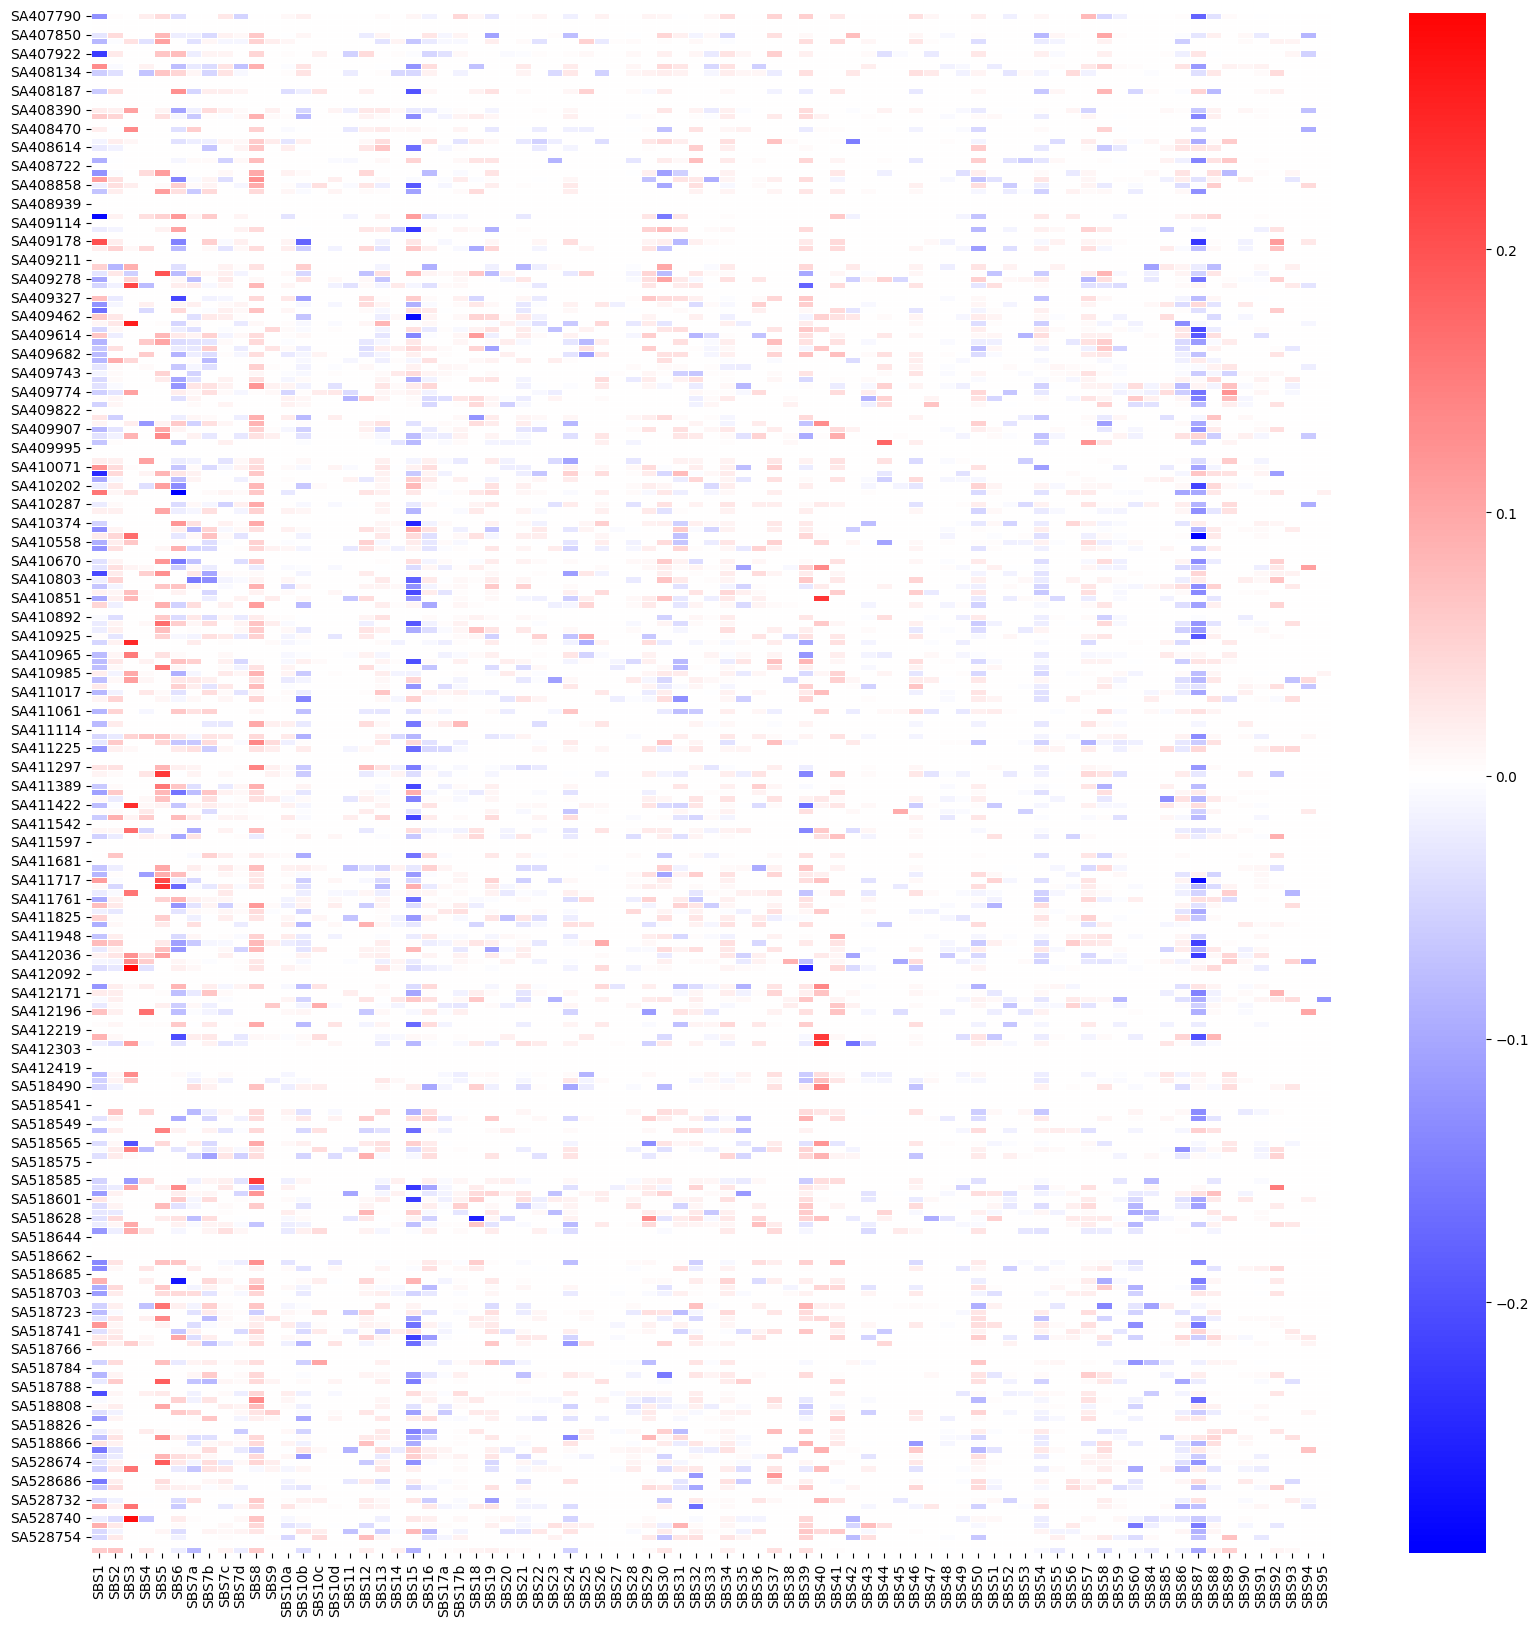

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(D_VERI_VAL.T, cmap='bwr',linewidths=.5, center=0)
plt.title('')
plt.show()

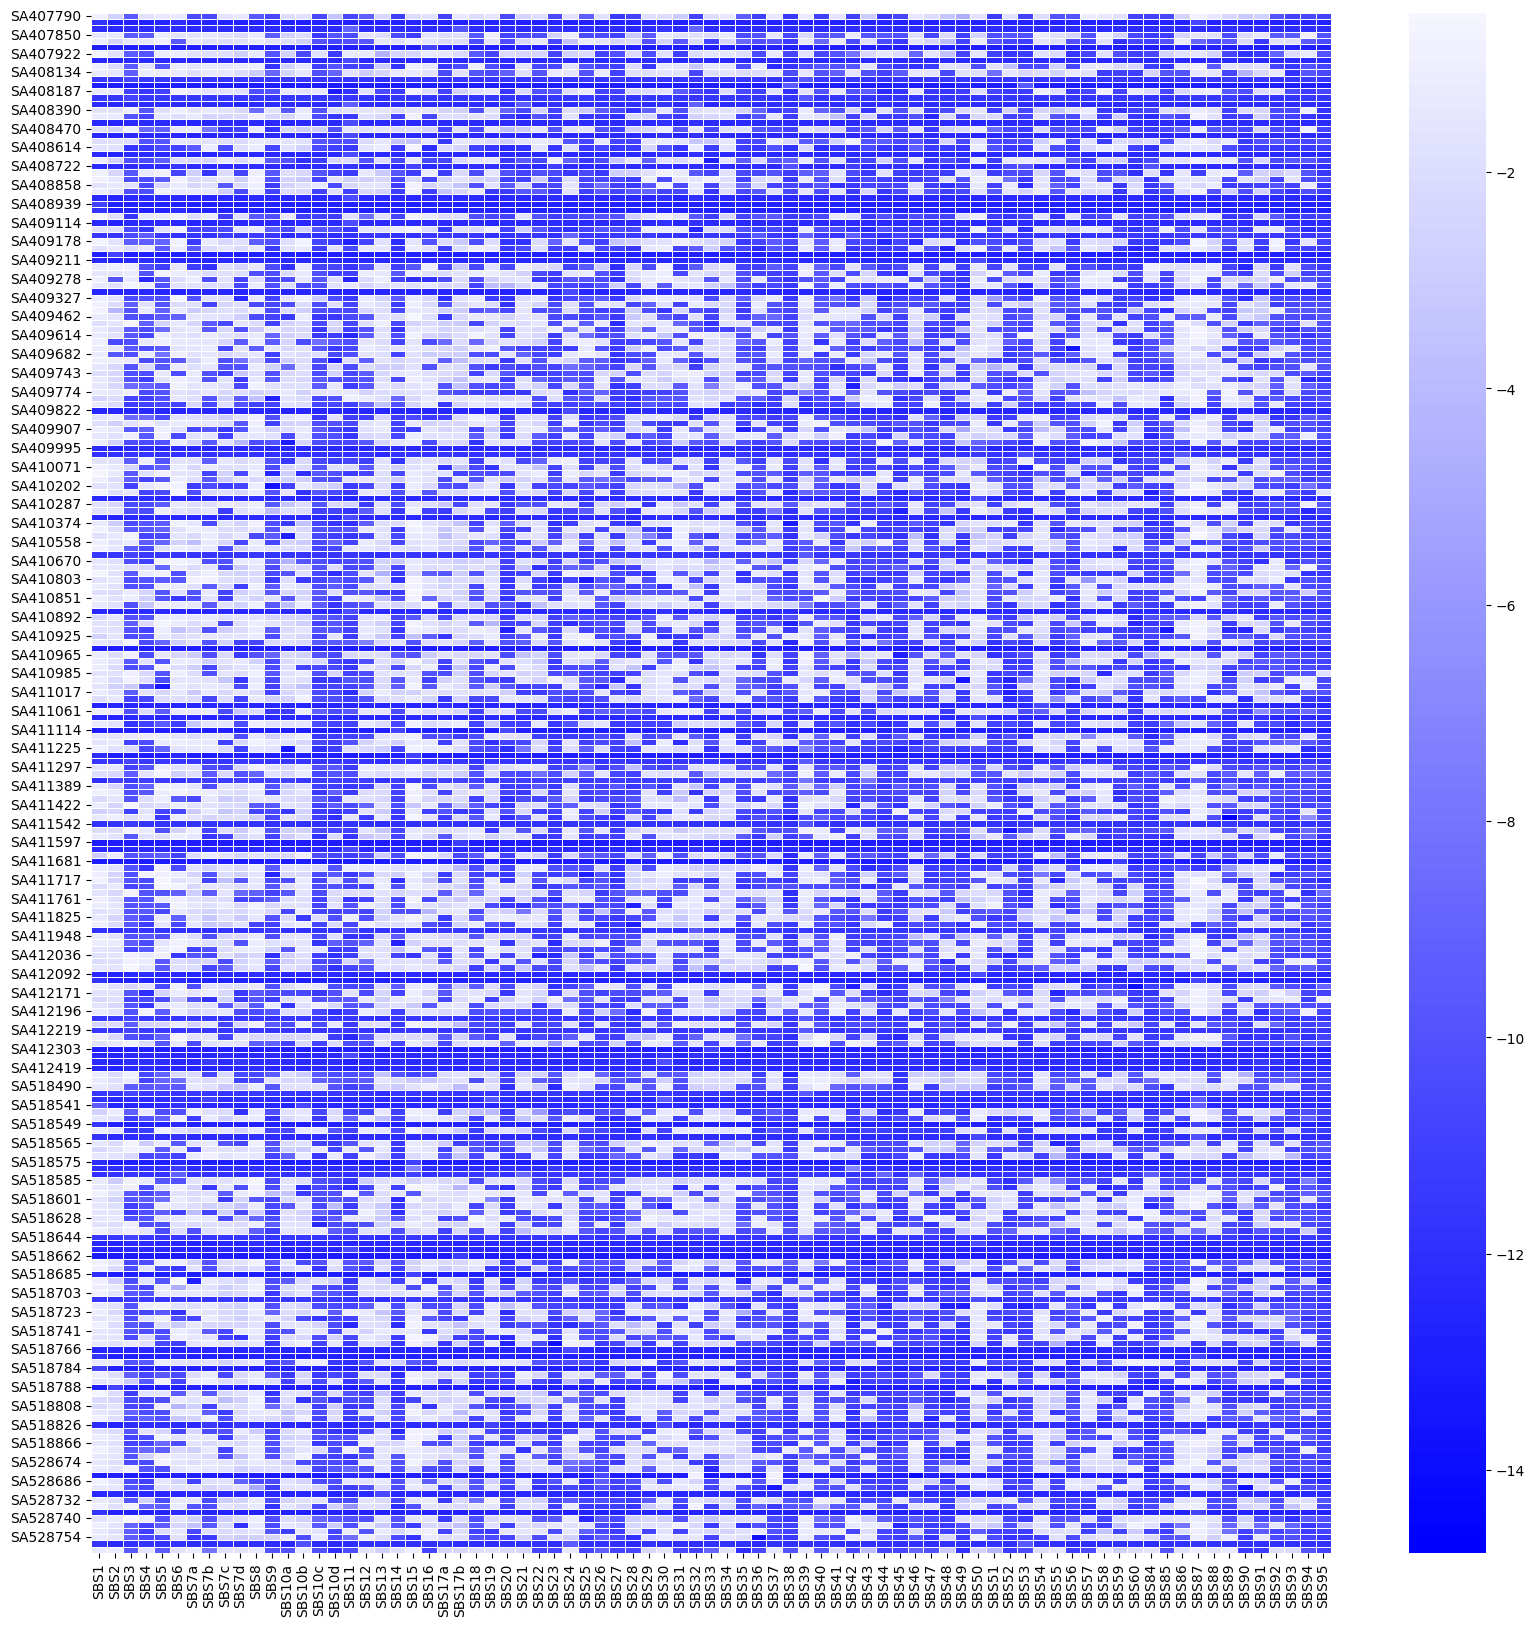

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(np.log10(abs(D_VERI_VAL.T)), cmap='bwr',linewidths=.5, center=0)
plt.title('')
plt.show()

In [59]:
import numpy as np
D_KL_PACA=np.zeros(246)
for i in range(246):
  D_KL_PACA[i]=np.sum(Coefficients_WG_VAL.iloc[:,i]*np.log(Coefficients_WG_VAL.iloc[:,i]/Coefficients_VAL.iloc[:,i]))

In [60]:
np.mean(D_KL_PACA)

6.0065454472871425

In [61]:
INPUT_VAL=pd.DataFrame(Matrix_WE_VAL_n.T)

In [62]:
input_data_VAL = torch.tensor(INPUT_VAL.values).float()

In [63]:
OUTPUT_VAL=net(input_data_VAL)

In [64]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [65]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [66]:
OUTPUT_VAL_PD

0             1             2             3             4   \
0    3.994737e-03  3.628480e-03  6.067727e-08  1.790777e-02  8.066647e-06   
1    4.213759e-21  1.950932e-17  9.873852e-38  1.710907e-18  2.328088e-14   
2    1.023148e-31  8.891567e-32  0.000000e+00  0.000000e+00  1.638978e-21   
3    9.909625e-03  7.169077e-04  5.009901e-07  1.585755e-04  1.977399e-03   
4    6.429437e-03  2.323296e-02  1.785873e-06  3.433747e-06  3.238943e-04   
..            ...           ...           ...           ...           ...   
241  1.496081e-08  2.040312e-07  3.894095e-18  1.046347e-01  6.326077e-16   
242  2.979644e-02  2.026507e-02  1.364905e-06  1.857782e-05  3.390892e-01   
243  3.138567e-04  4.631371e-04  1.128126e-05  2.666095e-01  4.906256e-04   
244  3.445824e-12  1.024560e-08  4.837902e-05  7.076953e-13  1.096820e-23   
245  1.002437e-01  2.945703e-01  3.035934e-06  7.827367e-03  8.181672e-05   

               5             6             7             8             9   \
0    4.565445e-05  2.870798e-04  3.189777e-04  9.538033e-11  8.212731e-07   
1    9.985049e-01  1.406200e-19  2.502606e-21  9.740131e-40  2.252862e-39   
2    6.510991e-33  1.841488e-40  1.365649e-40  1.438038e-26  2.168113e-37   
3    6.516565e-06  7.045584e-06  2.359577e-03  4.291260e-07  3.700104e-06   
4    2.546858e-05  2.549088e-04  1.073211e-05  2.477996e-05  1.823597e-06   
..            ...           ...           ...           ...           ...   
241  9.883504e-22  3.136605e-11  2.208551e-09  1.533479e-24  4.631191e-15   
242  3.661473e-02  1.248917e-05  5.941147e-04  4.284390e-07  3.558579e-06   
243  1.066628e-06  3.328431e-08  1.304205e-05  3.885762e-11  1.041289e-04   
244  2.943588e-35  1.172297e-07  1.494396e-22  1.371352e-13  8.589336e-09   
245  2.917310e-03  2.858769e-02  1.120069e-03  5.991322e-05  5.883329e-05   

     ...            69            70            71            72  \
0    ...  3.177774e-08  5.195482e-05  3.907723e-06  2.660726e-07   
1    ...  1.389557e-34  5.911316e-12  2.789755e-18  8.837809e-30   
2    ...  7.120407e-34  8.026928e-30  2.002107e-35  5.605194e-45   
3    ...  9.570039e-06  4.690234e-06  9.156465e-06  4.207368e-09   
4    ...  6.621069e-02  6.461958e-06  1.769999e-04  5.682362e-05   
..   ...           ...           ...           ...           ...   
241  ...  6.592830e-11  1.936070e-14  2.147900e-14  3.007591e-22   
242  ...  4.186637e-06  8.299720e-03  3.035247e-03  1.090762e-07   
243  ...  1.917030e-09  1.729384e-02  1.887093e-05  8.277214e-11   
244  ...  3.118661e-26  4.349375e-05  1.288352e-17  2.727190e-25   
245  ...  6.664758e-05  4.588721e-03  3.016884e-03  2.690217e-06   

               73            74            75            76            77  \
0    2.718250e-06  1.297275e-06  2.618221e-07  6.639043e-10  3.951818e-08   
1    2.864370e-09  7.736151e-26  9.072263e-25  1.480443e-30  5.847386e-38   
2    3.098234e-38  5.261213e-39  2.364254e-29  4.344429e-39  0.000000e+00   
3    2.488418e-09  2.895377e-05  1.097399e-08  1.154369e-07  5.776923e-07   
4    2.182381e-04  2.511612e-06  1.305244e-05  5.701719e-05  3.040628e-08   
..            ...           ...           ...           ...           ...   
241  5.382644e-19  3.968137e-21  6.047537e-17  1.555981e-08  6.605654e-19   
242  7.850365e-04  5.508700e-09  4.428744e-04  3.779622e-08  5.526338e-09   
243  5.029356e-05  6.261954e-10  1.719346e-09  4.281459e-08  4.898338e-11   
244  3.284848e-21  5.599444e-12  1.823280e-19  3.888222e-38  1.053552e-09   
245  4.251335e-04  1.206416e-05  2.923541e-06  9.049431e-04  4.817439e-08   

               78  
0    2.032255e-08  
1    3.024848e-38  
2    7.791219e-43  
3    7.837278e-07  
4    8.203748e-08  
..            ...  
241  7.338083e-20  
242  1.353487e-09  
243  1.543156e-12  
244  2.202908e-14  
245  7.295312e-08  

[246 rows x 79 columns]

In [67]:
Coefficients_WG_VAL

SA407790      SA407802      SA407806      SA407850      SA407890  \
SBS1   1.168502e-01  3.384162e-13  1.328318e-13  2.443961e-01  9.224953e-02   
SBS2   4.627845e-03  3.515795e-14  9.103512e-14  4.004616e-02  5.831452e-02   
SBS3   4.327315e-10  3.519960e-14  1.333541e-13  2.279234e-10  3.215249e-02   
SBS4   1.995114e-02  3.537239e-14  1.300950e-13  1.365696e-10  9.800098e-04   
SBS5   4.037757e-02  3.975509e-14  1.363331e-13  8.149971e-02  1.050223e-01   
...             ...           ...           ...           ...           ...   
SBS91  8.607485e-04  3.553168e-14  1.298047e-13  1.096225e-02  6.579276e-11   
SBS92  2.424654e-10  3.732896e-14  1.315502e-13  7.786767e-11  1.393853e-02   
SBS93  3.969612e-11  3.561124e-14  1.267052e-13  2.768098e-11  2.102111e-02   
SBS94  5.065568e-11  3.940325e-14  1.371082e-13  4.531242e-11  4.045448e-10   
SBS95  4.577239e-11  3.632509e-14  1.349541e-13  1.790524e-10  3.042645e-11   

           SA407914      SA407922      SA407934      SA407982      SA408134  \
SBS1   2.561200e-14  2.154588e-01  7.673785e-14  2.430889e-01  1.952269e-01   
SBS2   2.377373e-14  2.277779e-02  4.470575e-14  7.837848e-03  2.477253e-02   
SBS3   2.685732e-14  1.703981e-10  8.909041e-14  3.335471e-10  2.101213e-10   
SBS4   2.586728e-14  5.149974e-10  8.321994e-14  1.502693e-02  3.499558e-03   
SBS5   3.217179e-14  6.419159e-02  8.738339e-14  1.605667e-10  6.484104e-02   
...             ...           ...           ...           ...           ...   
SBS91  2.476050e-14  1.575953e-11  8.206263e-14  1.459814e-02  6.107365e-03   
SBS92  4.651498e-14  1.103183e-09  8.170735e-14  5.597007e-11  4.023447e-02   
SBS93  3.059117e-14  9.435994e-03  8.658626e-14  1.684499e-11  8.686617e-11   
SBS94  2.618123e-14  9.351965e-11  8.872244e-14  1.620356e-10  3.305680e-10   
SBS95  2.477555e-14  4.496225e-11  8.632314e-14  5.510511e-11  1.510175e-10   

       ...      SA528723      SA528732      SA528738      SA528739  \
SBS1   ...  7.335982e-14  1.955661e-01  2.127478e-01  3.384162e-13   
SBS2   ...  6.917347e-14  2.976525e-02  2.353692e-02  3.515795e-14   
SBS3   ...  7.099416e-14  3.906876e-10  1.613947e-01  3.519960e-14   
SBS4   ...  6.811506e-14  3.651305e-03  1.712001e-09  3.537239e-14   
SBS5   ...  7.232841e-14  1.113874e-10  6.976598e-10  3.975509e-14   
...    ...           ...           ...           ...           ...   
SBS91  ...  4.562819e-14  5.232892e-03  9.992814e-03  3.553168e-14   
SBS92  ...  7.721137e-14  4.152084e-10  1.820978e-10  3.732896e-14   
SBS93  ...  7.156829e-14  2.134206e-02  7.904132e-02  3.561124e-14   
SBS94  ...  6.965258e-14  2.907204e-02  5.195115e-03  3.940325e-14   
SBS95  ...  6.705503e-14  5.948982e-11  1.020647e-10  3.632509e-14   

           SA528740      SA528745      SA528752      SA528754      SA528758  \
SBS1   4.709118e-02  1.806836e-01  2.741096e-01  2.021944e-01  4.744629e-13   
SBS2   2.392452e-02  2.290450e-02  3.235268e-02  2.961125e-02  9.439635e-14   
SBS3   3.747595e-01  1.345632e-09  4.807670e-10  5.758248e-10  2.041799e-13   
SBS4   2.850722e-02  4.866749e-11  4.132036e-11  2.583967e-11  2.429513e-13   
SBS5   1.669977e-10  5.317933e-10  9.348369e-03  8.442932e-11  1.999002e-13   
...             ...           ...           ...           ...           ...   
SBS91  6.754638e-12  2.579051e-11  3.686375e-10  8.128753e-10  1.795633e-13   
SBS92  5.331420e-10  1.776977e-10  6.079796e-11  7.262788e-11  1.990535e-13   
SBS93  7.070494e-11  1.146849e-09  1.410511e-10  1.076221e-10  1.818297e-13   
SBS94  6.280104e-11  2.804659e-11  2.453456e-11  1.353754e-10  1.978179e-13   
SBS95  3.998991e-11  6.810274e-11  3.015678e-11  3.200571e-11  2.278082e-13   

           SA528760  
SBS1   5.717480e-02  
SBS2   1.144170e-01  
SBS3   3.895626e-10  
SBS4   2.637680e-02  
SBS5   4.832379e-10  
...             ...  
SBS91  8.714558e-12  
SBS92  1.227191e-02  
SBS93  8.152079e-03  
SBS94  4.857498e-11  
SBS95  5.775853e-11  

[79 rows x 246 columns]

In [68]:
OUTPUT_VAL_PD.columns= Coefficients_WG_VAL.index

In [69]:
OUTPUT_VAL_PD.index= Coefficients_WG_VAL.columns

In [70]:
OUTPUT_VAL_PD

SBS1          SBS2          SBS3          SBS4  \
SA407790  3.994737e-03  3.628480e-03  6.067727e-08  1.790777e-02   
SA407802  4.213759e-21  1.950932e-17  9.873852e-38  1.710907e-18   
SA407806  1.023148e-31  8.891567e-32  0.000000e+00  0.000000e+00   
SA407850  9.909625e-03  7.169077e-04  5.009901e-07  1.585755e-04   
SA407890  6.429437e-03  2.323296e-02  1.785873e-06  3.433747e-06   
...                ...           ...           ...           ...   
SA528745  1.496081e-08  2.040312e-07  3.894095e-18  1.046347e-01   
SA528752  2.979644e-02  2.026507e-02  1.364905e-06  1.857782e-05   
SA528754  3.138567e-04  4.631371e-04  1.128126e-05  2.666095e-01   
SA528758  3.445824e-12  1.024560e-08  4.837902e-05  7.076953e-13   
SA528760  1.002437e-01  2.945703e-01  3.035934e-06  7.827367e-03   

                  SBS5          SBS6         SBS7a         SBS7b  \
SA407790  8.066647e-06  4.565445e-05  2.870798e-04  3.189777e-04   
SA407802  2.328088e-14  9.985049e-01  1.406200e-19  2.502606e-21   
SA407806  1.638978e-21  6.510991e-33  1.841488e-40  1.365649e-40   
SA407850  1.977399e-03  6.516565e-06  7.045584e-06  2.359577e-03   
SA407890  3.238943e-04  2.546858e-05  2.549088e-04  1.073211e-05   
...                ...           ...           ...           ...   
SA528745  6.326077e-16  9.883504e-22  3.136605e-11  2.208551e-09   
SA528752  3.390892e-01  3.661473e-02  1.248917e-05  5.941147e-04   
SA528754  4.906256e-04  1.066628e-06  3.328431e-08  1.304205e-05   
SA528758  1.096820e-23  2.943588e-35  1.172297e-07  1.494396e-22   
SA528760  8.181672e-05  2.917310e-03  2.858769e-02  1.120069e-03   

                 SBS7c         SBS7d  ...         SBS86         SBS87  \
SA407790  9.538033e-11  8.212731e-07  ...  3.177774e-08  5.195482e-05   
SA407802  9.740131e-40  2.252862e-39  ...  1.389557e-34  5.911316e-12   
SA407806  1.438038e-26  2.168113e-37  ...  7.120407e-34  8.026928e-30   
SA407850  4.291260e-07  3.700104e-06  ...  9.570039e-06  4.690234e-06   
SA407890  2.477996e-05  1.823597e-06  ...  6.621069e-02  6.461958e-06   
...                ...           ...  ...           ...           ...   
SA528745  1.533479e-24  4.631191e-15  ...  6.592830e-11  1.936070e-14   
SA528752  4.284390e-07  3.558579e-06  ...  4.186637e-06  8.299720e-03   
SA528754  3.885762e-11  1.041289e-04  ...  1.917030e-09  1.729384e-02   
SA528758  1.371352e-13  8.589336e-09  ...  3.118661e-26  4.349375e-05   
SA528760  5.991322e-05  5.883329e-05  ...  6.664758e-05  4.588721e-03   

                 SBS88         SBS89         SBS90         SBS91  \
SA407790  3.907723e-06  2.660726e-07  2.718250e-06  1.297275e-06   
SA407802  2.789755e-18  8.837809e-30  2.864370e-09  7.736151e-26   
SA407806  2.002107e-35  5.605194e-45  3.098234e-38  5.261213e-39   
SA407850  9.156465e-06  4.207368e-09  2.488418e-09  2.895377e-05   
SA407890  1.769999e-04  5.682362e-05  2.182381e-04  2.511612e-06   
...                ...           ...           ...           ...   
SA528745  2.147900e-14  3.007591e-22  5.382644e-19  3.968137e-21   
SA528752  3.035247e-03  1.090762e-07  7.850365e-04  5.508700e-09   
SA528754  1.887093e-05  8.277214e-11  5.029356e-05  6.261954e-10   
SA528758  1.288352e-17  2.727190e-25  3.284848e-21  5.599444e-12   
SA528760  3.016884e-03  2.690217e-06  4.251335e-04  1.206416e-05   

                 SBS92         SBS93         SBS94         SBS95  
SA407790  2.618221e-07  6.639043e-10  3.951818e-08  2.032255e-08  
SA407802  9.072263e-25  1.480443e-30  5.847386e-38  3.024848e-38  
SA407806  2.364254e-29  4.344429e-39  0.000000e+00  7.791219e-43  
SA407850  1.097399e-08  1.154369e-07  5.776923e-07  7.837278e-07  
SA407890  1.305244e-05  5.701719e-05  3.040628e-08  8.203748e-08  
...                ...           ...           ...           ...  
SA528745  6.047537e-17  1.555981e-08  6.605654e-19  7.338083e-20  
SA528752  4.428744e-04  3.779622e-08  5.526338e-09  1.353487e-09  
SA528754  1.719346e-09  4.281459e-08  4.898338e-11  1.543156e-12  
SA528758  1.823280e-

In [74]:
import numpy as np
D_KL_PACA_ANN=np.zeros(246)
for i in range(246):
  D_KL_PACA_ANN[i]=np.sum(Coefficients_WG_VAL.iloc[:,i]*np.log(Coefficients_WG_VAL.iloc[:,i]/OUTPUT_VAL_PD.iloc[i,:]))

In [71]:
DIFF_VAL=Coefficients_WG_VAL.T-OUTPUT_VAL_PD

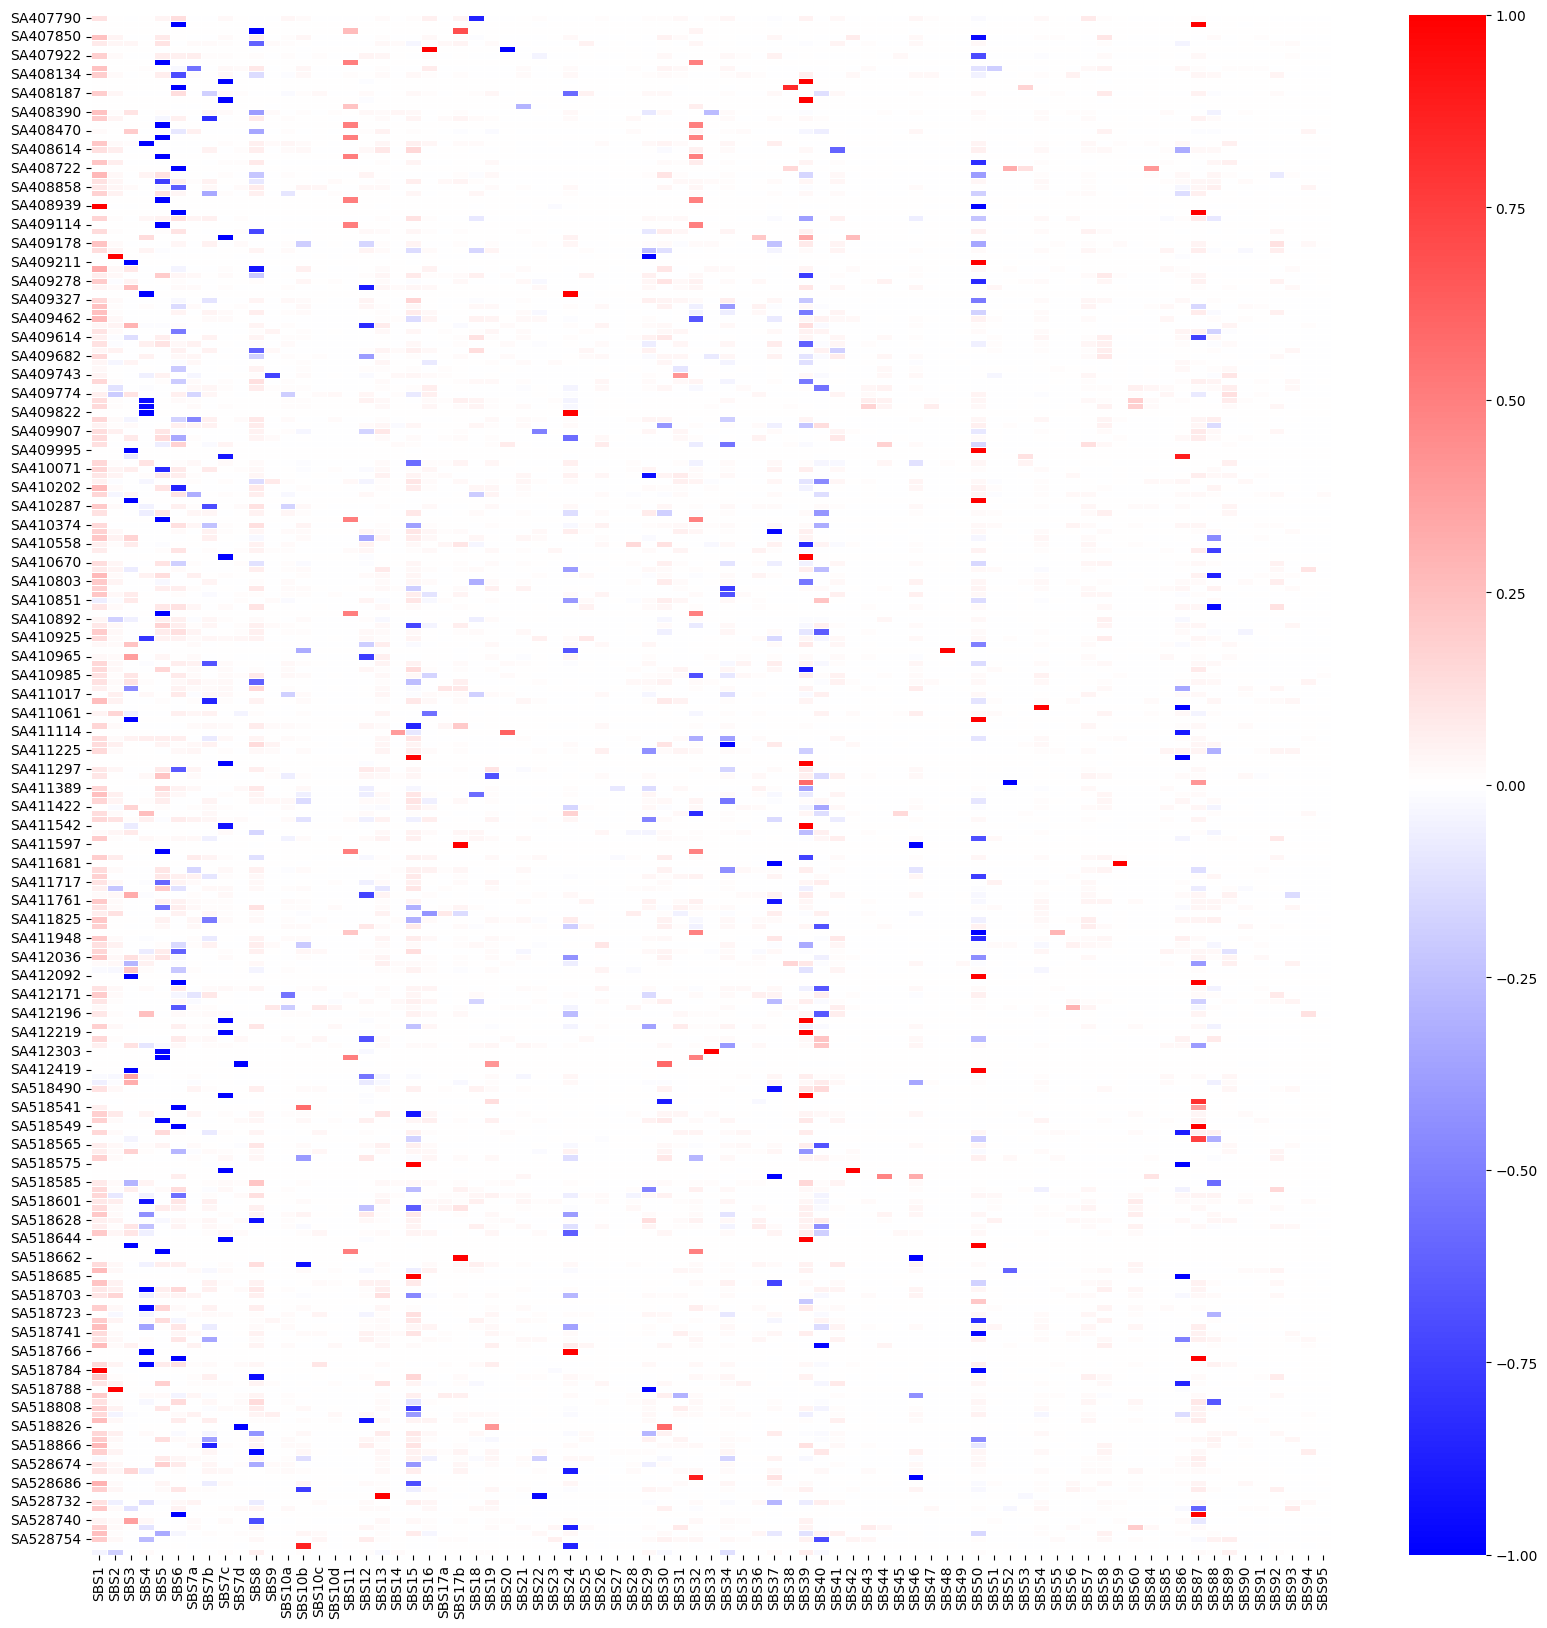

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(DIFF_VAL, cmap='bwr',linewidths=.5, center=0)
plt.title('')
plt.show()

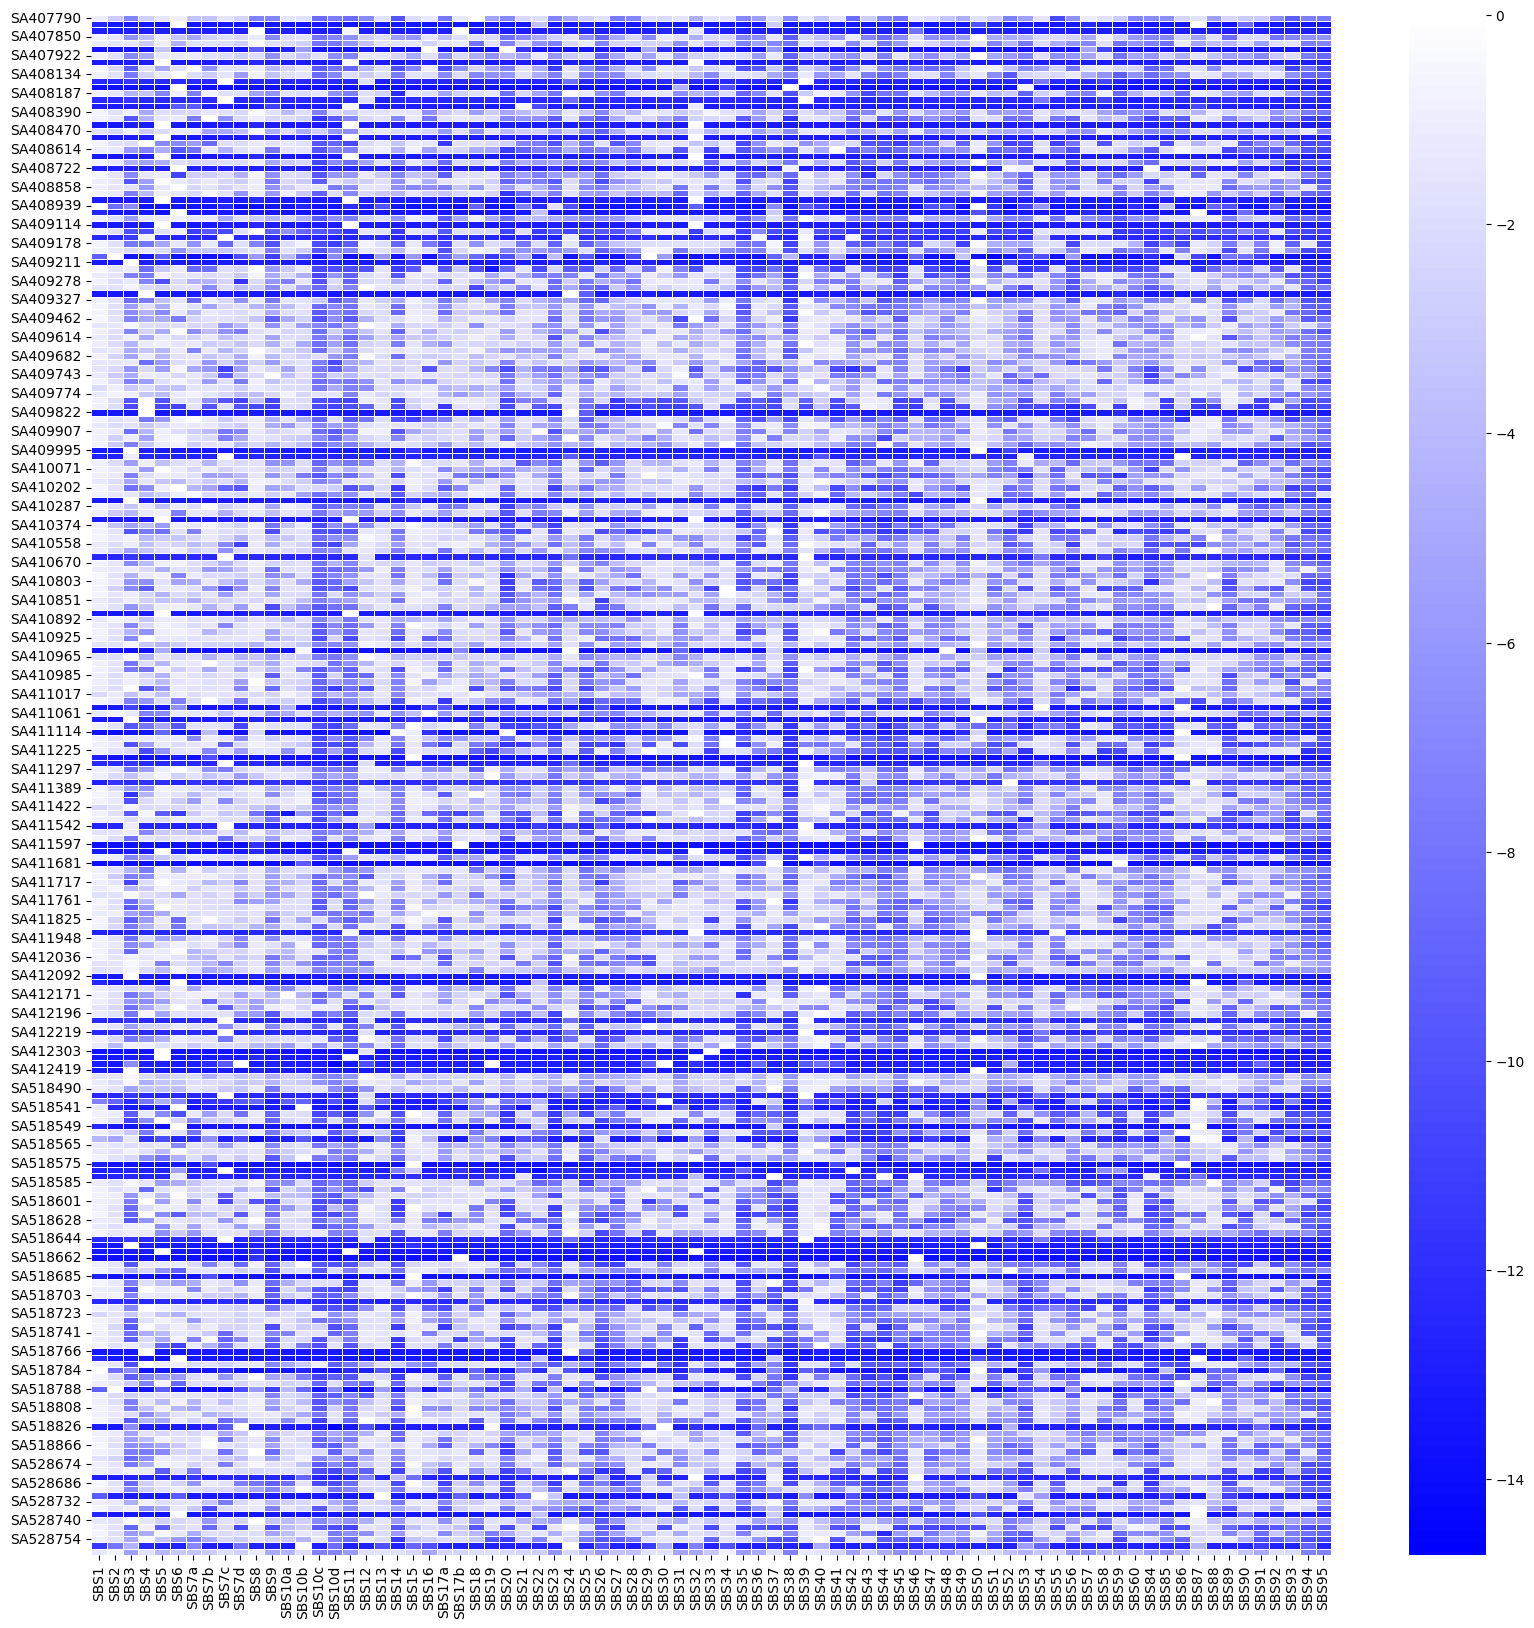

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(np.log10(abs(DIFF_VAL)), cmap='bwr',linewidths=.5, center=0)
plt.title('')
plt.show()

LOOCV

In [ ]:
import torch
import torch.nn as nn
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

TEST_OUTPUTS={}
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x

input_size = 96
hidden_size = 128
output_size = 79


input_data = torch.tensor(INPUT.values).float()
output_data = torch.tensor(TARGET.values)


input_data_numpy = input_data.numpy()
output_data_numpy = output_data.numpy()

loo = LeaveOneOut()
total_samples = len(input_data)
errors=[]
z=0
for train_index, test_index in loo.split(input_data):
    # Training set e test set
    torch.manual_seed(seed)
    np.random.seed(seed)
    net = NeuralNetwork(input_size, hidden_size, output_size)
    criterion = nn.KLDivLoss(reduction='batchmean')
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

    X_train, X_test = input_data_numpy[train_index], input_data_numpy[test_index]
    y_train, y_test = output_data_numpy[train_index], output_data_numpy[test_index]

    # Addestramento
    for epoch in range(10000):
        optimizer.zero_grad()
        outputs = net(torch.tensor(X_train).float())
        loss = criterion(outputs, torch.tensor(y_train))
        loss.backward()
        optimizer.step()

    # Valutazione
    test_outputs = net(torch.tensor(X_test).float())
    test_loss = criterion(test_outputs, torch.tensor(y_test))
    TEST_OUTPUTS[z]=torch.exp(test_outputs)
    z=z+1
    errors.append(test_loss.item())


average_error = sum(errors) / len(errors)
print(f'Media degli errori: {average_error}')

Media degli errori: 5.4092559415823125


In [ ]:
tensori_lista = list(TEST_OUTPUTS.values())

# Crea un tensore di tensori utilizzando torch.stack
tensore_di_tensori = torch.stack(tensori_lista)

In [ ]:
pred=tensore_di_tensori

In [ ]:
pred=torch.squeeze(pred,dim=1)

In [ ]:
pred_dataset=pd.DataFrame(pred.detach().numpy(),index=TARGET.index,columns=TARGET.columns)

In [ ]:
DIFF=TARGET-pred_dataset

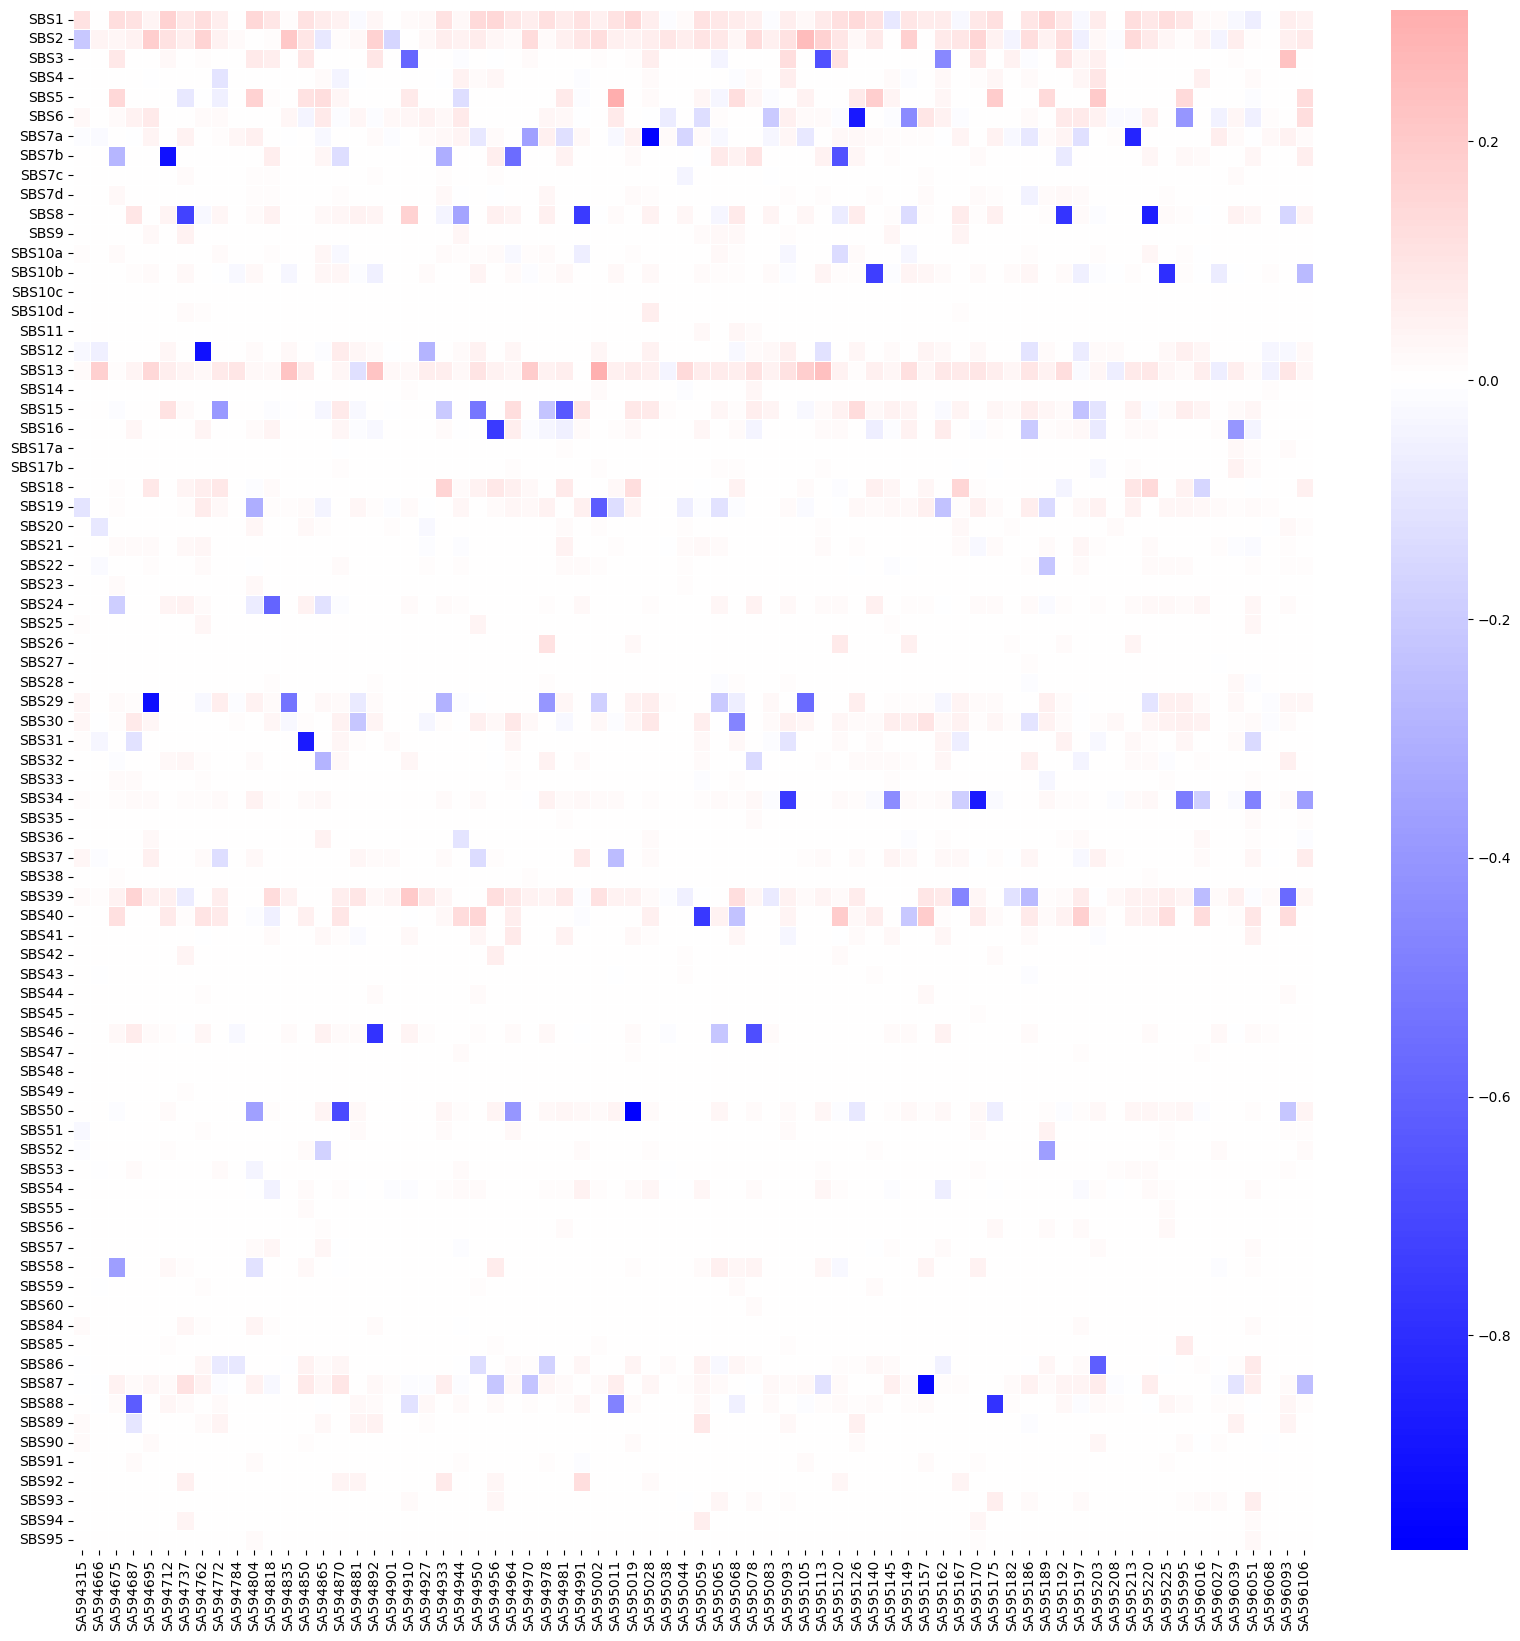

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(DIFF.T, cmap='bwr',linewidths=.5, center=0)
plt.title('')
plt.show()

In [ ]:
DIFF_ABS=abs(DIFF)

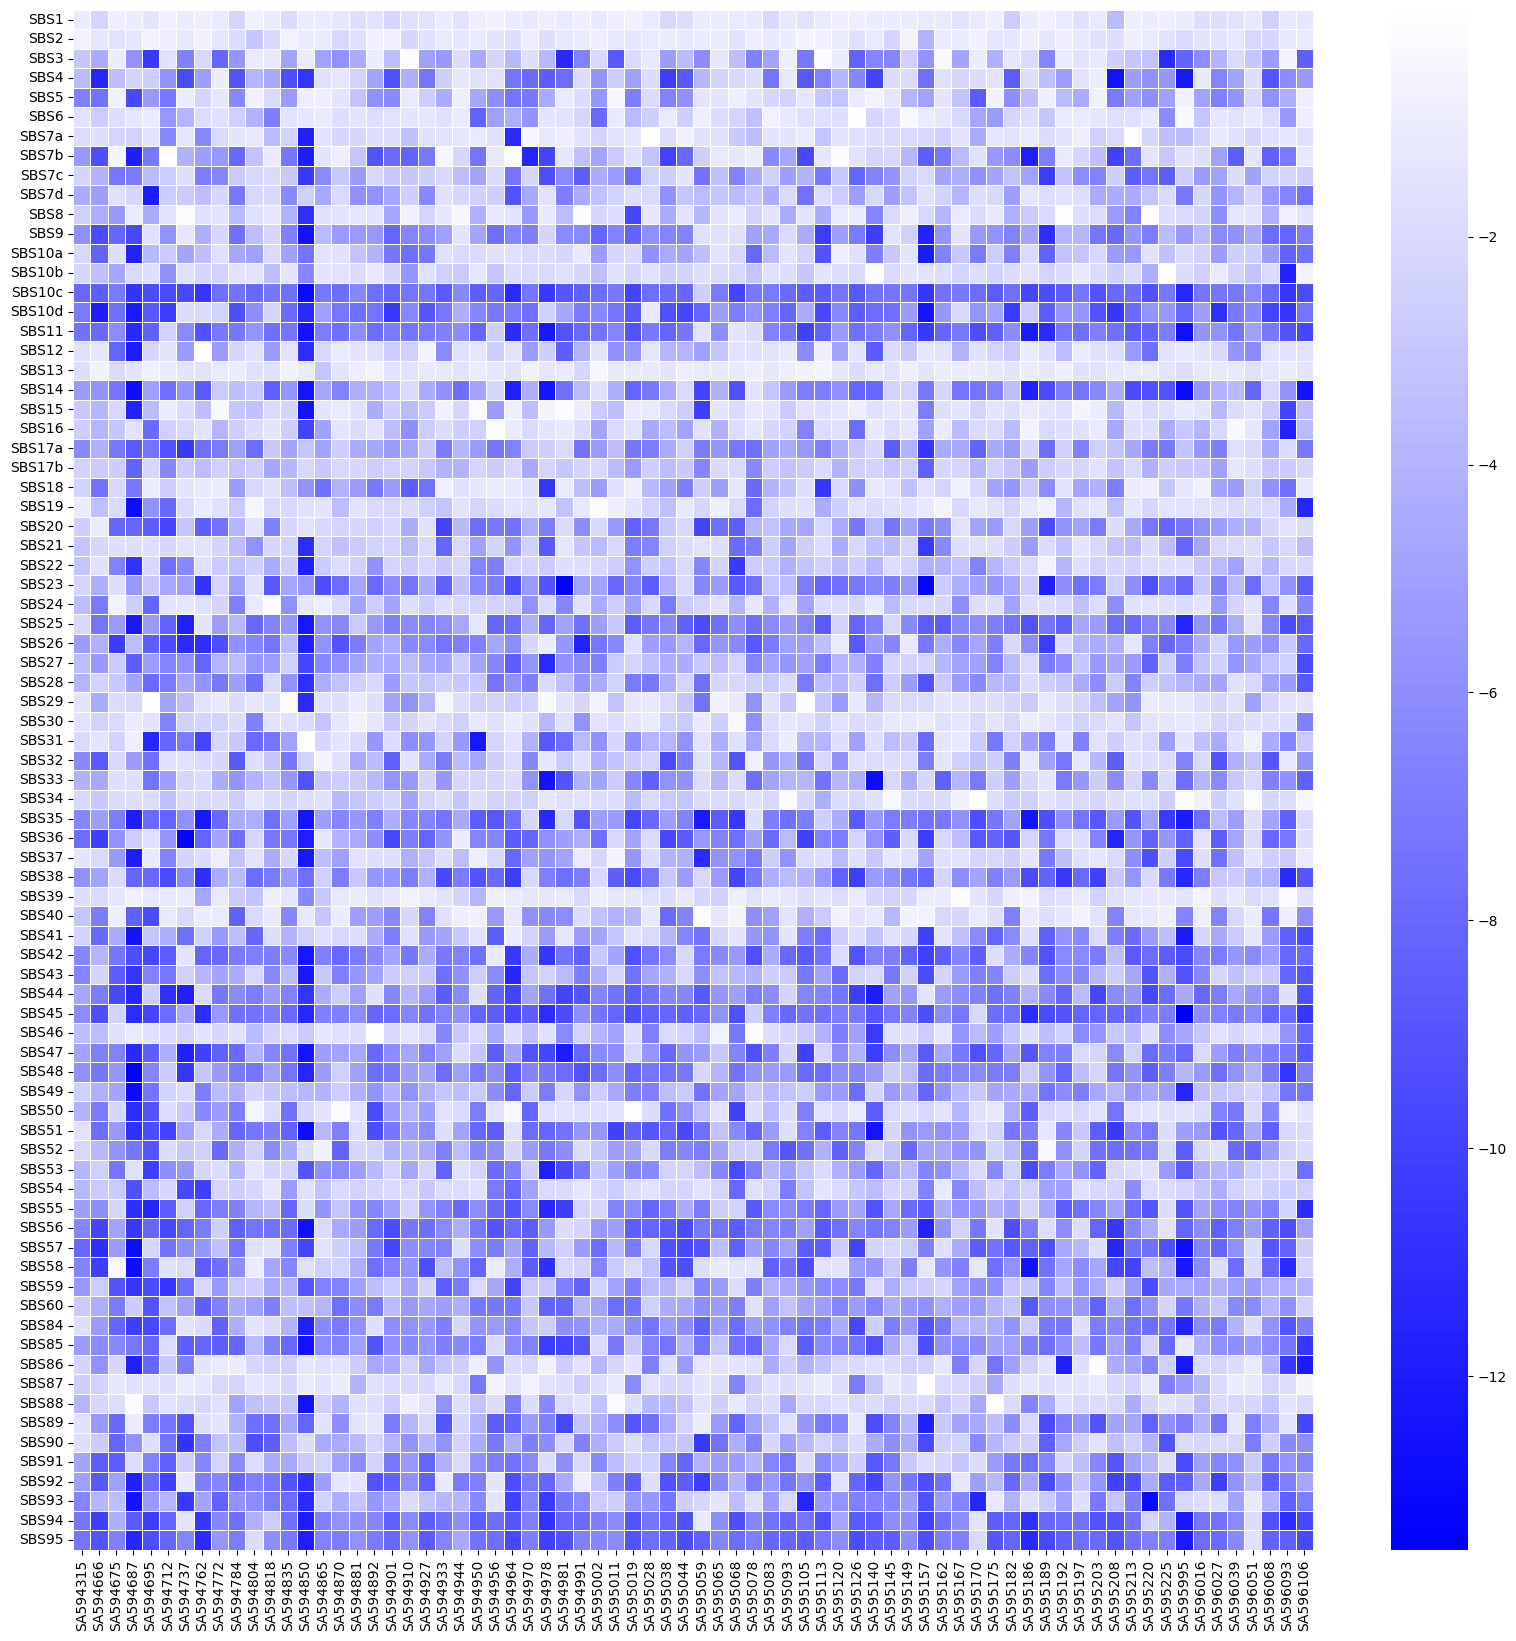

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(np.log10(DIFF_ABS.T), cmap='bwr',linewidths=.5, center=0)
plt.title('')
plt.show()

ESPOSIZIONI ADJUSTED METODO SEMPLICE PER BRCA

In [ ]:
mutazioni_96=COSMIC_SIGNATURE.index.to_list()
mutazioni_96

In [ ]:
posizioni_desiderate = [0, 4, 6]  # Posizioni delle lettere da estrarre

In [ ]:
triplette_96=["NA"] * 96

In [ ]:
#per risalire a triplette
for j in range(len(mutazioni_96)):
  triplette_96[j]=(''.join([mutazioni_96[j][i] for i in posizioni_desiderate]))


In [ ]:
triplette_WE={
"AAA": 971543,
"AAC": 457937,
"AAG": 683449,
"AAT": 613659,
"ACA": 645172,
"ACC": 467461,
"ACG": 166834,
"ACT": 522169,
"AGA": 733161,
"AGC": 633194,
"AGG": 732167,
"AGT": 517622,
"ATA": 452047,
"ATC": 433601,
"ATG": 570462,
"ATT": 617871,
"CAA": 618247,
"CAC": 589351,
"CAG": 903792,
"CAT": 608159,
"CCA": 804743,
"CCC": 688716,
"CCG": 302071,
"CCT": 828509,
"CGA": 175264,
"CGC": 262799,
"CGG": 296517,
"CGT": 173362,
"CTA": 347395,
"CTC": 675140,
"CTG": 889111,
"CTT": 700889,
"GAA": 705840,
"GAC": 423424,
"GAG": 709204,
"GAT": 464568,
"GCA": 632684,
"GCC": 658721,
"GCG": 261926,
"GCT": 662238,
"GGA": 718540,
"GGC": 675179,
"GGG": 695185,
"GGT": 495737,
"GTA": 331134,
"GTC": 415338,
"GTG": 593450,
"GTT": 475249,
"TAA": 495405,
"TAC": 334514,
"TAG": 338906,
"TAT": 470135,
"TCA": 671563,
"TCC": 678613,
"TCG": 167328,
"TCT": 758038,
"TGA": 666395,
"TGC": 610982,
"TGG": 768587,
"TGT": 656330,
"TTA": 495270,
"TTC": 669495,
"TTG": 588421,
"TTT": 970870}

In [ ]:
somma_valori_tripletteWE = sum(triplette_WE.values())

In [ ]:
for key in triplette_WE:
    triplette_WE[key] /= somma_valori_tripletteWE

In [ ]:
triplette_WG={
    'AAA': 38111156,
         'AAC': 14477650,
         'AAG': 19838087,
         'AAT': 24726104,
         'ACA': 20058100,
         'ACC': 11637985,
         'ACG': 2522576,
         'ACT': 16006323,
         'AGA': 22032850,
         'AGC': 13971789,
         'AGG': 17784375,
         'AGT': 16027165,
         'ATA': 20424450,
         'ATC': 13297469,
         'ATG': 18289096,
         'ATT': 24744309,
         'CAA': 18821687,
         'CAC': 15021434,
         'CAG': 20277838,
         'CAT': 18270059,
         'CCA': 18438491,
         'CCC': 13225895,
         'CCG': 2797677,
         'CCT': 17793617,
         'CGA': 2222992,
         'CGC': 2410618,
         'CGG': 2800948,
         'CGT': 2525426,
         'CTA': 12811080,
         'CTC': 16861443,
         'CTG': 20285307,
         'CTT': 19864832,
         'GAA': 19623577,
         'GAC': 9440460,
         'GAG': 16869395,
         'GAT': 13313709,
         'GCA': 14374147,
         'GCC': 11956723,
         'GCG': 2411316,
         'GCT': 13973363,
         'GGA': 15471216,
         'GGC': 11947940,
         'GGG': 13230267,
         'GGT': 11641887,
         'GTA': 11280782,
         'GTC': 9460393,
         'GTG': 15052446,
         'GTT': 14529889,
         'TAA': 20594734,
         'TAC': 11276596,
         'TAG': 12829959,
         'TAT': 20439748,
         'TCA': 19511980,
         'TCC': 15450553,
         'TCG': 2228508,
         'TCT': 22050472,
         'TGA': 19524235,
         'TGC': 14389204,
         'TGG': 18494922,
         'TGT': 20115781,
         'TTA': 20618925,
         'TTC': 19636248,
         'TTG': 18882367,
         'TTT': 38233904
}

In [ ]:
somma_valori_tripletteWG = sum(triplette_WG.values())

In [ ]:
for key in triplette_WG:
    triplette_WG[key] /= somma_valori_tripletteWG

In [ ]:
rapporti = {key: triplette_WG[key] / triplette_WE[key] for key in triplette_WG if key in triplette_WE}

In [ ]:
Matrix_WE_adjusted=Matrix_WE.copy()

In [ ]:
for i in range(Matrix_WE.shape[0]):
  Matrix_WE_adjusted.iloc[i,:]=(Matrix_WE.iloc[i,:]*rapporti[triplette_96[i]])+np.mean(Matrix_WE.iloc[i,:])

In [ ]:
Matrix_WE_adjusted

SA594315  SA594666  SA594675  SA594687  SA594695  SA594712  SA594737  \
A[C>A]A  4.234090  2.804545  4.234090  1.375000  1.375000  1.375000  2.804545   
A[C>A]C  1.250000  5.858505  2.402126  2.402126  2.402126  2.402126  2.402126   
A[C>A]G  0.416667  0.416667  0.416667  0.416667  0.416667  0.416667  0.416667   
A[C>A]T  0.861111  3.797857  0.861111  0.861111  0.861111  0.861111  0.861111   
A[C>G]A  3.148661  7.529316  0.958333  2.053497  2.053497  0.958333  0.958333   
...           ...       ...       ...       ...       ...       ...       ...   
T[T>C]T  1.837848  0.777778  1.837848  0.777778  0.777778  2.897918  2.897918   
T[T>G]A  1.498258  2.565960  0.430556  0.430556  0.430556  0.430556  0.430556   
T[T>G]C  0.513889  1.372143  0.513889  0.513889  0.513889  0.513889  0.513889   
T[T>G]G  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000  0.500000   
T[T>G]T  1.991921  5.342683  0.875000  0.875000  0.875000  0.875000  1.991921   

         SA594762  SA594772  SA594784  ...  SA595220  SA595225  SA595995  \
A[C>A]A  2.804545  5.663635  1.375000  ...  4.234090  2.804545  4.234090   
A[C>A]C  1.250000  4.706379  1.250000  ...  4.706379  1.250000  3.554253   
A[C>A]G  0.416667  1.474461  1.474461  ...  0.416667  0.416667  0.416667   
A[C>A]T  2.329484  2.329484  0.861111  ...  0.861111  0.861111  6.734602   
A[C>G]A  0.958333  2.053497  2.053497  ...  3.148661  3.148661  2.053497   
...           ...       ...       ...  ...       ...       ...       ...   
T[T>C]T  2.897918  0.777778  0.777778  ...  0.777778  0.777778  1.837848   
T[T>G]A  0.430556  0.430556  0.430556  ...  0.430556  0.430556  1.498258   
T[T>G]C  0.513889  0.513889  0.513889  ...  1.372143  0.513889  0.513889   
T[T>G]G  0.500000  1.376935  0.500000  ...  0.500000  0.500000  0.500000   
T[T>G]T  1.991921  0.875000  1.991921  ...  1.991921  0.875000  0.875000   

         SA596016  SA596027   SA596039  SA596051  SA596068  SA596093  SA596106  
A[C>A]A  7.093180  1.375000  11.381815  7.093180  2.804545  1.375000  1.375000  
A[C>A]C  2.402126  2.402126   3.554253  1.250000  1.250000  3.554253  2.402126  
A[C>A]G  1.474461  0.416667   1.474461  0.416667  0.416667  0.416667  0.416667  
A[C>A]T  0.861111  0.861111   2.329484  3.797857  2.329484  0.861111  2.329484  
A[C>G]A  0.958333  0.958333   4.243825  2.053497  3.148661  3.148661  0.958333  
...           ...       ...        ...       ...       ...       ...       ...  
T[T>C]T  2.897918  0.777778   1.837848  3.957989  1.837848  1.837848  1.837848  
T[T>G]A  0.430556  0.430556   1.498258  0.430556  1.498258  1.498258  0.430556  
T[T>G]C  0.513889  0.513889   0.513889  3.088652  0.513889  0.513889  0.513889  
T[T>G]G  1.376935  0.500000   1.376935  2.253869  0.500000  2.253869  0.500000  
T[T>G]T  0.875000  0.875000   5.342683  0.875000  1.991921  0.875000  0.875000  

[96 rows x 72 columns]

In [ ]:
# Calcolare la somma di ogni colonna
sum_columns = Matrix_WE_adjusted.sum()

In [ ]:
# Normalizzare ogni colonna dividendo per la somma della colonna
Matrix_WE_adjusted= Matrix_WE_adjusted.divide(sum_columns)

In [ ]:
Matrix_WE_adjusted

SA594315  SA594666  SA594675  SA594687  SA594695  SA594712  SA594737  \
A[C>A]A  0.008695  0.002255  0.015091  0.005636  0.005099  0.004123  0.010228   
A[C>A]C  0.002567  0.004710  0.008561  0.009847  0.008908  0.007203  0.008761   
A[C>A]G  0.000856  0.000335  0.001485  0.001708  0.001545  0.001249  0.001520   
A[C>A]T  0.001768  0.003053  0.003069  0.003530  0.003193  0.002582  0.003141   
A[C>G]A  0.006466  0.006053  0.003416  0.008418  0.007615  0.002873  0.003495   
...           ...       ...       ...       ...       ...       ...       ...   
T[T>C]T  0.003774  0.000625  0.006550  0.003188  0.002884  0.008689  0.010569   
T[T>G]A  0.003077  0.002063  0.001535  0.001765  0.001597  0.001291  0.001570   
T[T>G]C  0.001055  0.001103  0.001832  0.002107  0.001906  0.001541  0.001874   
T[T>G]G  0.001027  0.000402  0.001782  0.002050  0.001854  0.001499  0.001824   
T[T>G]T  0.004091  0.004295  0.003119  0.003587  0.003245  0.002624  0.007265   

         SA594762  SA594772  SA594784  ...  SA595220  SA595225  SA595995  \
A[C>A]A  0.009694  0.014638  0.002665  ...  0.012733  0.009850  0.013793   
A[C>A]C  0.004321  0.012164  0.002422  ...  0.014153  0.004390  0.011578   
A[C>A]G  0.001440  0.003811  0.002857  ...  0.001253  0.001463  0.001357   
A[C>A]T  0.008052  0.006021  0.001669  ...  0.002589  0.003024  0.021938   
A[C>G]A  0.003313  0.005307  0.003979  ...  0.009469  0.011059  0.006689   
...           ...       ...       ...  ...       ...       ...       ...   
T[T>C]T  0.010017  0.002010  0.001507  ...  0.002339  0.002732  0.005987   
T[T>G]A  0.001488  0.001113  0.000834  ...  0.001295  0.001512  0.004881   
T[T>G]C  0.001776  0.001328  0.000996  ...  0.004126  0.001805  0.001674   
T[T>G]G  0.001728  0.003559  0.000969  ...  0.001504  0.001756  0.001629   
T[T>G]T  0.006885  0.002261  0.003860  ...  0.005990  0.003073  0.002850   

         SA596016  SA596027  SA596039  SA596051  SA596068  SA596093  SA596106  
A[C>A]A  0.017664  0.003646  0.018085  0.015445  0.002495  0.004609  0.004663  
A[C>A]C  0.005982  0.006369  0.005647  0.002722  0.001112  0.011914  0.008147  
A[C>A]G  0.003672  0.001105  0.002343  0.000907  0.000371  0.001397  0.001413  
A[C>A]T  0.002144  0.002283  0.003701  0.008269  0.002072  0.002886  0.007901  
A[C>G]A  0.002387  0.002541  0.006743  0.004471  0.002801  0.010554  0.003250  
...           ...       ...       ...       ...       ...       ...       ...  
T[T>C]T  0.007217  0.002062  0.002920  0.008618  0.001635  0.006161  0.006233  
T[T>G]A  0.001072  0.001142  0.002381  0.000937  0.001333  0.005022  0.001460  
T[T>G]C  0.001280  0.001363  0.000817  0.006725  0.000457  0.001723  0.001743  
T[T>G]G  0.003429  0.001326  0.002188  0.004908  0.000445  0.007555  0.001696  
T[T>G]T  0.002179  0.002320  0.008489  0.001905  0.001772  0.002933  0.002968  

[96 rows x 72 columns]

In [ ]:
import cvxpy as cp
import numpy as np


n, m = 79, 72
X = COSMIC_SIGNATURE.values
Y = Matrix_WE_adjusted.values

w = cp.Variable((n, m))

# Vincoli
constraints = [
    w >= 0,
    cp.sum(w, axis=0) == np.ones(m),

]



# (minimizzazione degli scarti quadratici)
objective = cp.Minimize(cp.norm(Y - X @ w , 'fro')+0.01*cp.norm(w, 1))

problem = cp.Problem(objective, constraints)

problem.solve()

coefficients_WE_adj = w.value
print("Coefficients:", coefficients_WE_adj)

Coefficients: [[1.38785113e-01 2.82299215e-02 1.14150312e-01 ... 2.92767666e-02
  1.12893145e-01 7.17882065e-02]
 [2.81621455e-01 2.82021946e-01 1.61695655e-01 ... 3.01369569e-01
  1.37746583e-01 1.45186470e-01]
 [5.44378136e-12 5.79817543e-13 1.10331357e-01 ... 1.46687840e-12
  1.38803481e-02 1.94507828e-12]
 ...
 [1.75977489e-12 4.18298451e-13 5.49966885e-13 ... 4.31975013e-13
  2.28465716e-02 4.51574147e-13]
 [1.79045338e-12 2.80236426e-13 9.88862781e-03 ... 3.34884134e-12
  6.76438629e-13 5.74690592e-13]
 [6.04656064e-13 2.13178539e-13 7.62477280e-13 ... 1.54160963e-12
  1.34335177e-12 7.32679155e-13]]


In [ ]:
coefficients_WE_adj=pd.DataFrame(coefficients_WE_adj)

In [ ]:
coefficients_WE_adj.index=COSMIC_SIGNATURE.columns

In [ ]:
coefficients_WE_adj.columns=Matrix_WE_adjusted.columns

In [ ]:
coefficients_WE_adj

SA594315      SA594666      SA594675      SA594687      SA594695  \
SBS1   1.387851e-01  2.822992e-02  1.141503e-01  9.466669e-02  6.199045e-02   
SBS2   2.816215e-01  2.820219e-01  1.616957e-01  1.669857e-01  1.874155e-01   
SBS3   5.443781e-12  5.798175e-13  1.103314e-01  1.320793e-11  6.263705e-11   
SBS4   1.104522e-12  2.422511e-13  1.269858e-11  1.920519e-12  1.289590e-12   
SBS5   1.898620e-12  3.988839e-13  2.571952e-11  1.288064e-11  1.498384e-12   
...             ...           ...           ...           ...           ...   
SBS91  2.160100e-11  4.571398e-14  1.501454e-13  6.326503e-03  3.662603e-03   
SBS92  1.167364e-12  2.891727e-13  7.434664e-13  1.051270e-12  1.192026e-12   
SBS93  1.759775e-12  4.182985e-13  5.499669e-13  4.294026e-13  6.997053e-13   
SBS94  1.790453e-12  2.802364e-13  9.888628e-03  1.482478e-12  6.399773e-13   
SBS95  6.046561e-13  2.131785e-13  7.624773e-13  1.267851e-12  1.155512e-12   

           SA594712      SA594737      SA594762      SA594772      SA594784  \
SBS1   2.137931e-01  5.252583e-02  3.126623e-02  1.086042e-01  2.833567e-02   
SBS2   1.488364e-01  1.346629e-01  1.506022e-01  2.163554e-01  3.504434e-01   
SBS3   6.888773e-02  1.959576e-12  6.806046e-12  3.282671e-12  3.294453e-03   
SBS4   3.755148e-12  1.015282e-12  8.417458e-13  2.395147e-12  6.742227e-12   
SBS5   8.395539e-13  1.153635e-11  9.812266e-03  1.804645e-12  1.318398e-12   
...             ...           ...           ...           ...           ...   
SBS91  8.266966e-14  9.412795e-13  6.852791e-13  3.363807e-13  1.254319e-03   
SBS92  8.003052e-13  2.029346e-12  7.791929e-13  5.242243e-13  2.766866e-12   
SBS93  6.743021e-13  5.067516e-13  7.196182e-13  6.239687e-12  1.276735e-12   
SBS94  1.404458e-11  4.170465e-13  6.610380e-13  3.813266e-13  1.169388e-02   
SBS95  8.326557e-13  6.129992e-13  5.090390e-13  1.318211e-12  6.312732e-13   

       ...      SA595220      SA595225      SA595995      SA596016  \
SBS1   ...  9.668071e-02  8.275261e-02  5.977342e-02  1.595915e-01   
SBS2   ...  1.517361e-01  1.617161e-01  1.309071e-01  1.726865e-01   
SBS3   ...  6.373986e-02  5.229981e-12  1.810486e-12  2.043340e-12   
SBS4   ...  3.618930e-03  1.360275e-02  4.988326e-13  7.306470e-13   
SBS5   ...  2.922793e-12  2.415387e-12  1.445346e-12  2.609100e-12   
...    ...           ...           ...           ...           ...   
SBS91  ...  4.865685e-13  1.932620e-02  1.358042e-13  1.595217e-03   
SBS92  ...  9.320961e-13  1.927738e-12  6.668846e-13  1.711794e-12   
SBS93  ...  1.076531e-12  4.684623e-13  7.376882e-13  8.968101e-13   
SBS94  ...  1.680017e-12  4.695718e-13  2.277205e-13  4.868968e-13   
SBS95  ...  7.437002e-13  9.804176e-13  3.505947e-13  4.918986e-13   

           SA596027      SA596039      SA596051      SA596068      SA596093  \
SBS1   4.338929e-02  6.440306e-02  4.281994e-02  2.927677e-02  1.128931e-01   
SBS2   2.374081e-01  2.517529e-01  9.938141e-02  3.013696e-01  1.377466e-01   
SBS3   3.064333e-12  2.956508e-12  1.424238e-11  1.466878e-12  1.388035e-02   
SBS4   7.960415e-13  4.894367e-12  1.905796e-02  5.894768e-04  2.953094e-12   
SBS5   1.476738e-12  1.820392e-12  3.888745e-11  7.087981e-13  1.671461e-12   
...             ...           ...           ...           ...           ...   
SBS91  8.739585e-03  1.758595e-12  1.635155e-13  1.032364e-02  4.546187e-03   
SBS92  1.585917e-12  1.954747e-12  1.688888e-12  1.104391e-12  1.254196e-12   
SBS93  4.778794e-13  2.167049e-12  4.824013e-02  4.319750e-13  2.284657e-02   
SBS94  1.043442e-12  4.226267e-13  8.164332e-13  3.348841e-12  6.764386e-13   
SBS95  5.740148e-13  4.534911e-12  2.031571e-12  1.541610e-12  1.343352e-12   

           SA596106  
SBS1   7.178821e-02  
SBS2   1.451865e-01  
SBS3   1.945078e-12  
SBS4   8.318229e-13  
SBS5   2.654517e-12  
...             ...  
SBS91  1.137197e-13  
SBS92  1.067797e-12  
SBS93  4.515741e-13  
SBS94  5.746906e-13  
SBS95  7.326792e-13  

[79 rows x 72 columns]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dati di esempio (sostituisci con i tuoi dati)
gruppi = pred_dataset.columns
categorie = ['Categoria 1', 'Categoria 2', 'Categoria 3','Categoria 4'],

# Larghezza delle barre
larghezza_barre = 0.23

# Iterazione su tutte le righe del DataFrame
for idx in range(72):
    dataset1 = Coefficients_WG.iloc[:,idx].values
    dataset2 = Coefficients.iloc[:,idx].values
    dataset3 = pred_dataset.iloc[idx,:].values
    dataset4 = coefficients_WE_adj.iloc[:,idx].values

    # Calcola la posizione delle barre
    posizioni = np.arange(len(gruppi))

    # Crea il grafico a barre affiancate
    plt.figure(figsize=(20, 6))

    # Traccia gli istogrammi
    plt.bar(posizioni - larghezza_barre, dataset1, width=larghezza_barre, label='WGS', color='skyblue')
    plt.bar(posizioni, dataset2, width=larghezza_barre, label='WXS', color='lightgreen')
    plt.bar(posizioni + larghezza_barre, dataset3, width=larghezza_barre, label='ANN', color='coral')
    plt.bar(posizioni+ 2*larghezza_barre, dataset4, width=larghezza_barre, label='Simple Correction')

    # Aggiungi linee di separazione dopo ogni valore sull'asse x
    #for i in range(len(posizioni)):
    #    plt.axvline(x=i + larghezza_barre / 2, color='black', linestyle='--', linewidth=1)

    # Personalizza il grafico
    plt.xlabel('Signature')
    plt.ylabel('Exposure')
    plt.title(f'SAMPLE {pred_dataset.index[idx]}')  # Aggiungi il numero del campione
    plt.xticks(posizioni, gruppi, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()  # Aggiungi spaziatura tra i subplot

    # Salva il grafico in un file separato per ciascun campione
    #plt.savefig(f'sample_{idx + 1}_plot.png')

    # Mostra il grafico (commenta questa riga se vuoi solo salvare i grafici senza visualizzarli)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

PROVO CON LE ESPOSIZIONI INVECE CHE CON LA MATRICE DI MUTAZIONE WE

In [ ]:
INPUT=pd.DataFrame(Coefficients.T)#.join(RATIO)

In [ ]:
import torch
import torch.nn as nn
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)  # Usa LogSoftmax per ottenere log-probabilità

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x


input_size = 79
hidden_size = 128
output_size = 79

torch.manual_seed(seed)
np.random.seed(seed)
net = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.KLDivLoss(reduction='batchmean')
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)


input_data = torch.tensor(INPUT.values).float()
output_data = torch.tensor(TARGET.values)


for epoch in range(10000):
    optimizer.zero_grad()
    outputs = net(input_data)
    loss = criterion(outputs, output_data)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{10000}, Loss: {loss.item()}')



Epoch 1/10000, Loss: 1.672726280548676
Epoch 11/10000, Loss: 1.6109281399712392
Epoch 21/10000, Loss: 1.534447613588502
Epoch 31/10000, Loss: 1.4310364337922519
Epoch 41/10000, Loss: 1.3009312850620698
Epoch 51/10000, Loss: 1.1575819582245344
Epoch 61/10000, Loss: 1.0200608563100315
Epoch 71/10000, Loss: 0.905368076744362
Epoch 81/10000, Loss: 0.8248489909715511
Epoch 91/10000, Loss: 0.7792885369532014
Epoch 101/10000, Loss: 0.7569676337262367
Epoch 111/10000, Loss: 0.7431720115740024
Epoch 121/10000, Loss: 0.7314944791724817
Epoch 131/10000, Loss: 0.7205498988496637
Epoch 141/10000, Loss: 0.7096736662097636
Epoch 151/10000, Loss: 0.6984537206903662
Epoch 161/10000, Loss: 0.6868260865061367
Epoch 171/10000, Loss: 0.6747910765852975
Epoch 181/10000, Loss: 0.6624585111832904
Epoch 191/10000, Loss: 0.6500304436225864
Epoch 201/10000, Loss: 0.6377278134255187
Epoch 211/10000, Loss: 0.6257580784524648
Epoch 221/10000, Loss: 0.614290745312559
Epoch 231/10000, Loss: 0.6034526766401146
Epoch 2

In [ ]:
#VALIDAZIONE

In [ ]:
INPUT_VAL=pd.DataFrame(Coefficients_VAL.T)

In [ ]:
input_data_VAL = torch.tensor(INPUT_VAL.values).float()

In [ ]:
OUTPUT_VAL=net(input_data_VAL)

In [ ]:
OUTPUT_VAL_ex= torch.exp(OUTPUT_VAL)

In [ ]:
OUTPUT_VAL_PD=pd.DataFrame(OUTPUT_VAL_ex.detach().numpy())

In [ ]:
OUTPUT_VAL_PD.columns= Coefficients_WG_VAL.index

In [ ]:
OUTPUT_VAL_PD.index= Coefficients_WG_VAL.columns

In [ ]:
OUTPUT_VAL_PD

SBS1          SBS2          SBS3          SBS4  \
SA407790  1.054341e-02  4.600754e-04  6.256353e-07  2.124508e-07   
SA407802  1.966251e-11  2.943577e-12  5.237211e-10  1.217849e-16   
SA407806  9.886098e-16  5.306677e-12  1.591727e-18  4.987521e-27   
SA407850  1.583665e-02  2.060936e-03  2.234504e-05  3.315702e-06   
SA407890  2.126237e-05  1.203059e-05  6.433442e-03  5.654586e-05   
...                ...           ...           ...           ...   
SA528745  3.130448e-19  4.054200e-23  2.942727e-44  3.003337e-22   
SA528752  2.082121e-03  5.730371e-04  2.567220e-11  1.996908e-02   
SA528754  7.110353e-11  2.736680e-13  2.002769e-15  5.821111e-20   
SA528758  5.892158e-08  1.598189e-09  5.031040e-16  5.380357e-22   
SA528760  1.850568e-04  3.941987e-04  1.108624e-05  8.702129e-09   

                  SBS5          SBS6         SBS7a         SBS7b  \
SA407790  2.456955e-04  3.336997e-04  7.991657e-04  1.445679e-09   
SA407802  9.250294e-11  9.998808e-01  1.710688e-15  7.316229e-19   
SA407806  2.906157e-34  1.705157e-15  3.782836e-13  5.016284e-31   
SA407850  9.622597e-01  4.990322e-03  1.282538e-06  3.328859e-03   
SA407890  6.665434e-10  5.086527e-10  5.982079e-05  3.693342e-08   
...                ...           ...           ...           ...   
SA528745  2.450230e-17  5.301597e-35  1.105347e-28  3.864905e-21   
SA528752  9.770306e-05  8.065929e-01  9.178999e-09  1.584828e-06   
SA528754  9.749719e-12  1.007836e-14  3.037870e-11  1.185398e-14   
SA528758  9.232127e-04  2.237630e-13  1.574805e-13  1.374933e-08   
SA528760  2.097597e-09  3.774413e-12  6.373352e-03  5.192534e-07   

                 SBS7c         SBS7d  ...         SBS86         SBS87  \
SA407790  7.656387e-10  3.907604e-03  ...  7.351058e-08  3.828063e-05   
SA407802  4.021755e-18  1.442823e-27  ...  3.403750e-20  3.441727e-11   
SA407806  1.029843e-33  9.570562e-26  ...  6.625227e-07  1.344447e-10   
SA407850  4.259195e-10  8.790998e-05  ...  2.485820e-06  1.642951e-04   
SA407890  6.547644e-10  1.478087e-06  ...  2.675047e-01  9.750032e-07   
...                ...           ...  ...           ...           ...   
SA528745  3.924811e-28  1.482300e-19  ...  6.210515e-31  1.437113e-31   
SA528752  1.656487e-09  3.617570e-08  ...  7.180438e-09  1.253375e-05   
SA528754  3.479323e-15  1.485457e-13  ...  9.864412e-21  7.092928e-16   
SA528758  2.588580e-10  2.775565e-16  ...  1.347955e-21  8.612496e-10   
SA528760  1.996666e-06  2.599629e-04  ...  1.361173e-04  1.369432e-03   

                 SBS88         SBS89         SBS90         SBS91  \
SA407790  9.084127e-03  4.345004e-11  3.632958e-03  3.297087e-07   
SA407802  2.302806e-09  1.778858e-26  1.038534e-04  2.168426e-16   
SA407806  1.983173e-19  2.121145e-41  7.341683e-41  1.187725e-29   
SA407850  2.445539e-05  2.582019e-05  1.751170e-07  3.483975e-07   
SA407890  3.279594e-11  2.270126e-08  3.227536e-05  3.308604e-06   
...                ...           ...           ...           ...   
SA528745  3.217115e-20  6.048706e-27  9.599345e-32  1.021951e-30   
SA528752  3.060017e-04  1.692649e-08  3.663014e-04  2.555521e-13   
SA528754  9.999888e-01  8.533753e-12  1.941955e-13  1.670754e-15   
SA528758  9.124291e-04  3.039246e-17  1.858851e-08  2.684801e-10   
SA528760  6.407932e-07  3.758446e-14  4.914306e-06  9.563036e-09   

                 SBS92         SBS93         SBS94         SBS95  
SA407790  2.357466e-07  4.343129e-12  2.139200e-10  1.410714e-10  
SA407802  2.015564e-19  2.160213e-29  3.269455e-23  5.438963e-22  
SA407806  4.520637e-20  2.486249e-28  2.842322e-21  1.011217e-22  
SA407850  3.450044e-17  4.024722e-06  9.037873e-07  1.031936e-08  
SA407890  4.066701e-11  8.742261e-08  2.637530e-11  7.829142e-09  
...                ...           ...           ...           ...  
SA528745  9.374420e-28  5.519784e-17  2.426949e-30  2.774987e-28  
SA528752  6.756104e-07  4.476159e-09  1.449799e-09  1.927647e-10  
SA528754  8.949851e-19  1.606202e-17  3.054578e-16  3.287928e-16  
SA528758  1.065219e-

In [ ]:
DIFF_VAL=Coefficients_WG_VAL.T-OUTPUT_VAL_PD

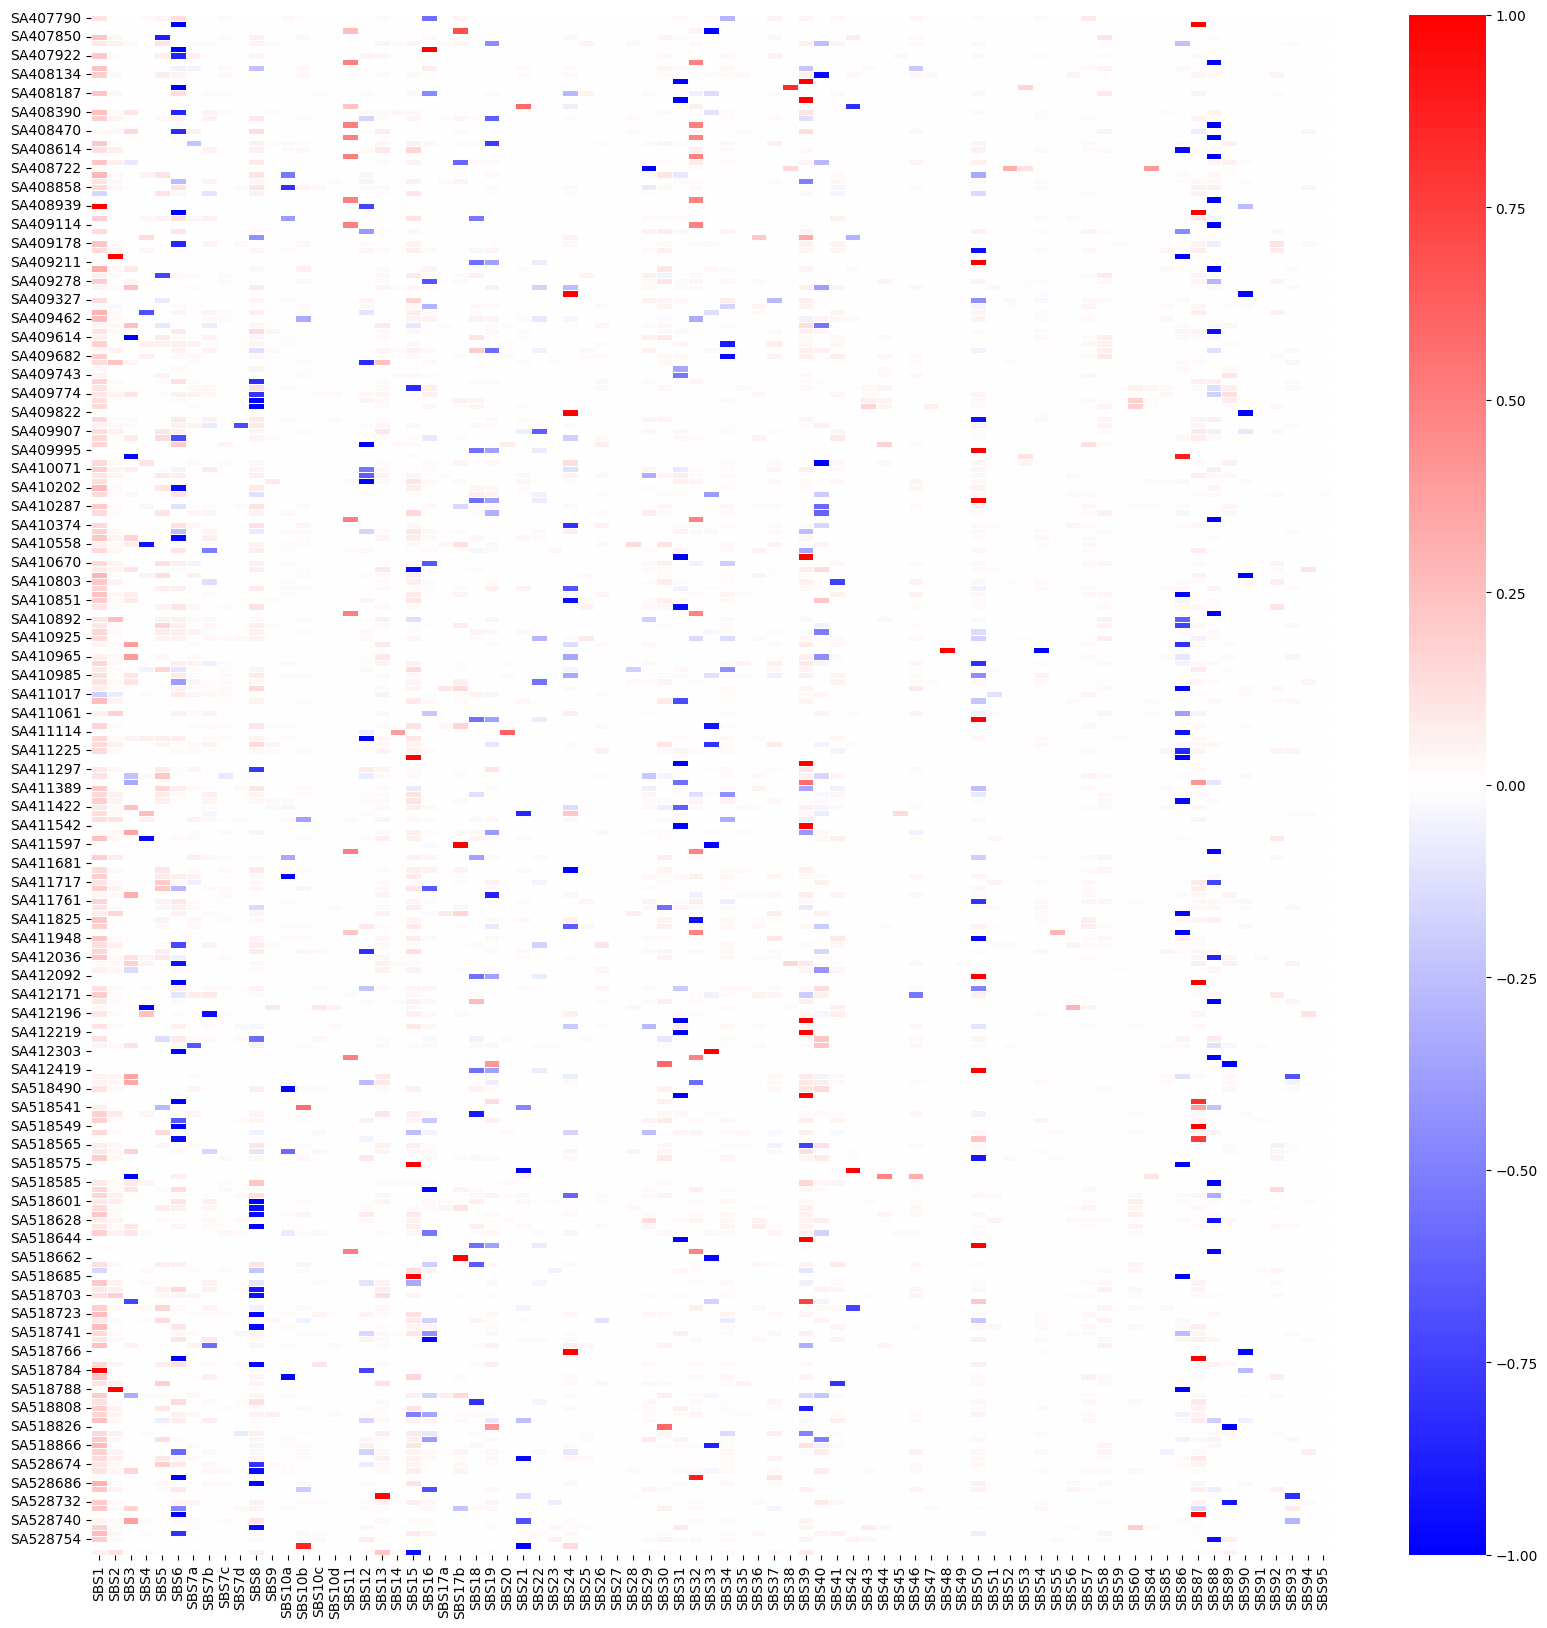

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(DIFF_VAL, cmap='bwr',linewidths=.5, center=0)
plt.title('')
plt.show()

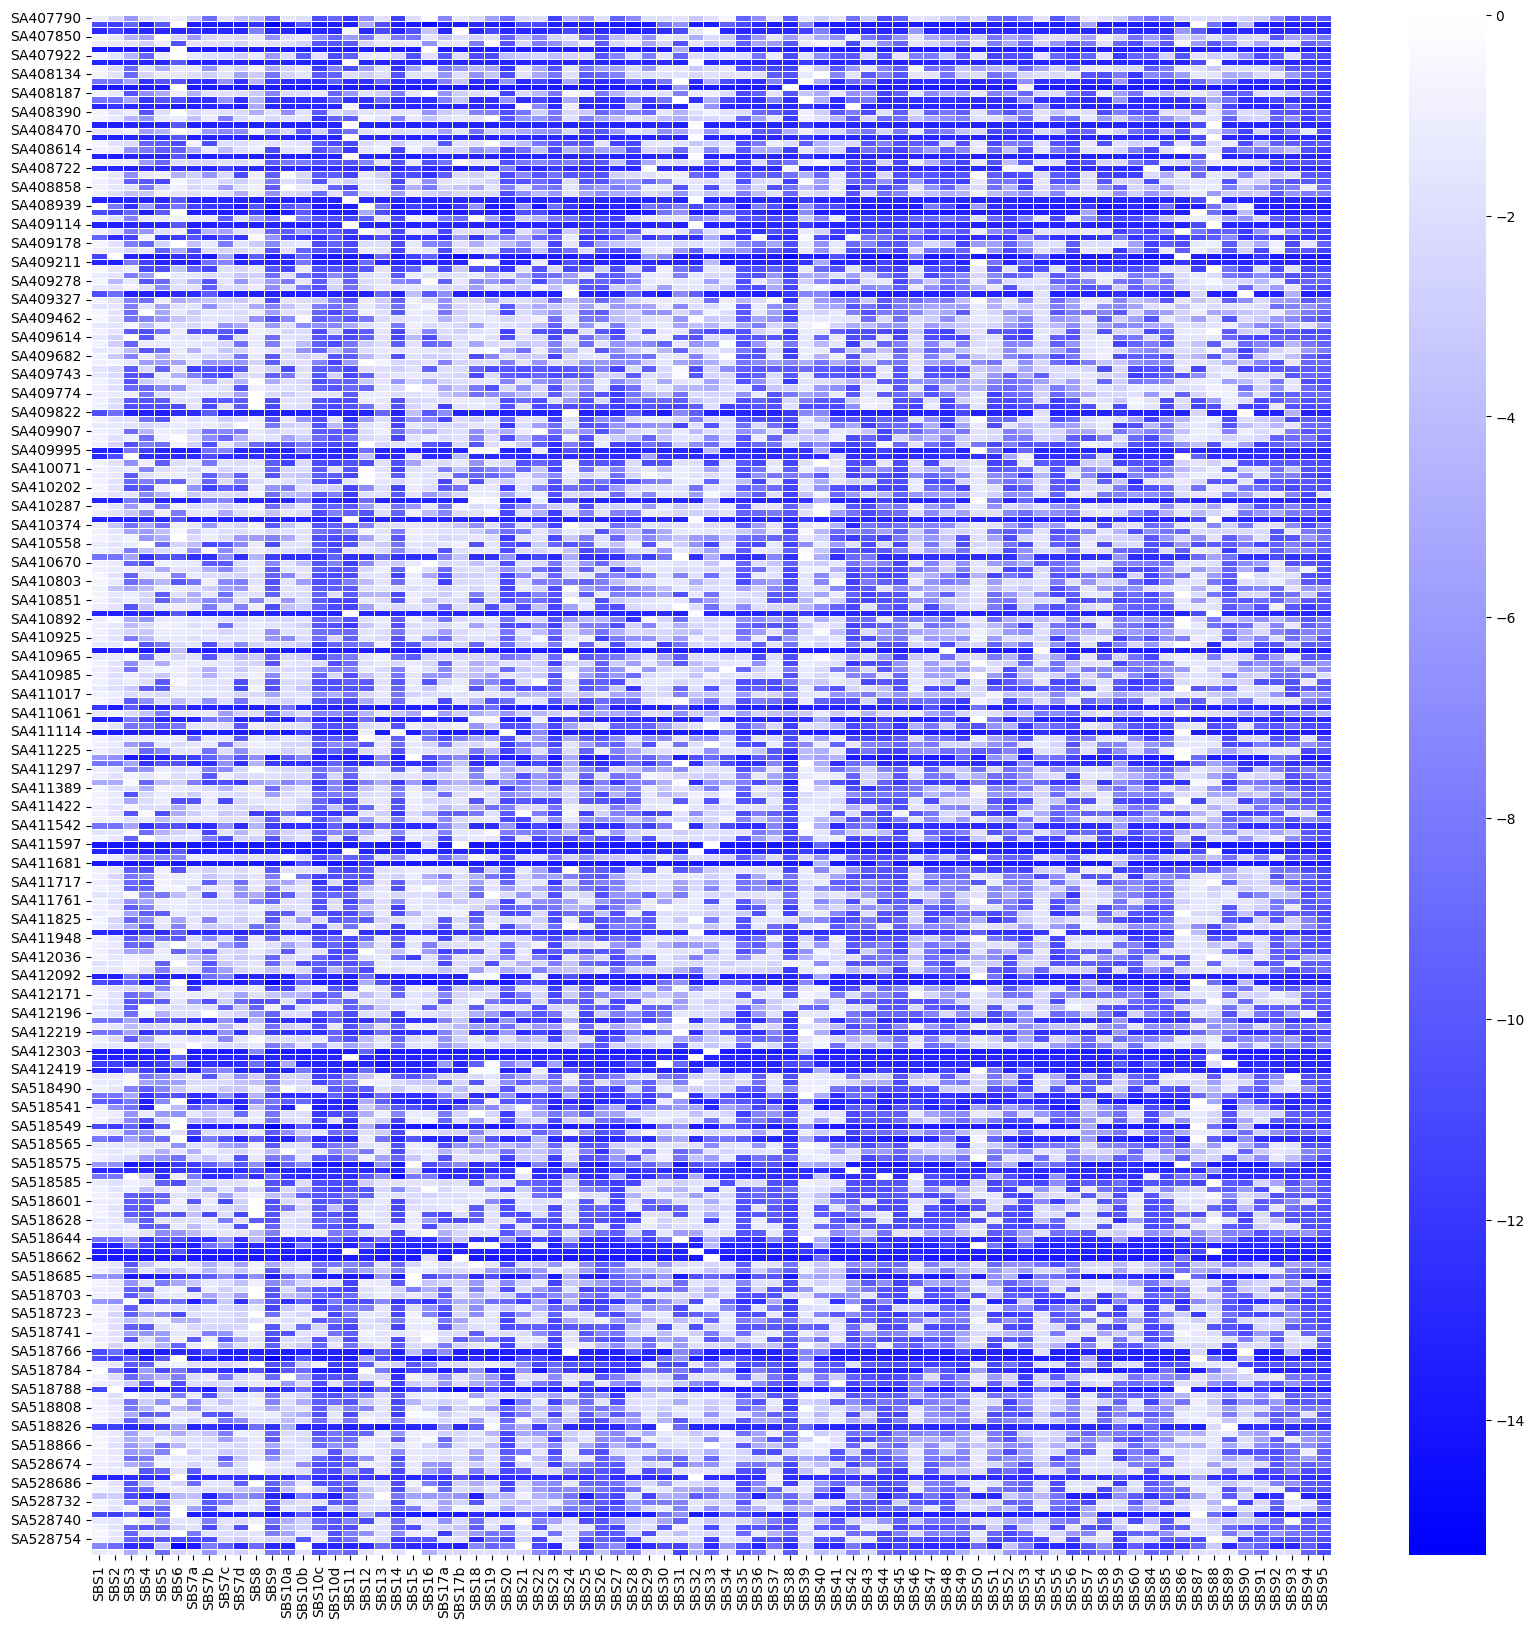

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(np.log10(abs(DIFF_VAL)), cmap='bwr',linewidths=.5, center=0)
plt.title('')
plt.show()

In [ ]:
import torch
import torch.nn as nn
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
TEST_OUTPUTS={}
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        x = self.log_softmax(x)
        return x


input_size = 79
hidden_size = 128
output_size = 79


# Dati di input e output
input_data = torch.tensor(INPUT.values).float()
output_data = torch.tensor(TARGET.values)


input_data_numpy = input_data.numpy()
output_data_numpy = output_data.numpy()

loo = LeaveOneOut()
total_samples = len(input_data)
errors=[]
z=0
for train_index, test_index in loo.split(input_data):
    torch.manual_seed(seed)
    np.random.seed(seed)
    net = NeuralNetwork(input_size, hidden_size, output_size)
    criterion = nn.KLDivLoss(reduction='batchmean')
    optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
    # Training set e test set
    X_train, X_test = input_data_numpy[train_index], input_data_numpy[test_index]
    y_train, y_test = output_data_numpy[train_index], output_data_numpy[test_index]

    # Addestramento
    for epoch in range(10000):
        optimizer.zero_grad()
        outputs = net(torch.tensor(X_train).float())
        loss = criterion(outputs, torch.tensor(y_train))
        loss.backward()
        optimizer.step()

    # Valutazione
    test_outputs = net(torch.tensor(X_test).float())
    test_loss = criterion(test_outputs, torch.tensor(y_test))
    TEST_OUTPUTS[z]=torch.exp(test_outputs)
    z=z+1

    errors.append(test_loss.item())


average_error = sum(errors) / len(errors)
print(f'Media degli errori: {average_error}')

Media degli errori: 6.867615741079711


In [ ]:
tensori_lista = list(TEST_OUTPUTS.values())

# Crea un tensore di tensori utilizzando torch.stack
tensore_di_tensori = torch.stack(tensori_lista)

In [ ]:
pred=tensore_di_tensori

In [ ]:
pred=torch.squeeze(pred,dim=1)

In [ ]:
pred_dataset=pd.DataFrame(pred.detach().numpy(),index=TARGET.index,columns=TARGET.columns)

In [ ]:
pred_dataset

SBS1          SBS2          SBS3          SBS4  \
SA594315  5.487278e-02  1.187953e-01  2.211003e-06  2.167184e-03   
SA594666  8.759039e-03  1.783697e-01  1.104779e-06  1.528430e-09   
SA594675  4.104200e-06  5.710486e-07  9.043688e-10  1.972281e-05   
SA594687  4.948192e-04  7.128720e-04  7.231417e-01  2.849615e-15   
SA594695  7.773912e-03  6.393436e-02  1.726017e-04  1.181927e-03   
...                ...           ...           ...           ...   
SA596039  1.608562e-04  4.259710e-03  4.054664e-06  1.439509e-10   
SA596051  3.089352e-05  6.118435e-05  1.595364e-04  1.344052e-11   
SA596068  3.076493e-02  2.988957e-01  3.410248e-07  1.043855e-09   
SA596093  1.895781e-12  6.105223e-12  6.479367e-13  7.406120e-10   
SA596106  1.033359e-05  1.638606e-06  2.379663e-11  1.885873e-13   

                  SBS5          SBS6         SBS7a         SBS7b  \
SA594315  9.756781e-06  3.271759e-03  5.779569e-03  6.964652e-07   
SA594666  1.745699e-12  5.243832e-04  1.918252e-02  1.383466e-12   
SA594675  2.476341e-08  3.845842e-15  1.323362e-09  6.607505e-01   
SA594687  1.189771e-13  3.456982e-05  1.052089e-06  3.198466e-13   
SA594695  2.004627e-01  1.453615e-02  2.959006e-02  2.451463e-05   
...                ...           ...           ...           ...   
SA596039  4.619797e-09  5.696621e-05  6.491262e-05  3.876264e-11   
SA596051  6.655022e-07  2.595536e-14  2.711017e-08  1.857912e-08   
SA596068  6.863564e-09  9.166448e-04  3.278137e-02  8.122547e-09   
SA596093  3.131983e-15  1.796960e-10  1.058018e-10  4.914866e-18   
SA596106  1.121671e-09  2.249054e-09  1.558766e-06  4.764570e-14   

                 SBS7c         SBS7d  ...         SBS86         SBS87  \
SA594315  1.522859e-05  8.164634e-05  ...  1.719806e-01  6.892844e-04   
SA594666  3.803625e-04  7.305885e-05  ...  2.308833e-06  3.864824e-04   
SA594675  8.261742e-07  3.104350e-05  ...  6.426969e-04  1.033946e-08   
SA594687  2.594197e-05  1.882679e-05  ...  5.320974e-10  7.774889e-08   
SA594695  1.924846e-04  3.960534e-08  ...  9.047386e-05  9.375760e-02   
...                ...           ...  ...           ...           ...   
SA596039  2.348003e-06  2.044091e-06  ...  6.561866e-08  1.680142e-02   
SA596051  4.953796e-09  1.228773e-07  ...  7.674514e-07  7.270518e-03   
SA596068  6.144626e-04  1.694240e-05  ...  6.034945e-05  2.403597e-03   
SA596093  7.771910e-19  1.638952e-14  ...  4.336761e-17  2.546048e-10   
SA596106  1.530987e-12  1.545395e-08  ...  2.573821e-17  2.624264e-06   

                 SBS88         SBS89         SBS90         SBS91  \
SA594315  5.155111e-06  6.937539e-07  3.056740e-05  1.885138e-07   
SA594666  8.963869e-04  7.773088e-06  6.264470e-06  3.948606e-13   
SA594675  3.004106e-10  2.172717e-14  5.574420e-17  1.893687e-10   
SA594687  1.766570e-08  2.222728e-03  7.550219e-10  3.249564e-06   
SA594695  1.805544e-04  9.076731e-06  7.958398e-04  7.531440e-03   
...                ...           ...           ...           ...   
SA596039  1.671903e-03  2.827621e-05  2.201170e-06  3.756990e-11   
SA596051  7.465037e-04  6.068243e-13  6.172943e-10  5.166688e-13   
SA596068  1.355116e-03  1.733314e-06  1.300598e-03  3.665066e-09   
SA596093  4.929743e-16  8.845807e-14  9.950707e-19  7.448992e-13   
SA596106  3.165095e-03  5.627507e-12  3.440297e-05  7.917004e-09   

                 SBS92         SBS93         SBS94         SBS95  
SA594315  3.902269e-09  6.352925e-07  6.205386e-09  3.171852e-08  
SA594666  4.659667e-08  3.101314e-03  2.171838e-11  1.367553e-10  
SA594675  1.822846e-11  3.106045e-01  4.136968e-07  2.892773e-08  
SA594687  7.863285e-11  1.468473e-13  1.843392e-06  1.540638e-07  
SA594695  9.878428e-12  5.220133e-08  1.461003e-08  8.042610e-10  
...                ...           ...           ...           ...  
SA596039  1.375919e-09  1.423536e-07  4.716190e-10  3.911455e-10  
SA596051  3.179021e-03  1.037496e-18  2.304031e-10  1.001031e-11  
SA596068  2.584561e-09  2.201266e-04  1.605430e-09  2.448314e-10  
SA596093  7.095472e-

In [ ]:
DIFF=TARGET-pred_dataset

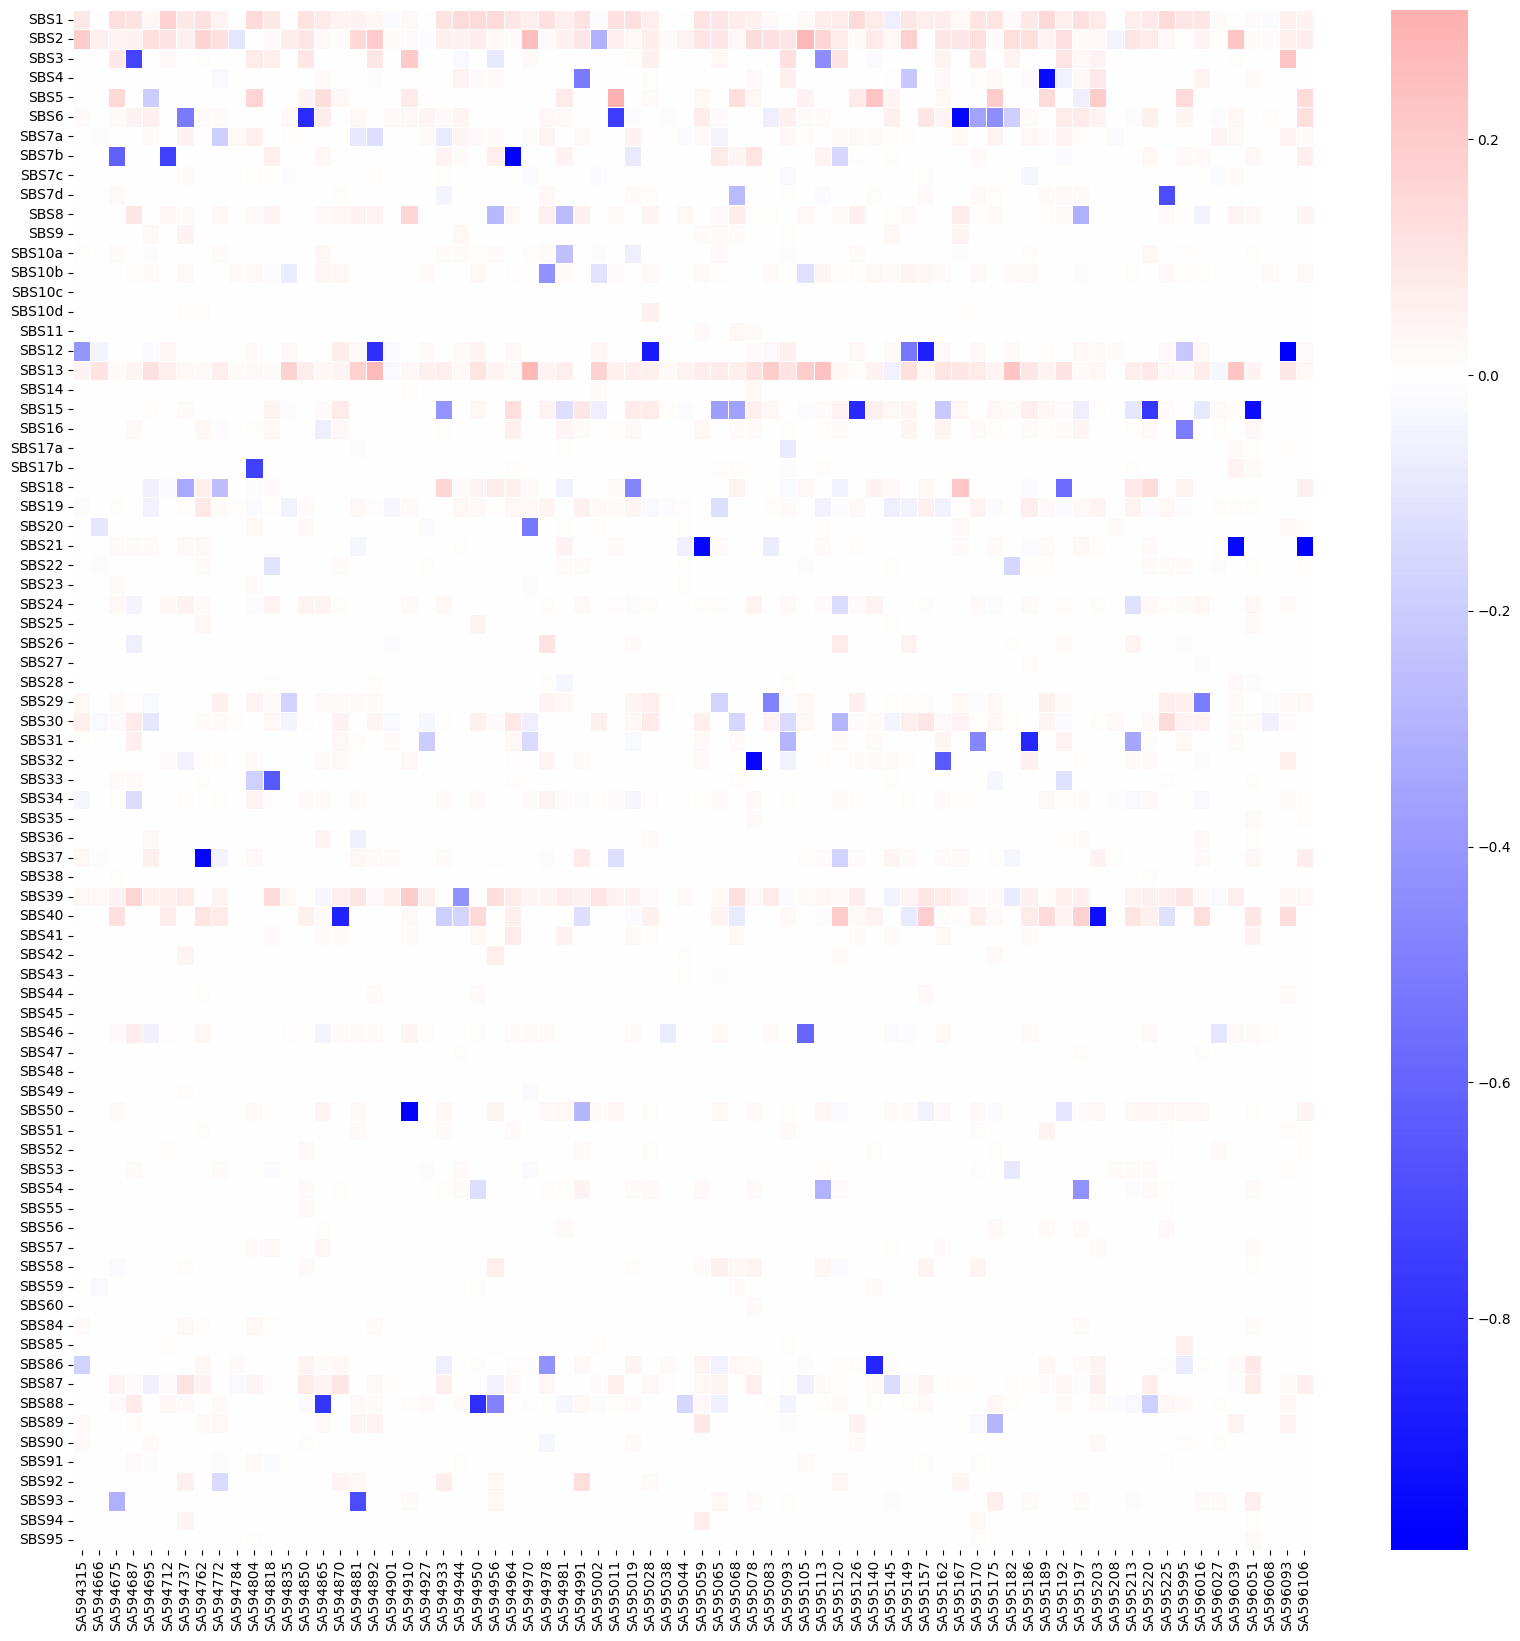

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(DIFF.T, cmap='bwr',linewidths=.5, center=0)
plt.title('')
plt.show()

In [ ]:
DIFF_ABS=abs(DIFF)

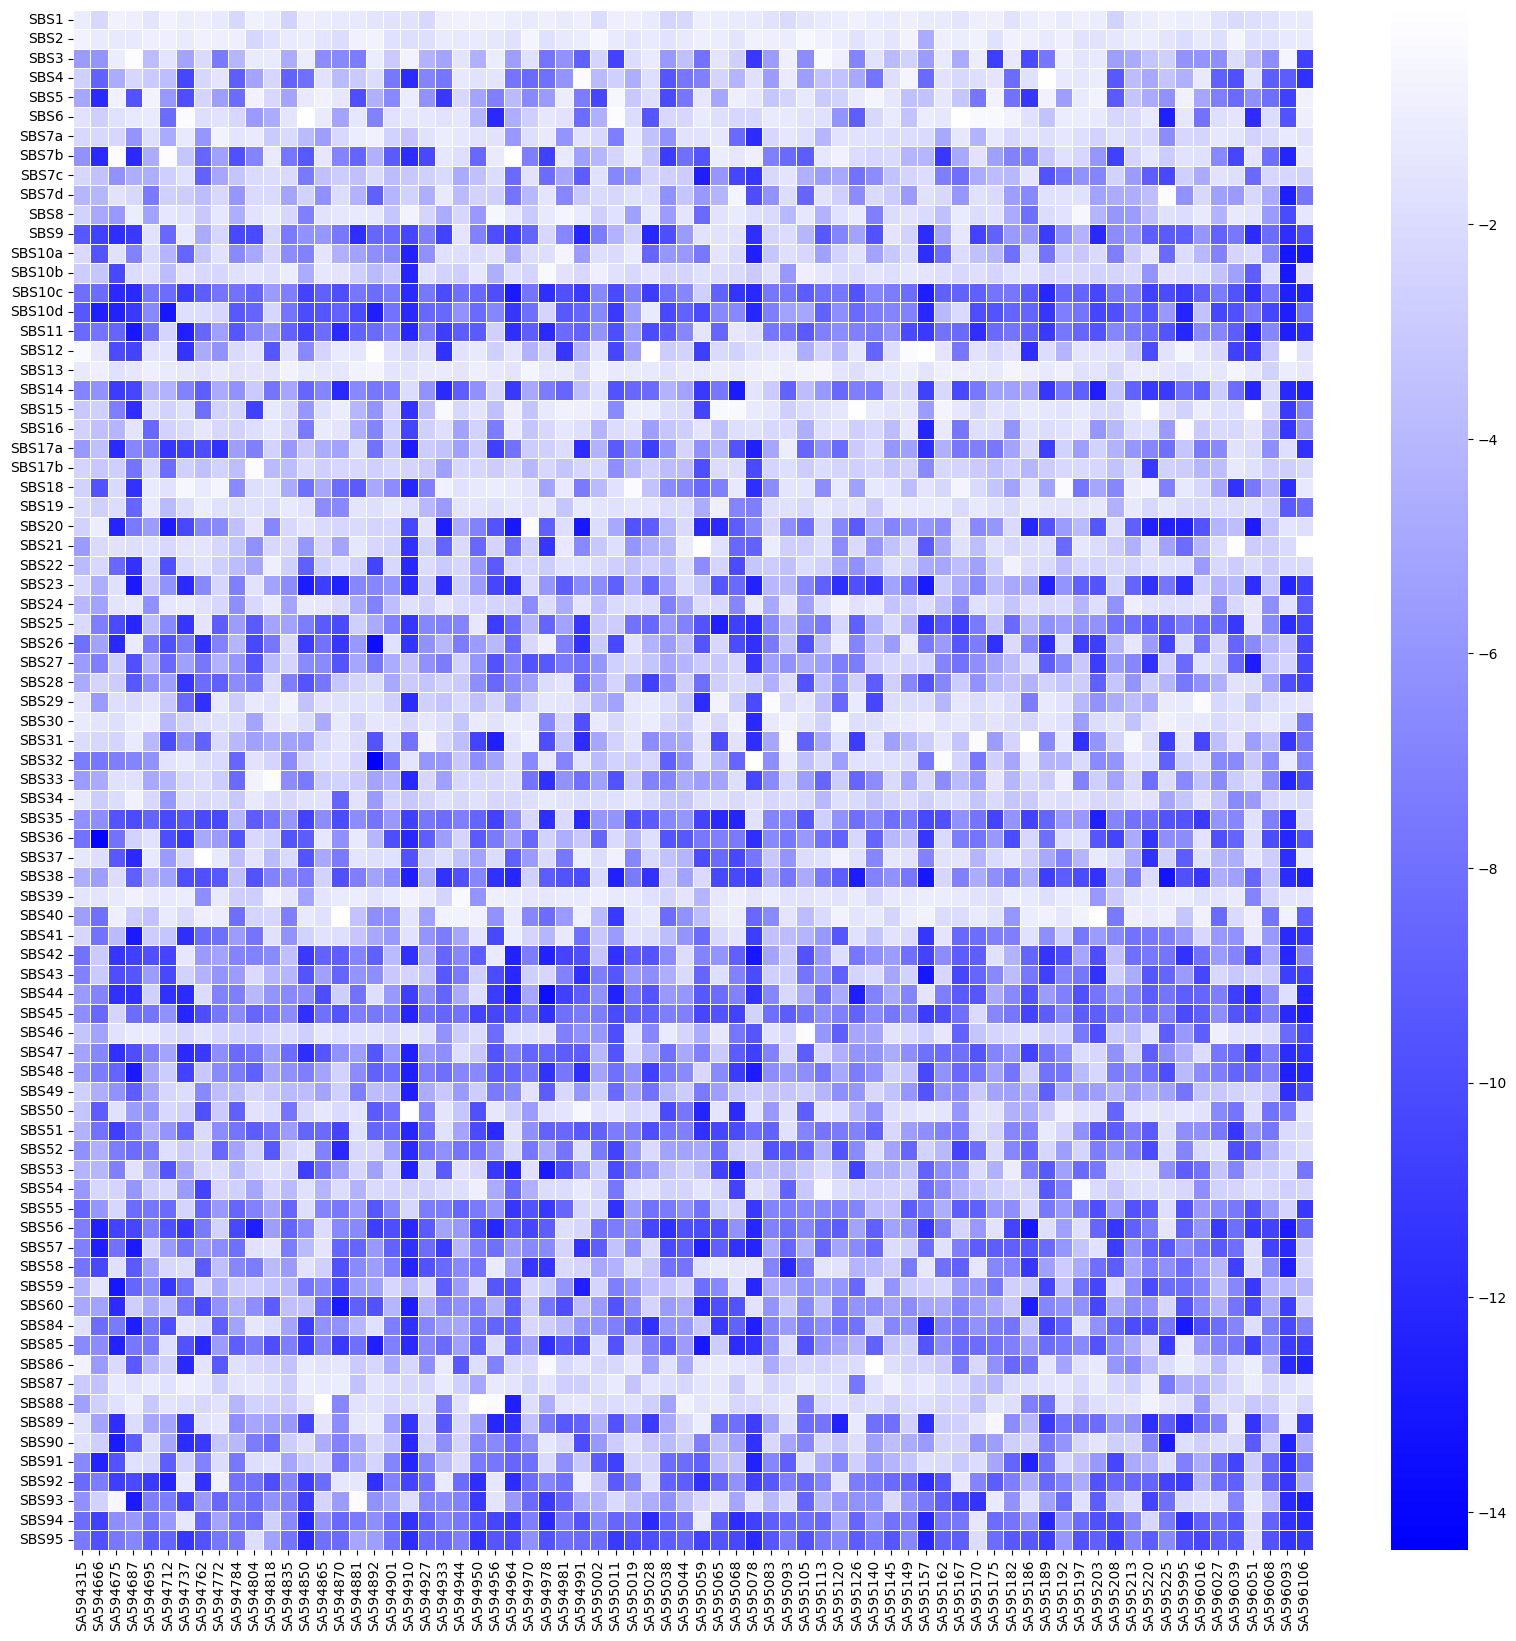

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(np.log10(DIFF_ABS.T), cmap='bwr',linewidths=.5, center=0)
plt.title('')
plt.show()

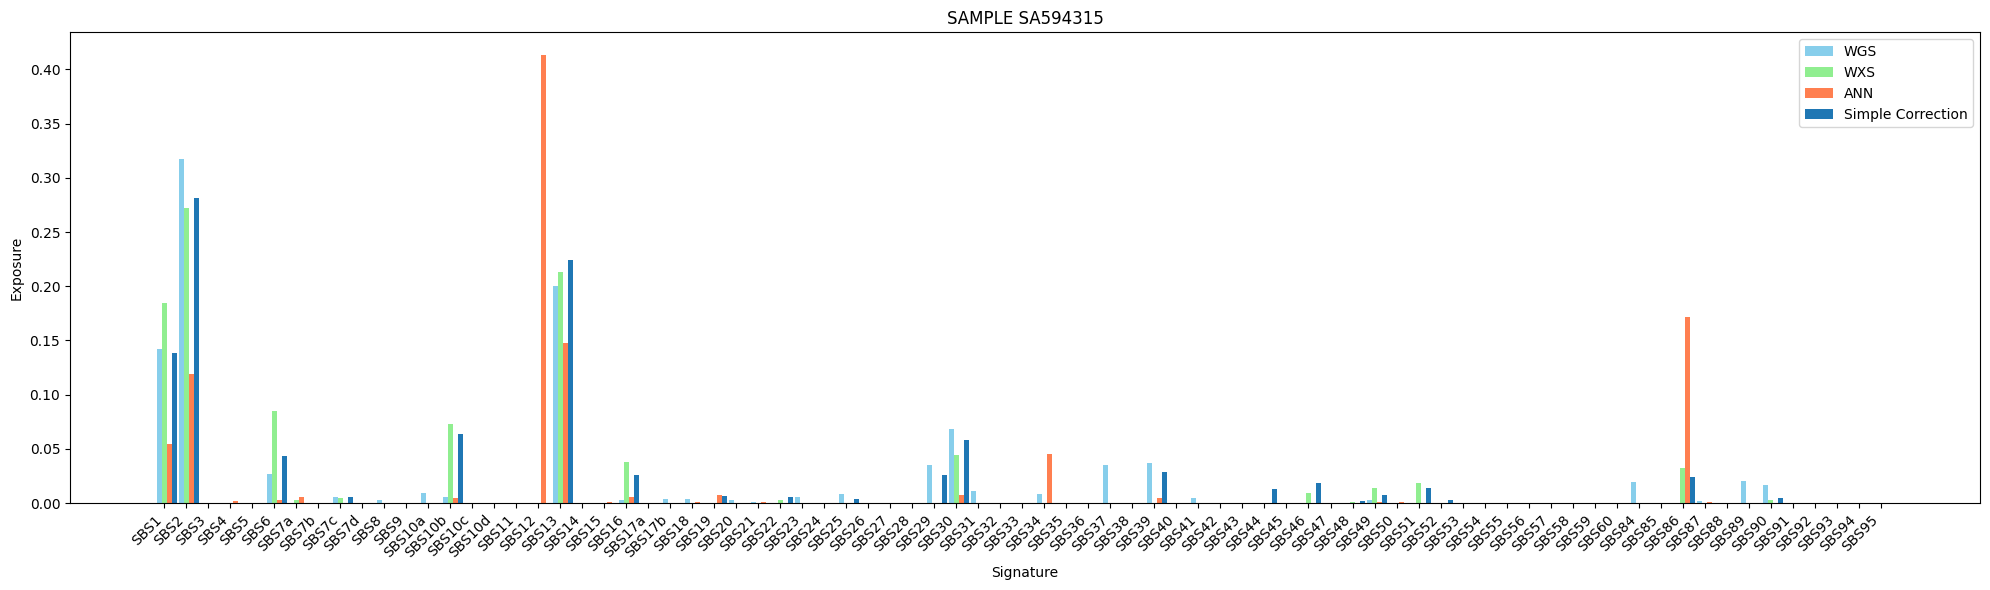

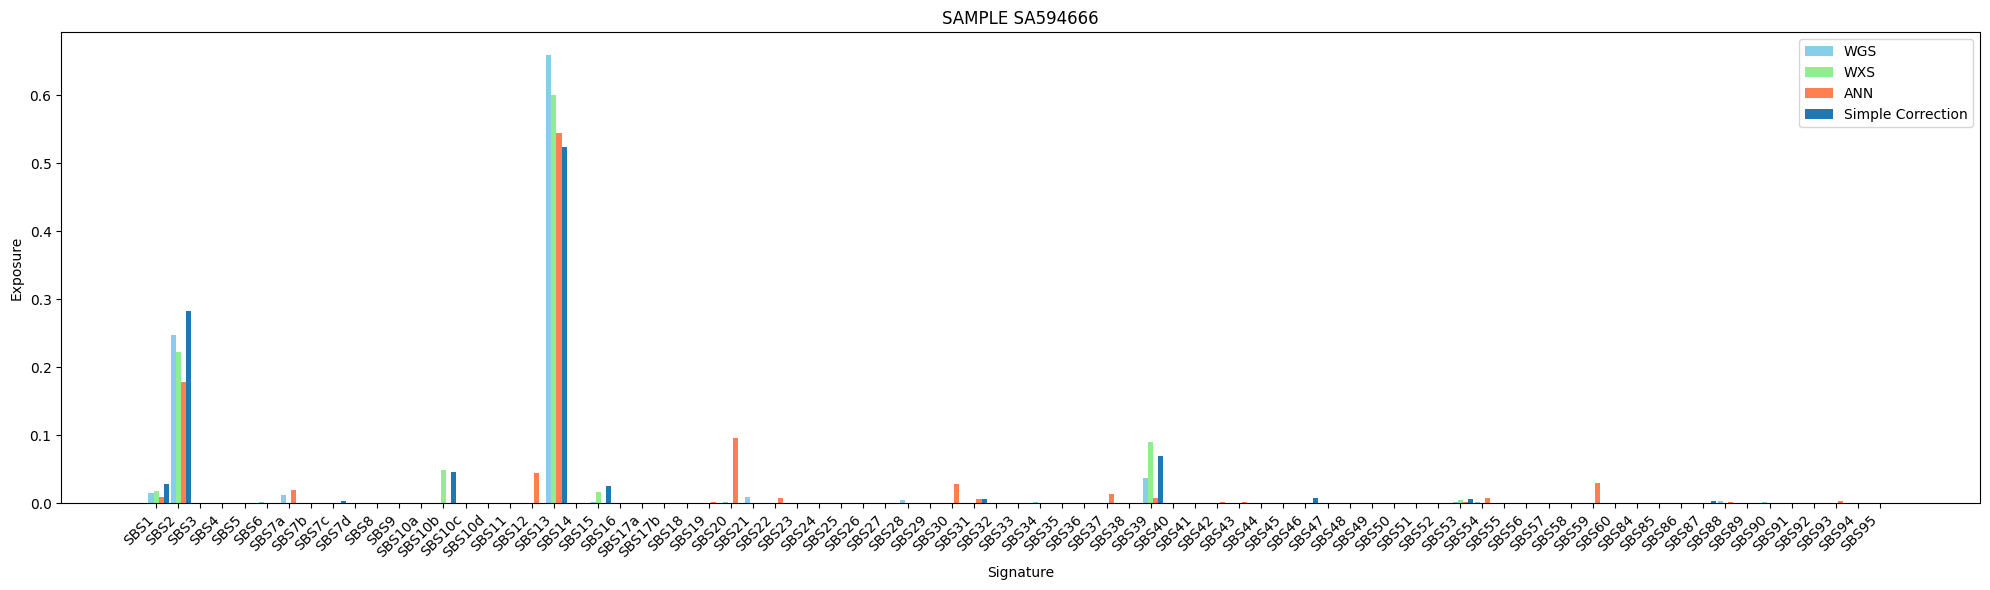

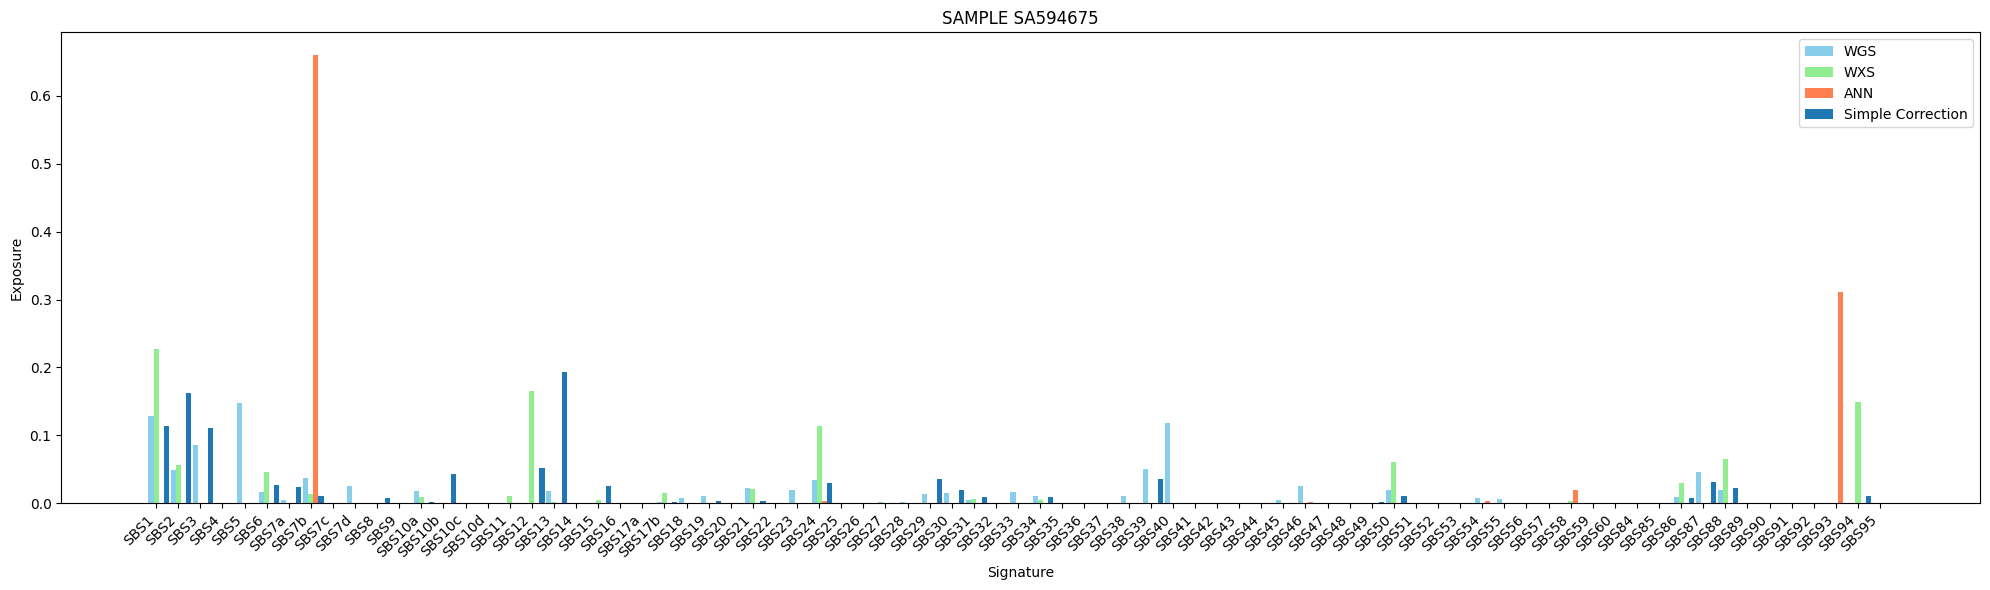

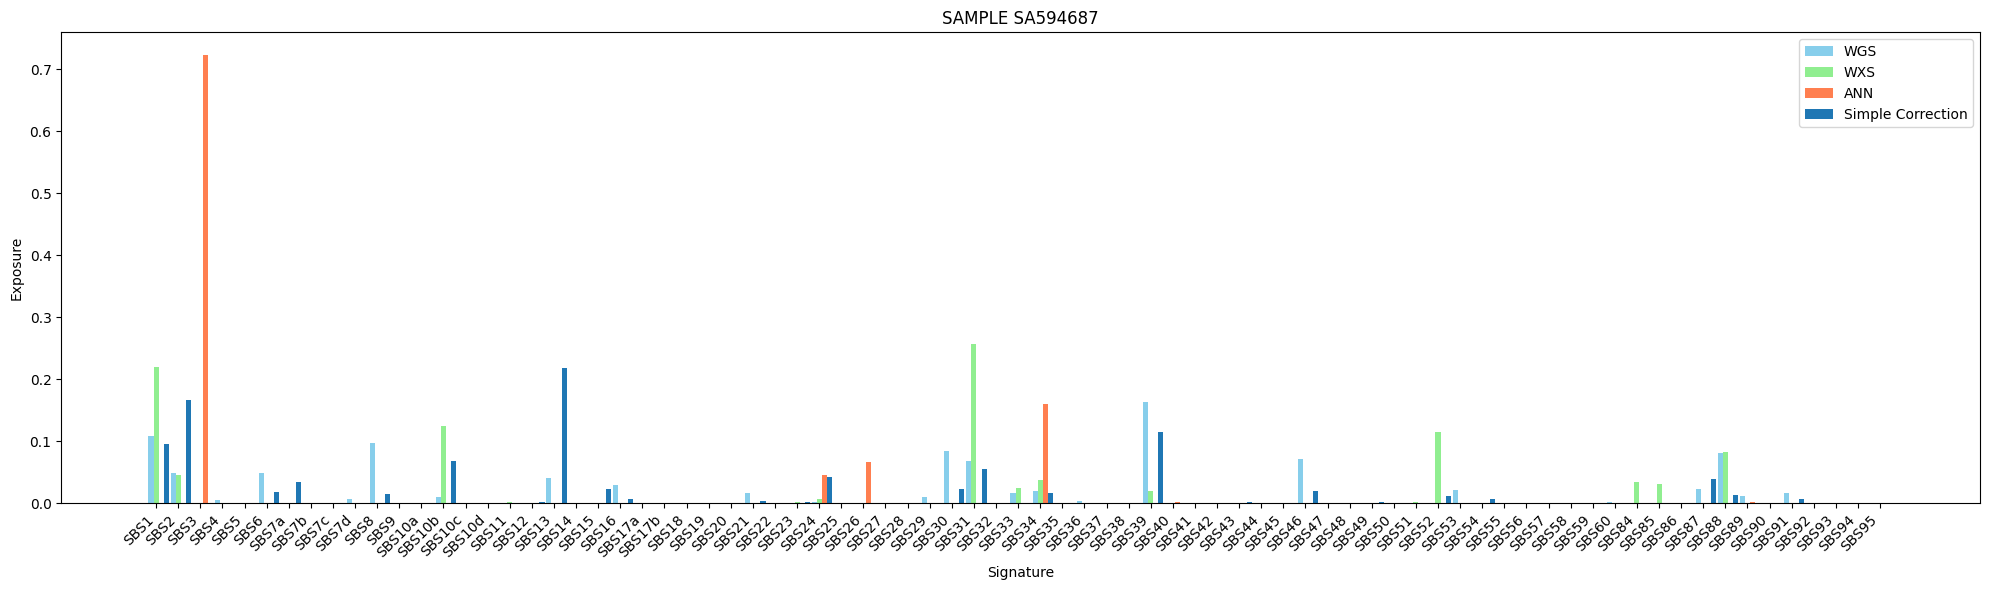

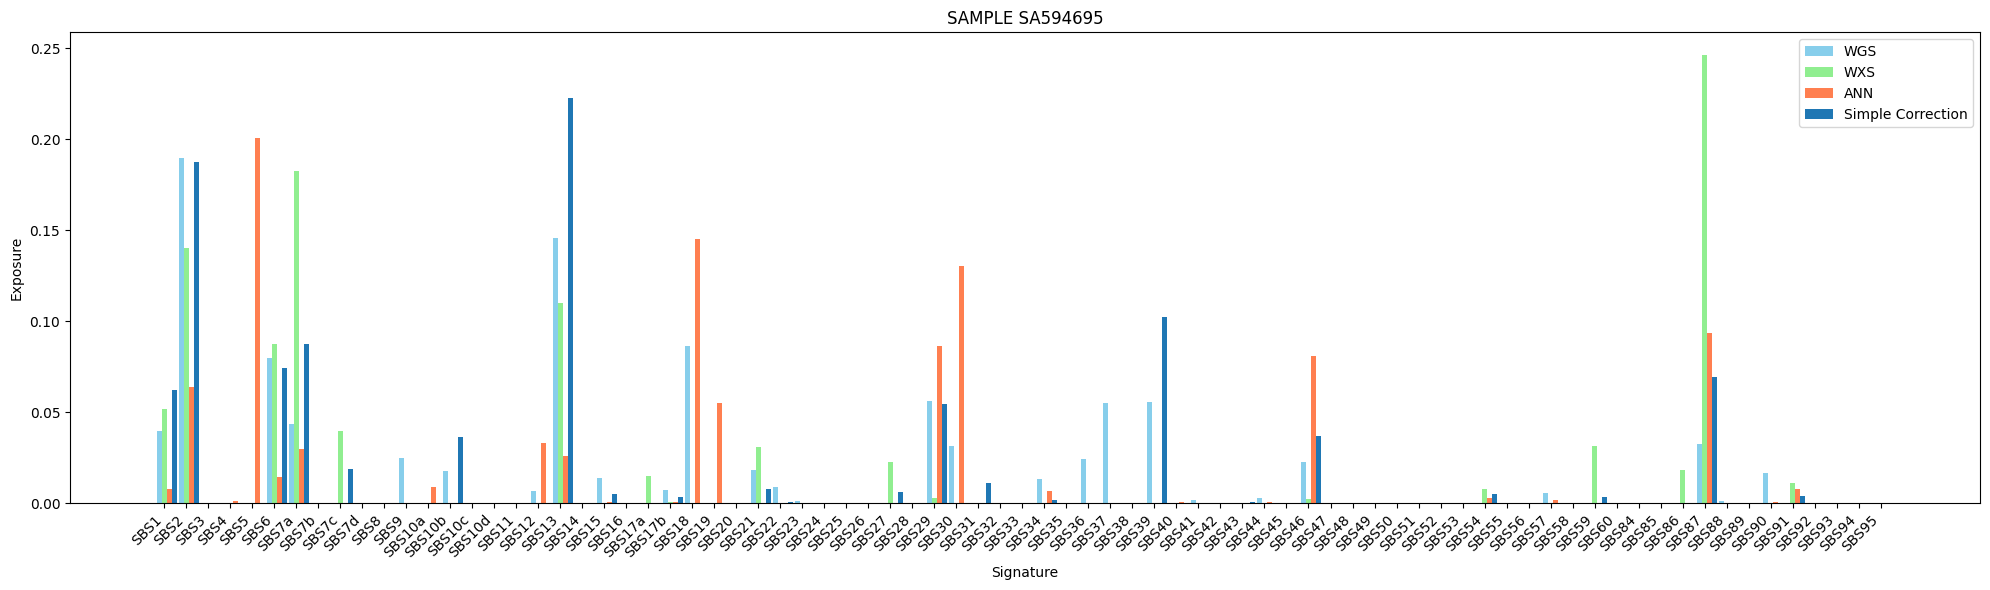

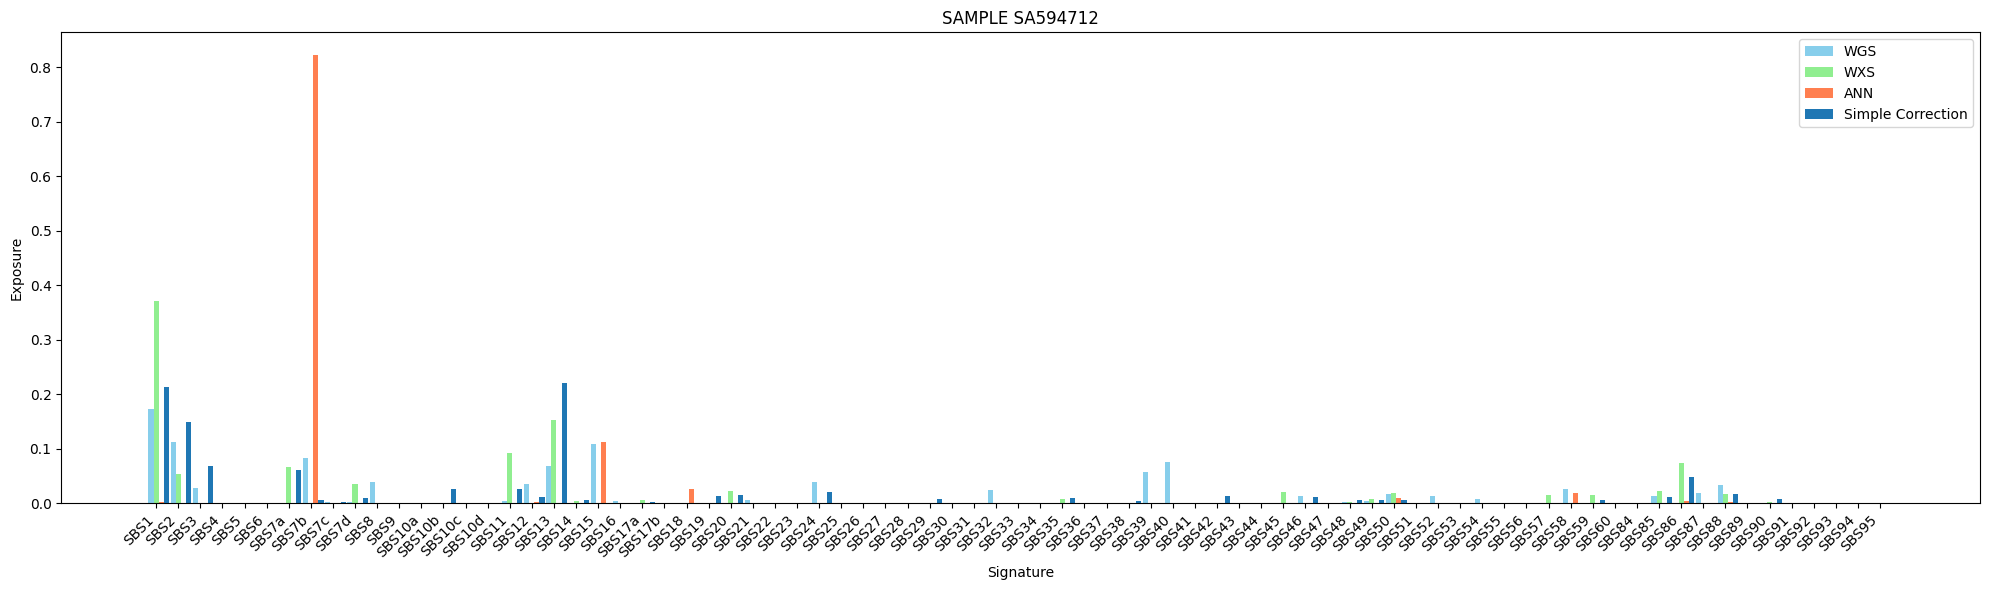

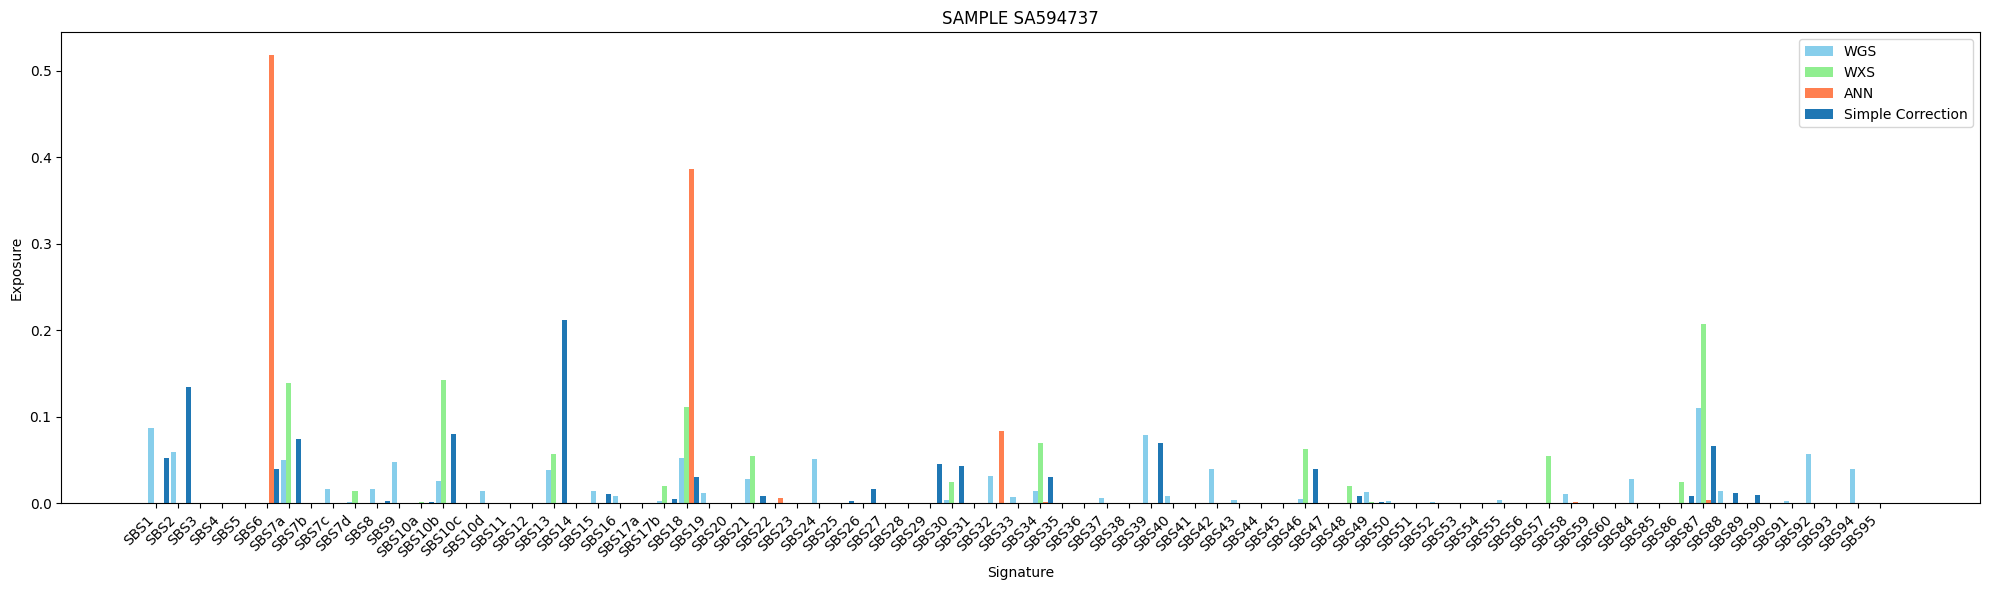

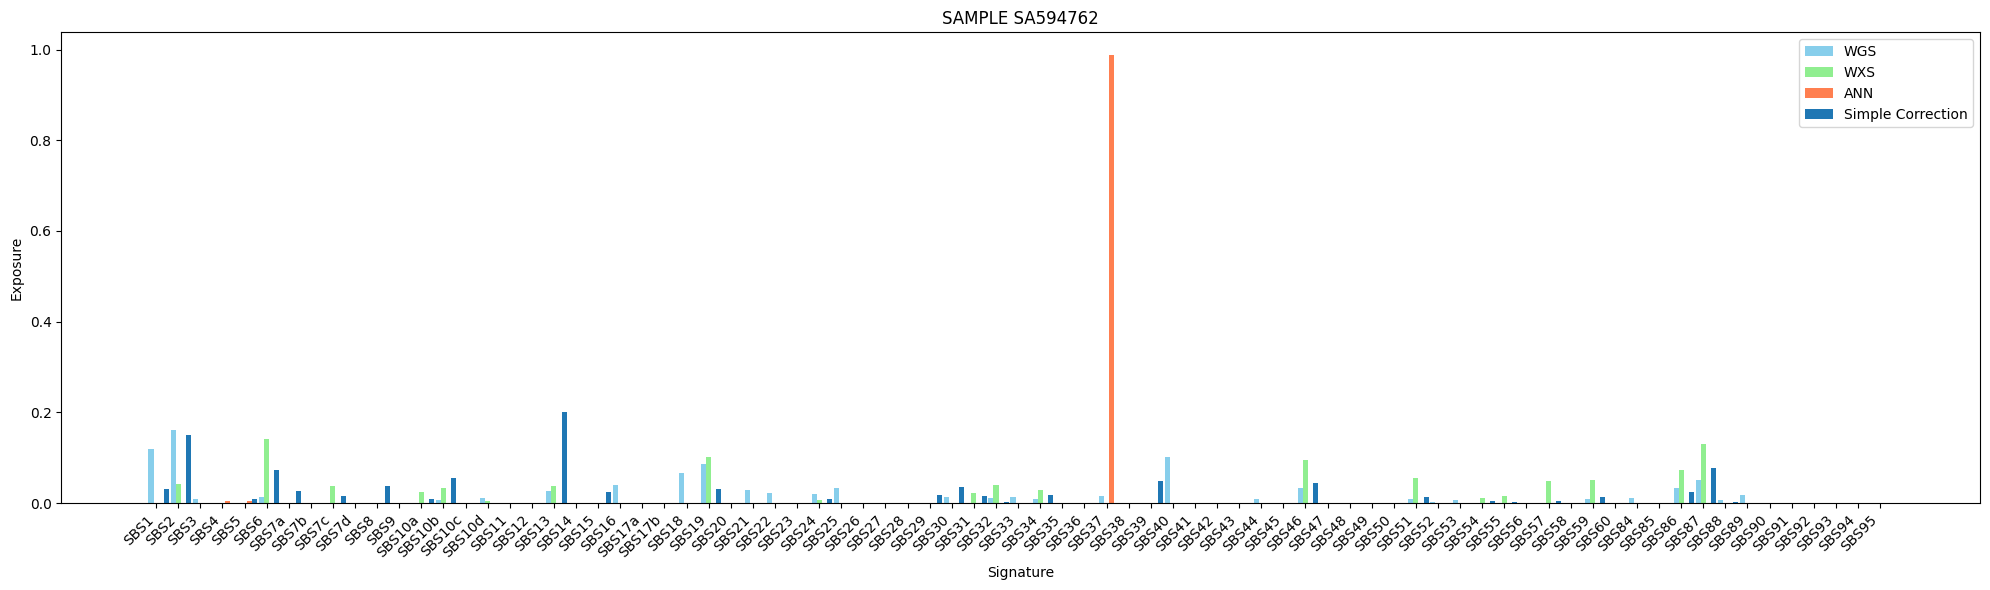

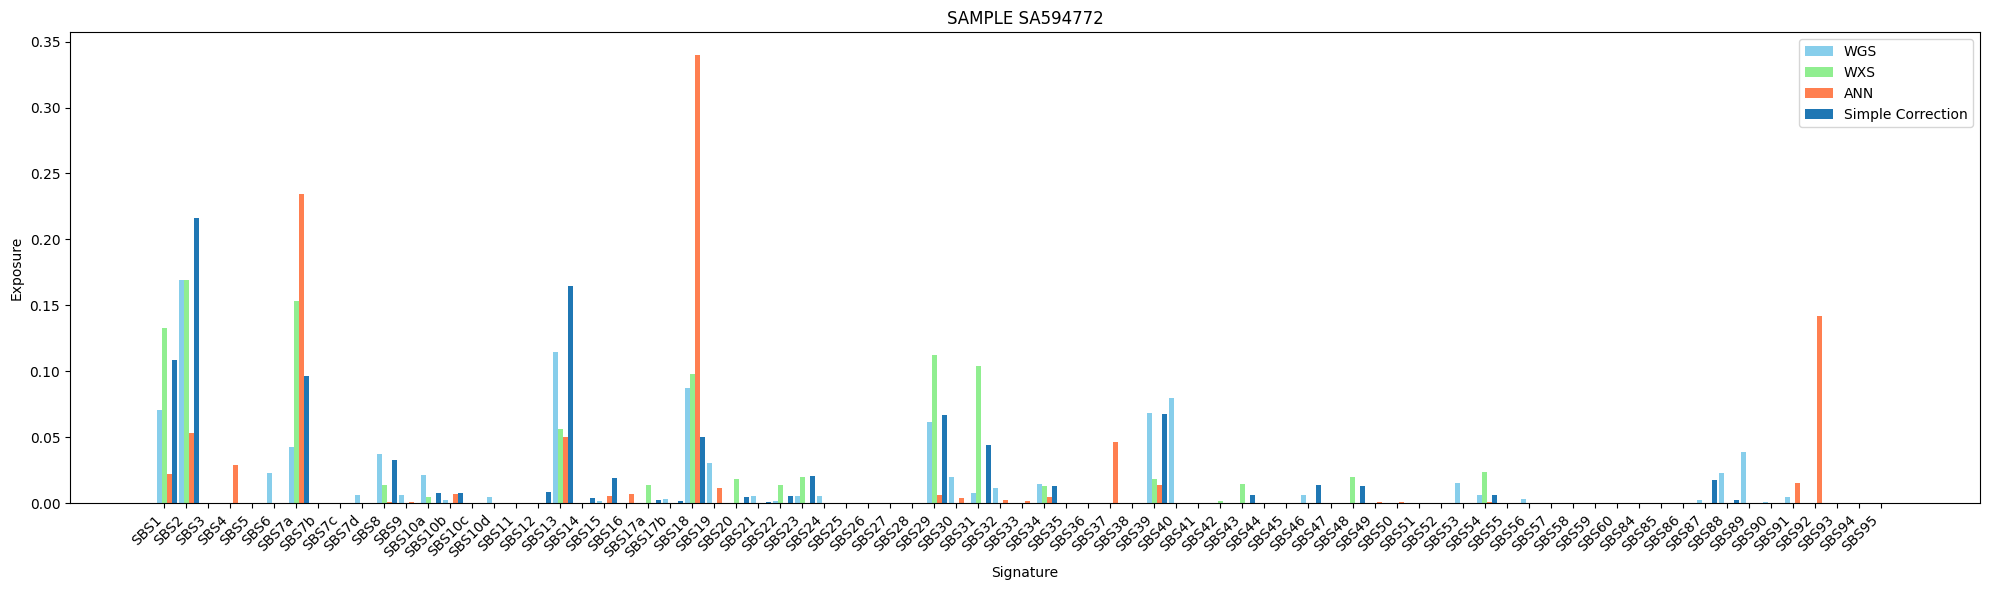

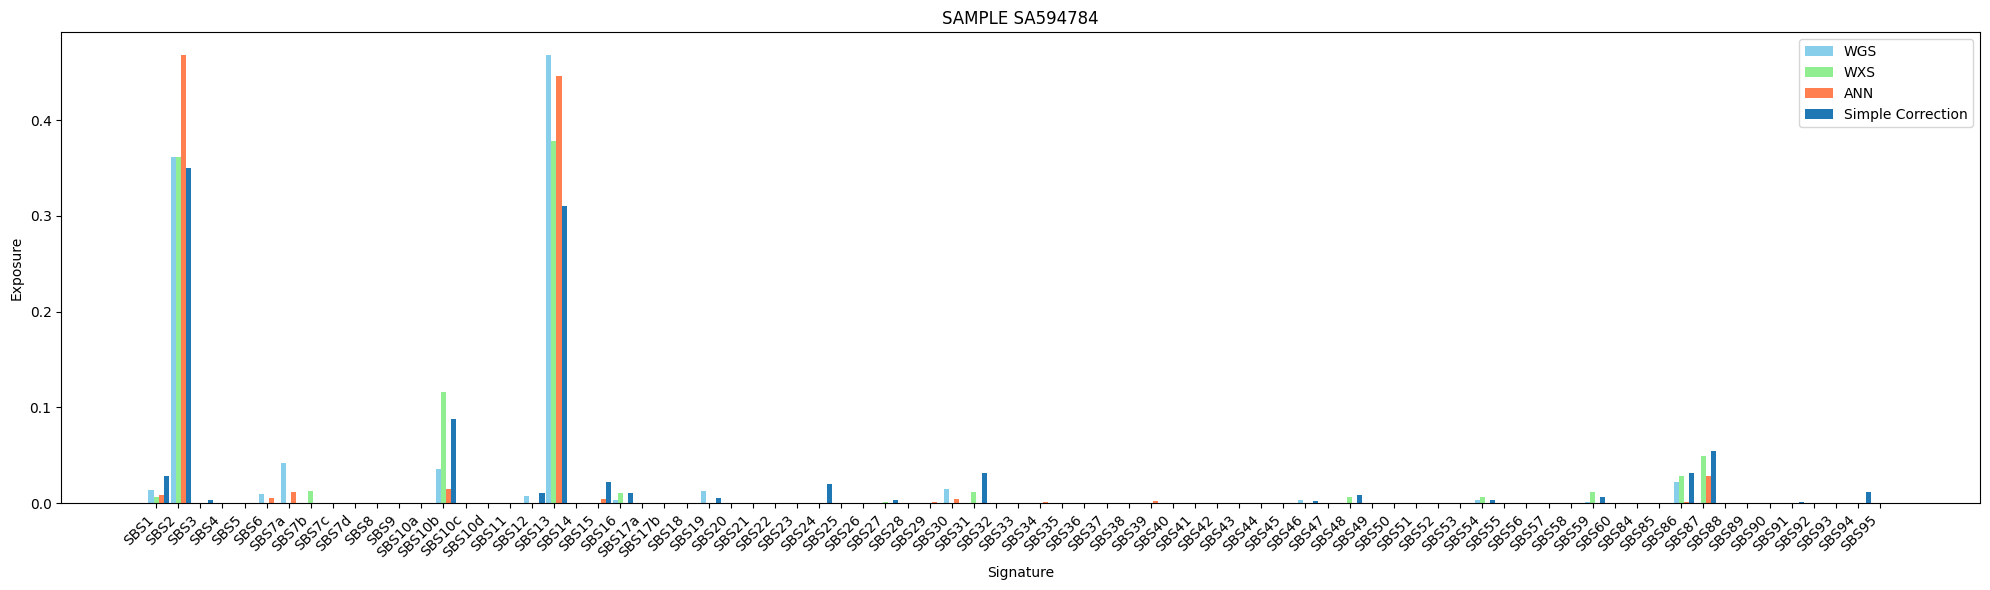

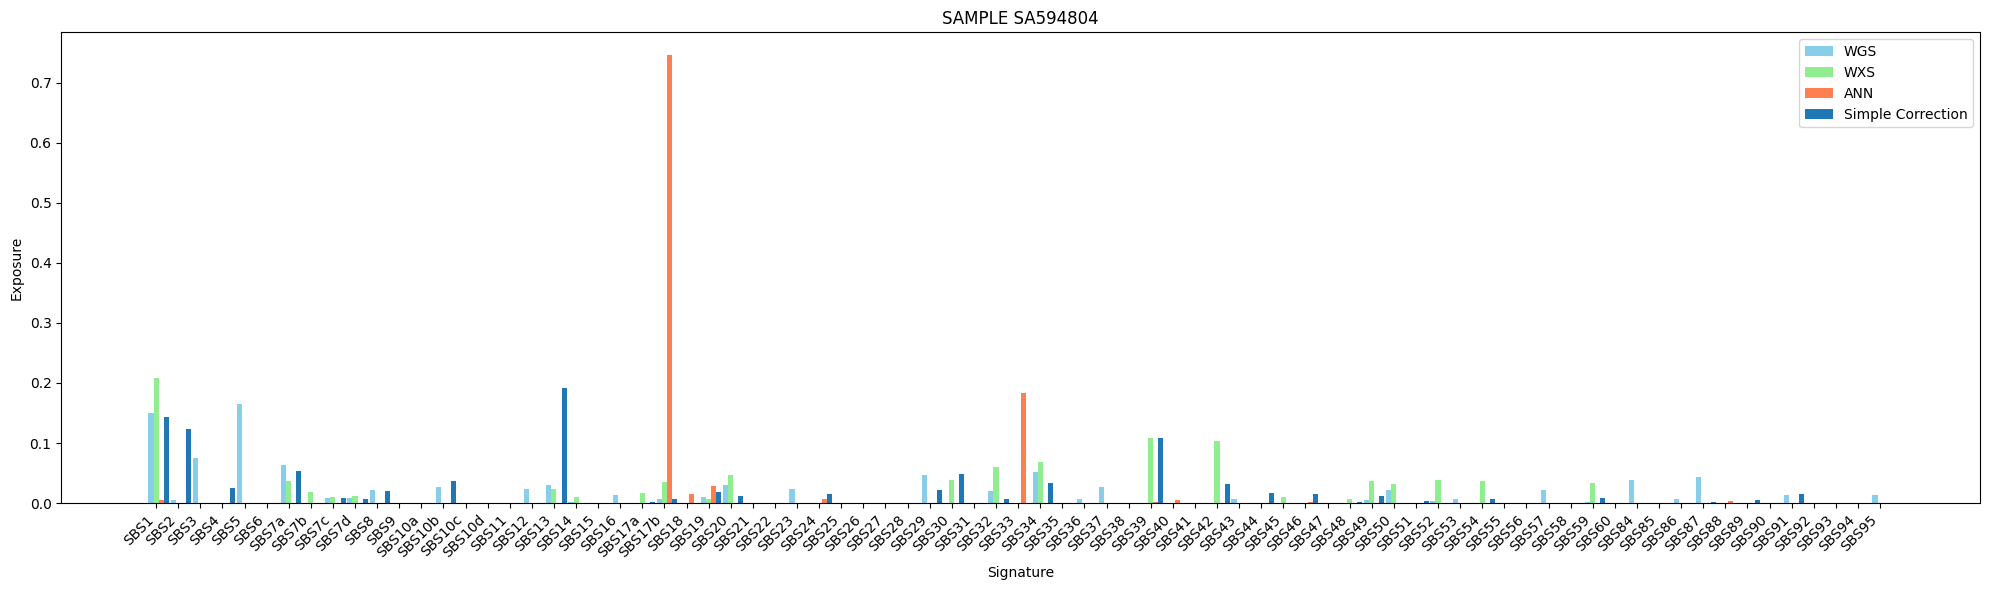

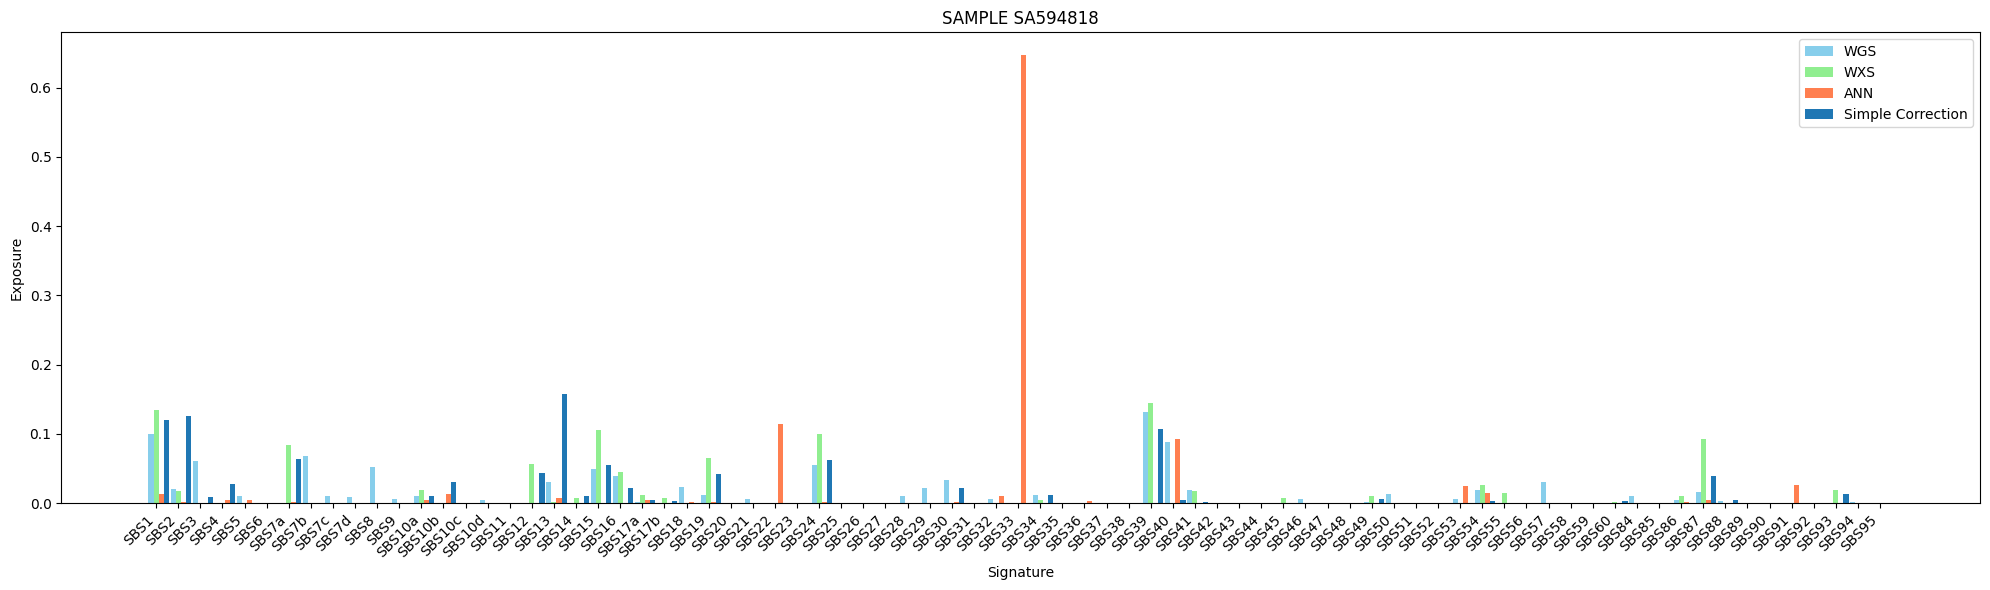

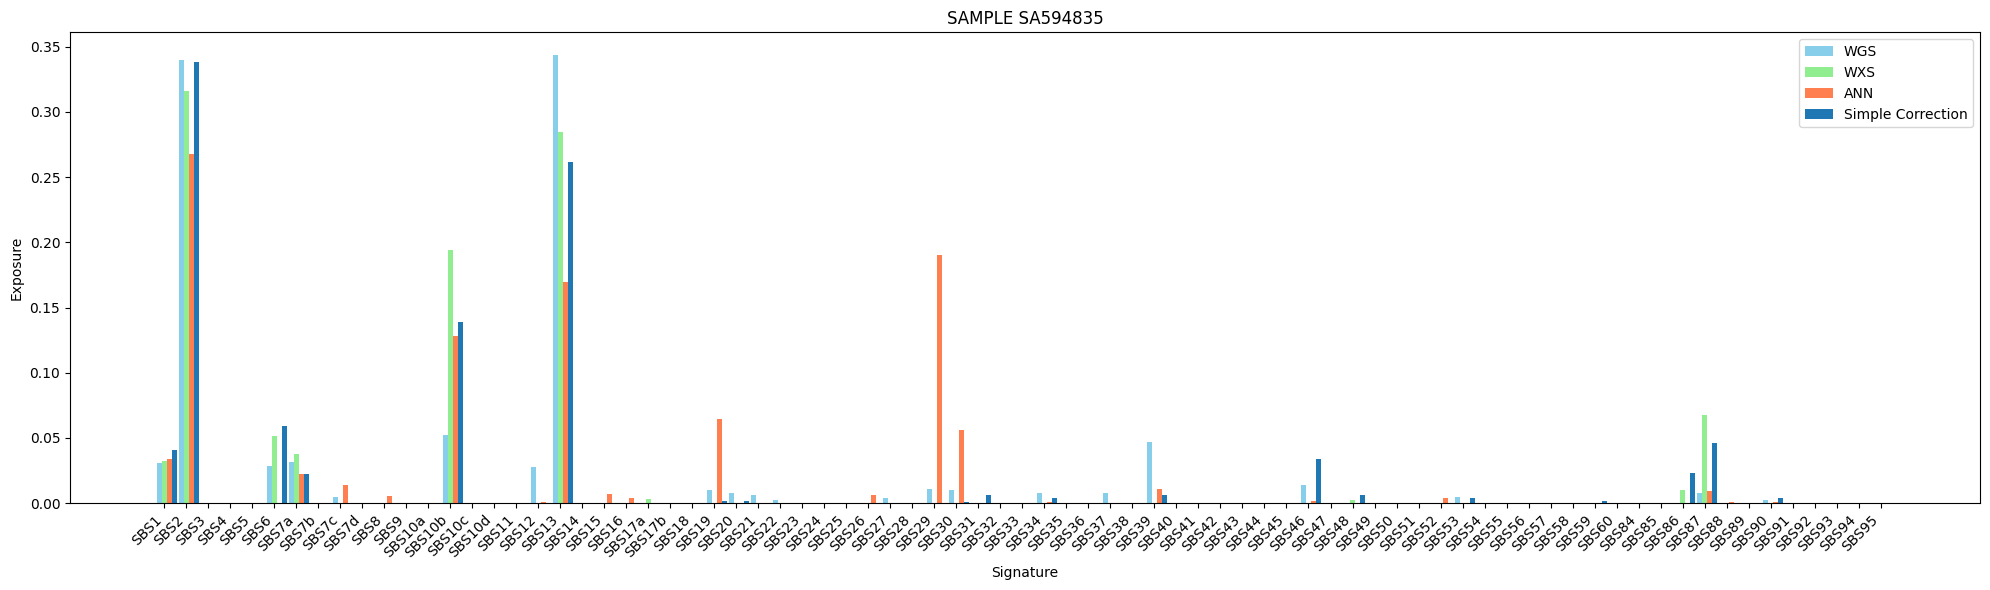

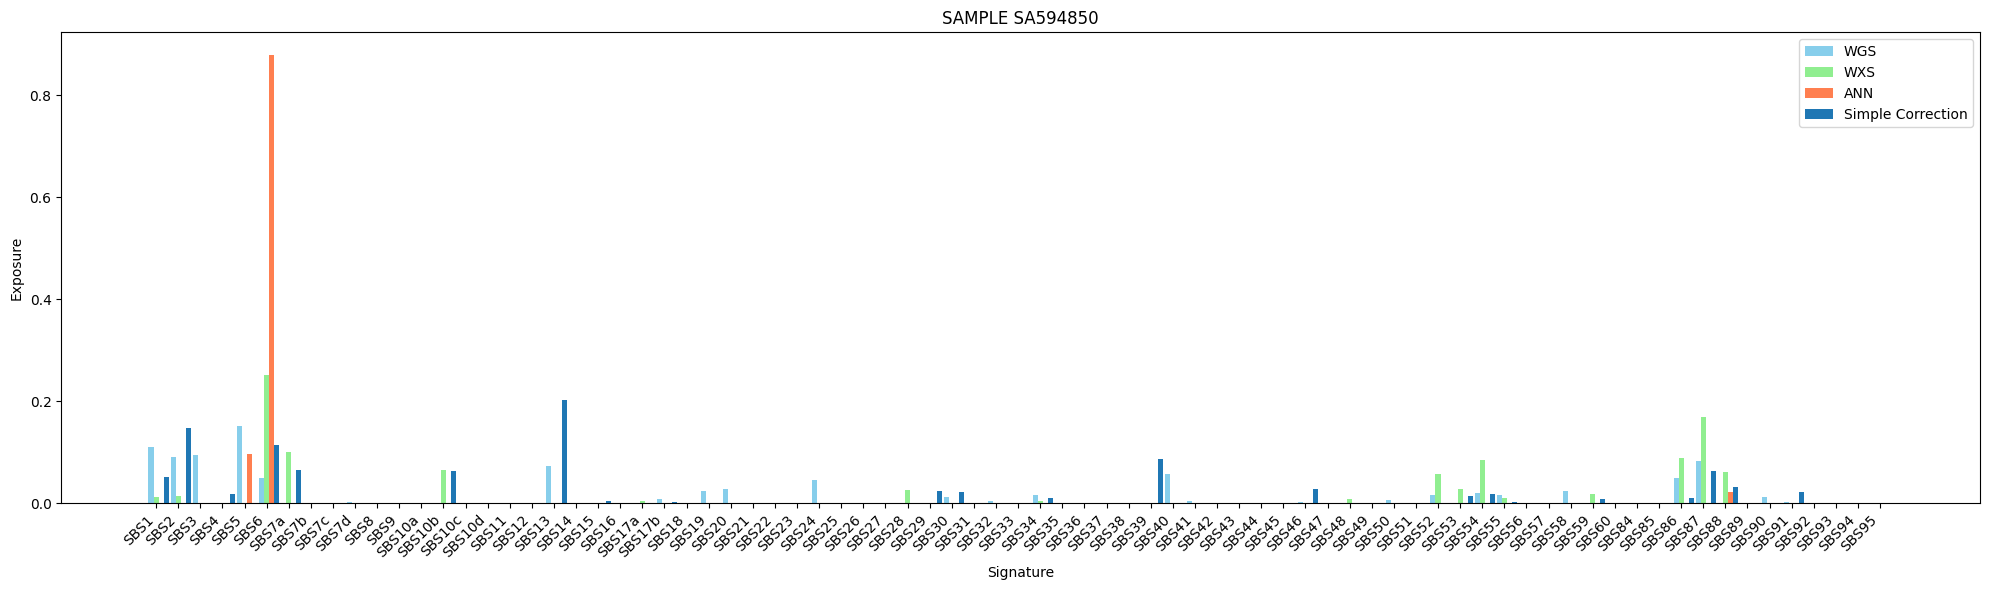

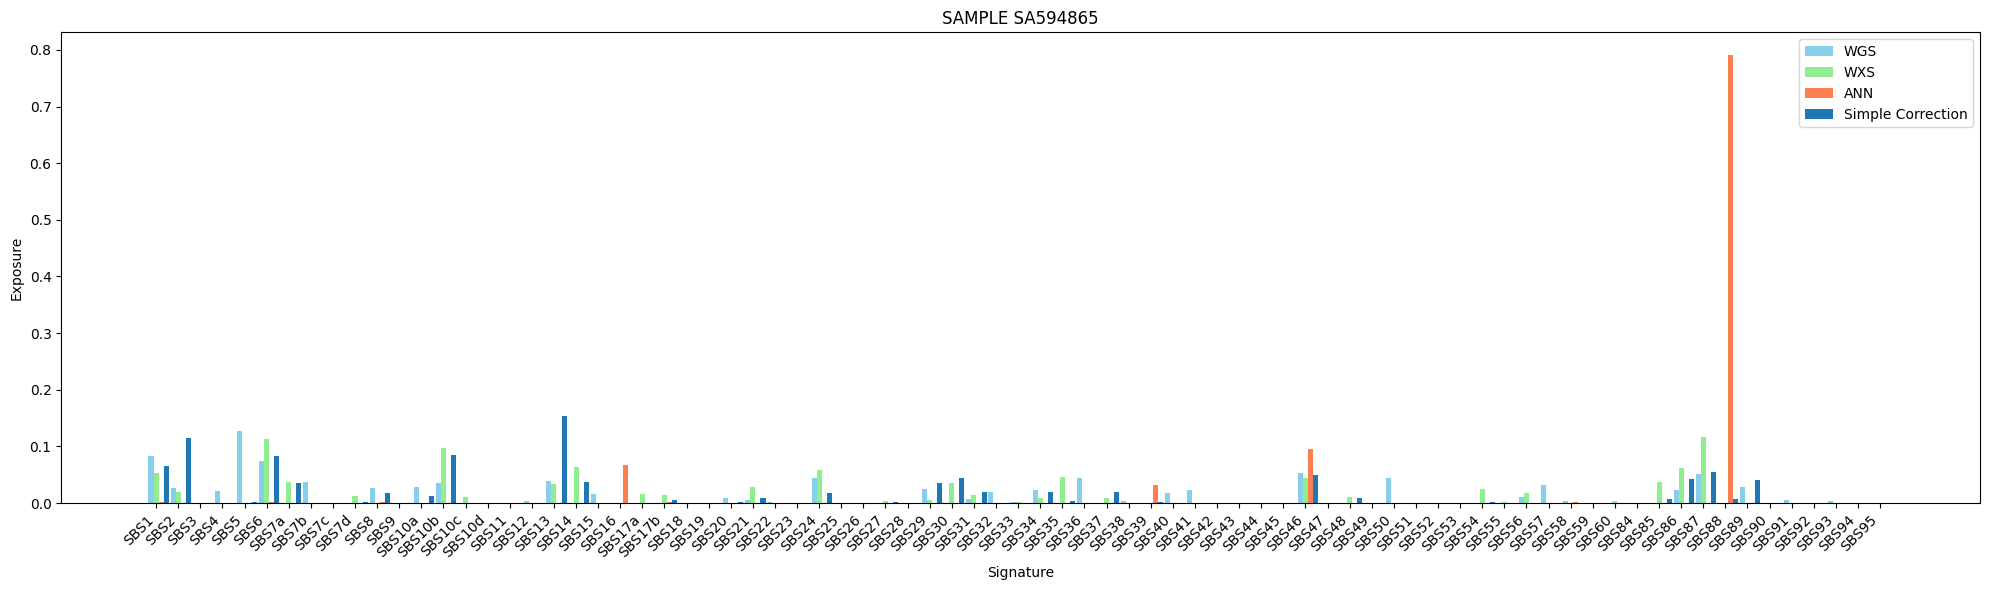

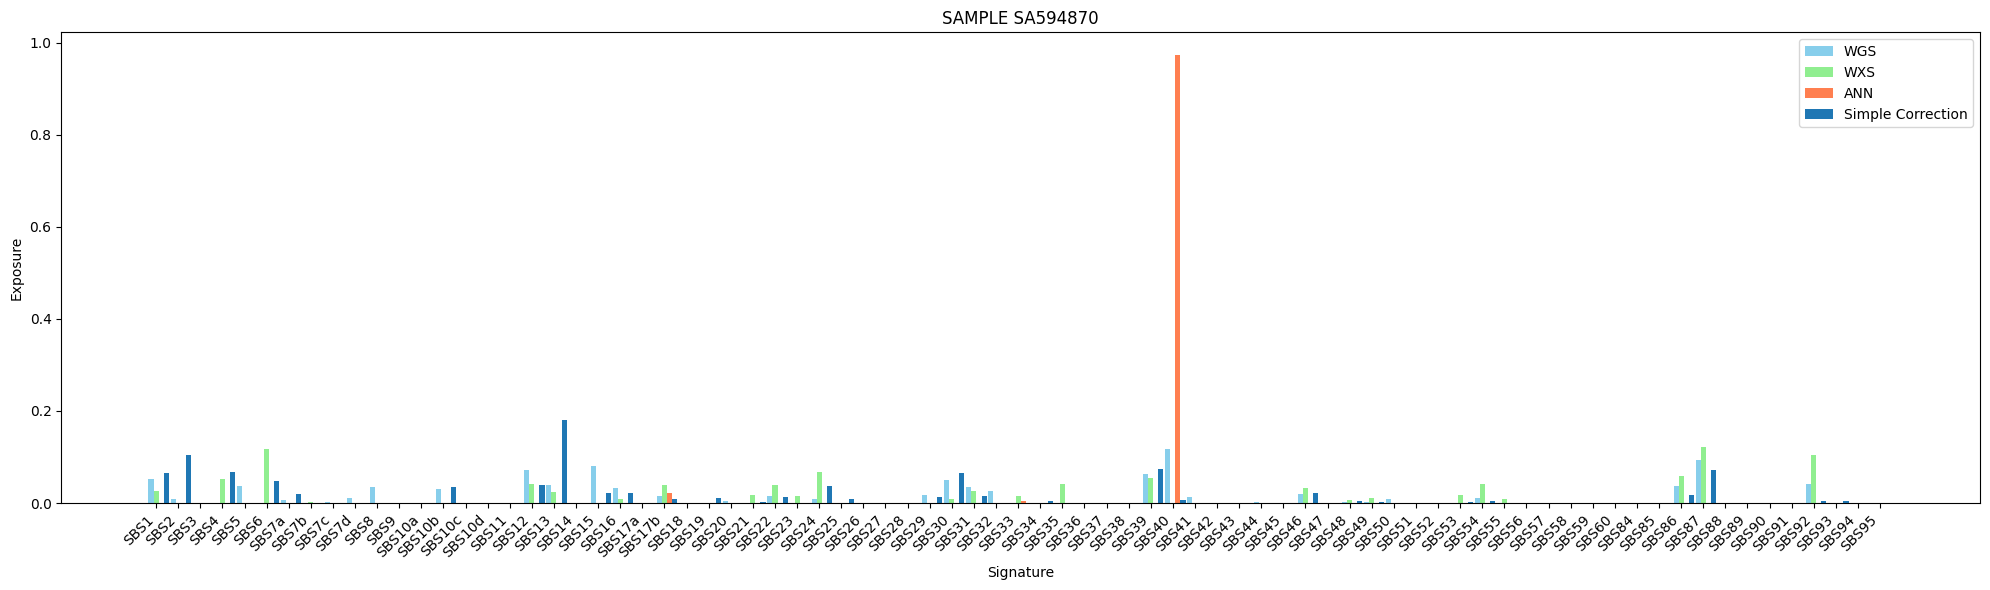

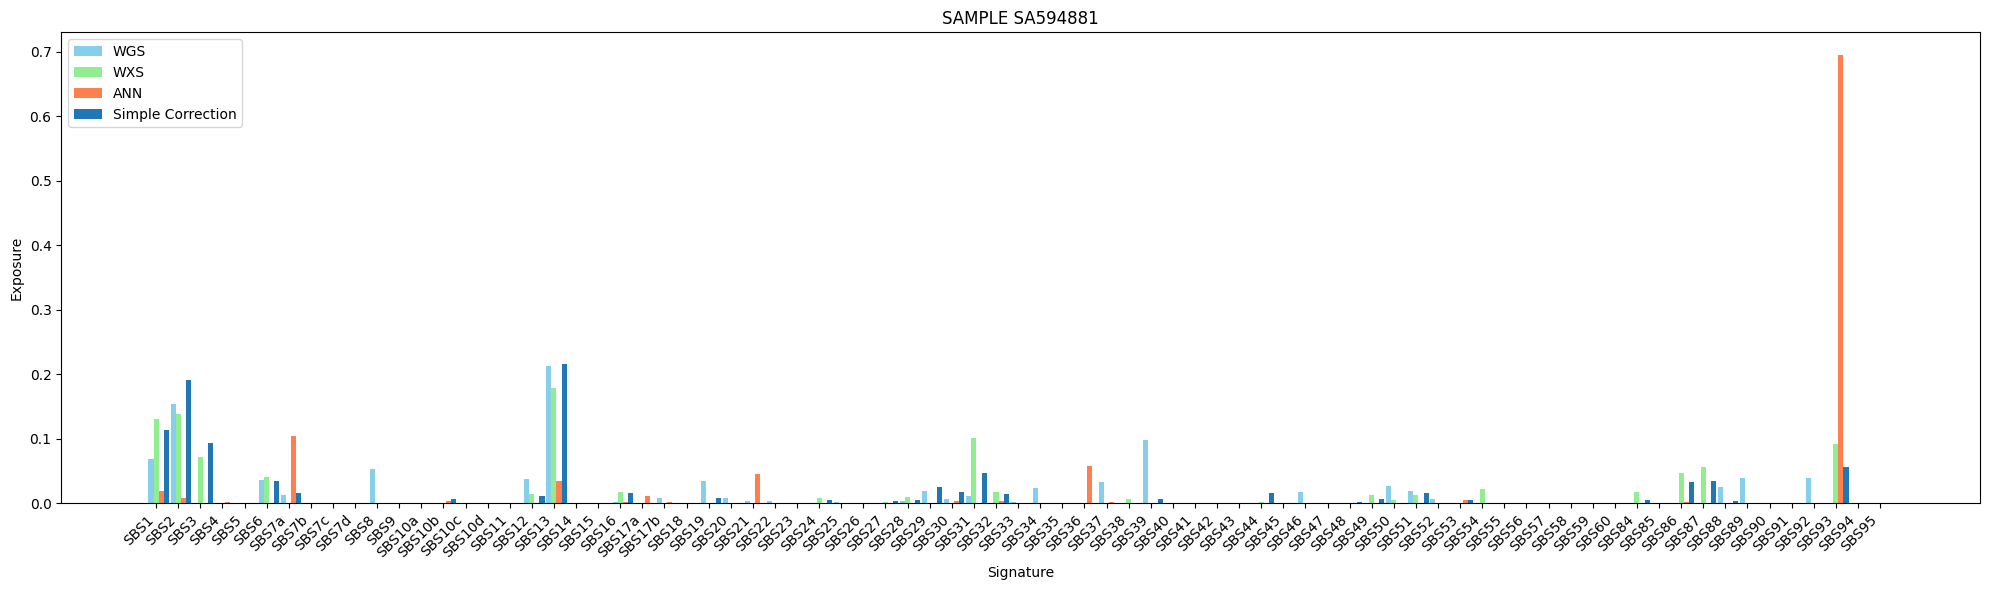

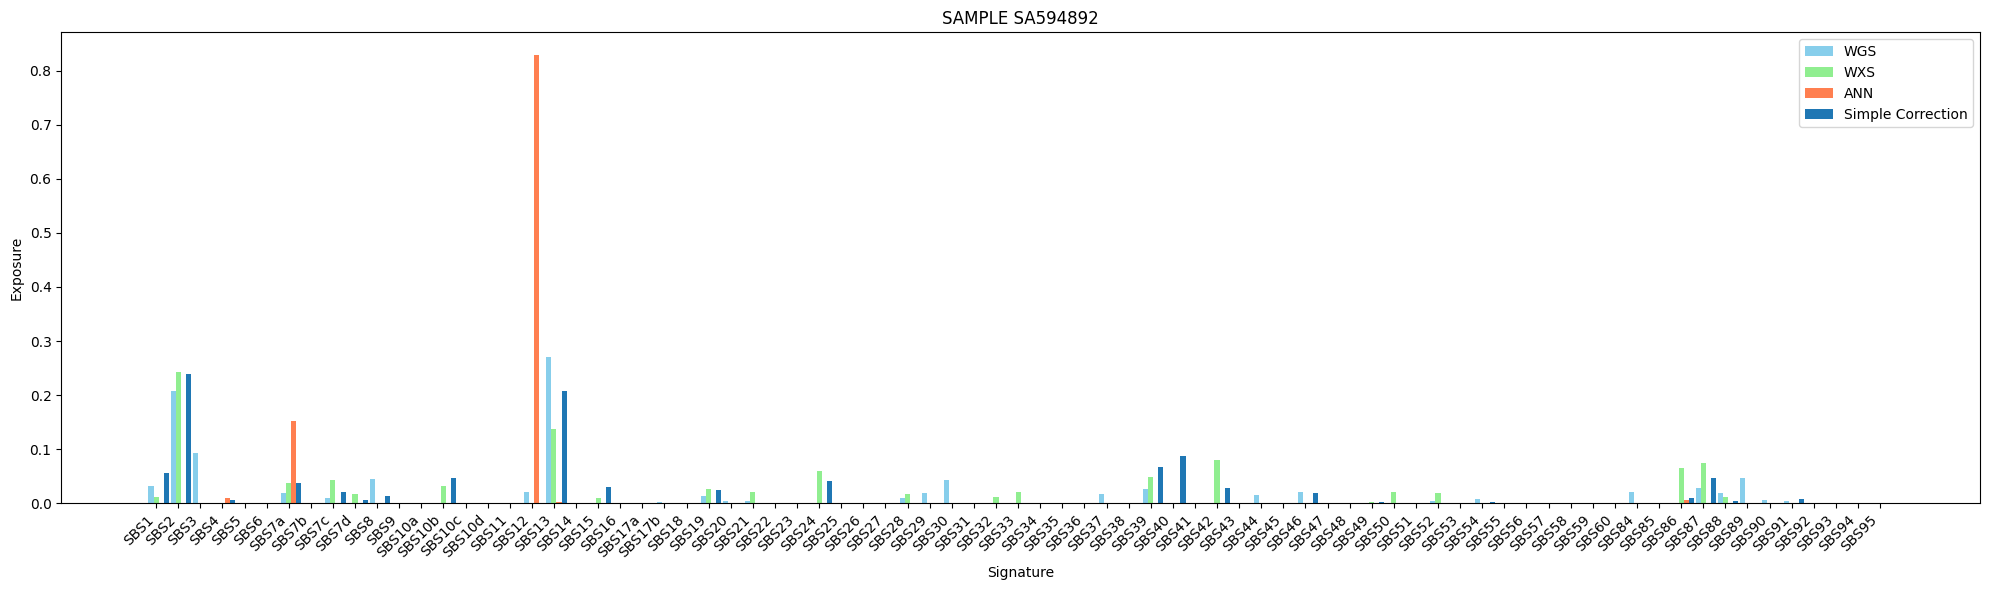

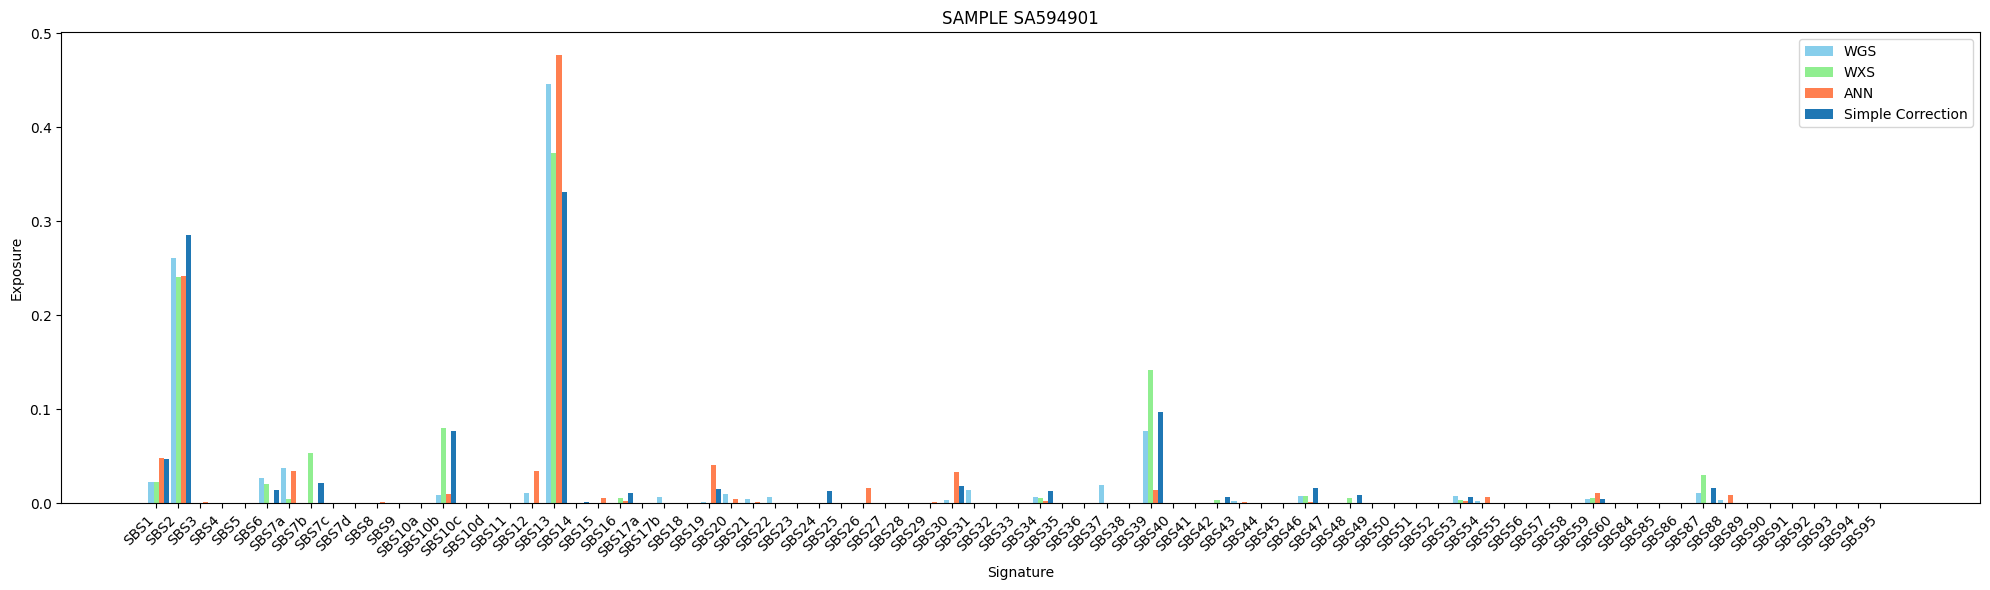

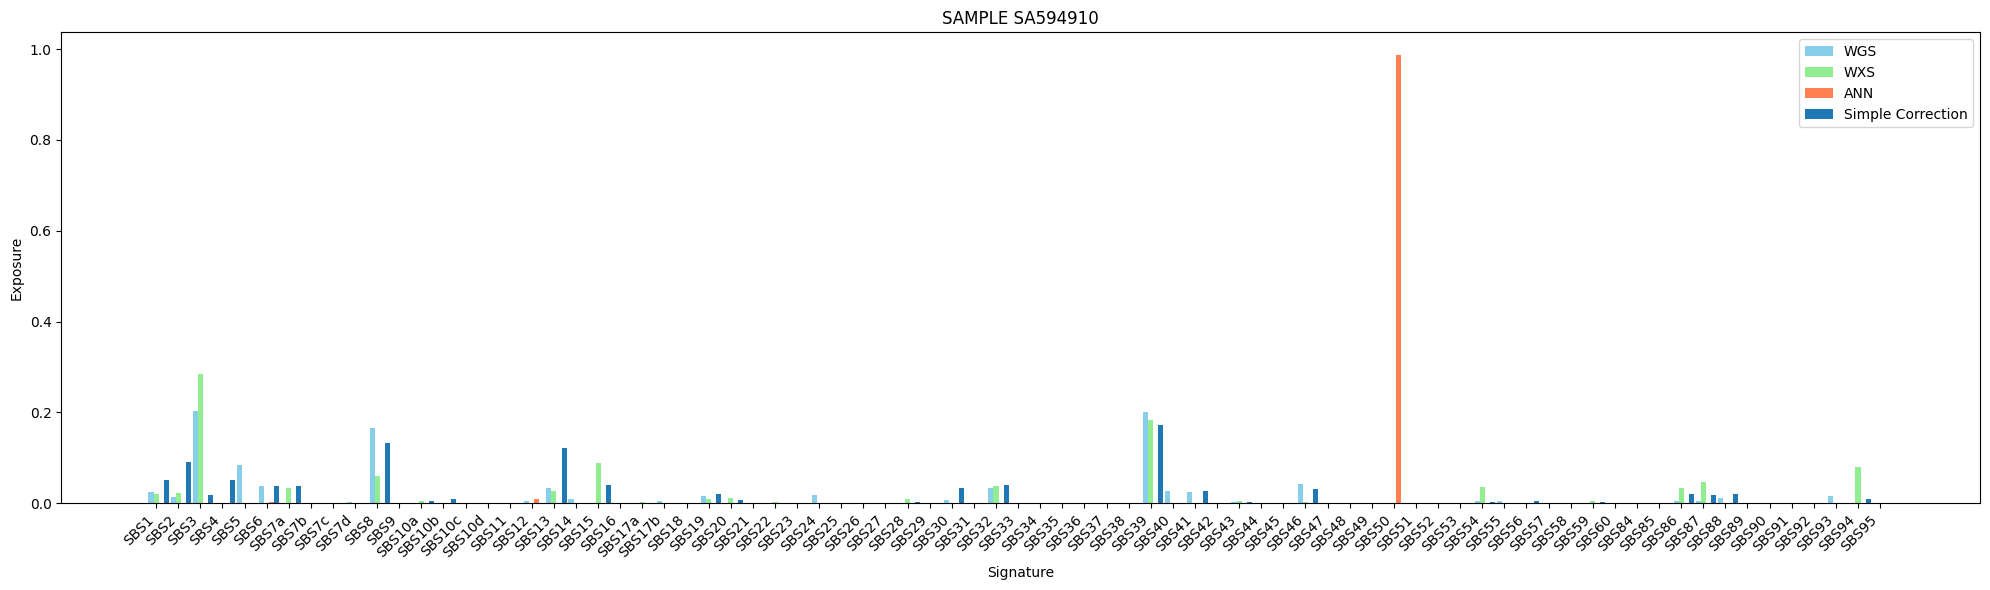

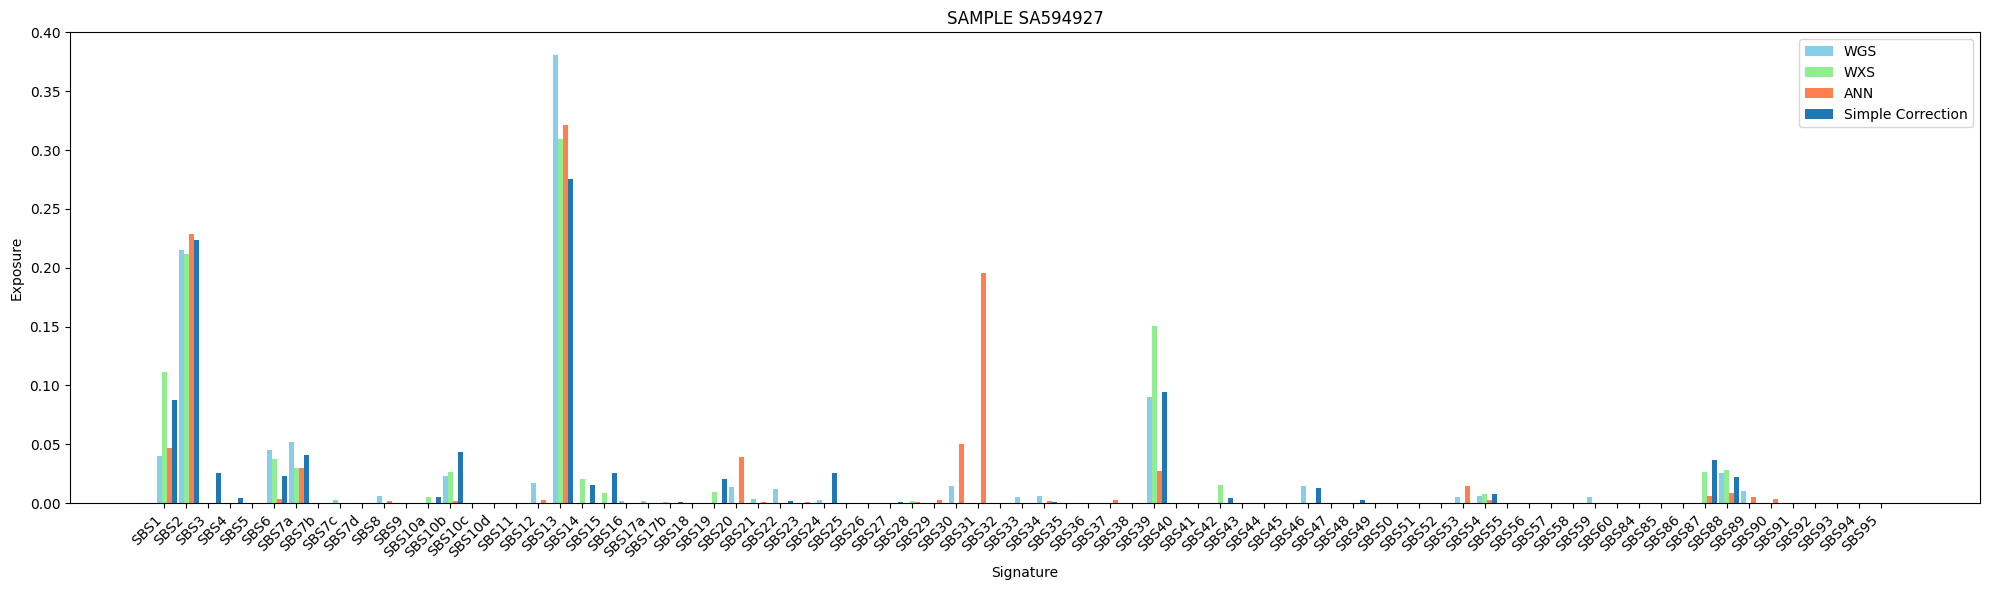

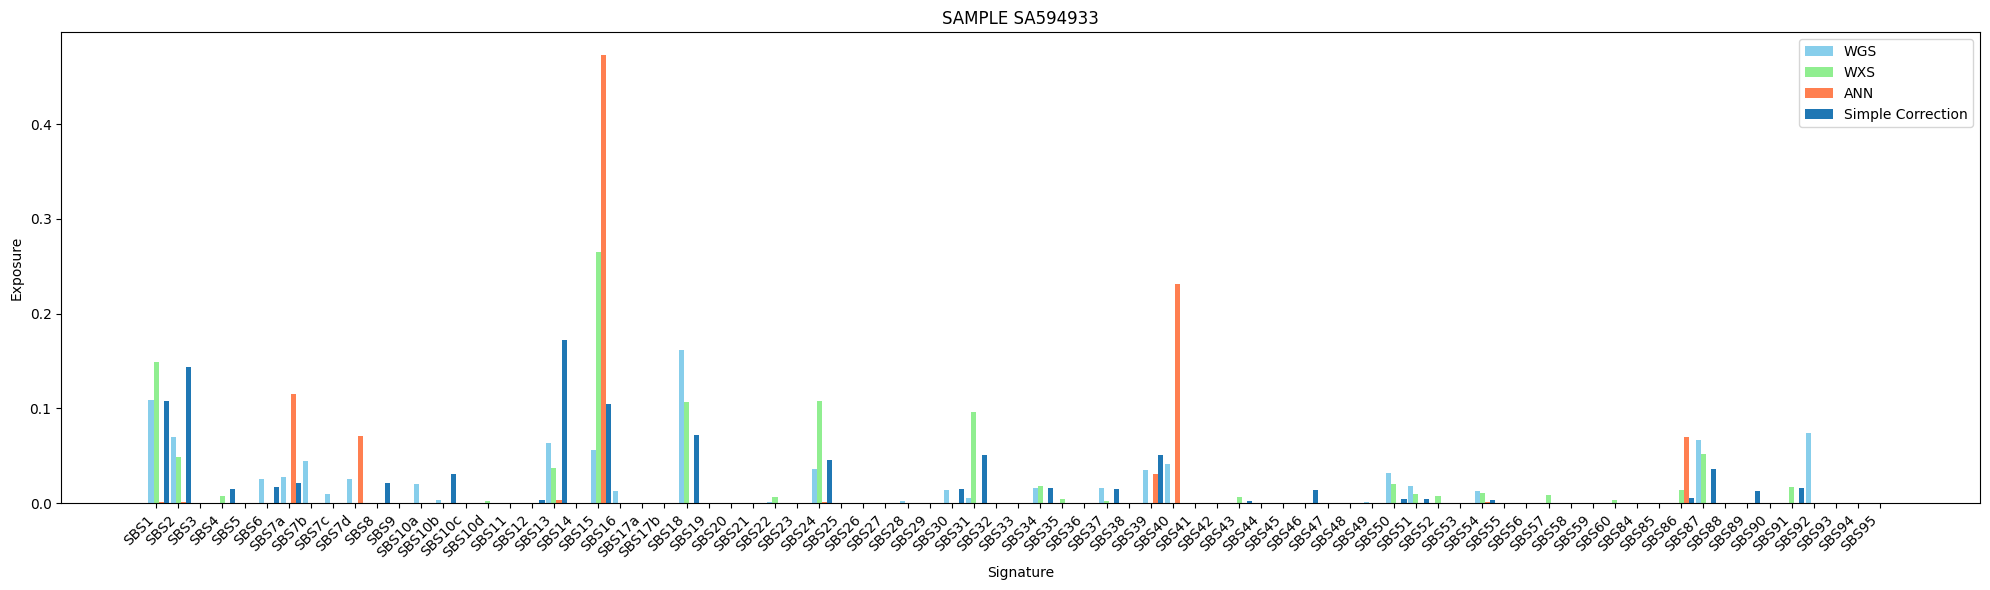

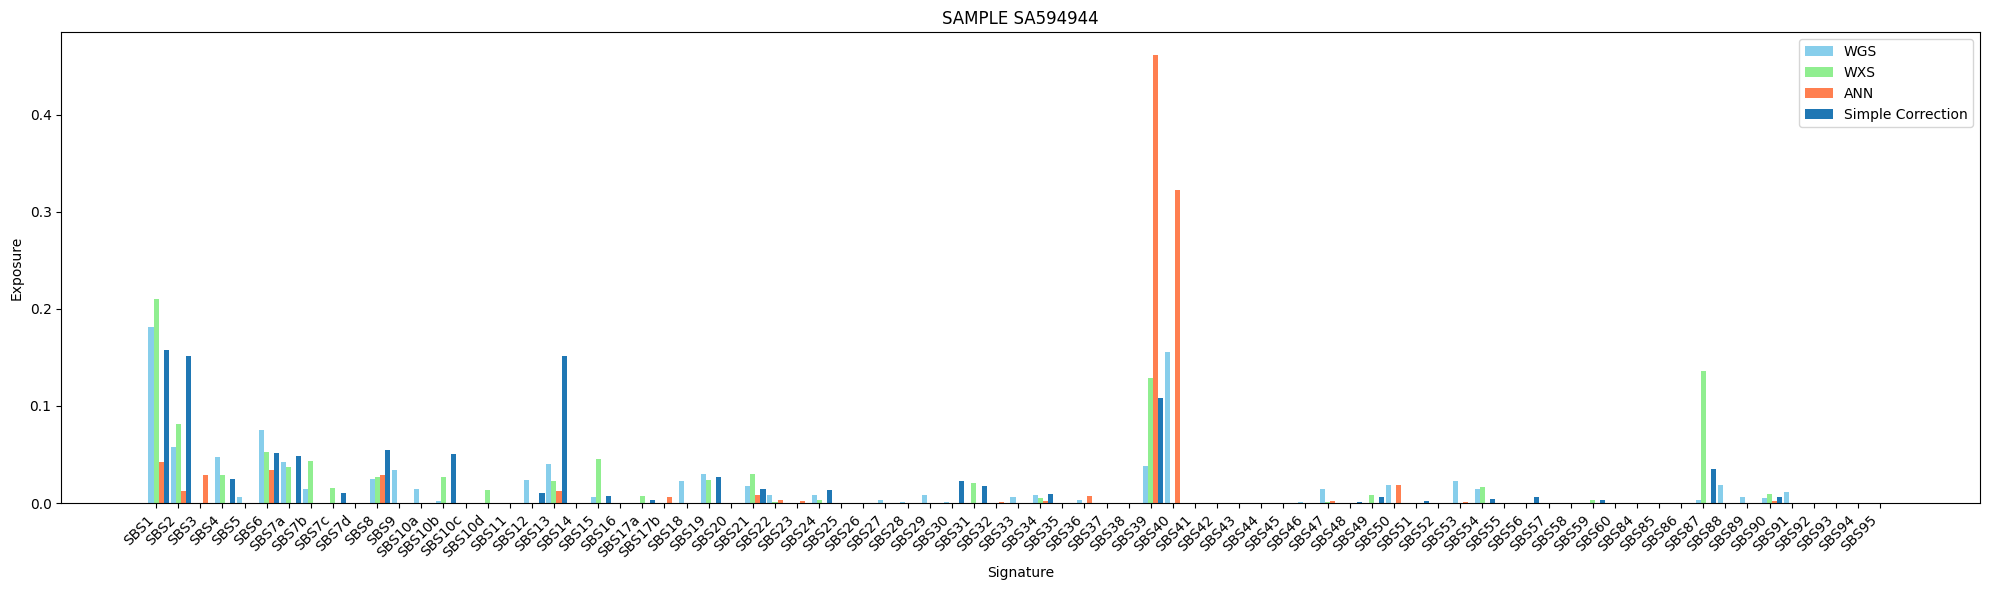

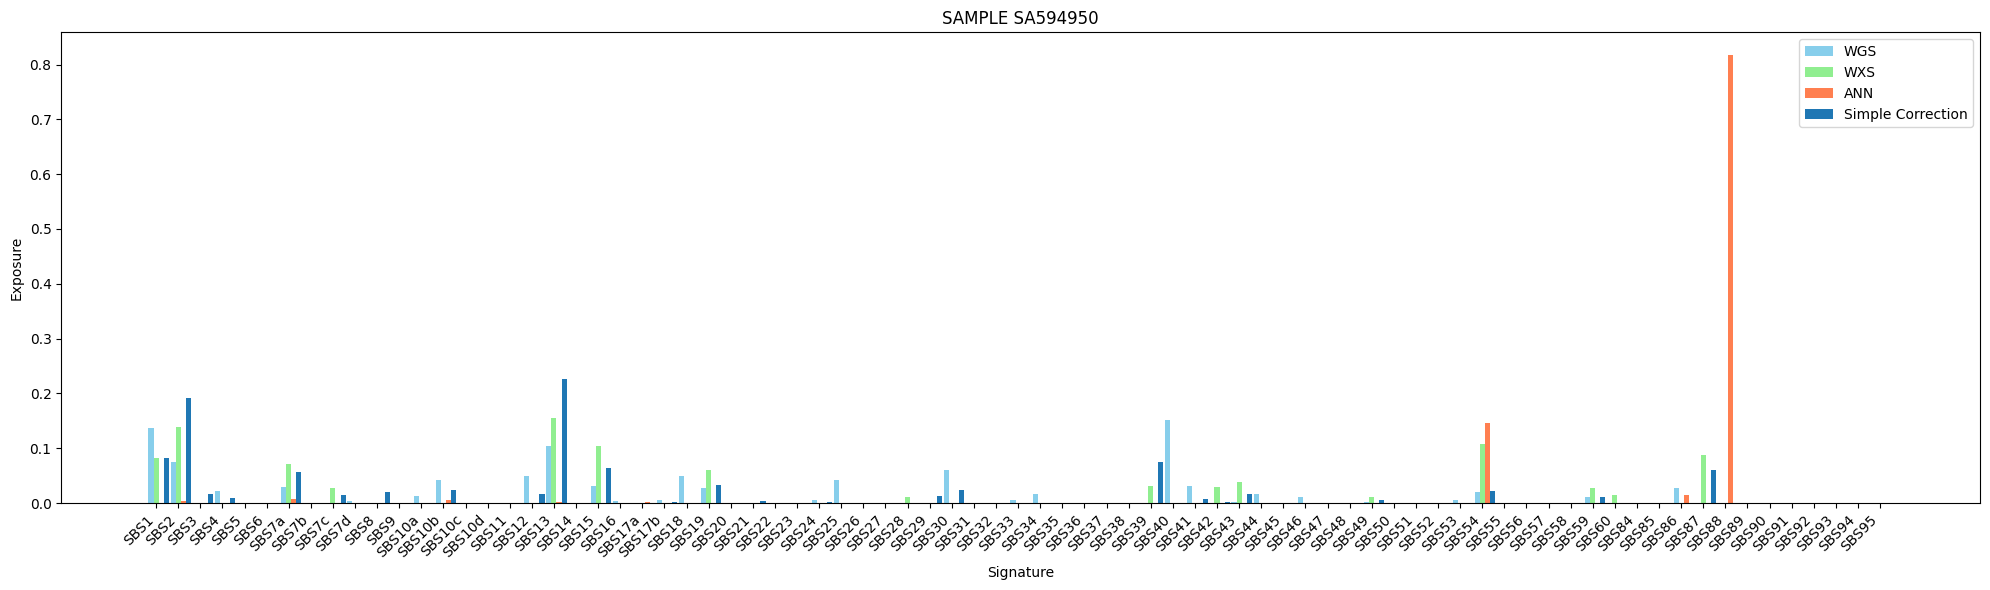

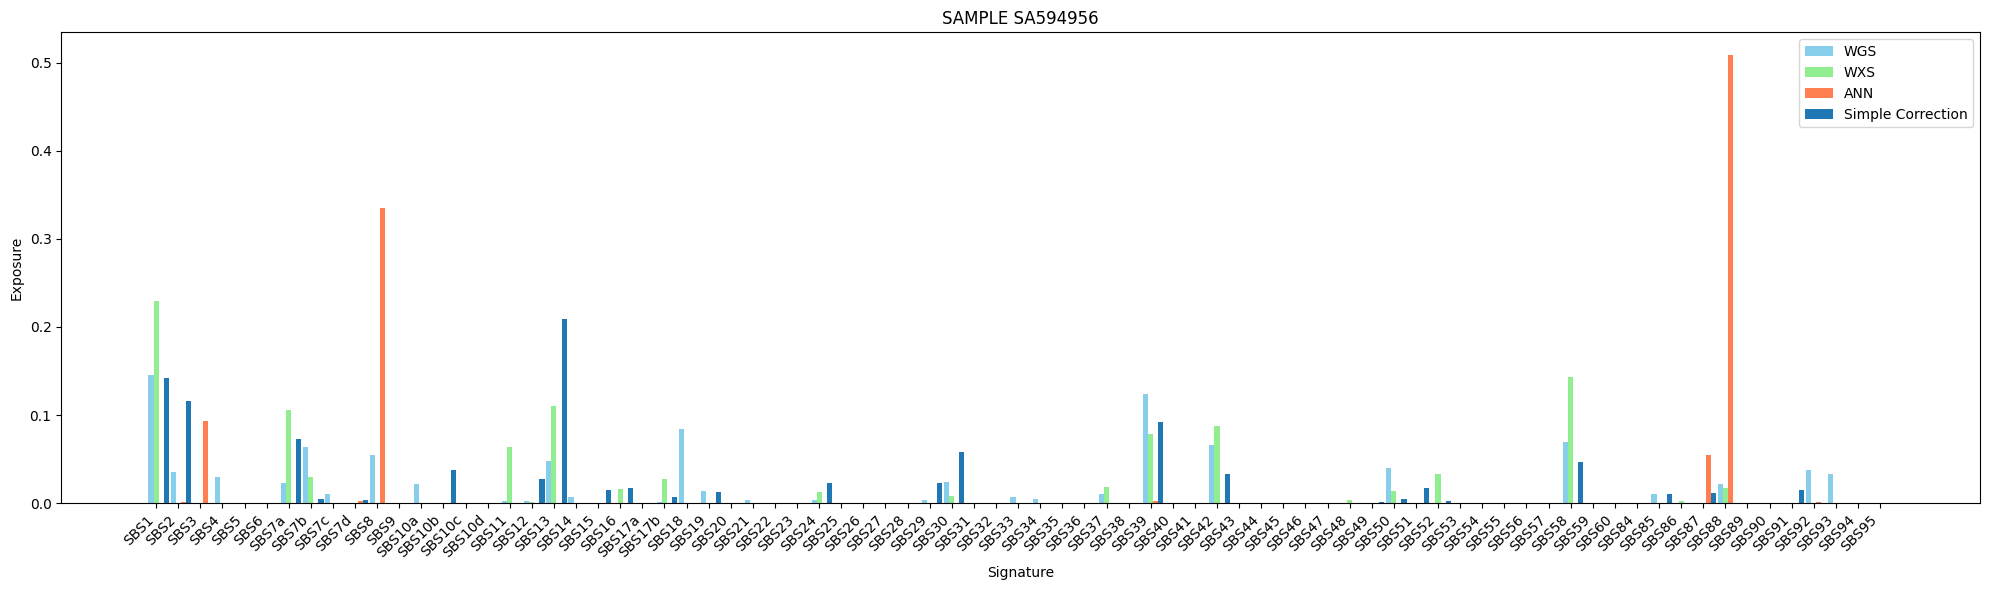

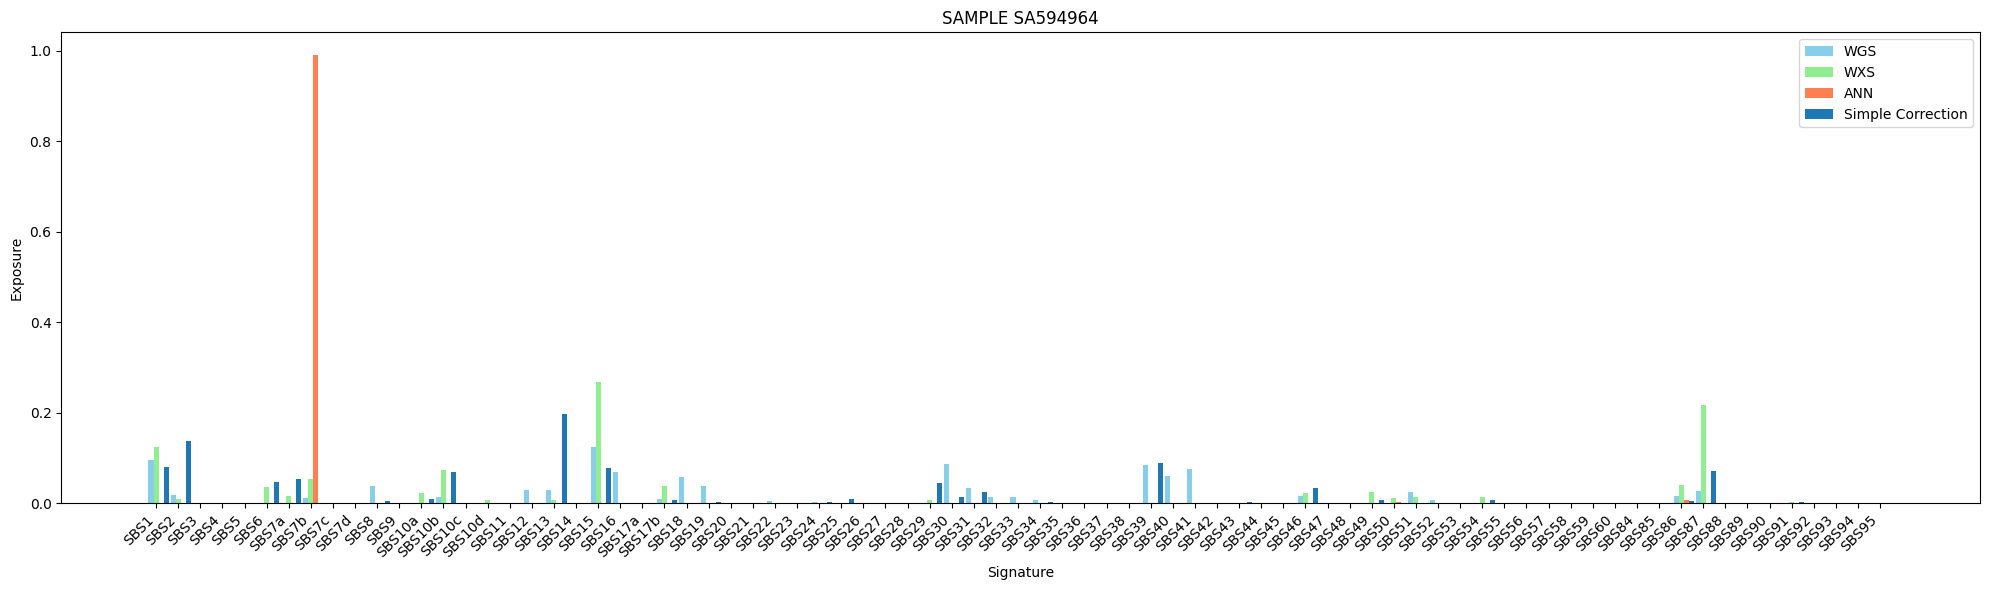

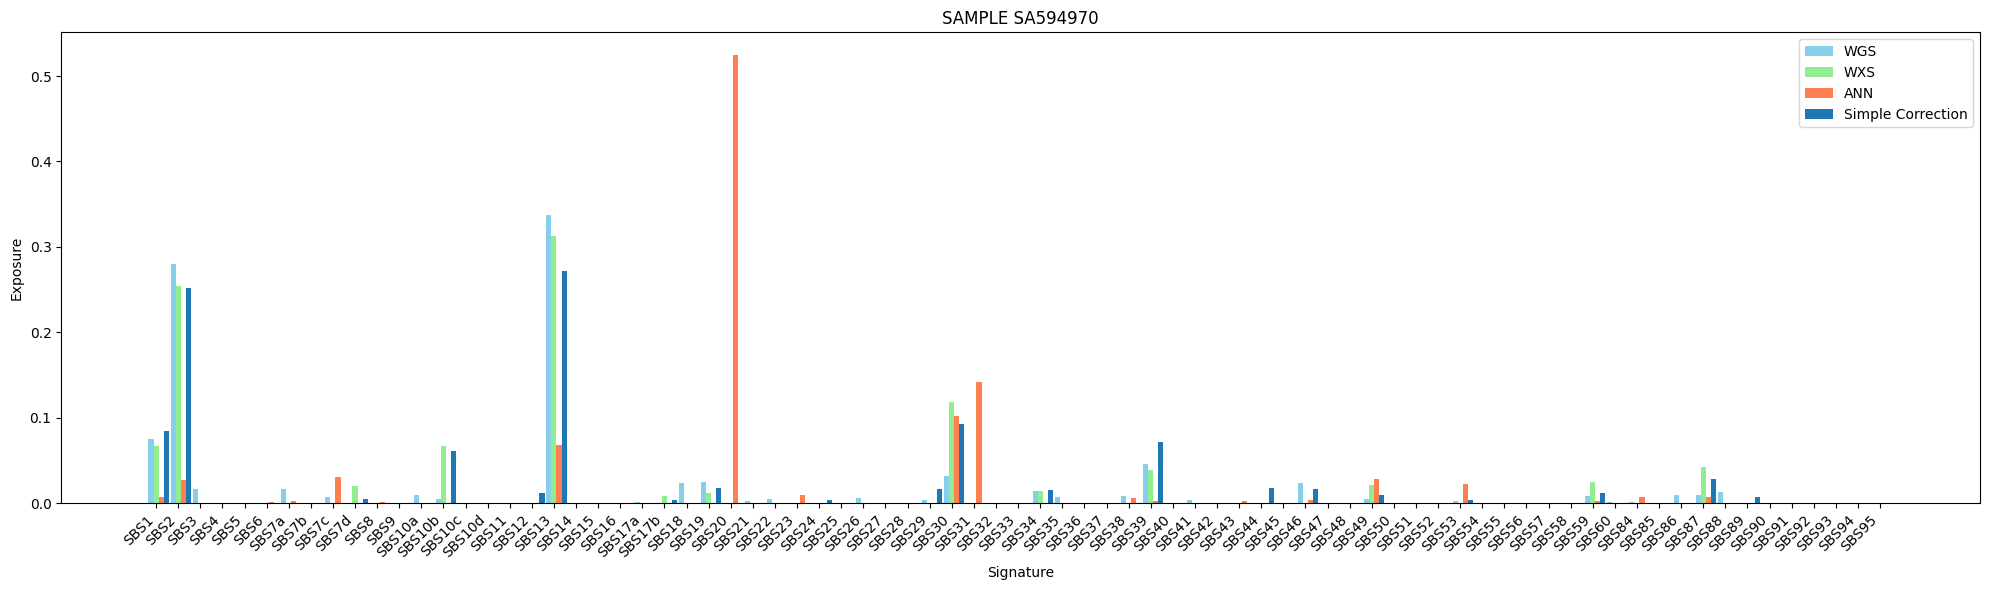

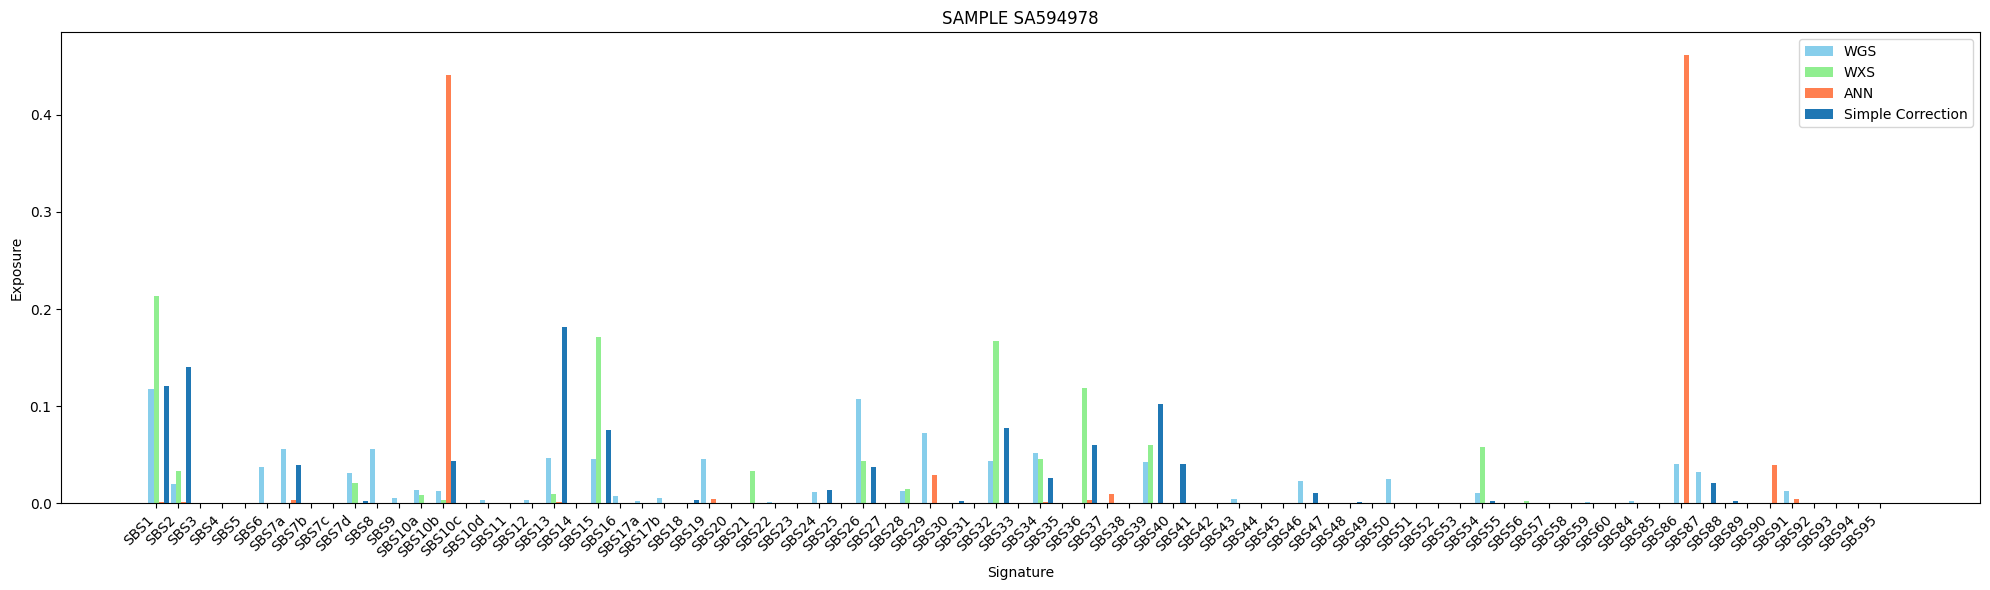

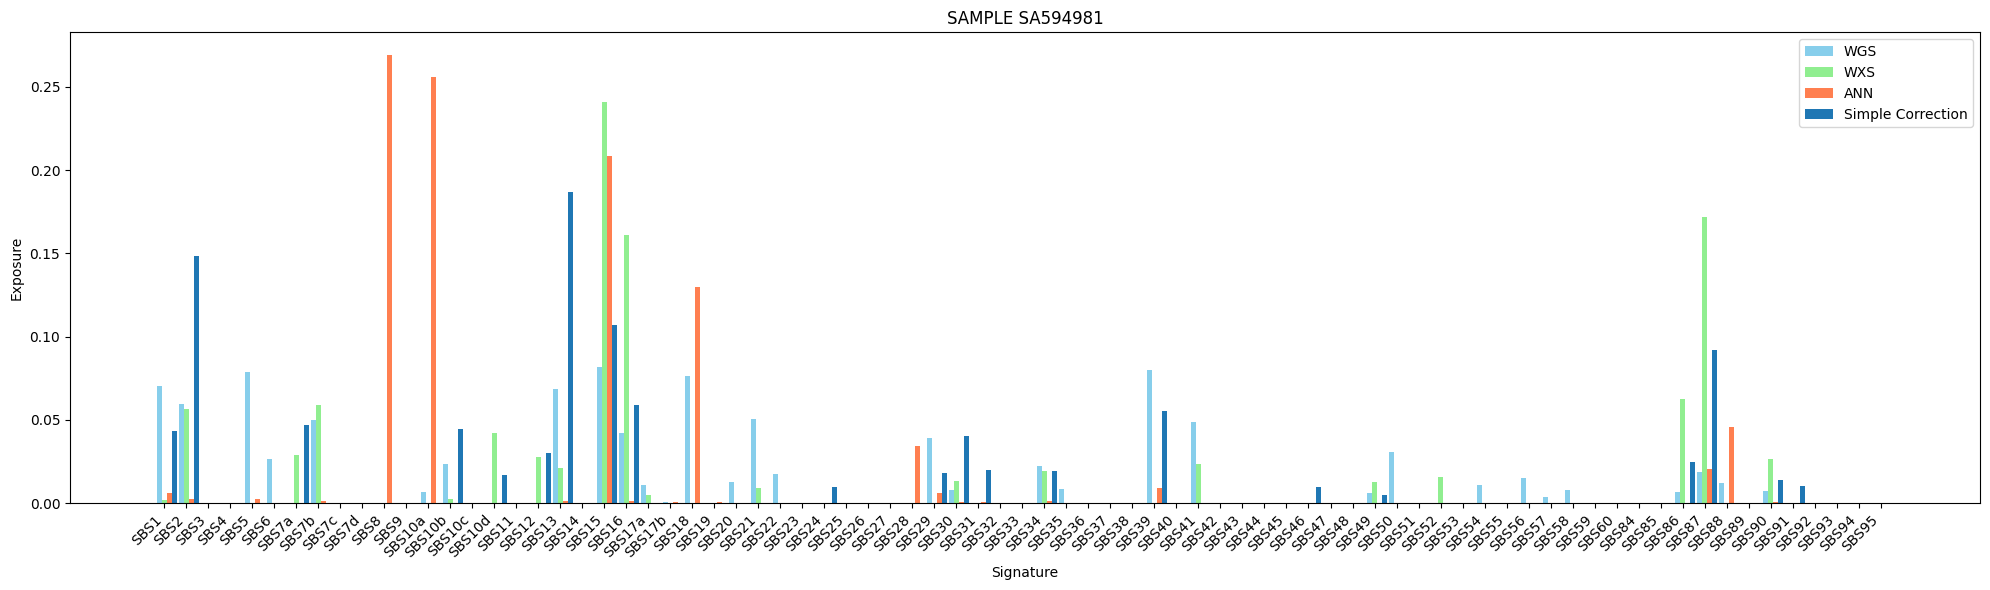

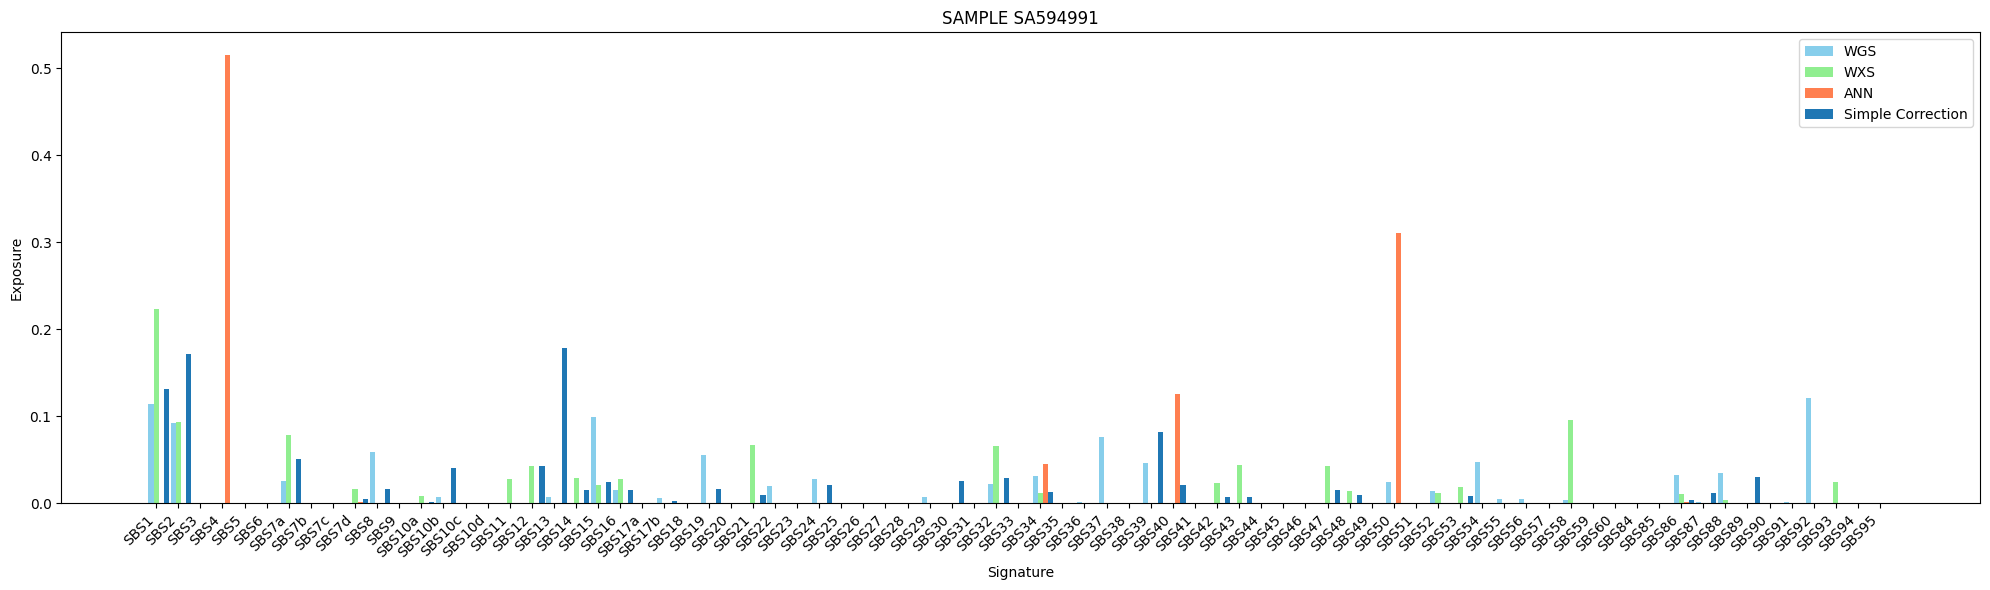

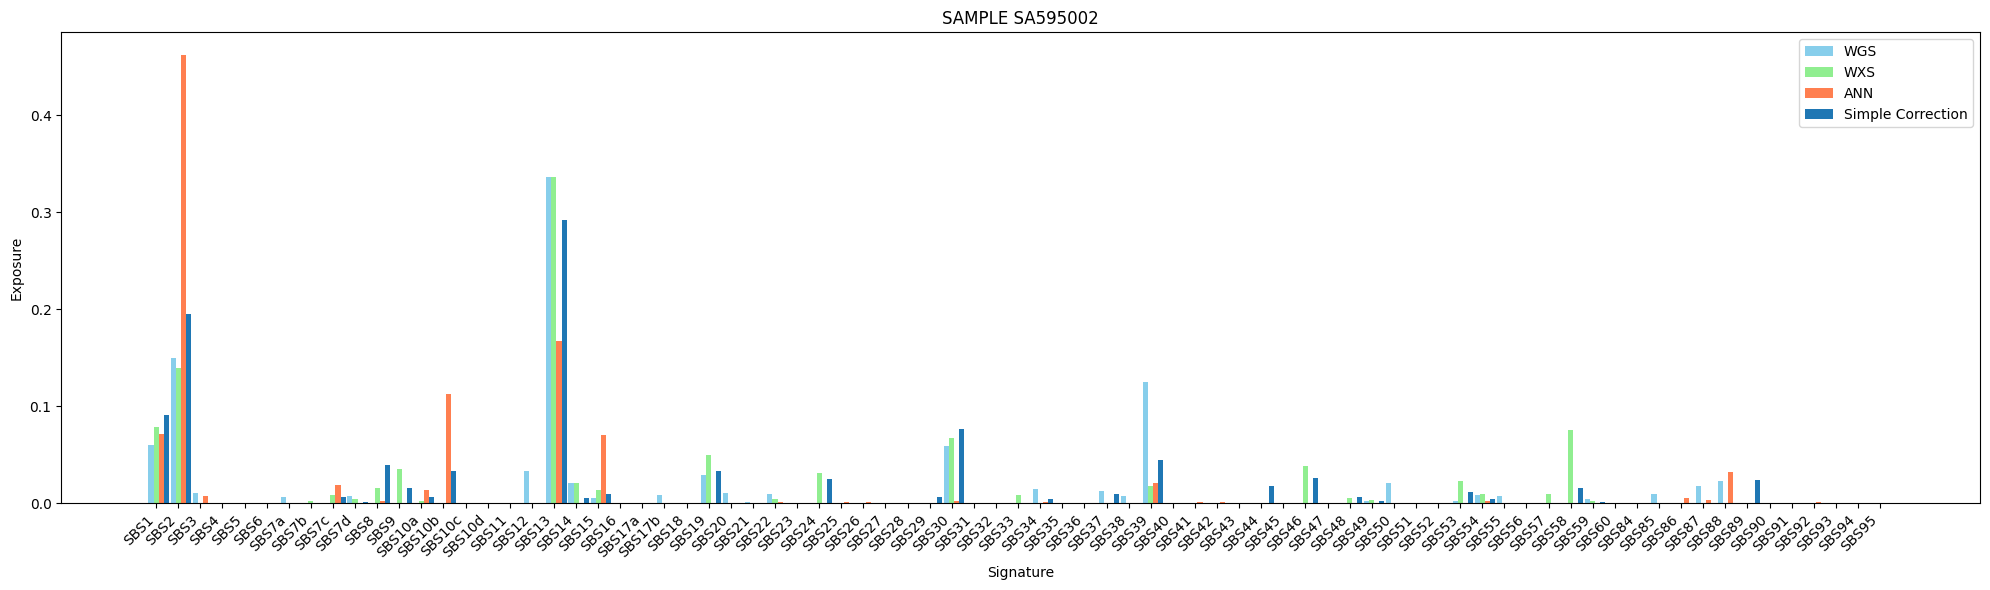

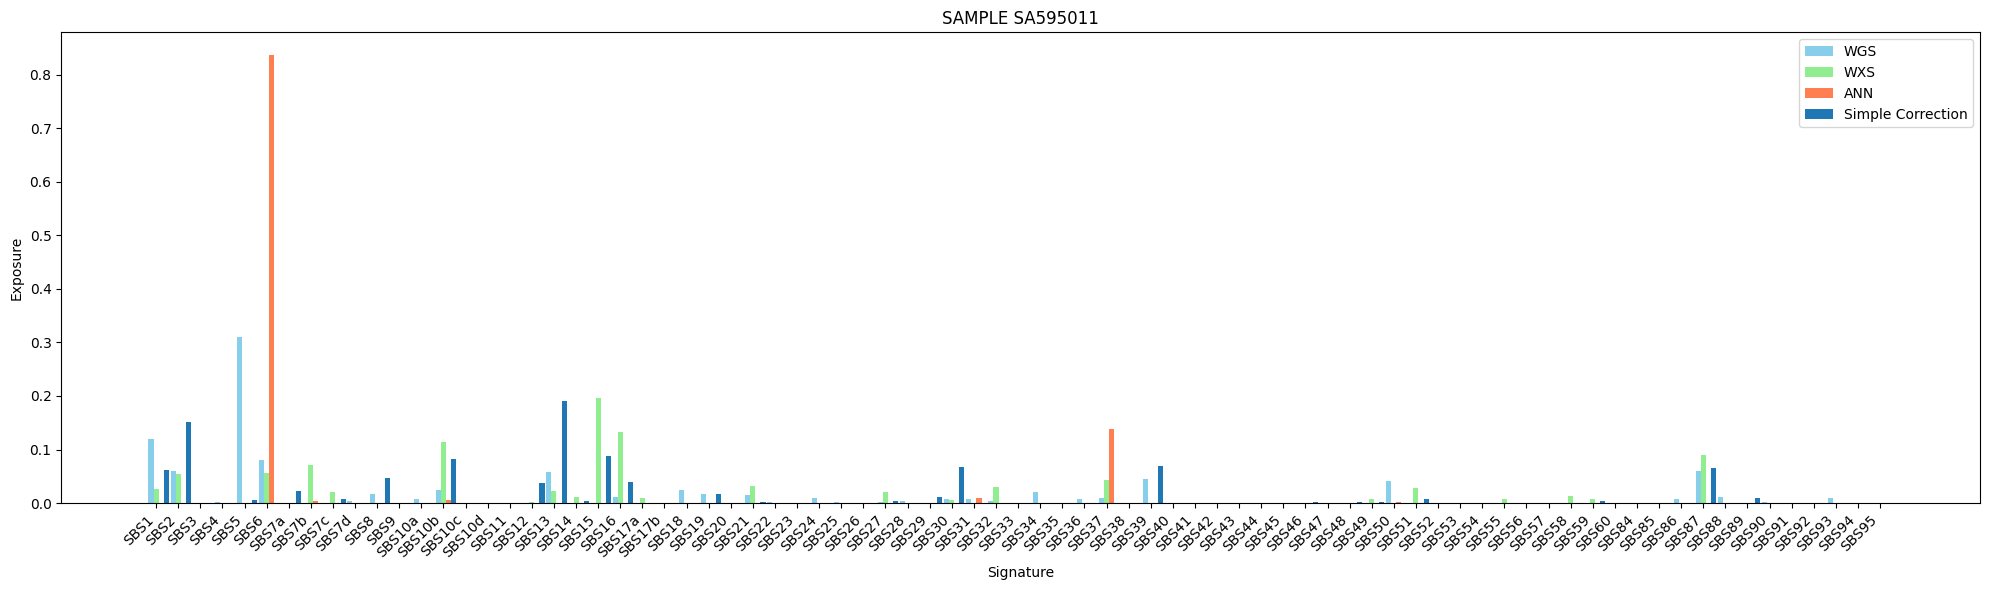

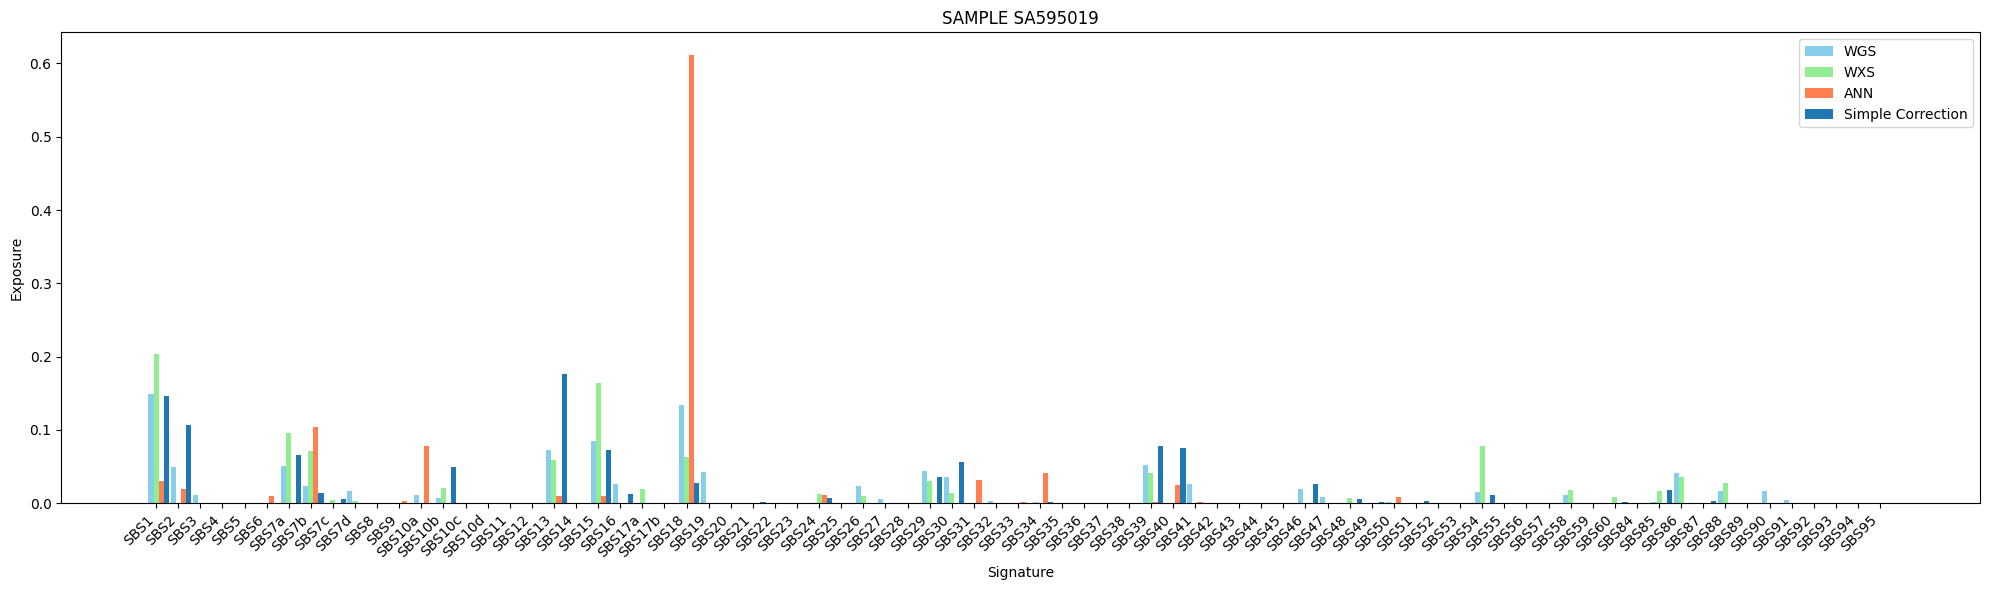

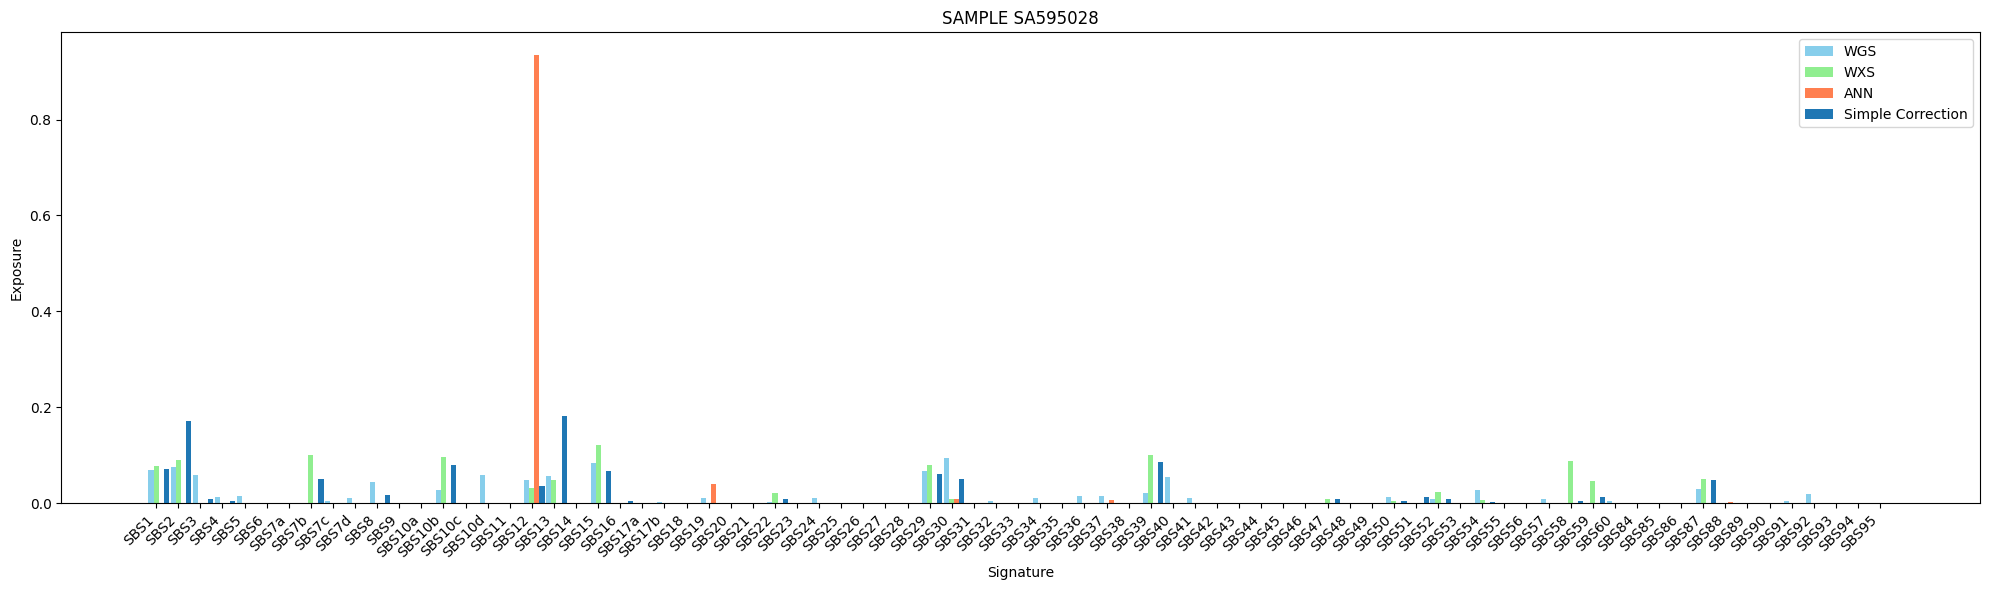

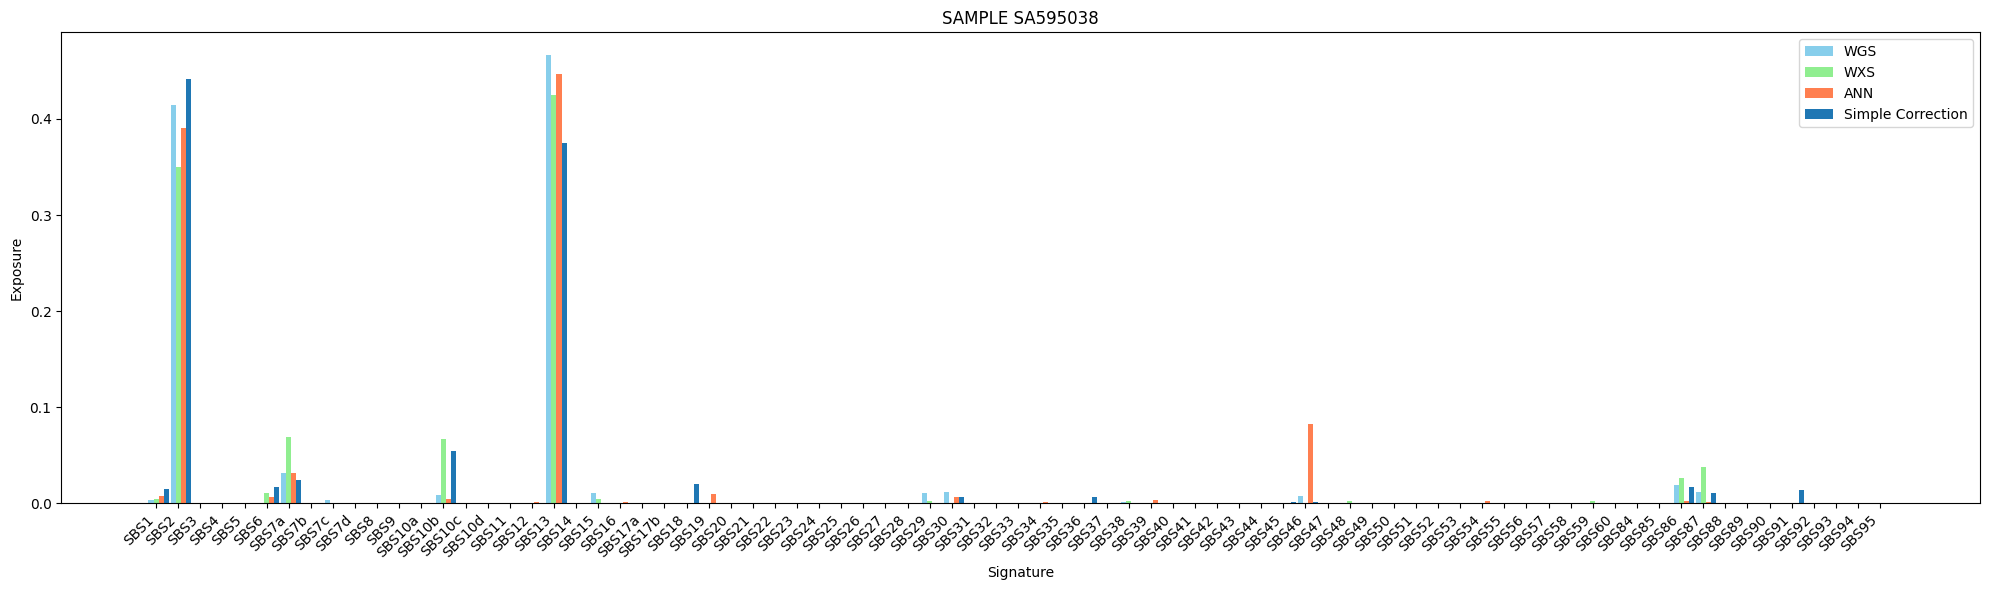

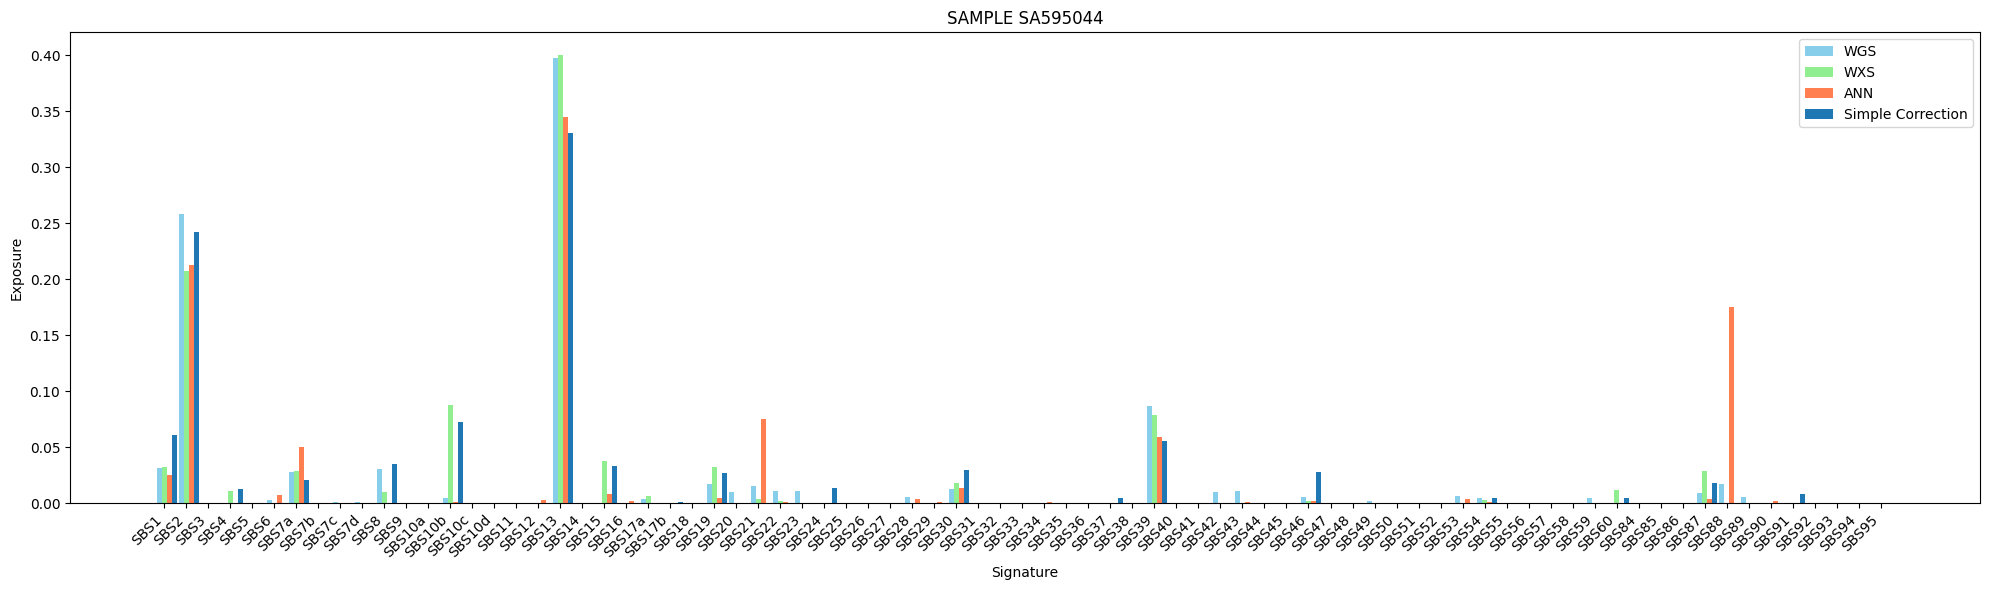

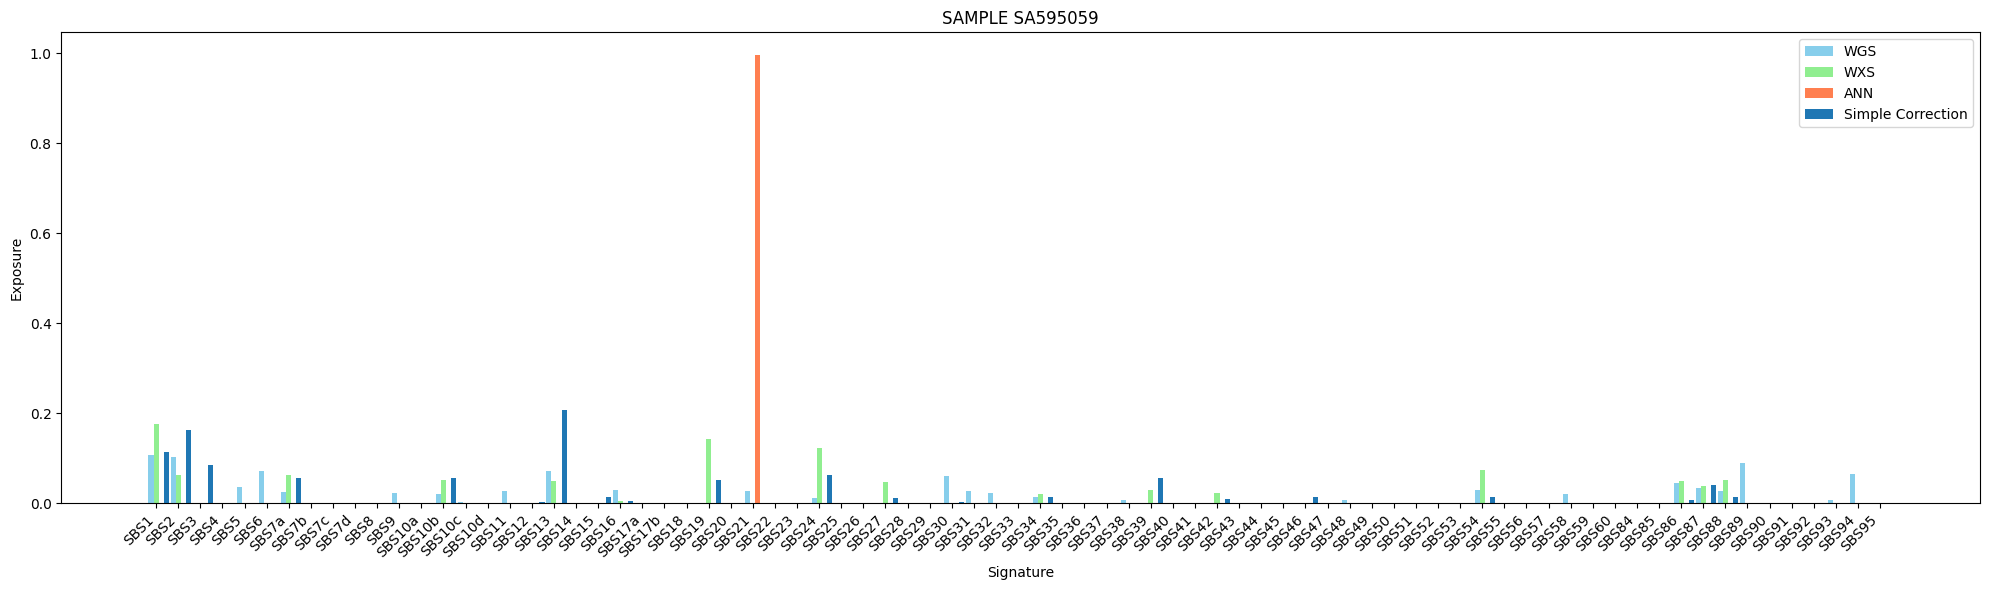

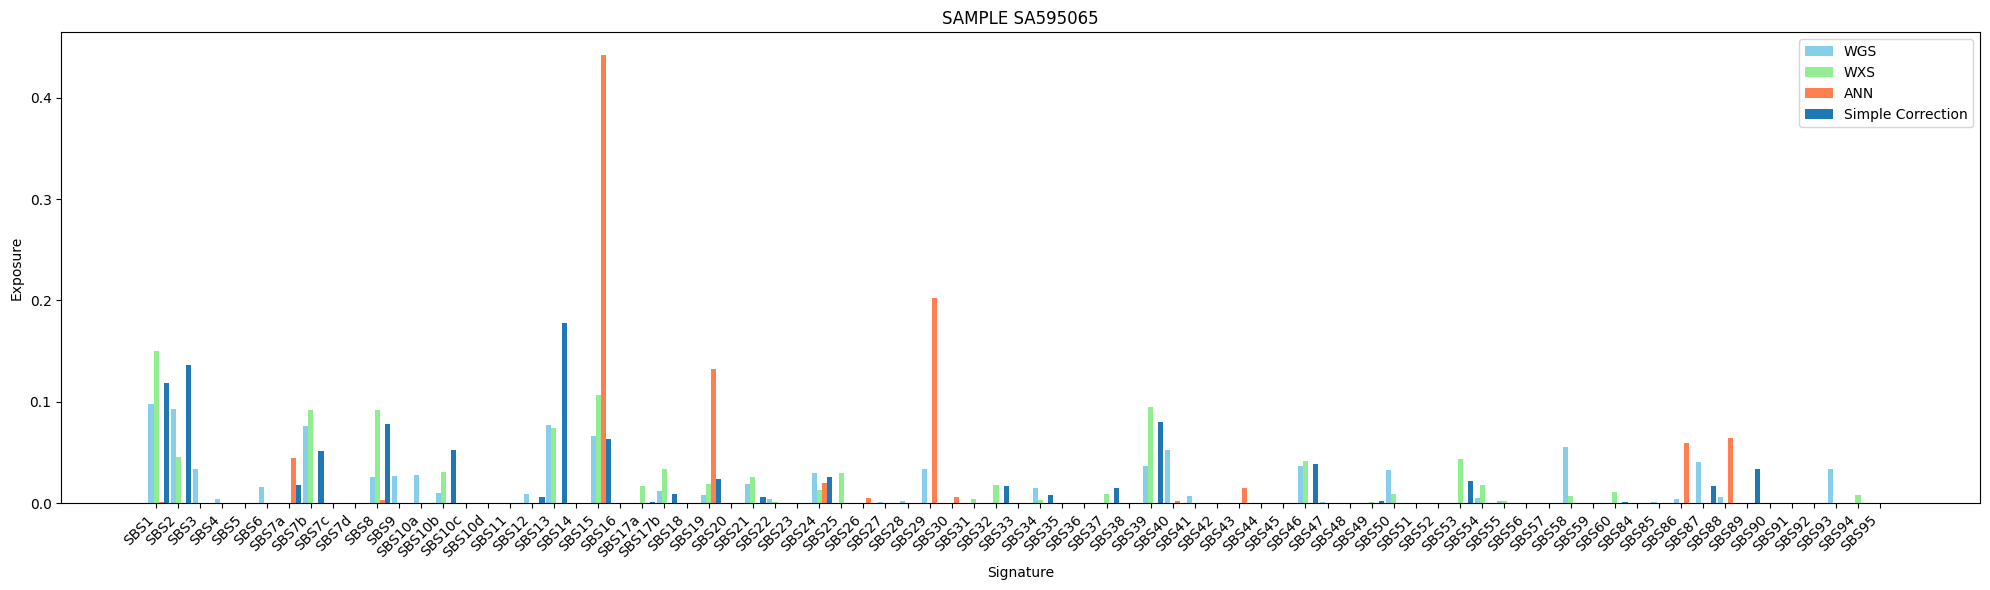

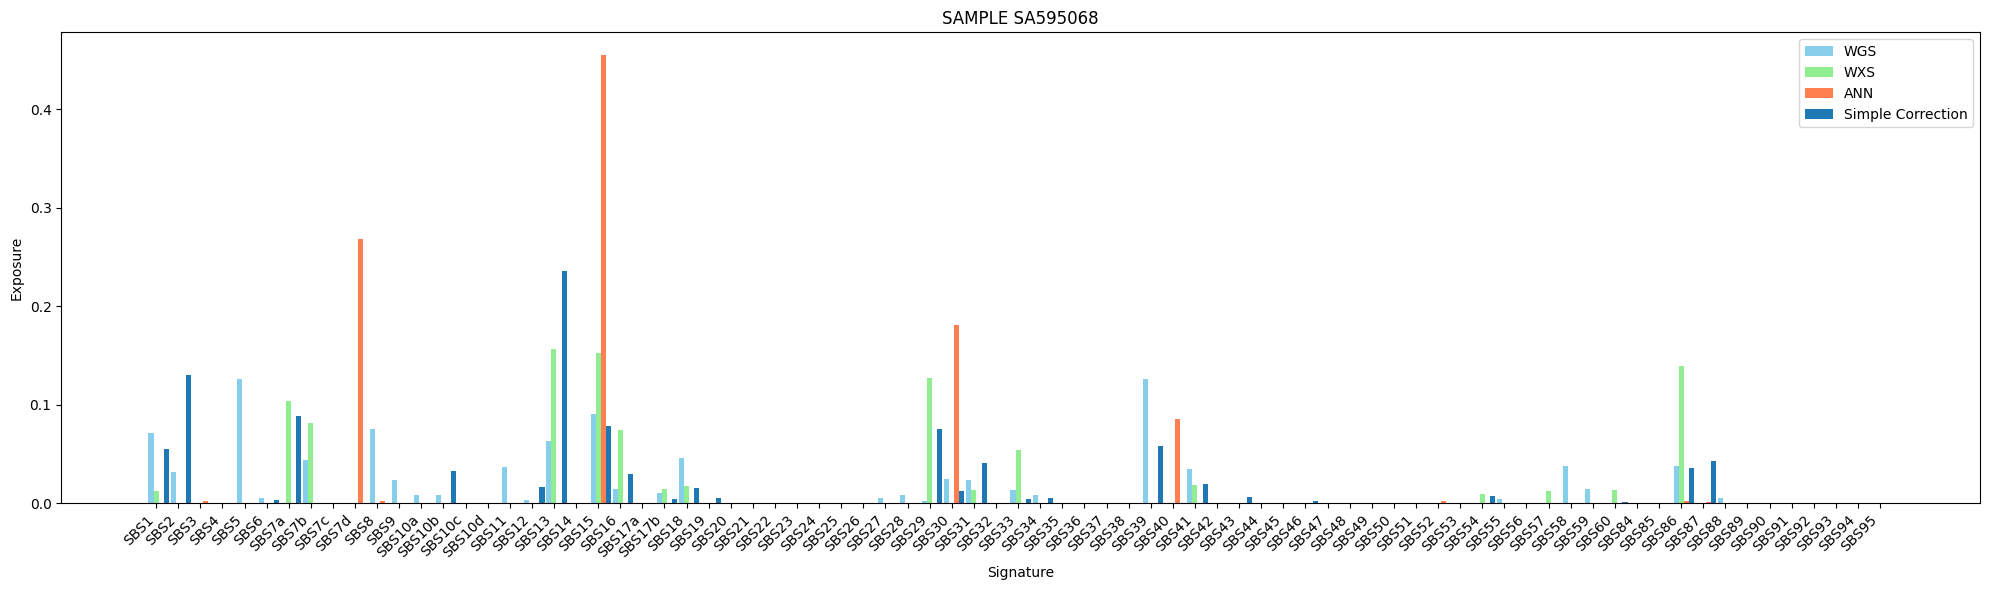

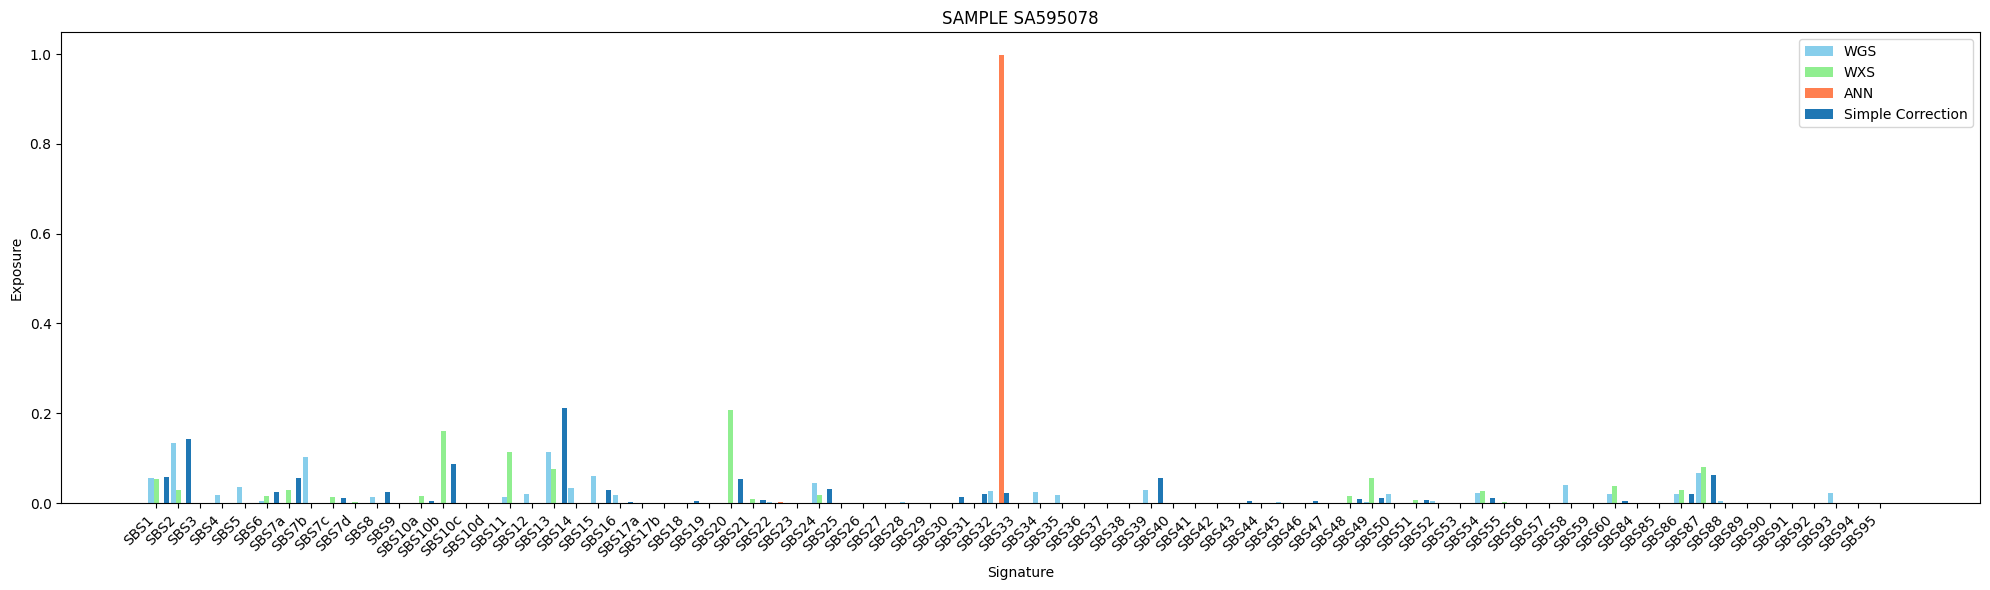

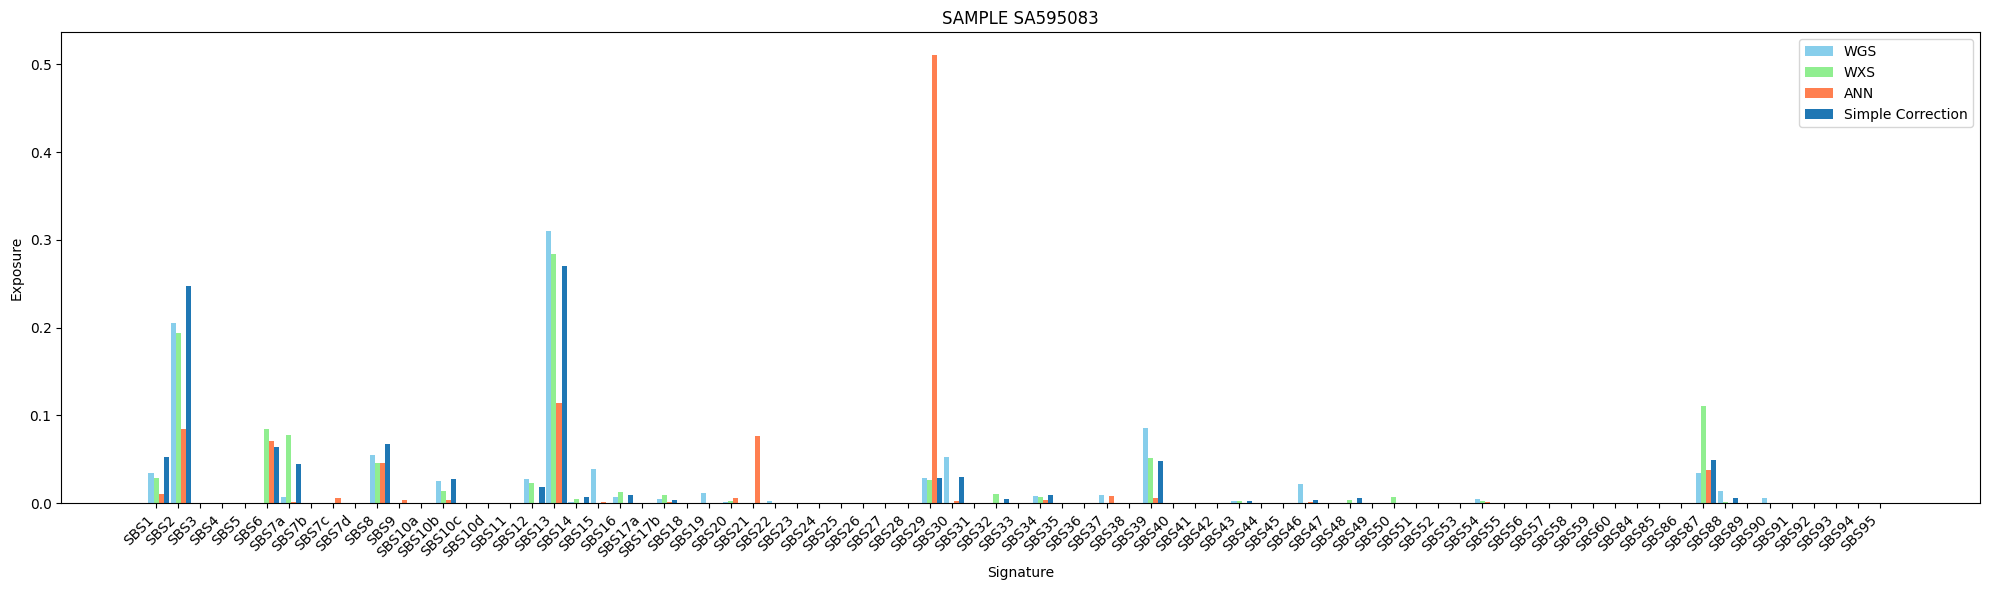

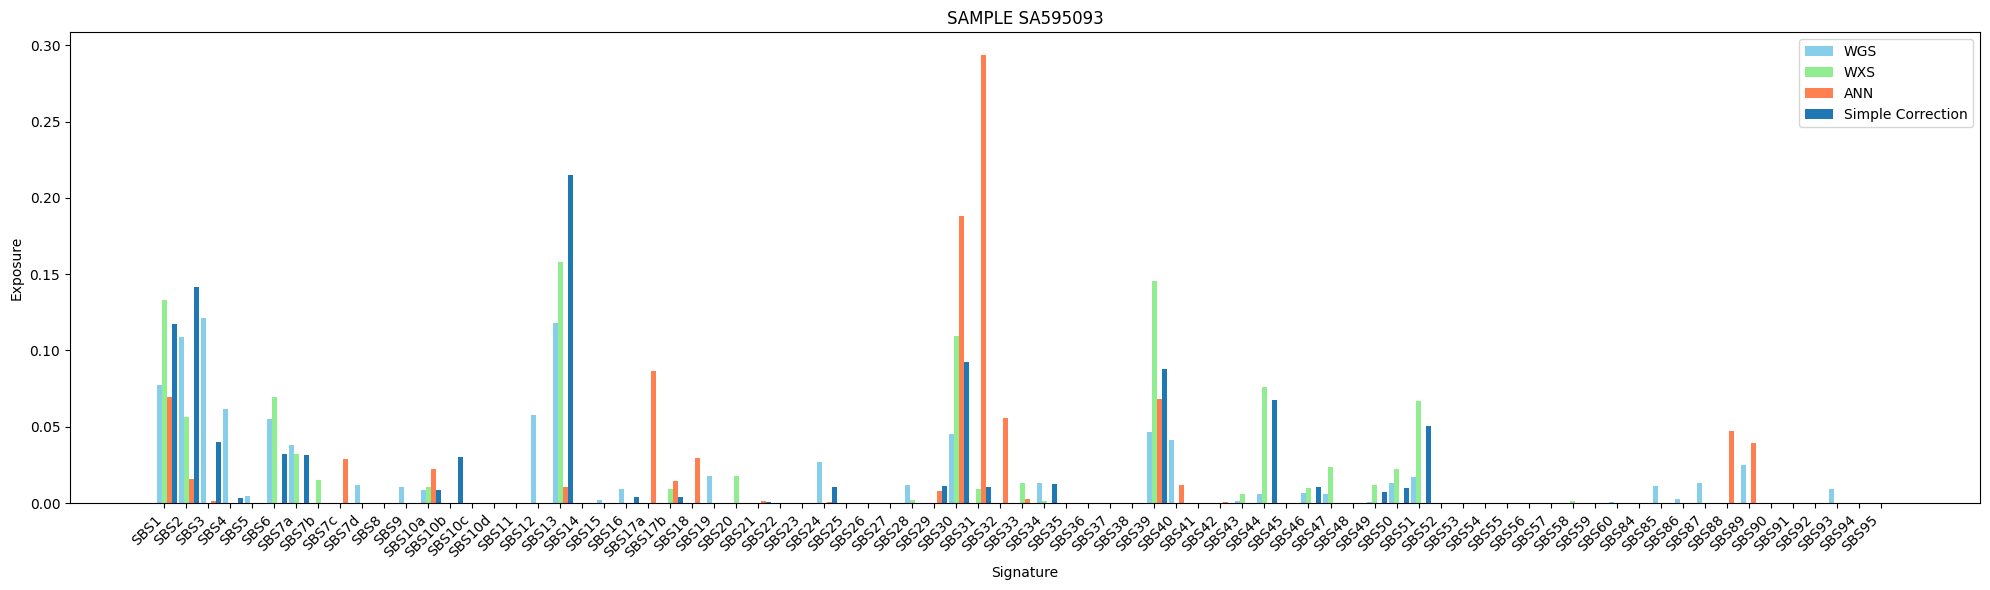

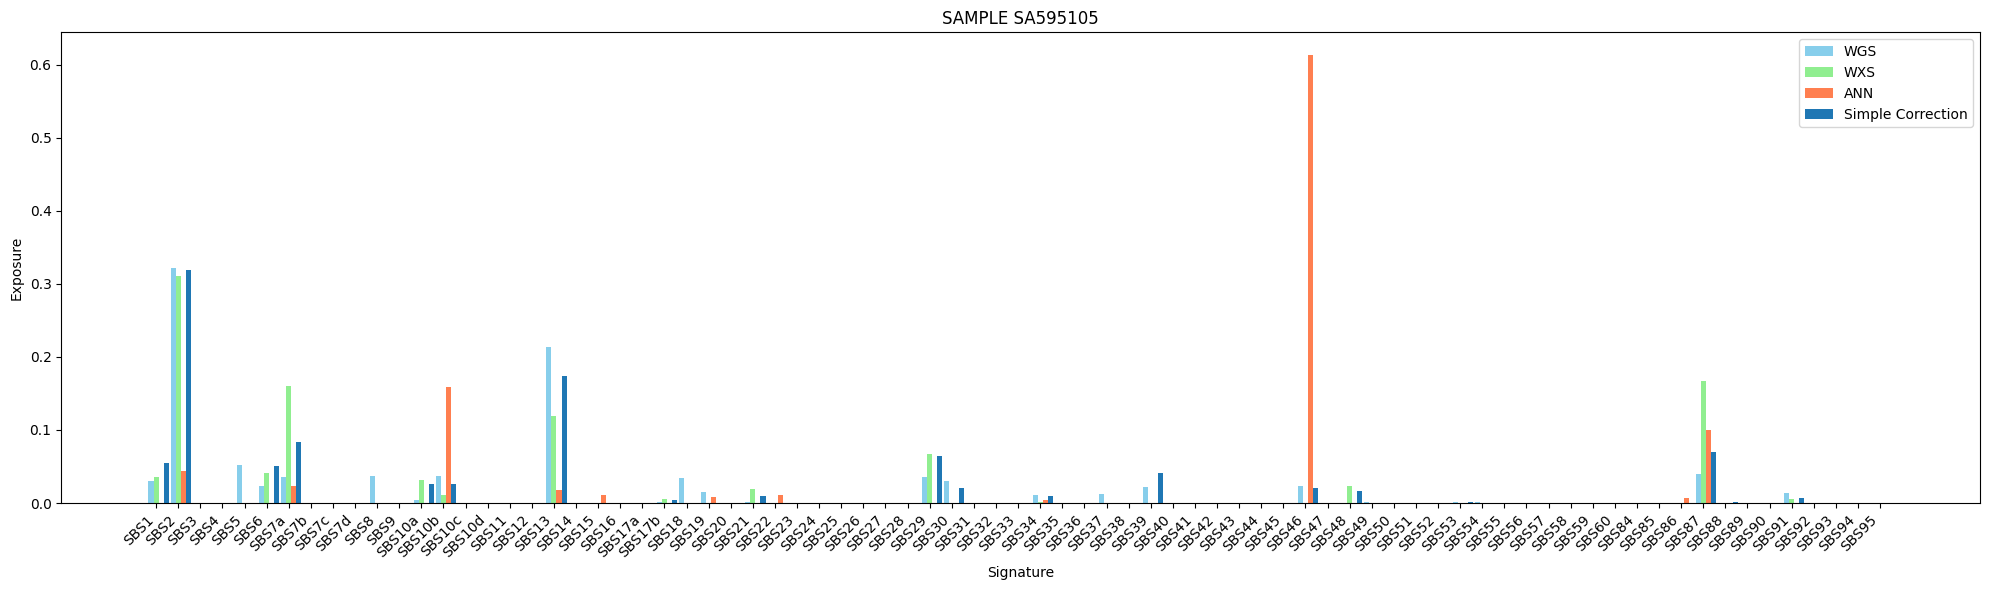

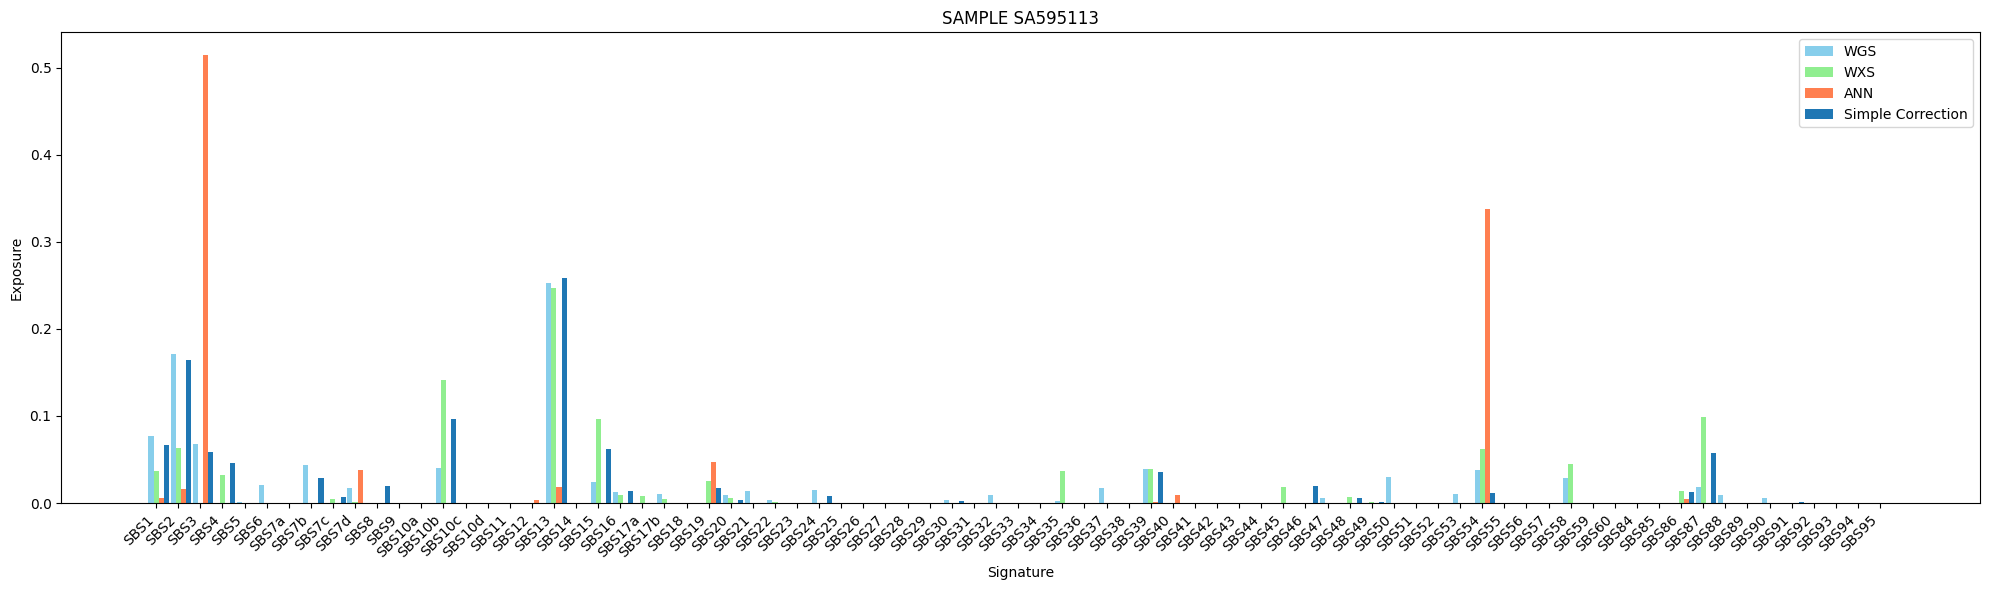

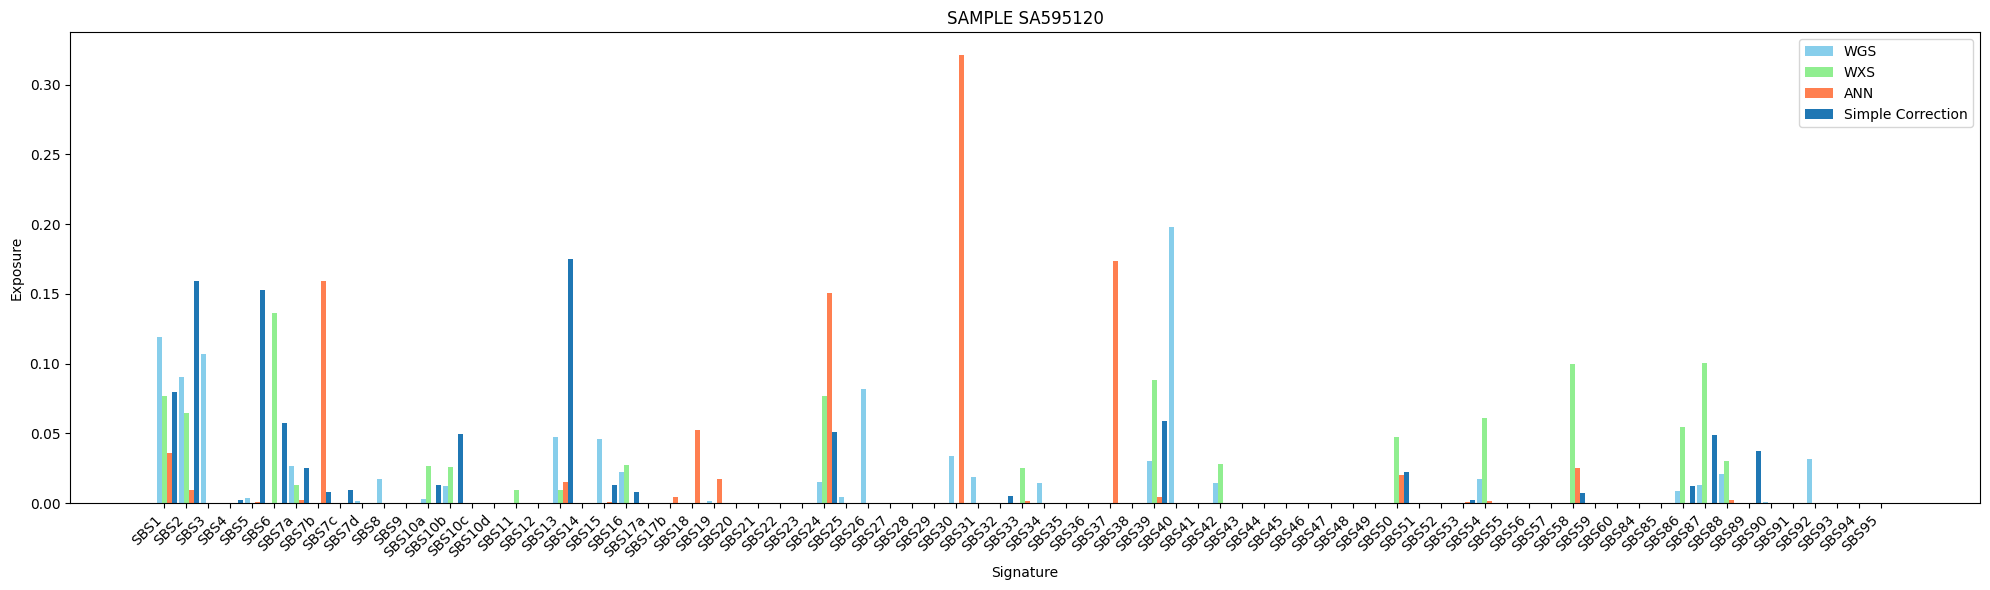

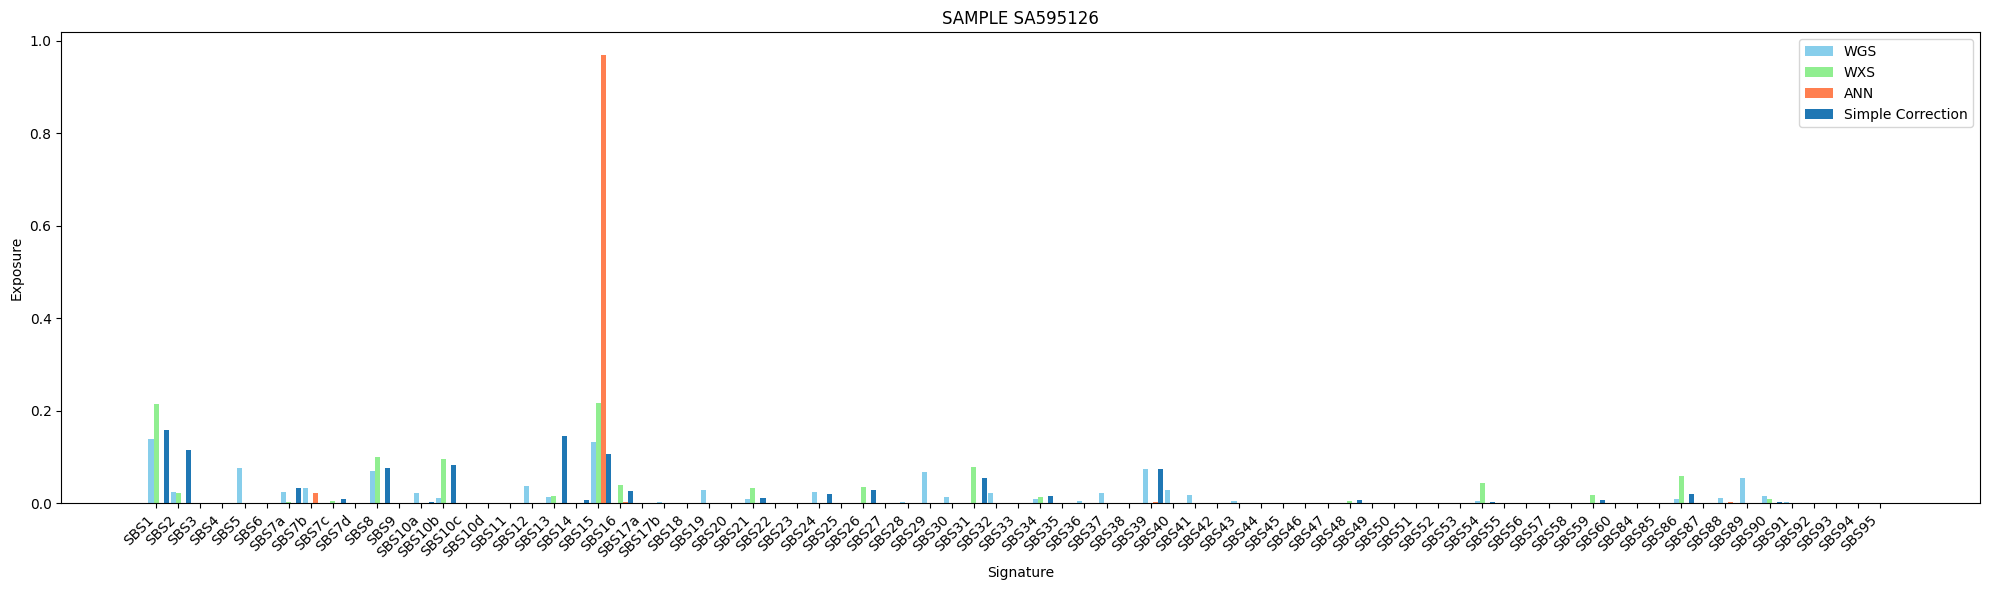

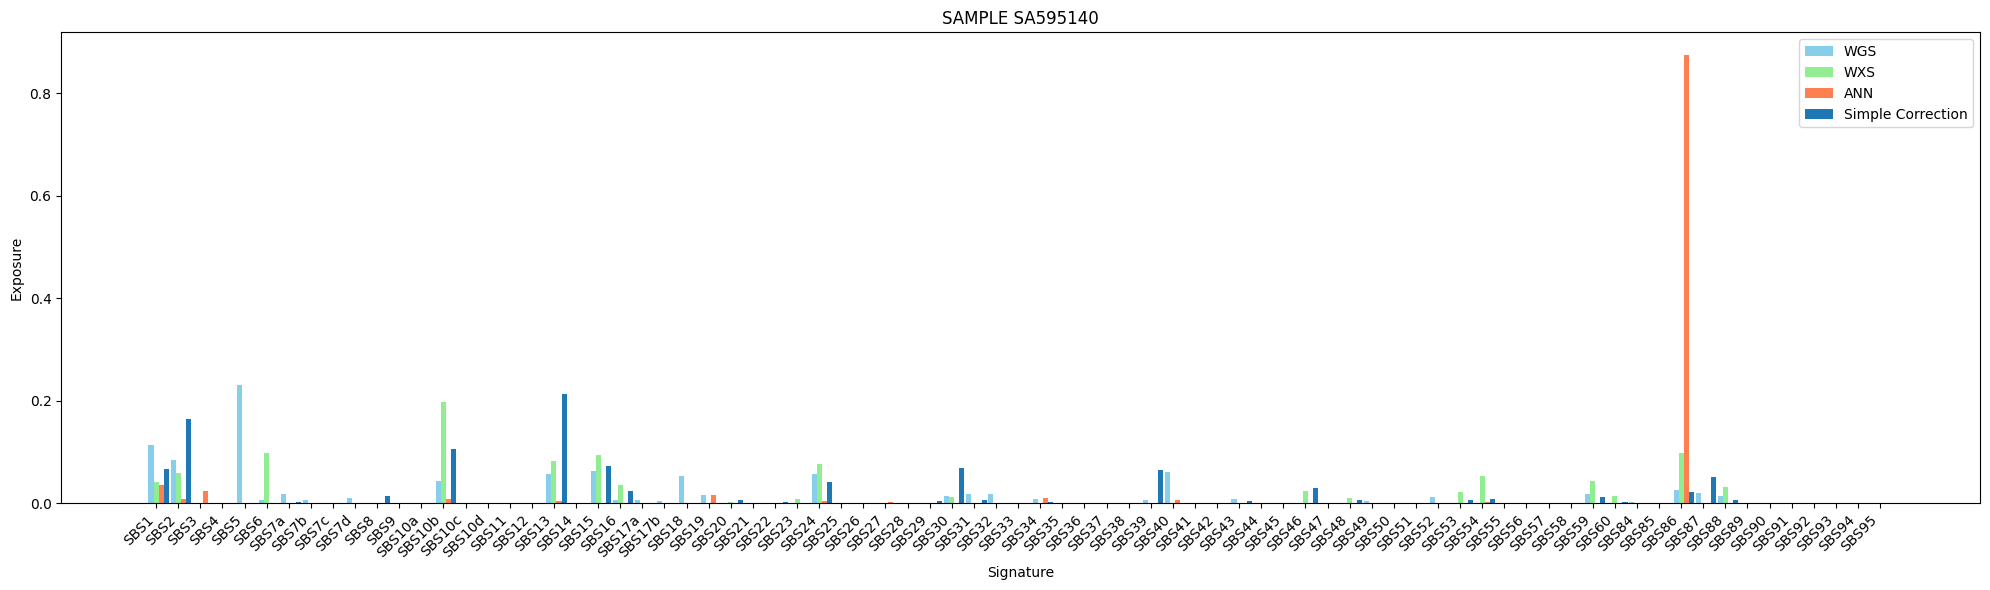

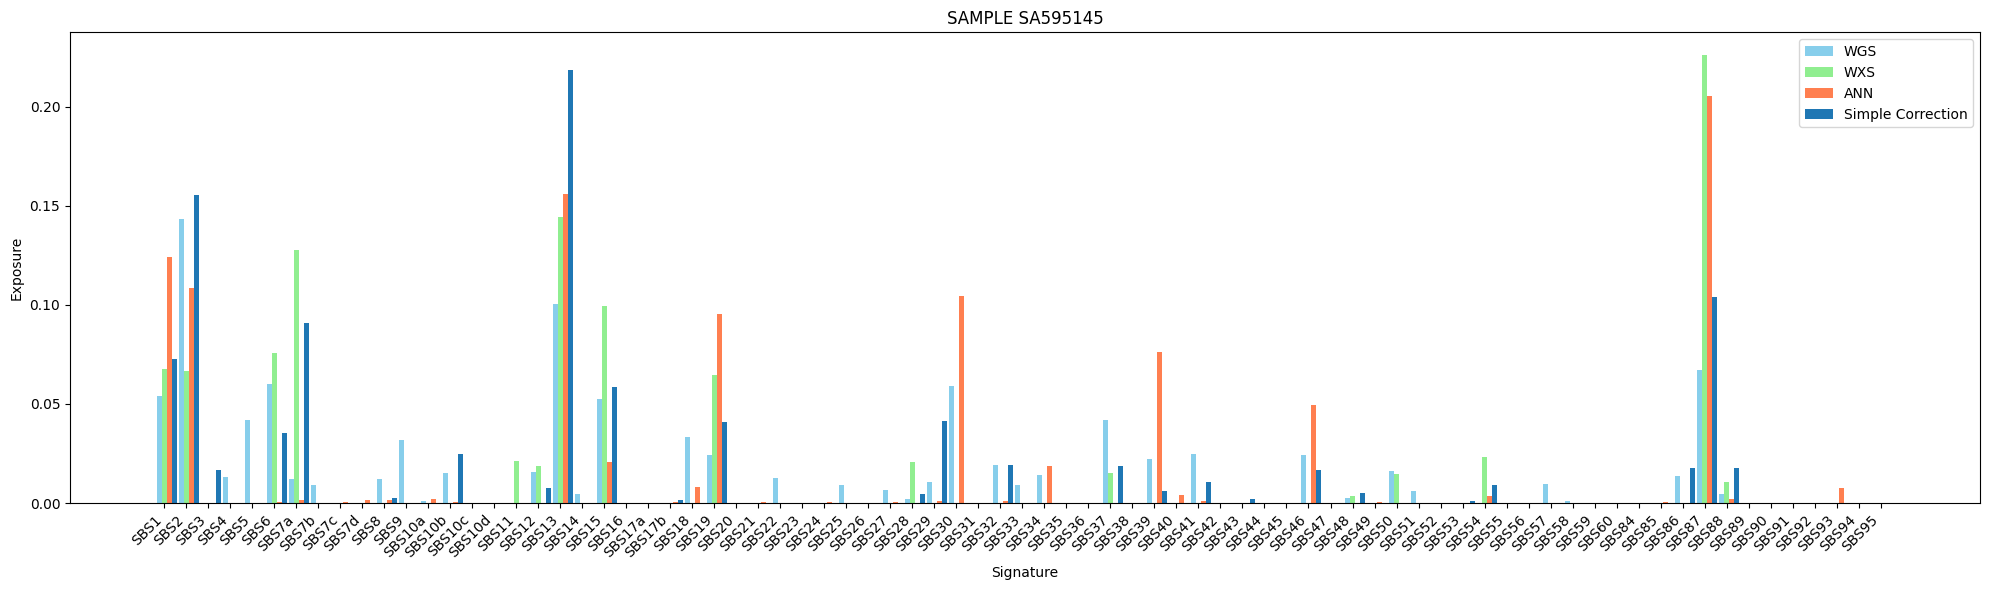

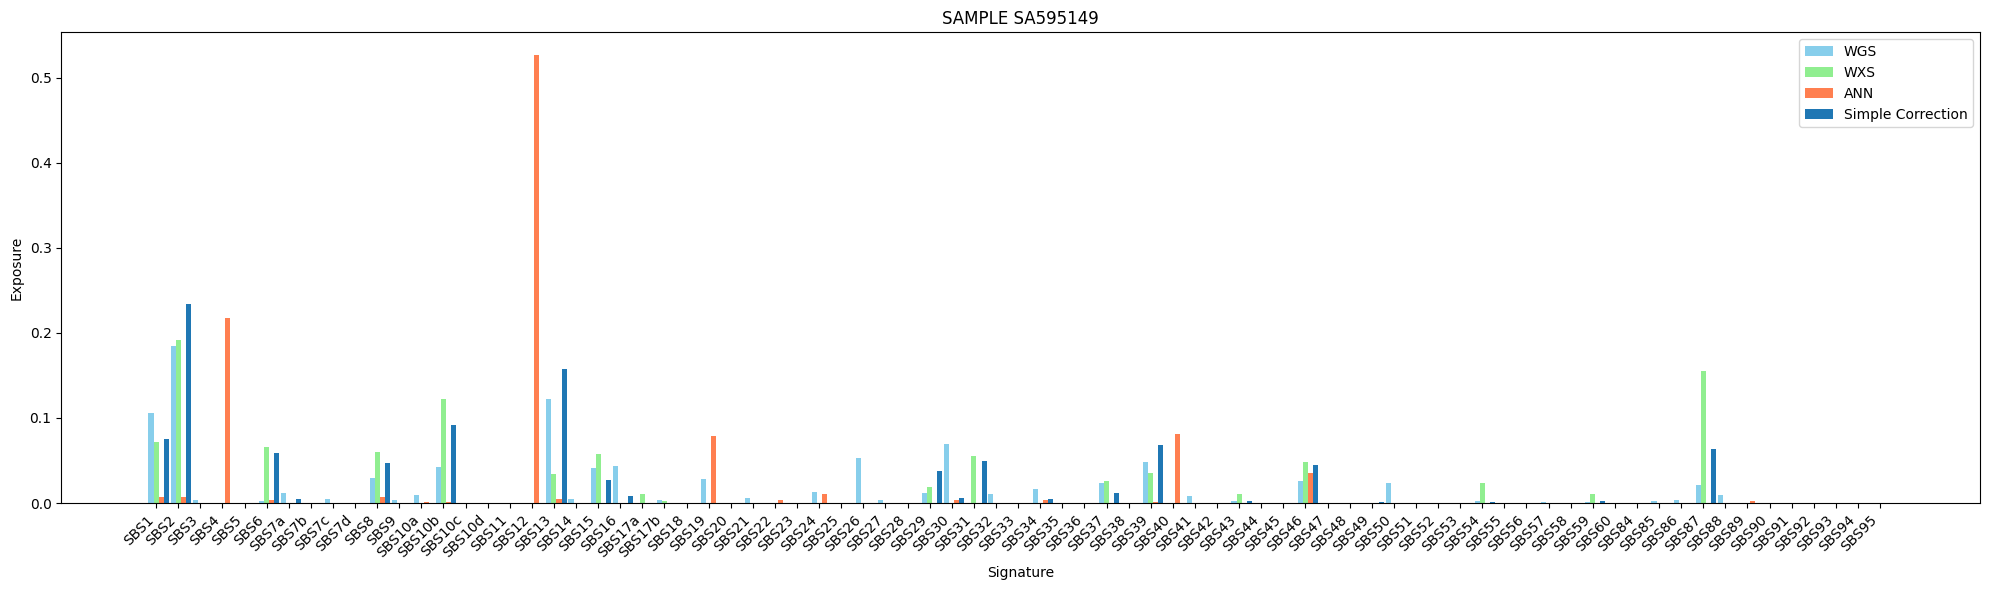

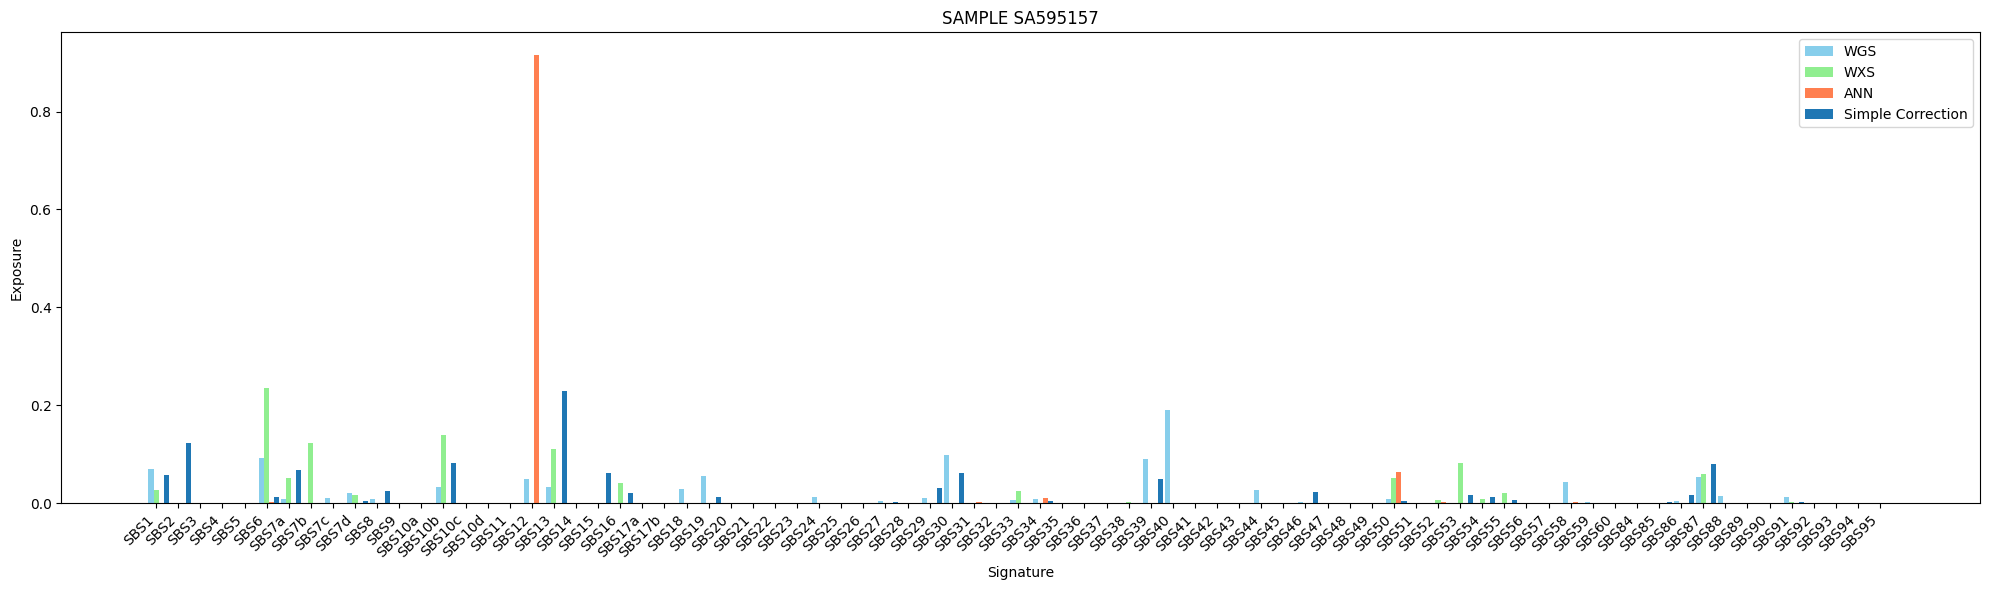

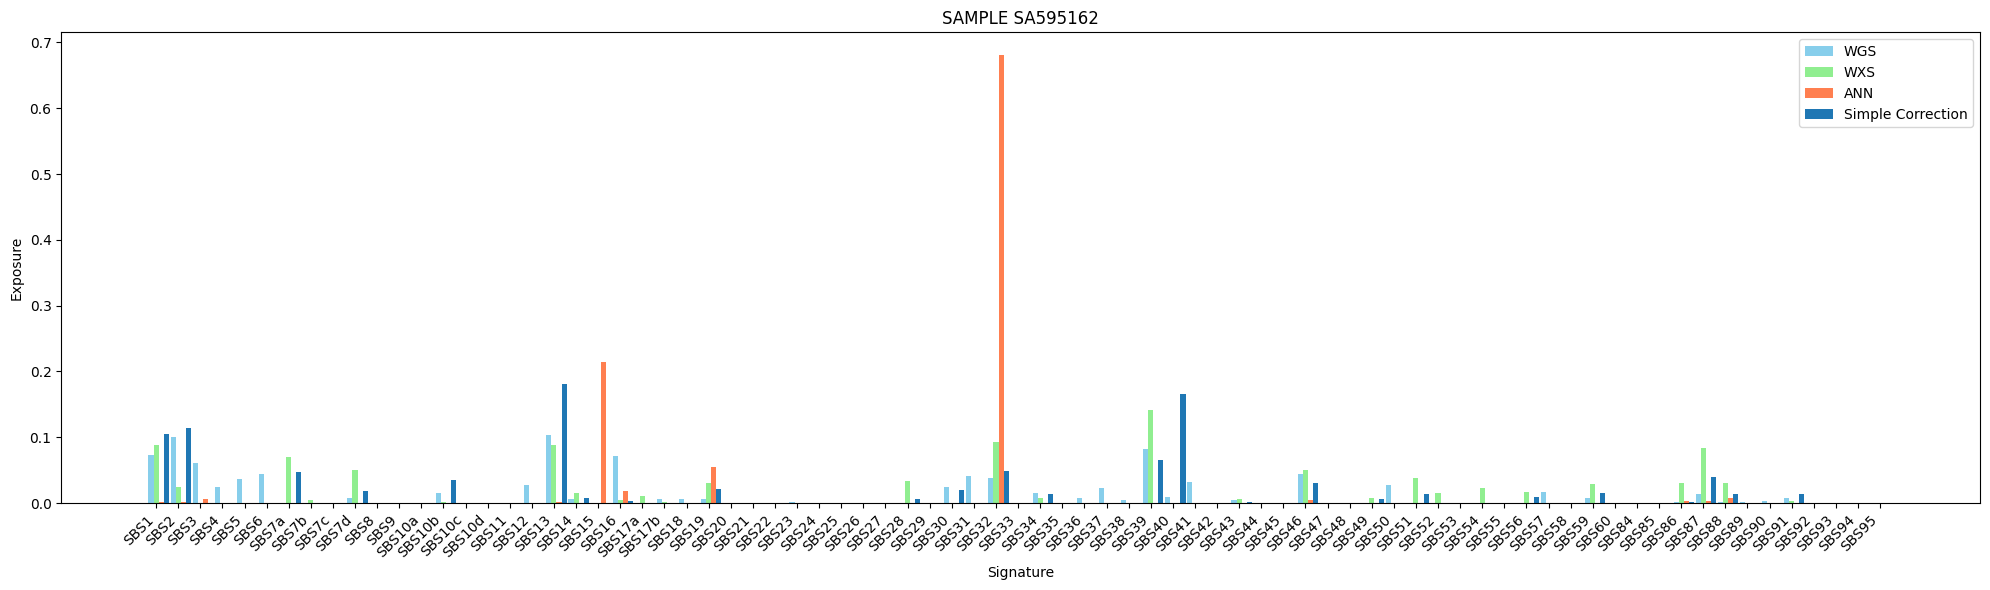

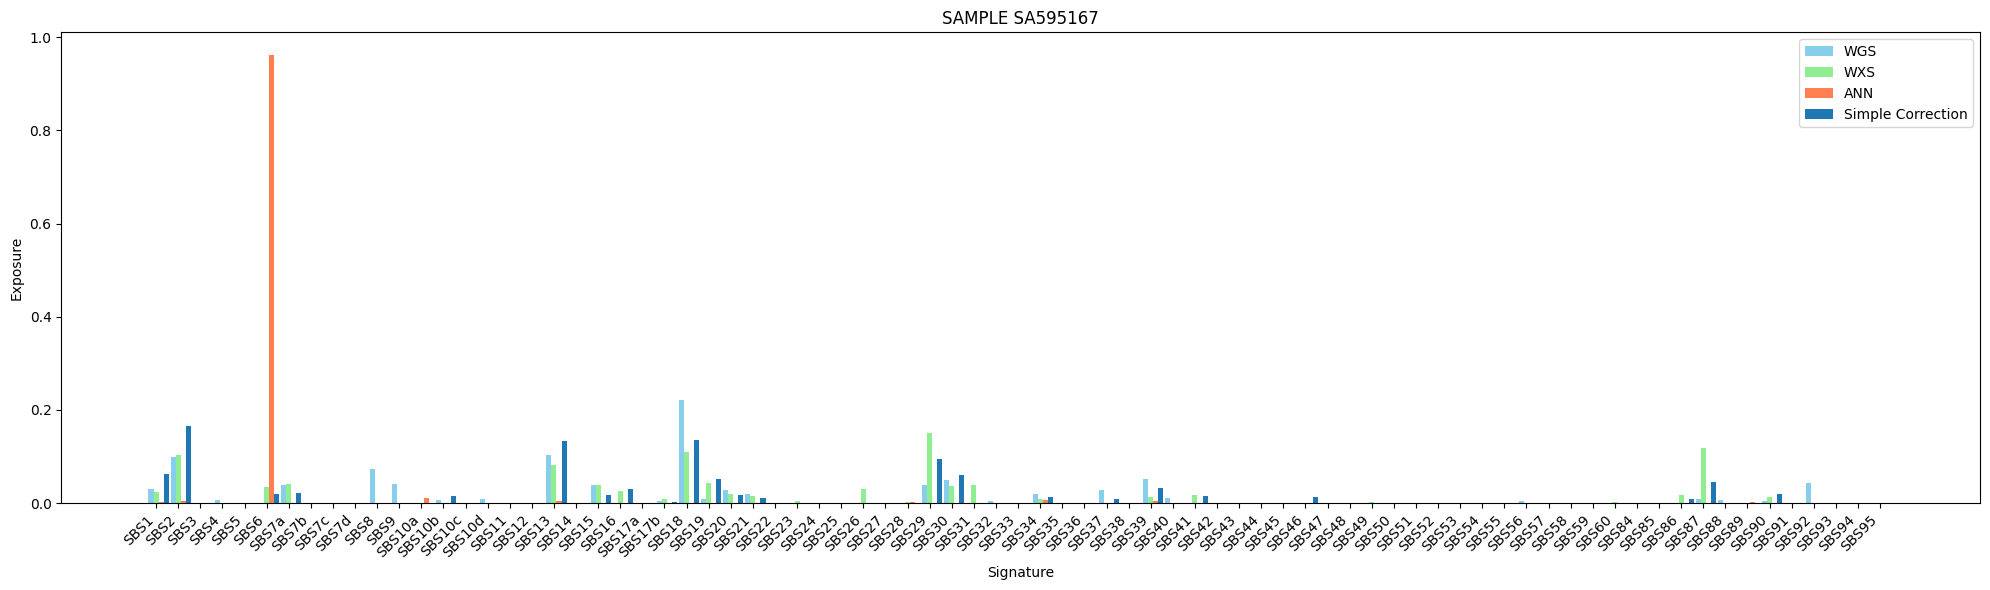

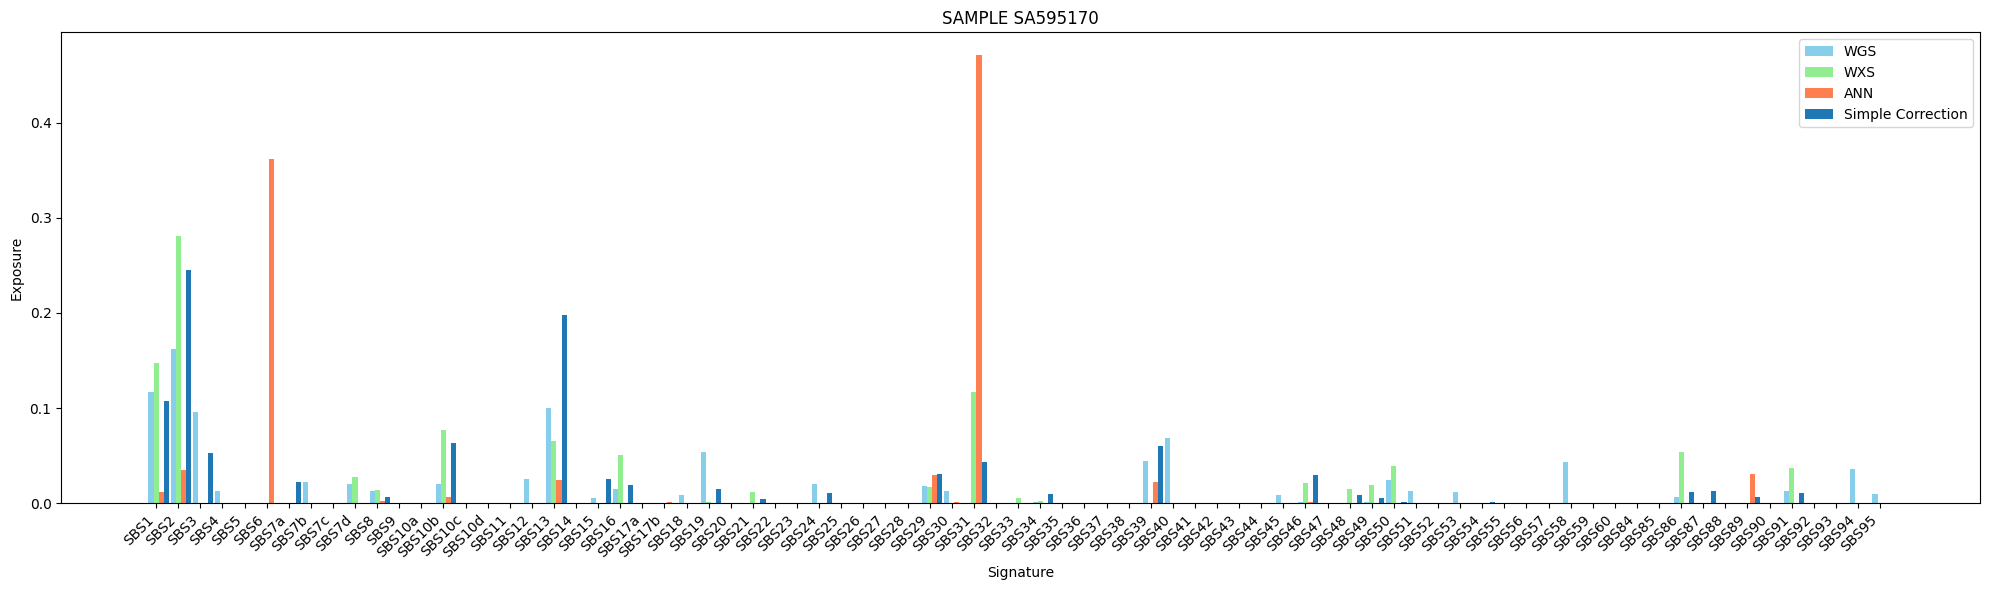

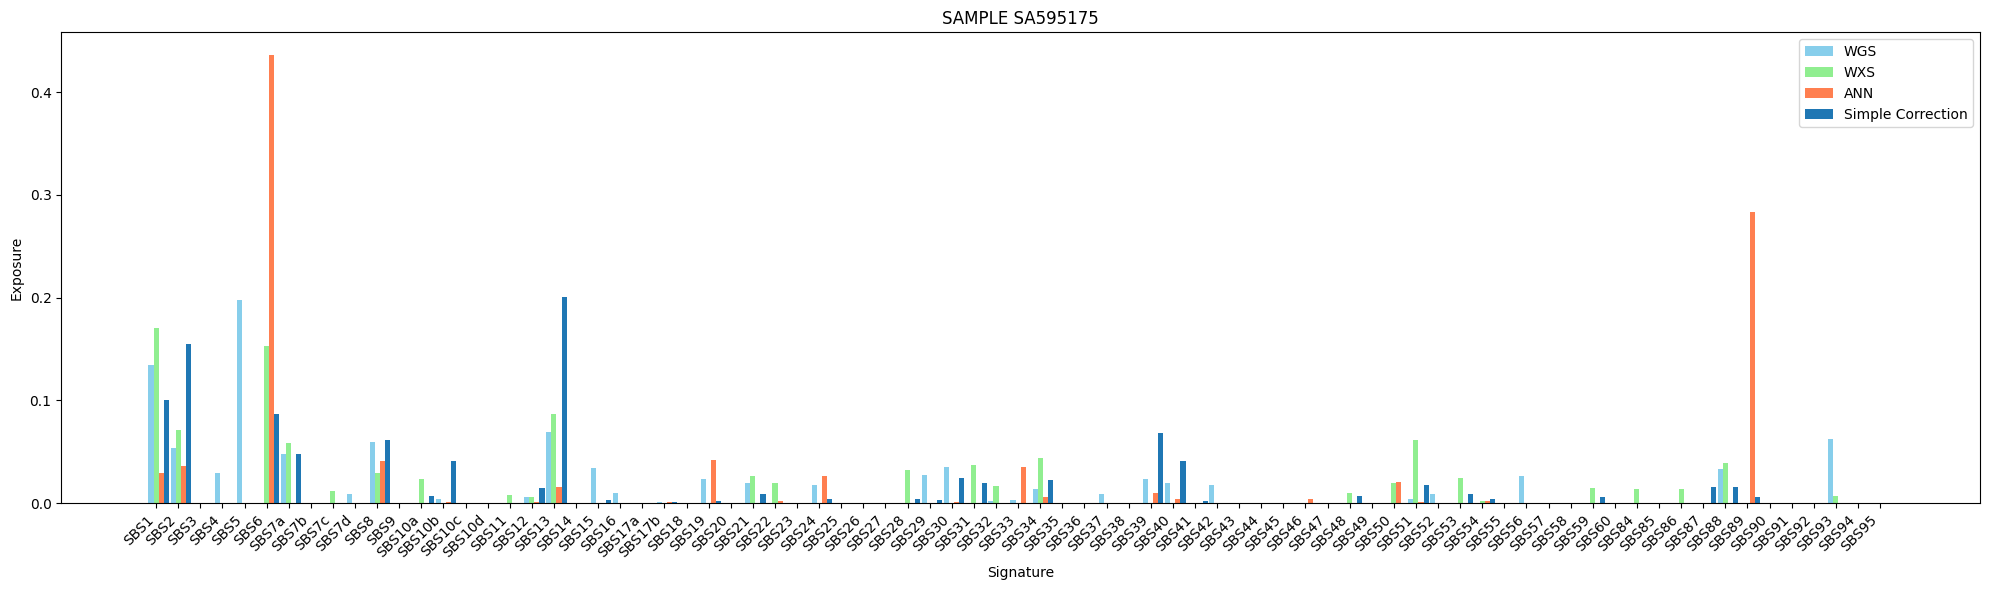

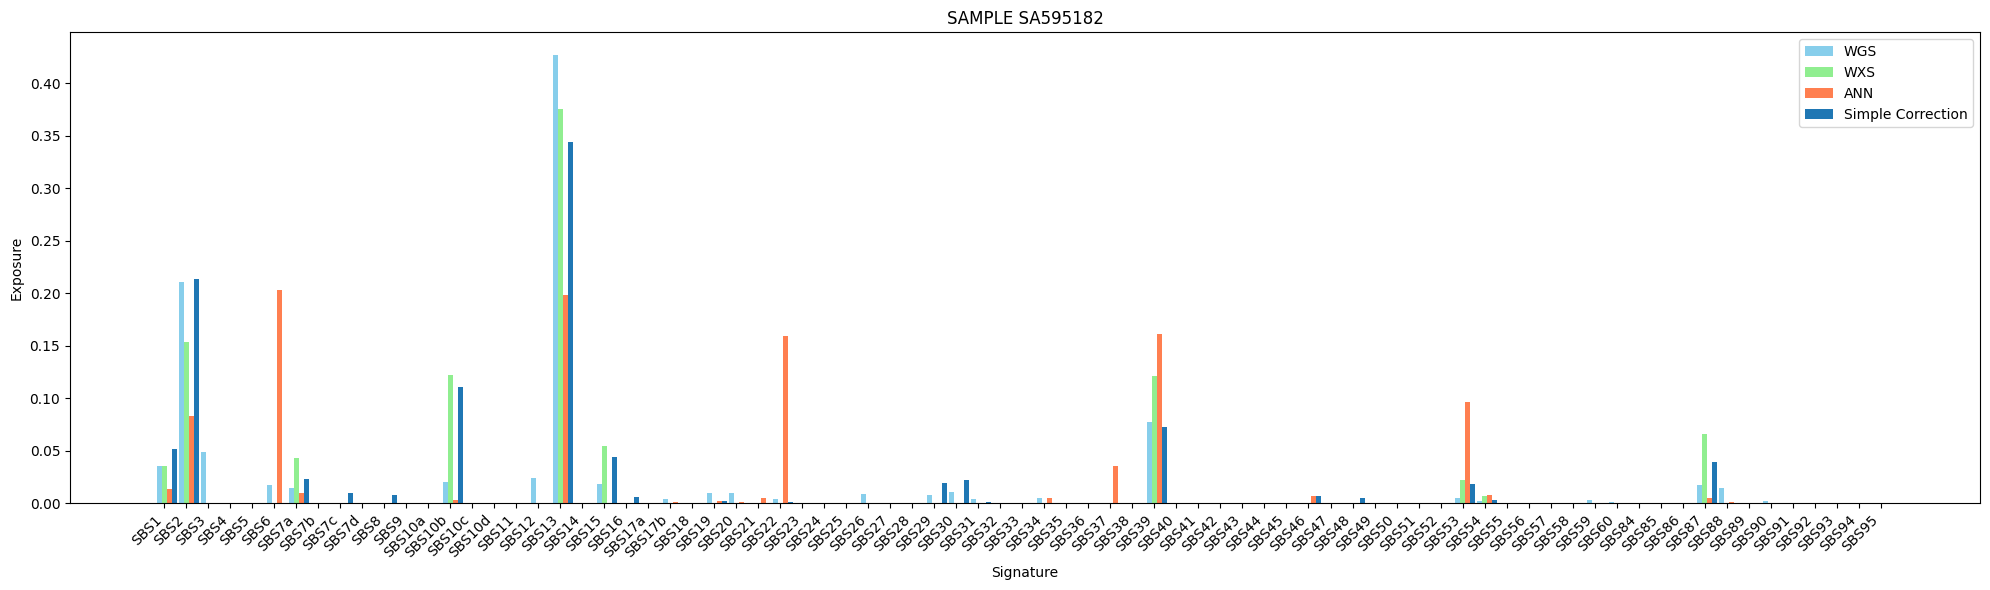

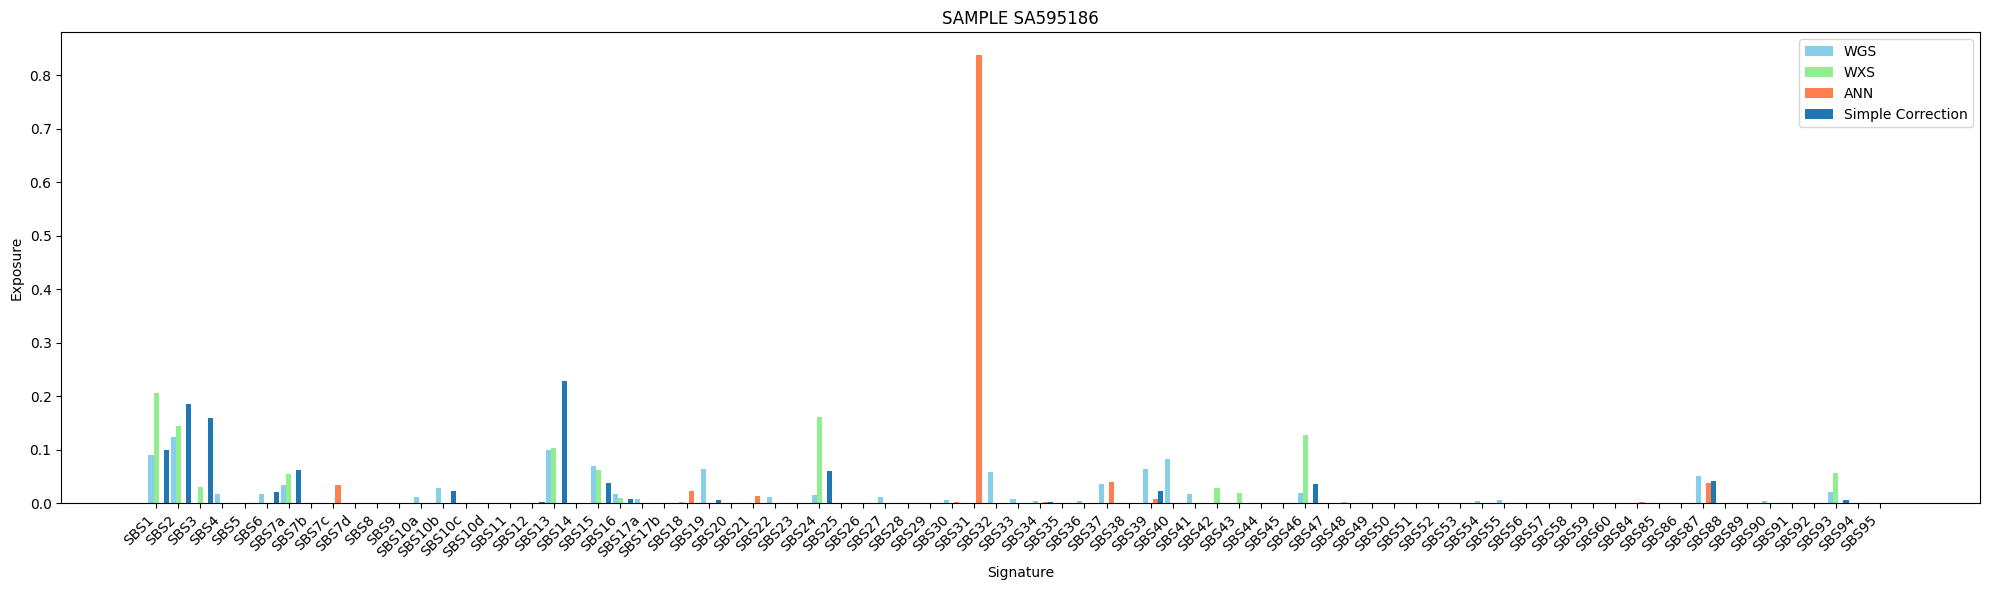

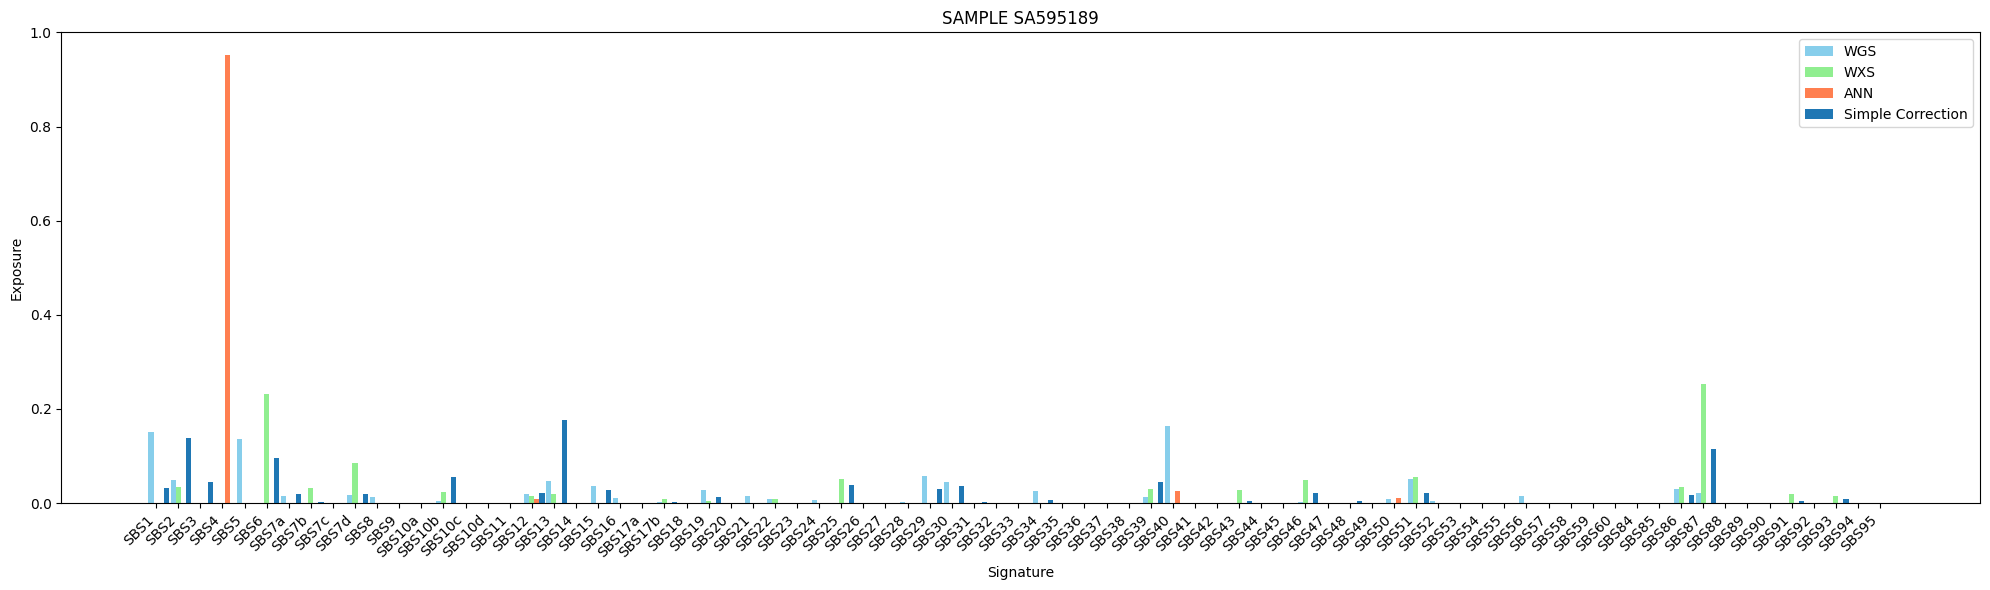

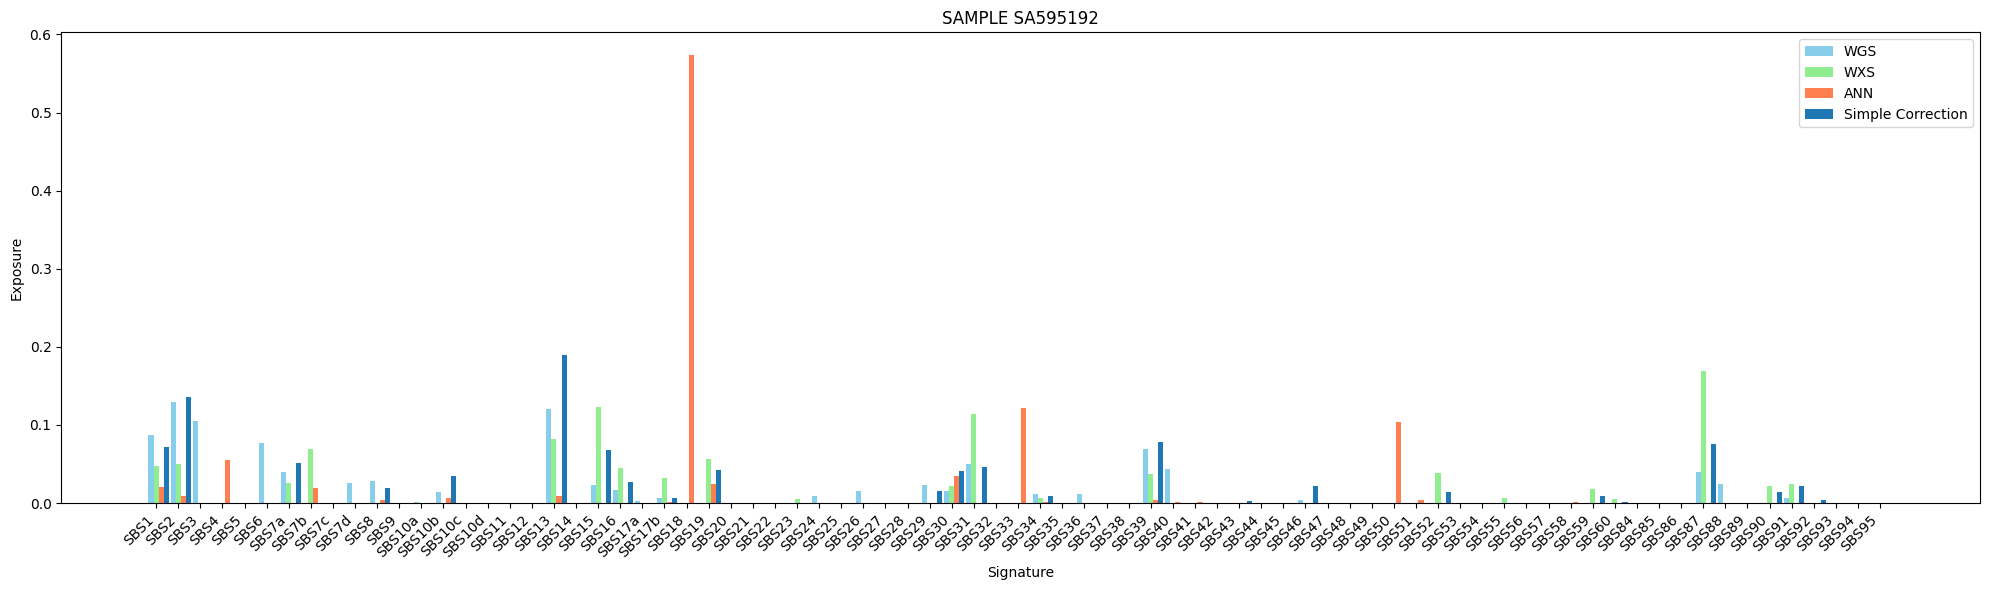

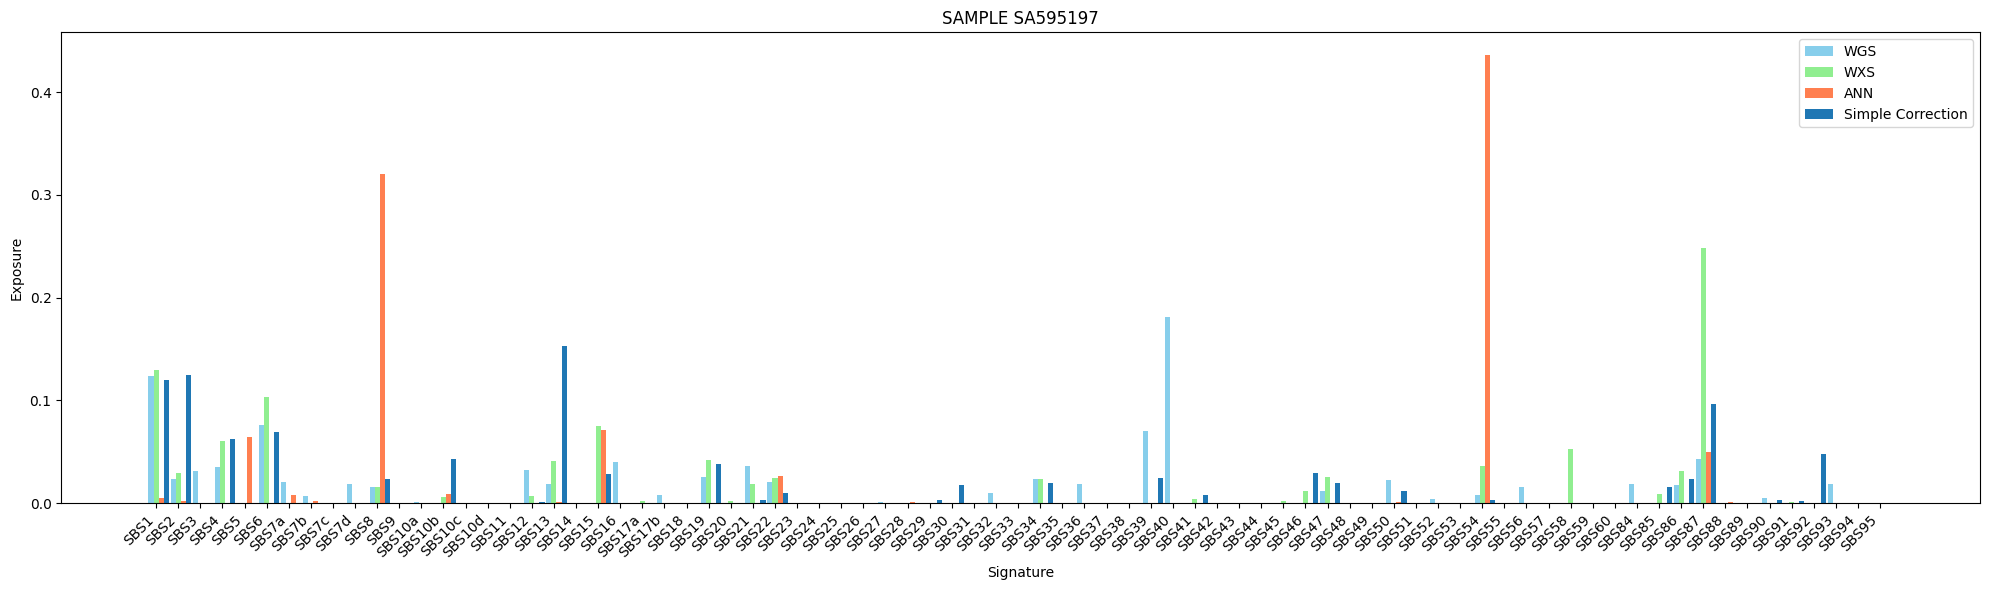

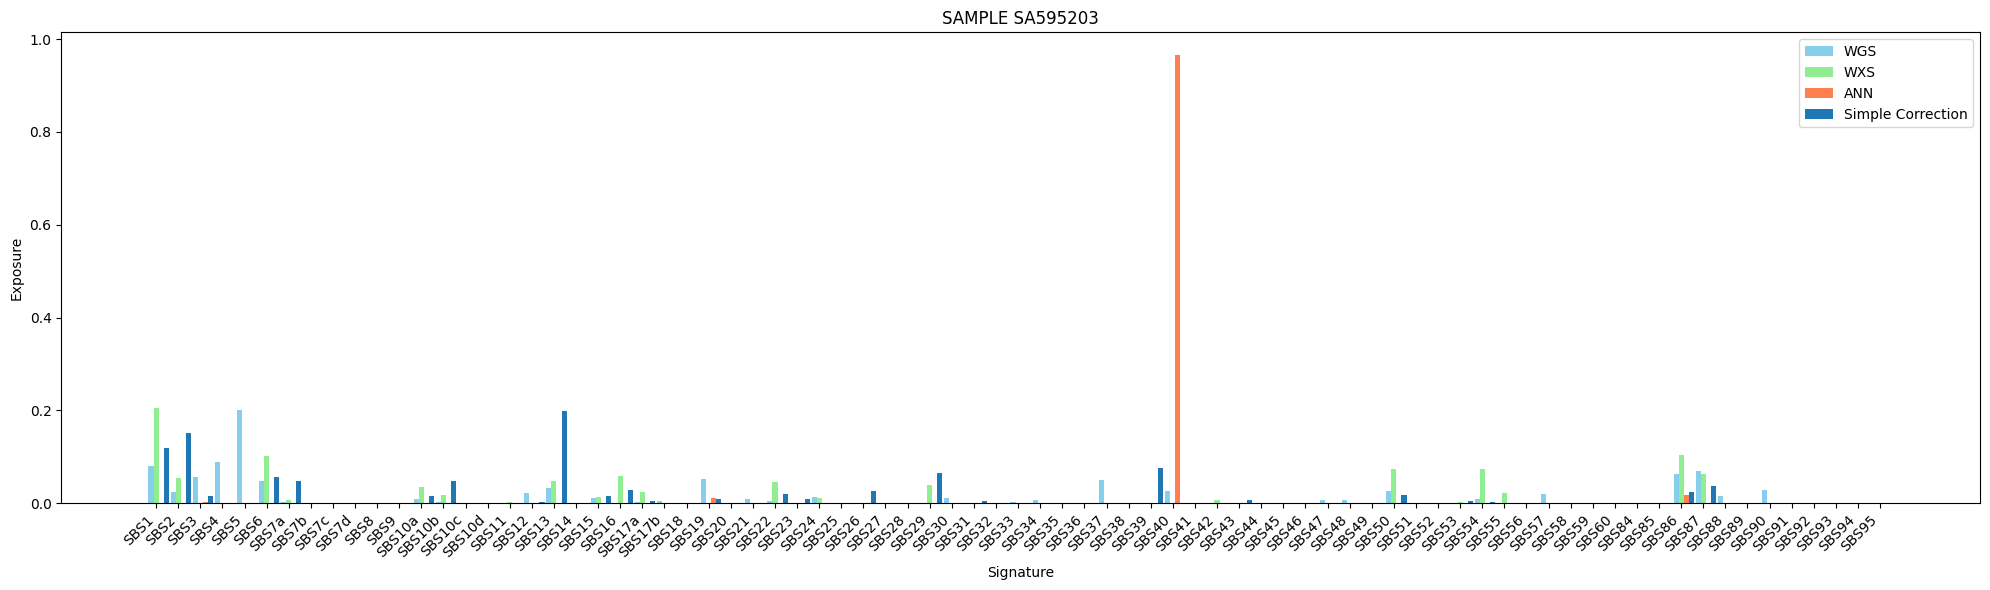

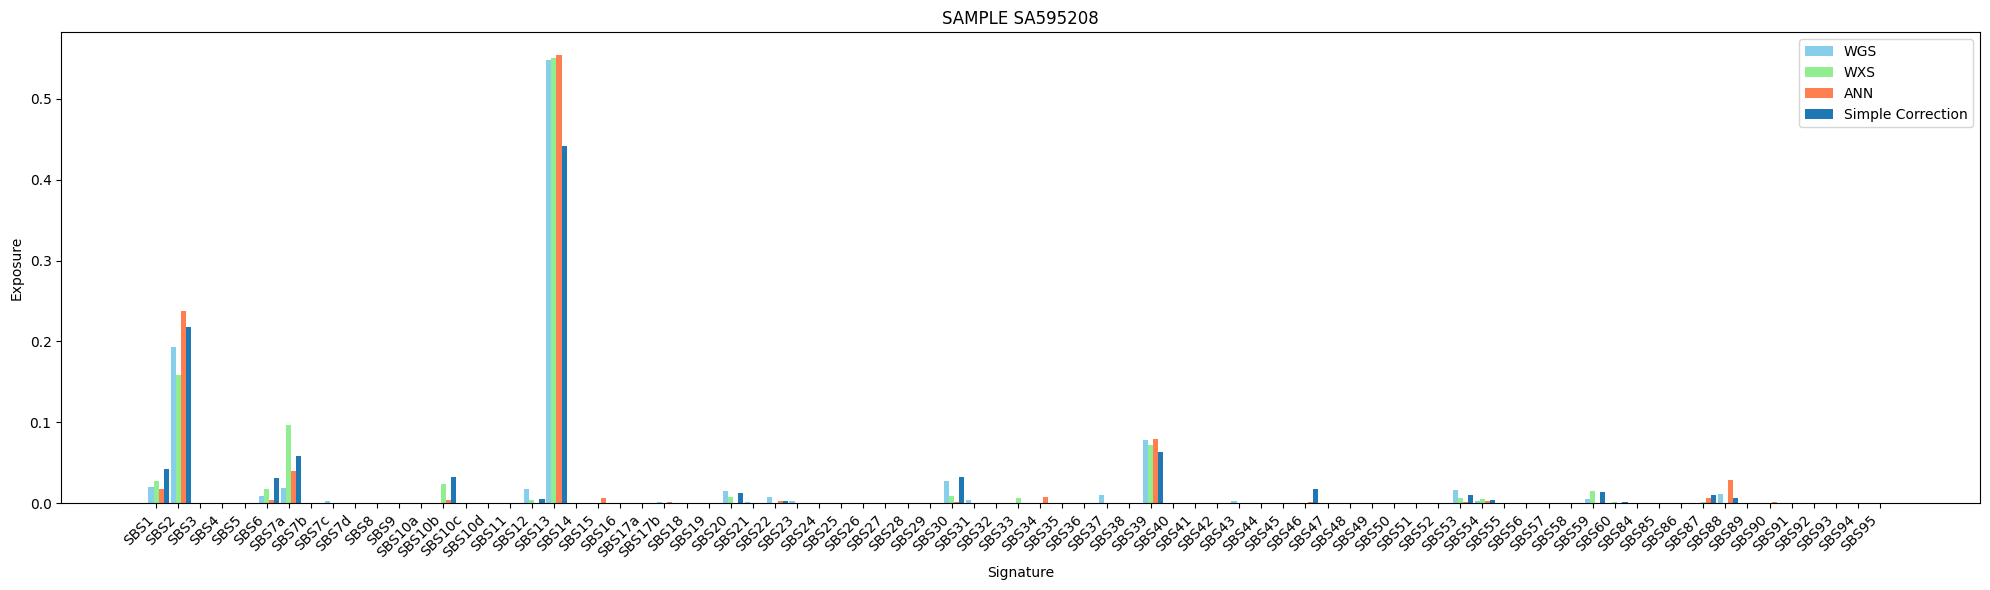

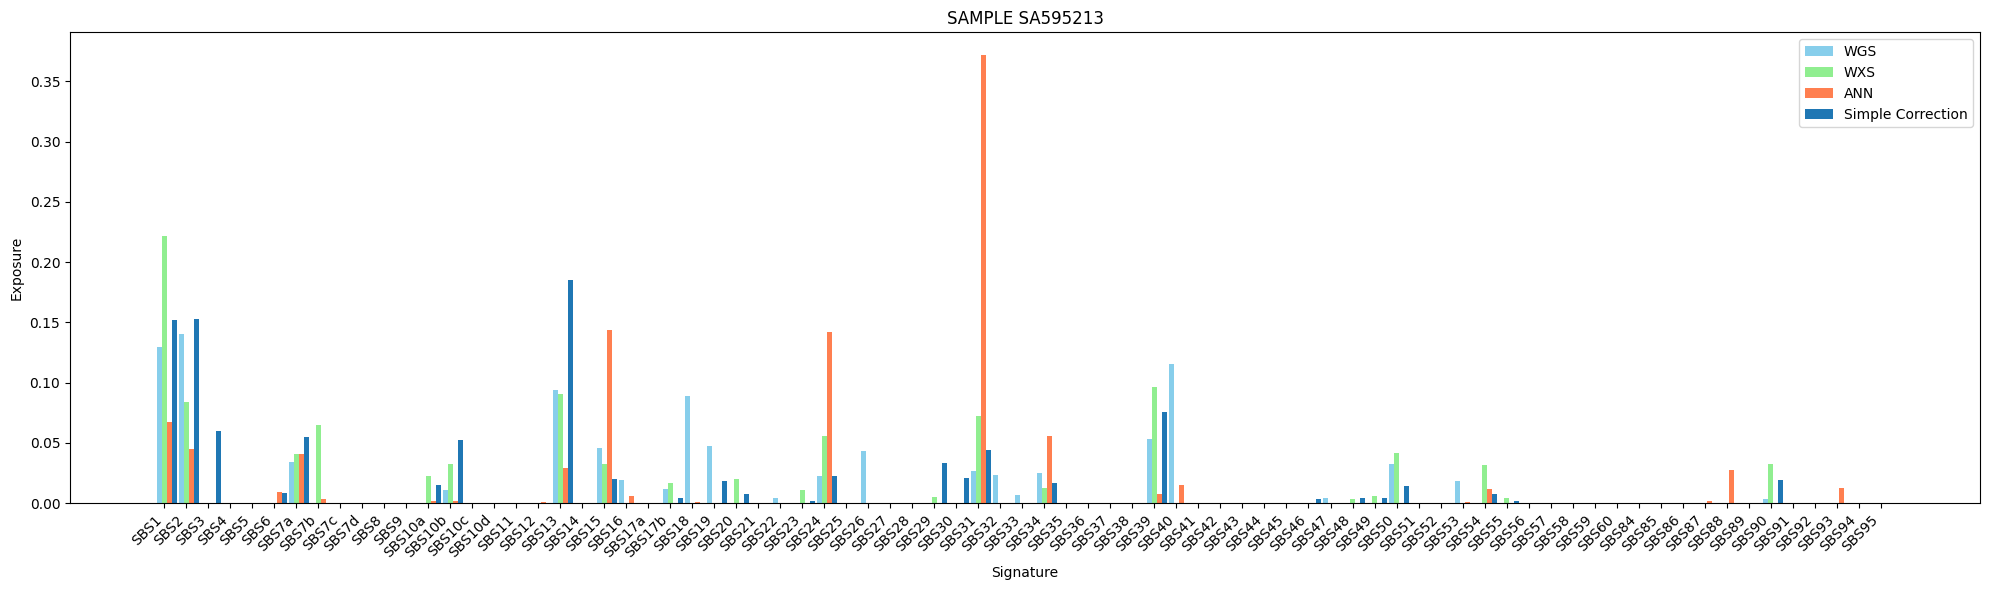

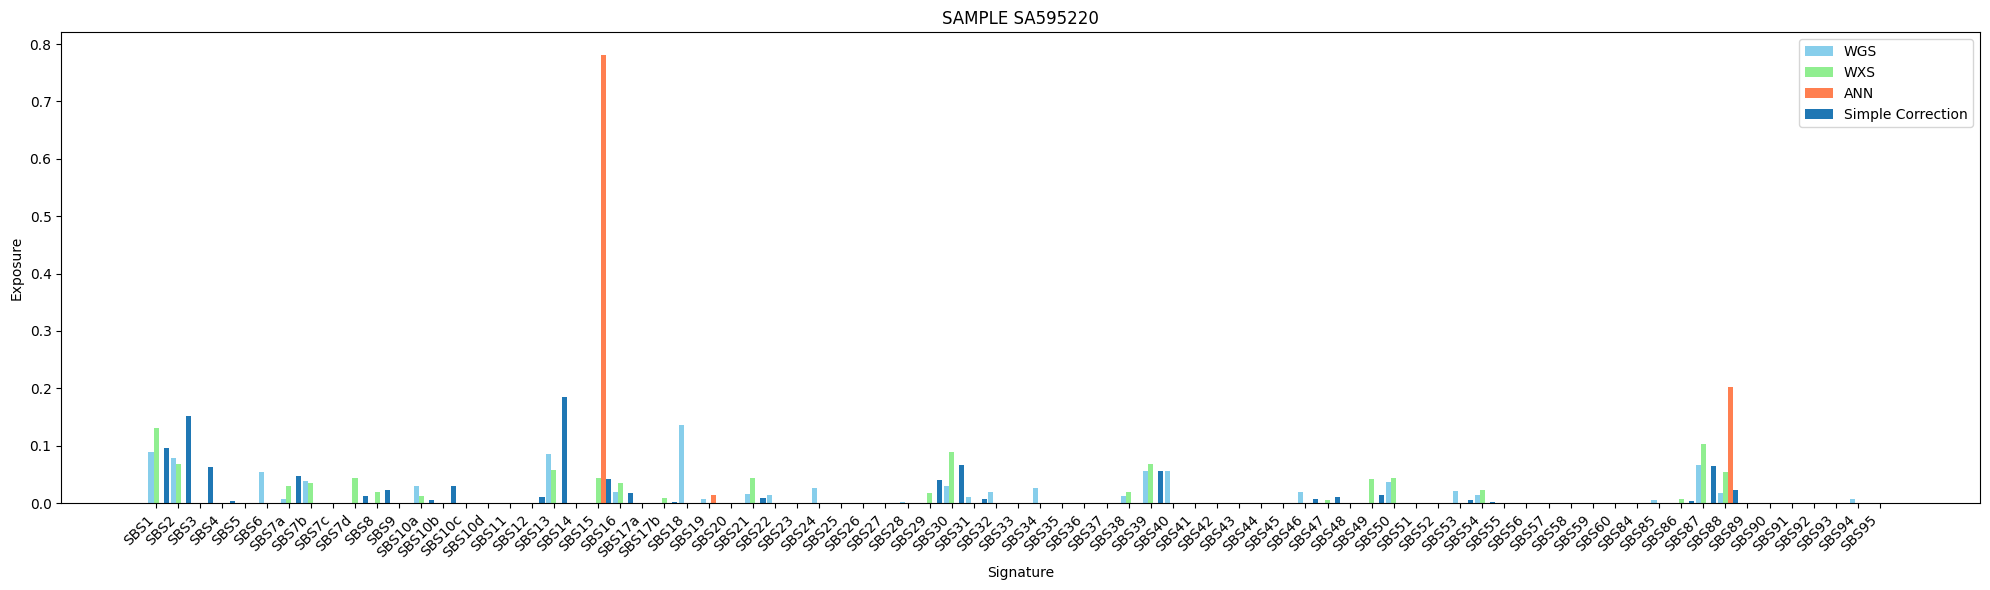

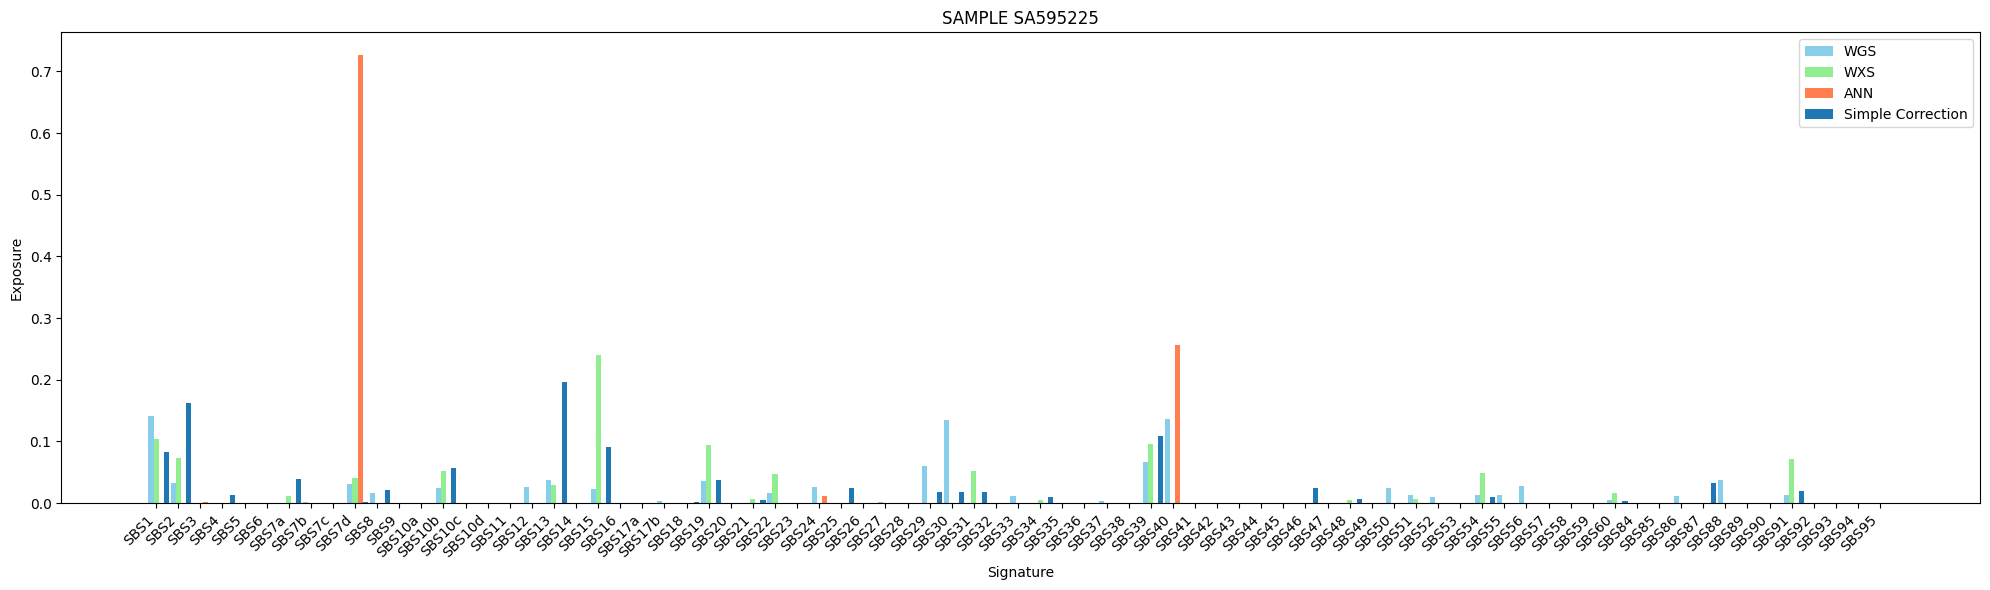

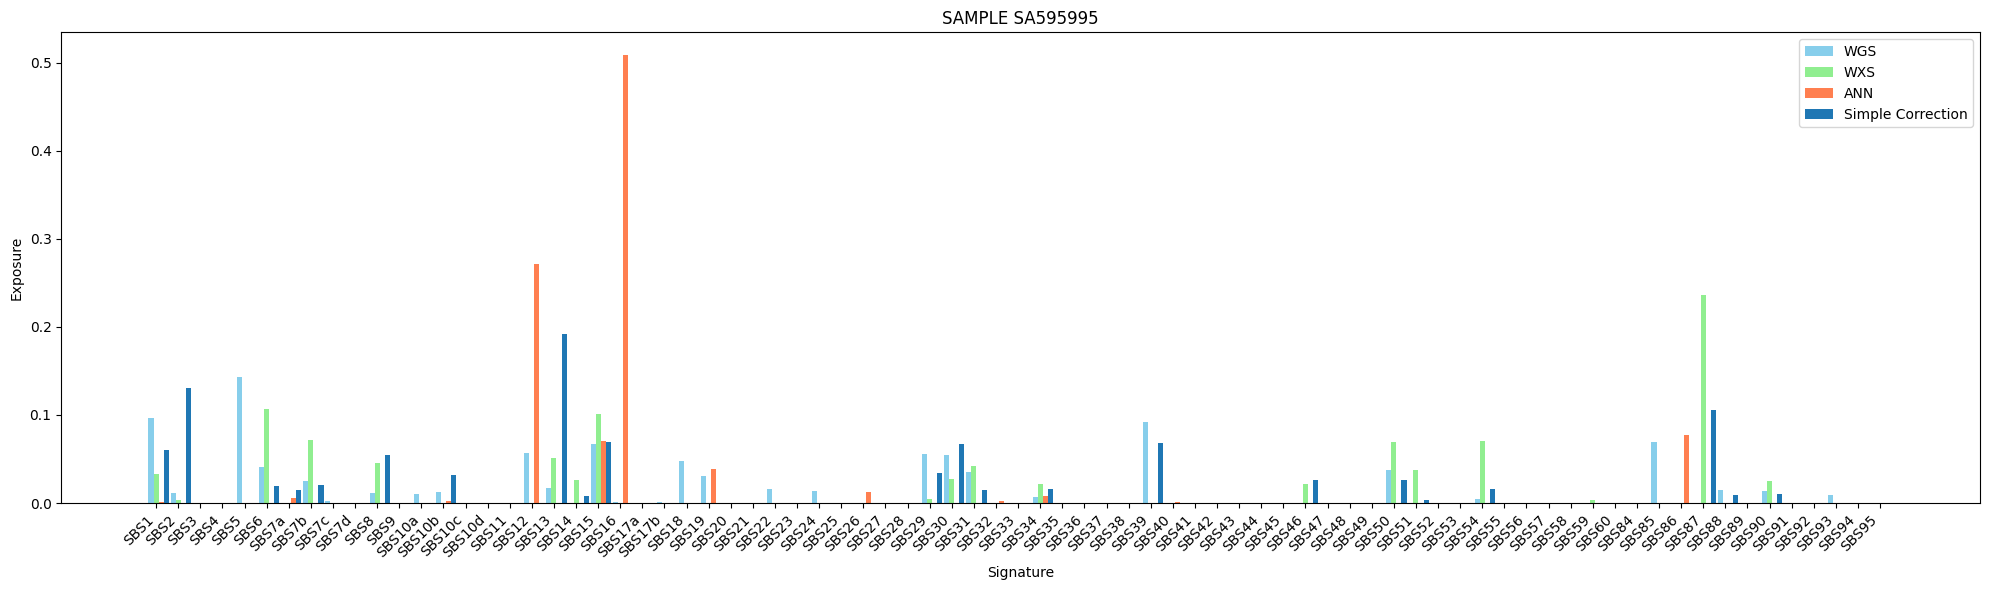

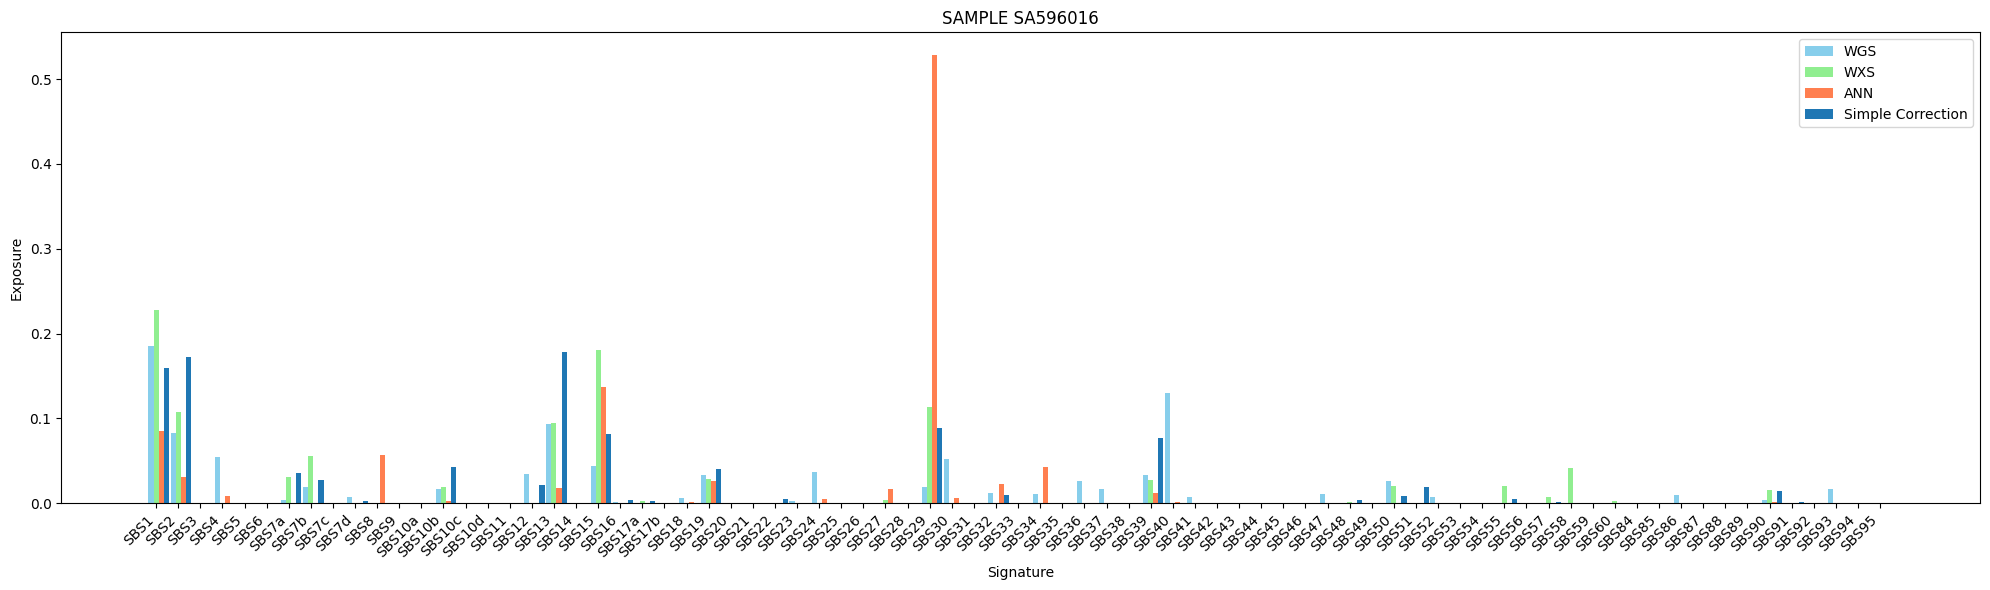

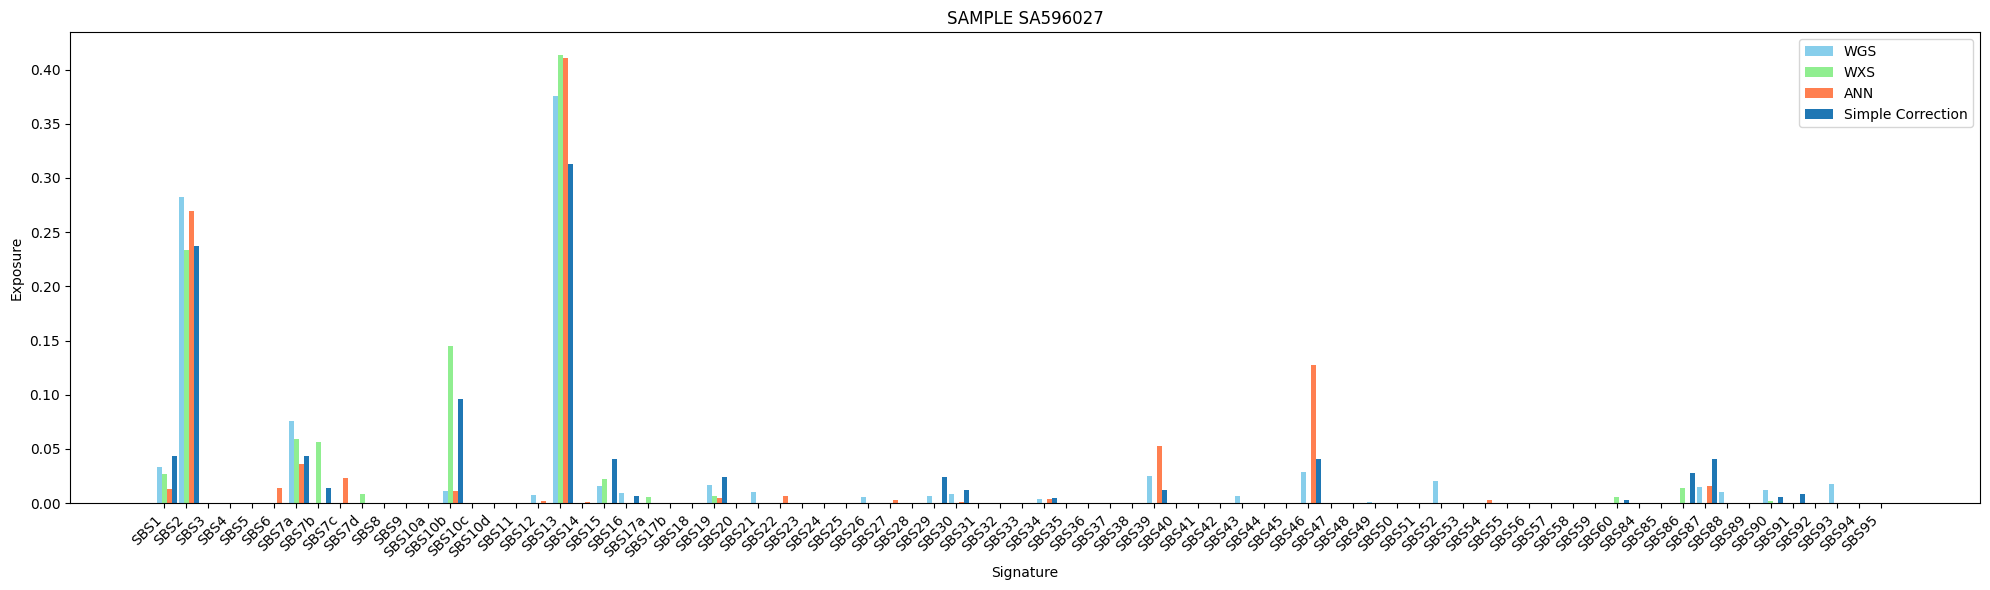

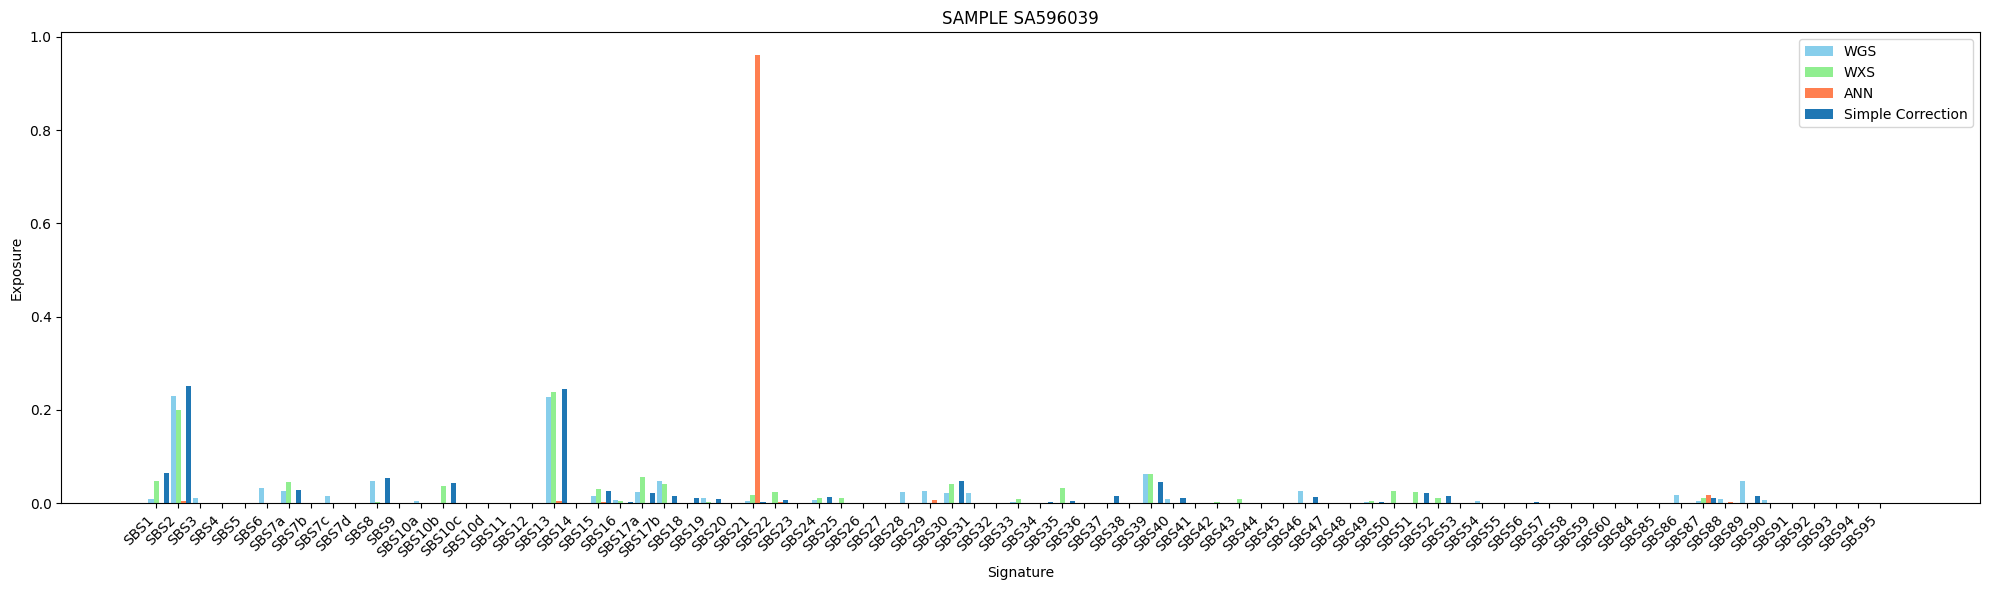

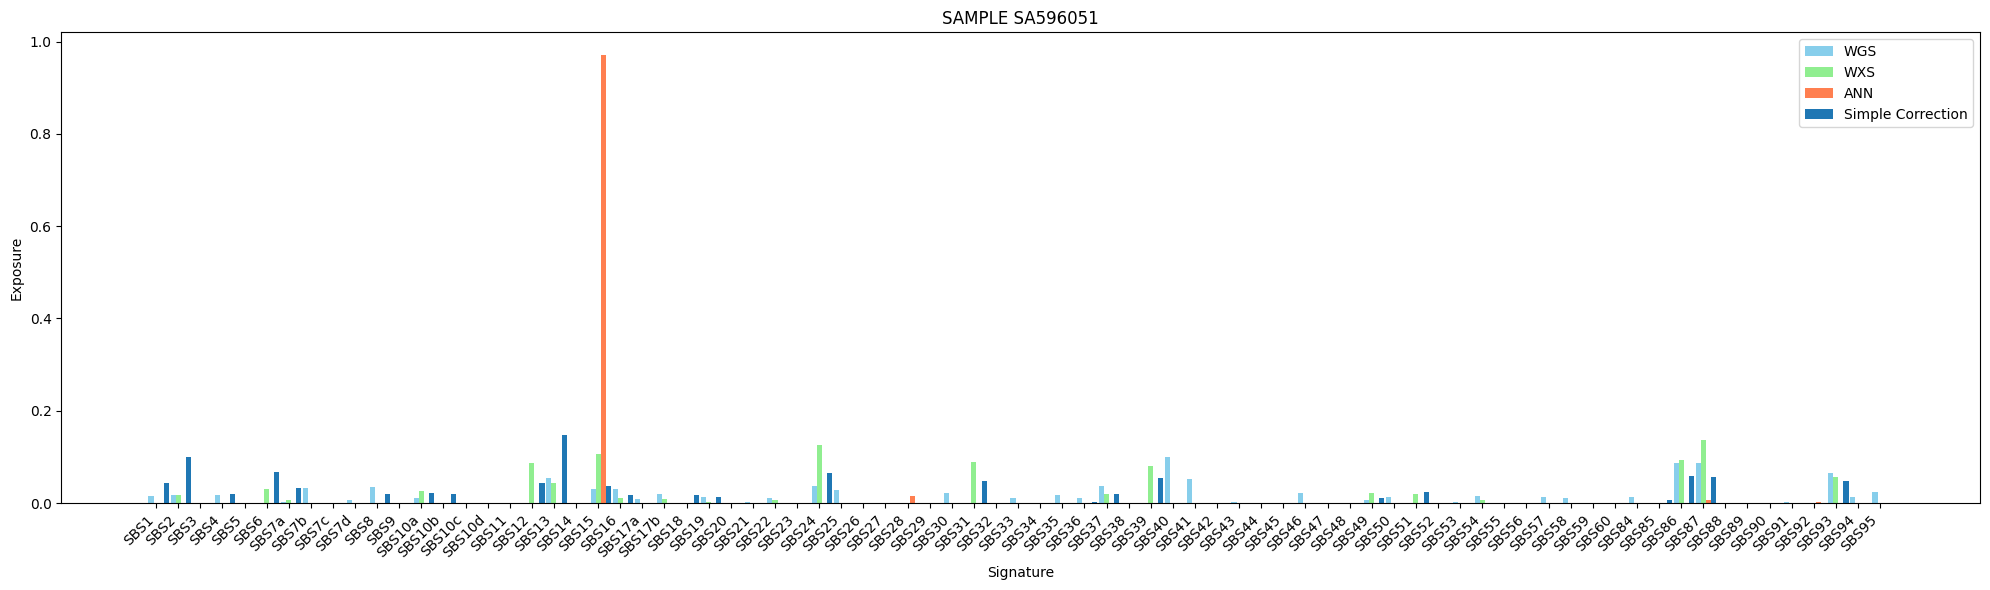

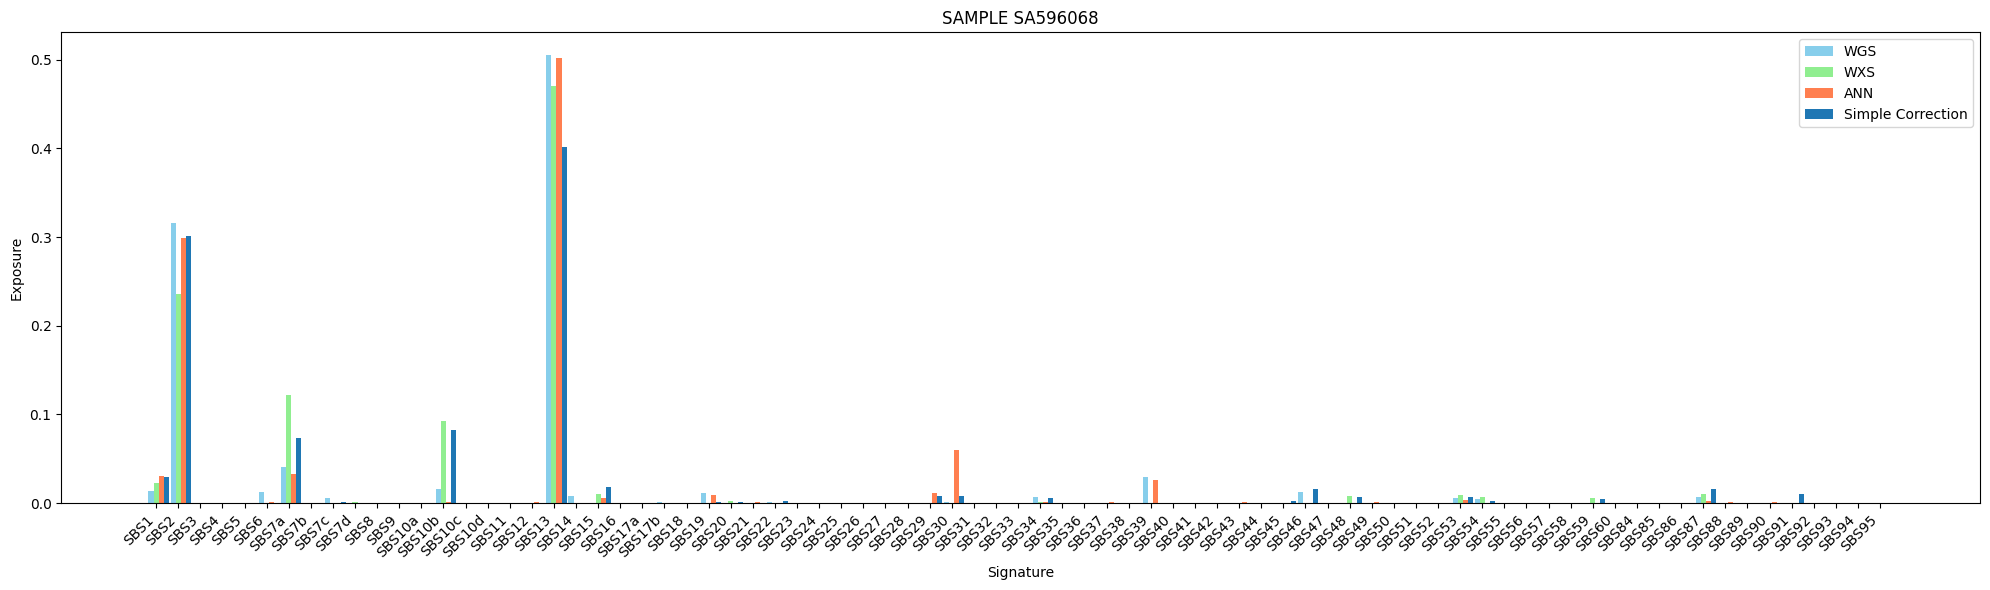

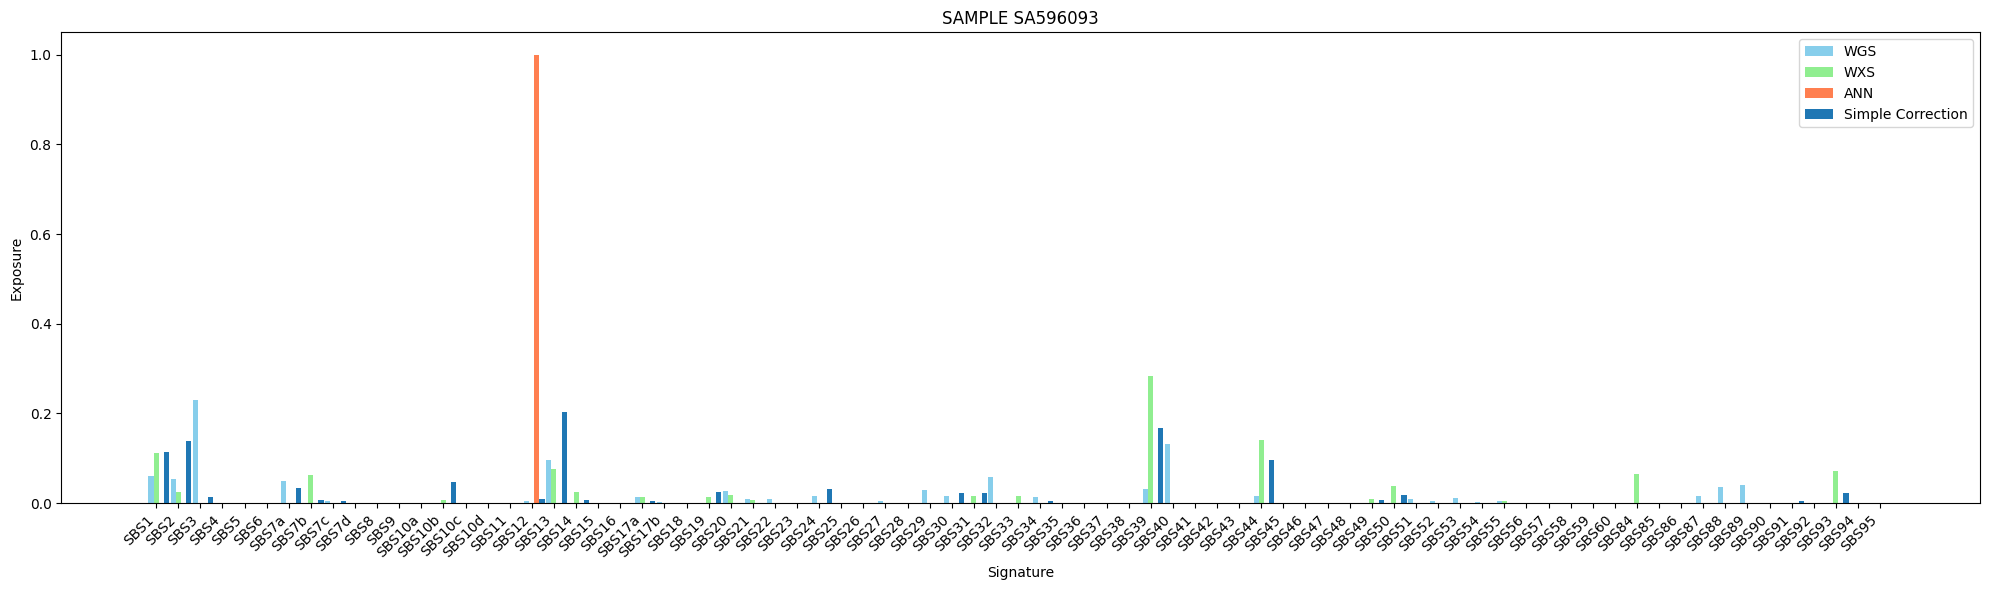

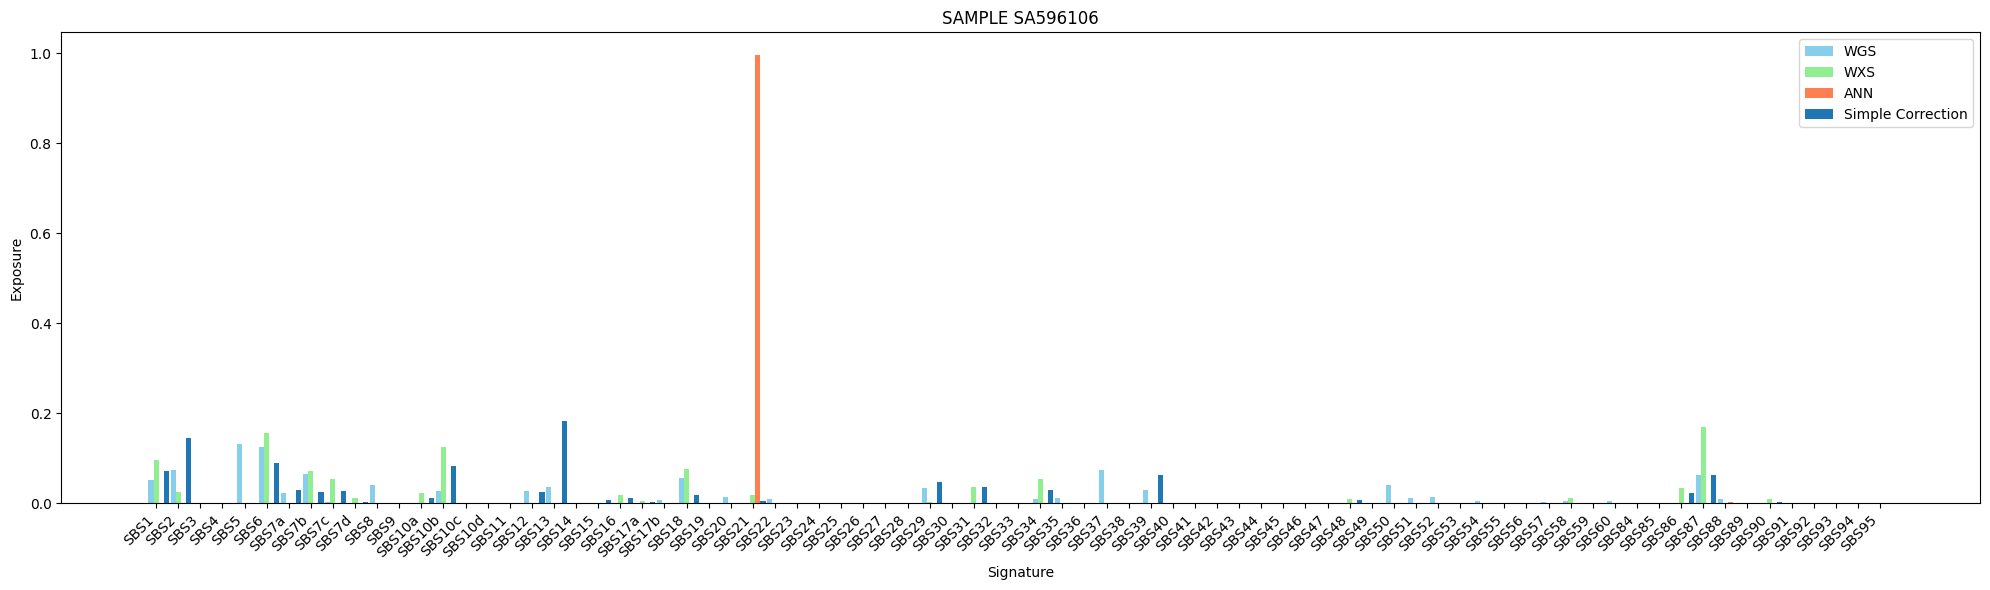

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dati di esempio (sostituisci con i tuoi dati)
gruppi = pred_dataset.columns
categorie = ['Categoria 1', 'Categoria 2', 'Categoria 3','Categoria 4'],

# Larghezza delle barre
larghezza_barre = 0.23

# Iterazione su tutte le righe del DataFrame
for idx in range(72):
    dataset1 = Coefficients_WG.iloc[:,idx].values
    dataset2 = Coefficients.iloc[:,idx].values
    dataset3 = pred_dataset.iloc[idx,:].values
    dataset4 = coefficients_WE_adj.iloc[:,idx].values

    # Calcola la posizione delle barre
    posizioni = np.arange(len(gruppi))

    # Crea il grafico a barre affiancate
    plt.figure(figsize=(20, 6))

    # Traccia gli istogrammi
    plt.bar(posizioni - larghezza_barre, dataset1, width=larghezza_barre, label='WGS', color='skyblue')
    plt.bar(posizioni, dataset2, width=larghezza_barre, label='WXS', color='lightgreen')
    plt.bar(posizioni + larghezza_barre, dataset3, width=larghezza_barre, label='ANN', color='coral')
    plt.bar(posizioni+ 2*larghezza_barre, dataset4, width=larghezza_barre, label='Simple Correction')

    # Aggiungi linee di separazione dopo ogni valore sull'asse x
    #for i in range(len(posizioni)):
    #    plt.axvline(x=i + larghezza_barre / 2, color='black', linestyle='--', linewidth=1)

    # Personalizza il grafico
    plt.xlabel('Signature')
    plt.ylabel('Exposure')
    plt.title(f'SAMPLE {pred_dataset.index[idx]}')  # Aggiungi il numero del campione
    plt.xticks(posizioni, gruppi, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()  # Aggiungi spaziatura tra i subplot

    # Salva il grafico in un file separato per ciascun campione
    #plt.savefig(f'sample_{idx + 1}_plot.png')

    # Mostra il grafico (commenta questa riga se vuoi solo salvare i grafici senza visualizzarli)
    plt.show()